In [7]:
import numpy as np
from IPython.display import Image, display
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

import os

In [8]:
model_name = 'clutter/siamese-u-net'
logdir = os.path.join(os.getcwd(), 'logs/' + model_name + '/')
# logdir = LOG_DIR + '%.d_characters/'%(NUM_CHARS)

[  0 255]


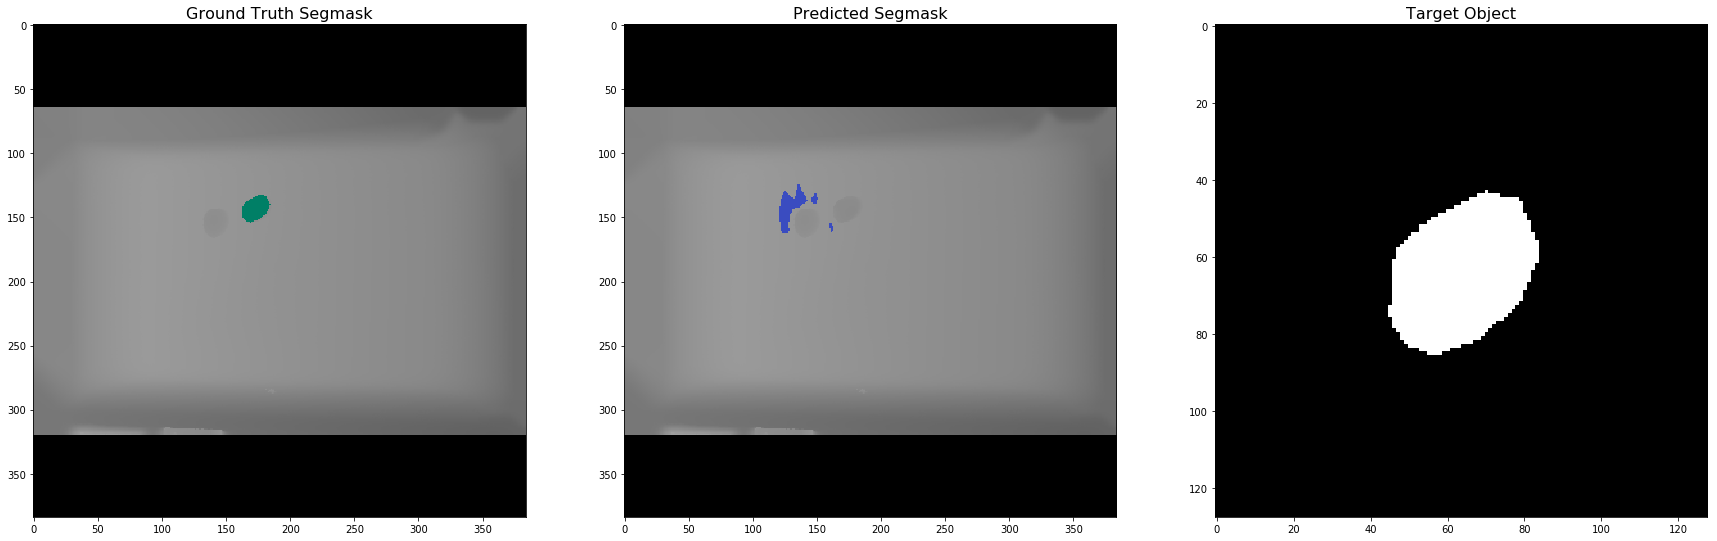

[  0 255]


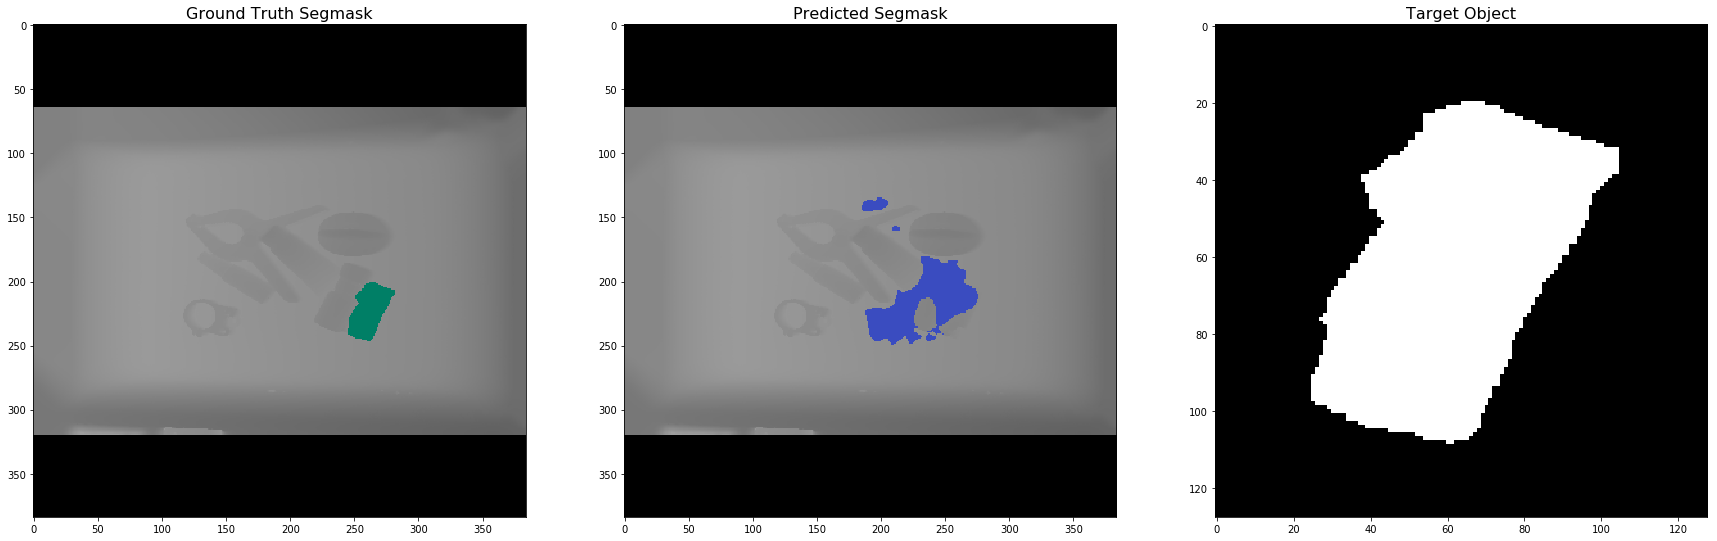

[  0 255]


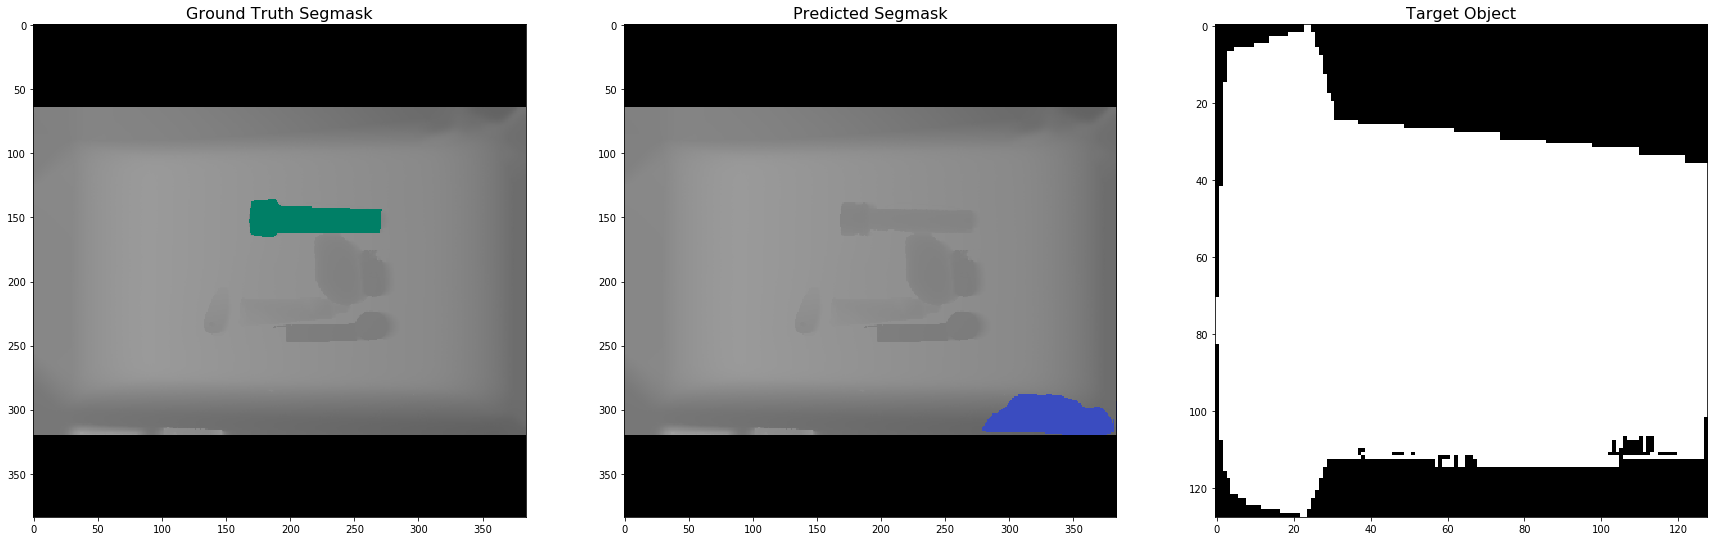

[  0 255]


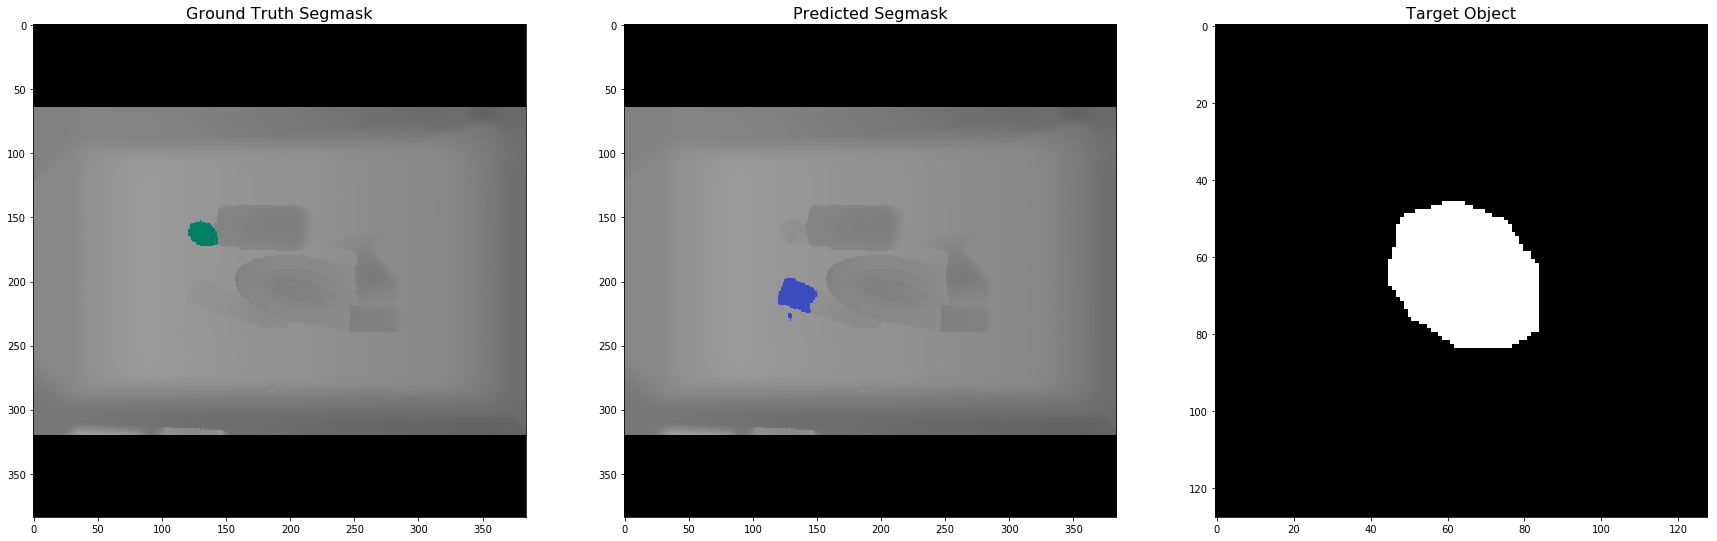

[  0 255]


/home/andrewyli/michaelis/lib/python3.5/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/andrewyli/michaelis/lib/python3.5/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/andrewyli/michaelis/lib/python3.5/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/andrewyli/michaelis/lib/python3.5/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/andrewyli/michaelis/lib/python3.5/site-packages/matplotlib/colors.py:902: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/andrewyli/michaelis/lib/python3.5/site-packages/numpy/ma/core.py:716: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a

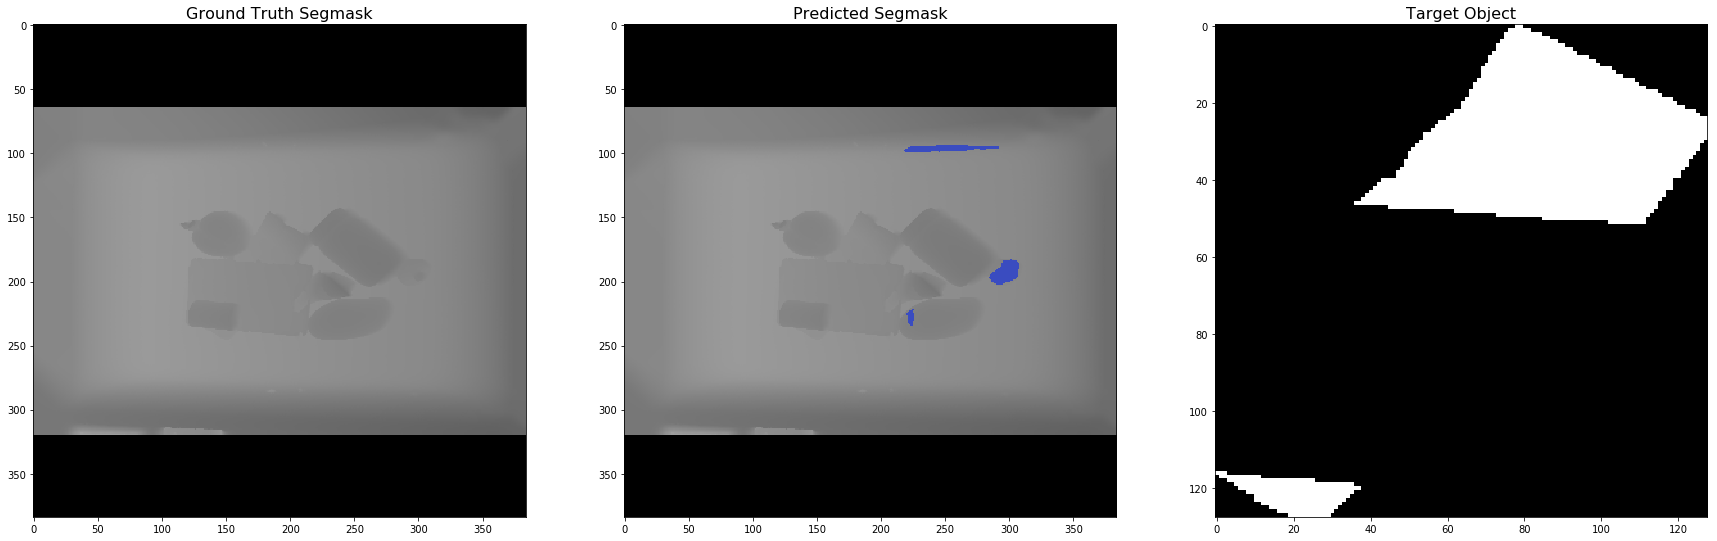

[  0 255]


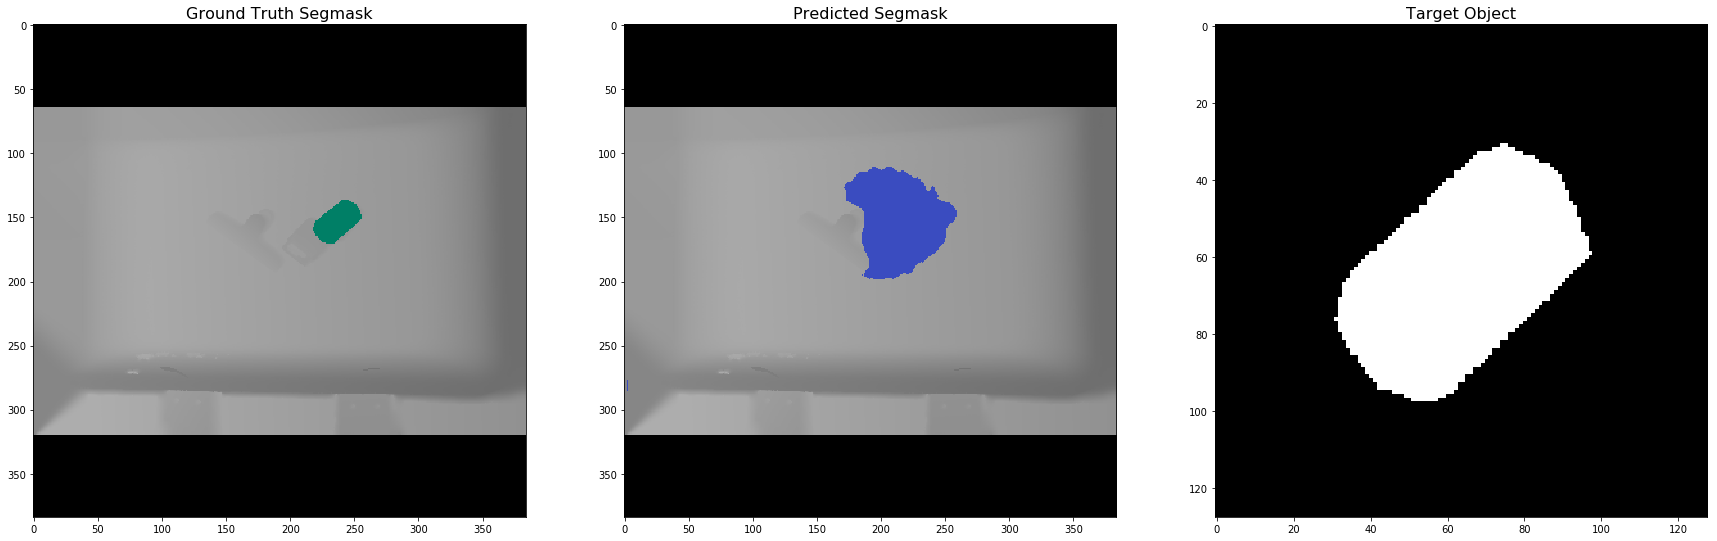

[  0 255]


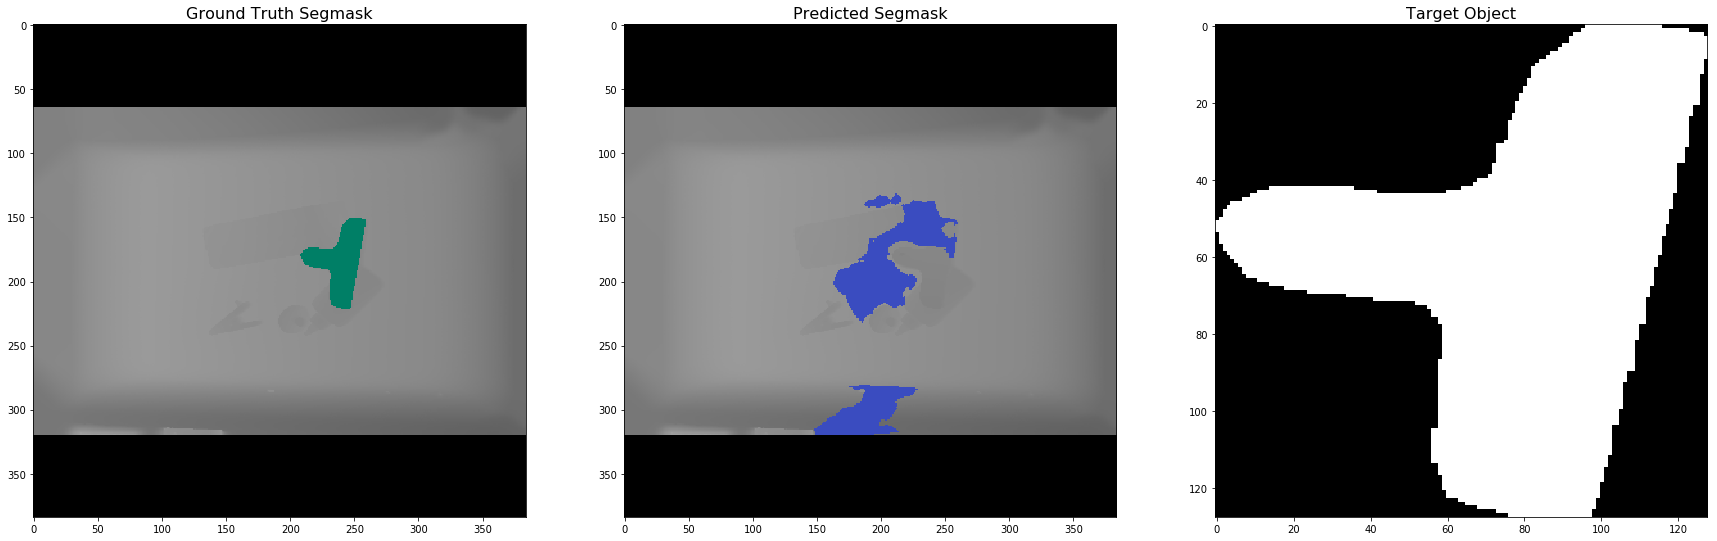

[  0 255]


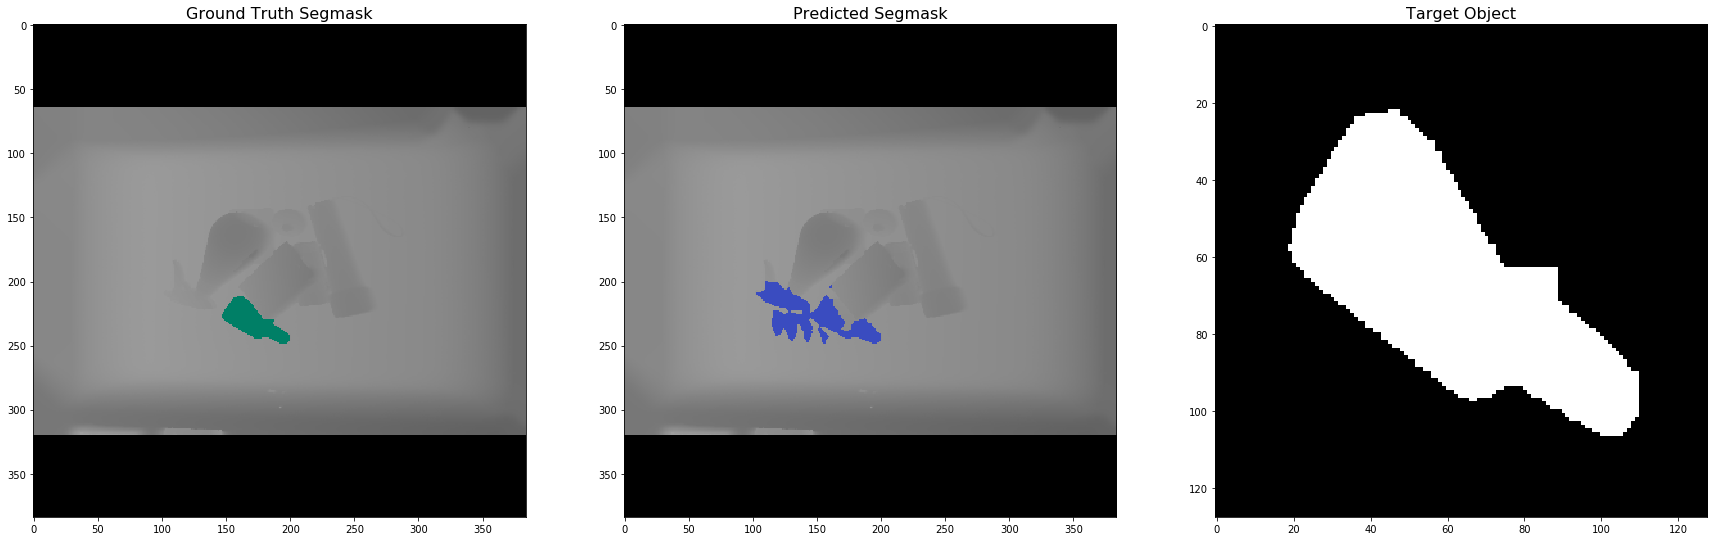

[  0 255]


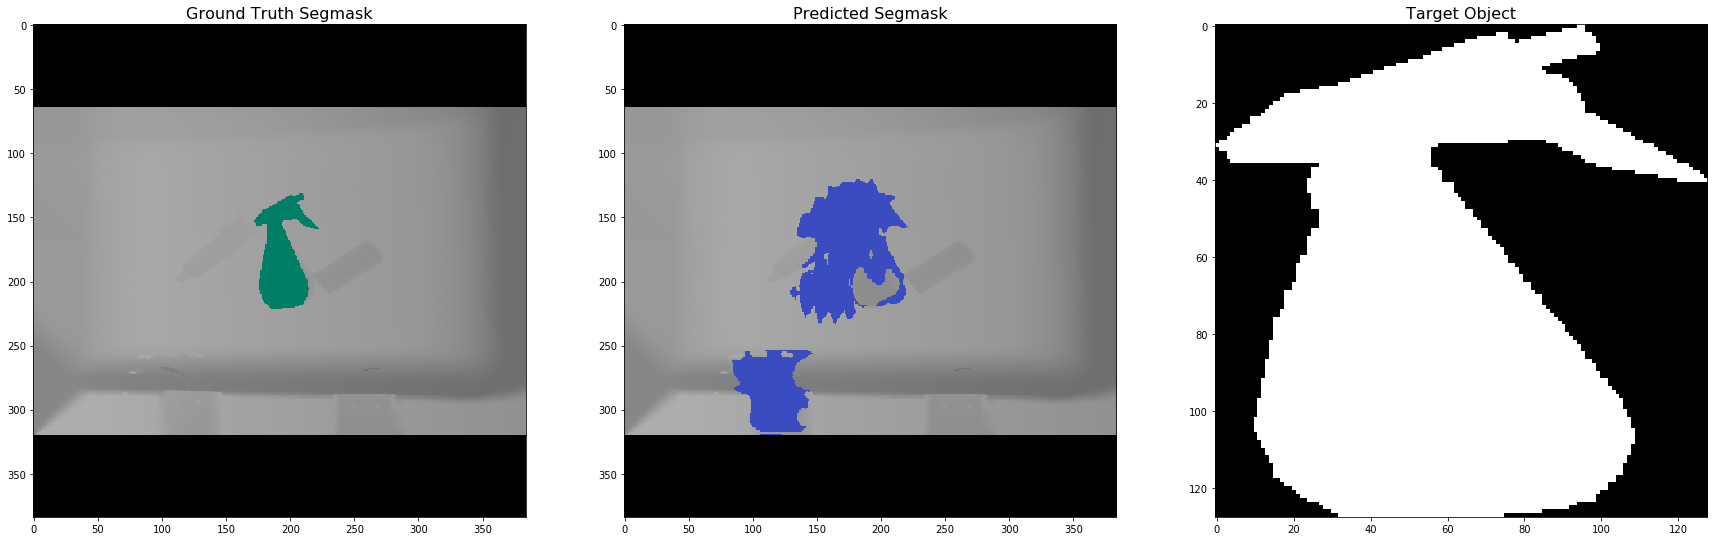

[  0 255]


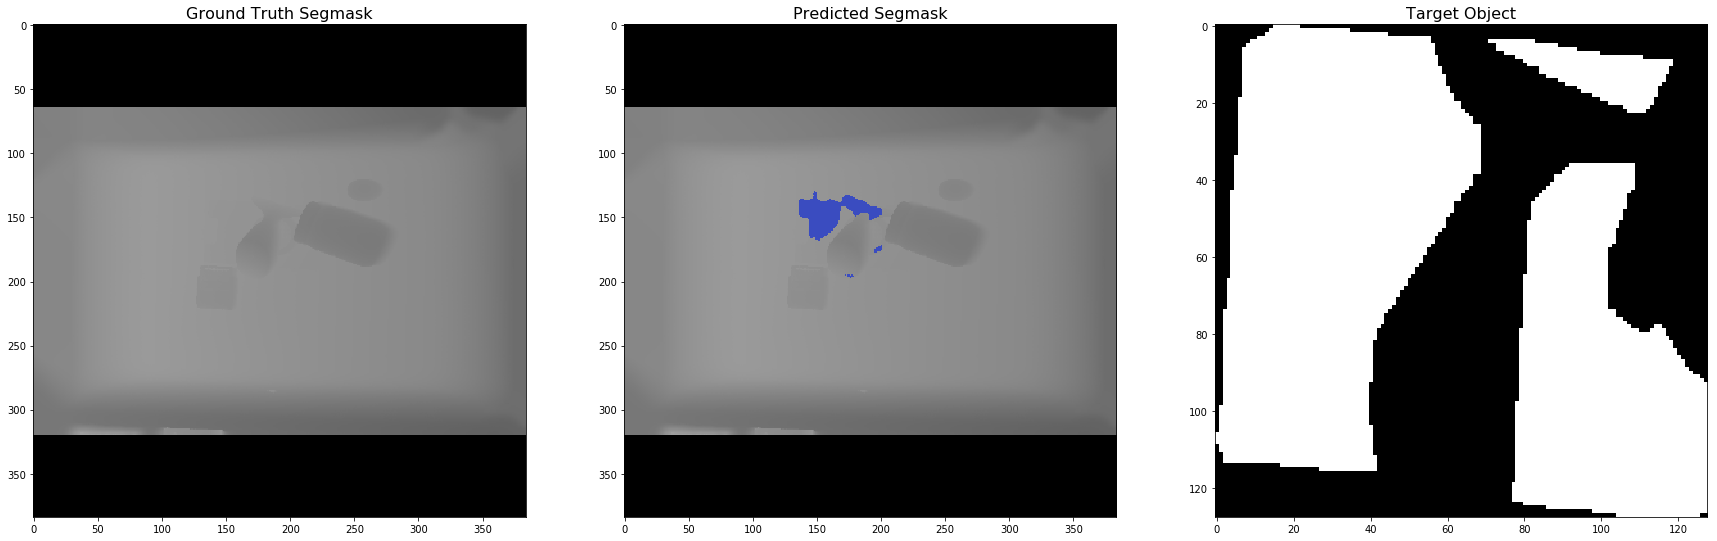

[  0 255]


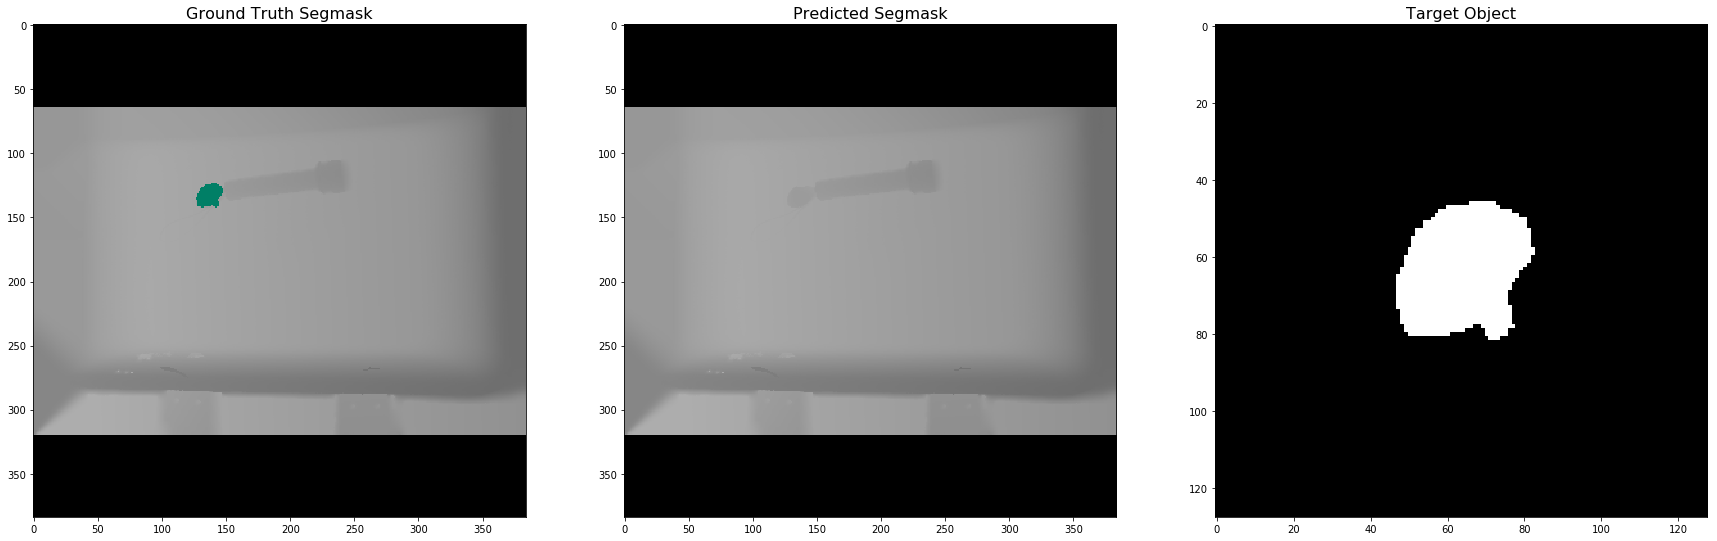

[  0 255]


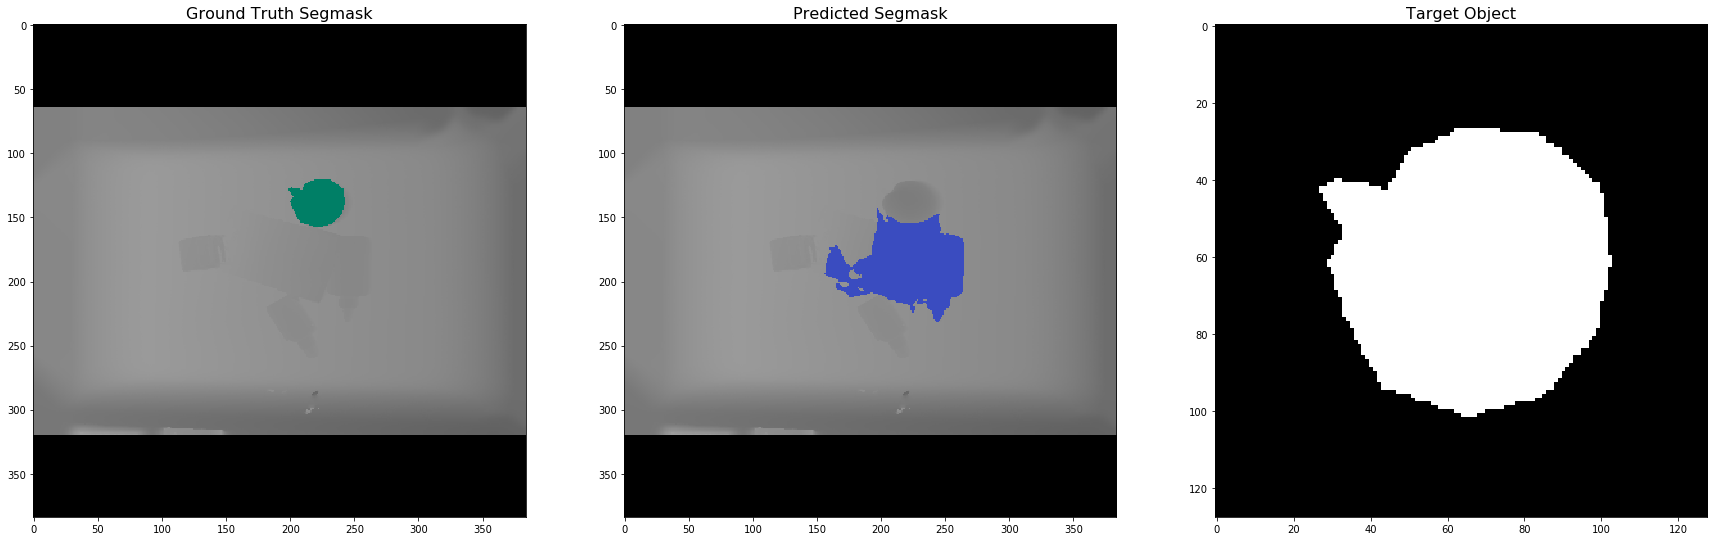

[  0 255]


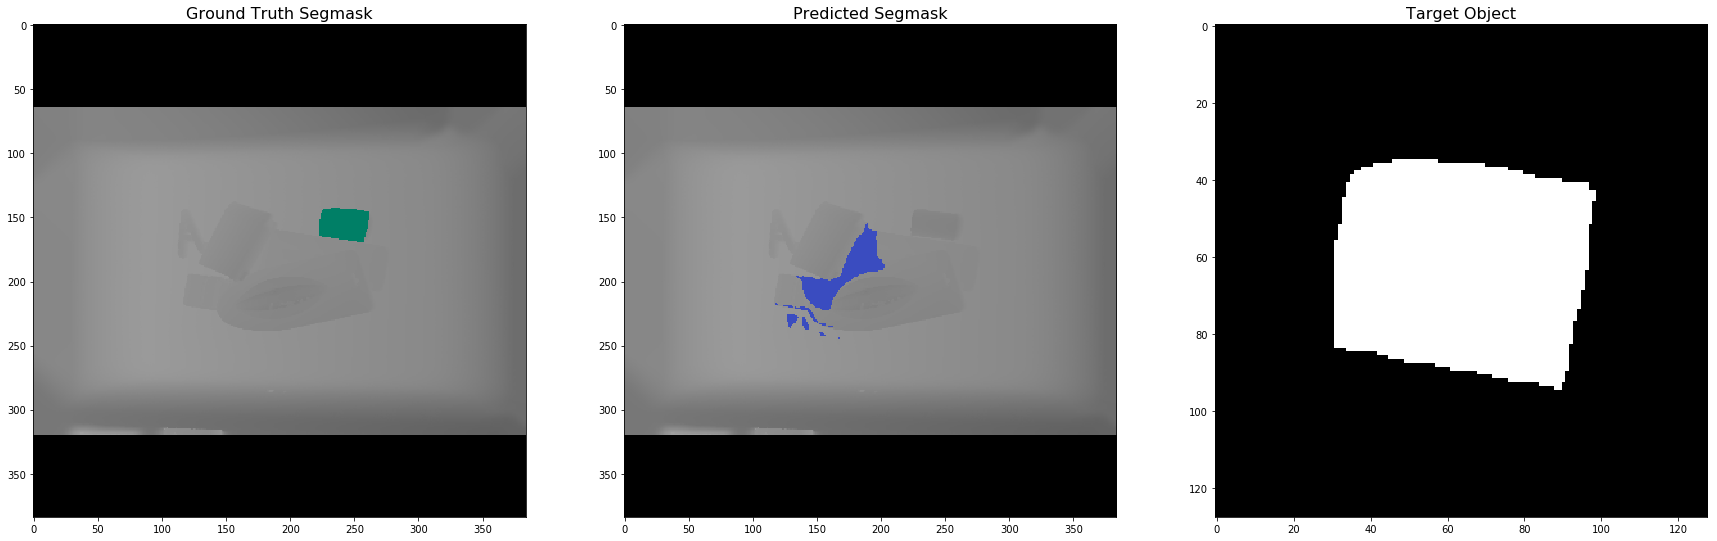

[  0 255]


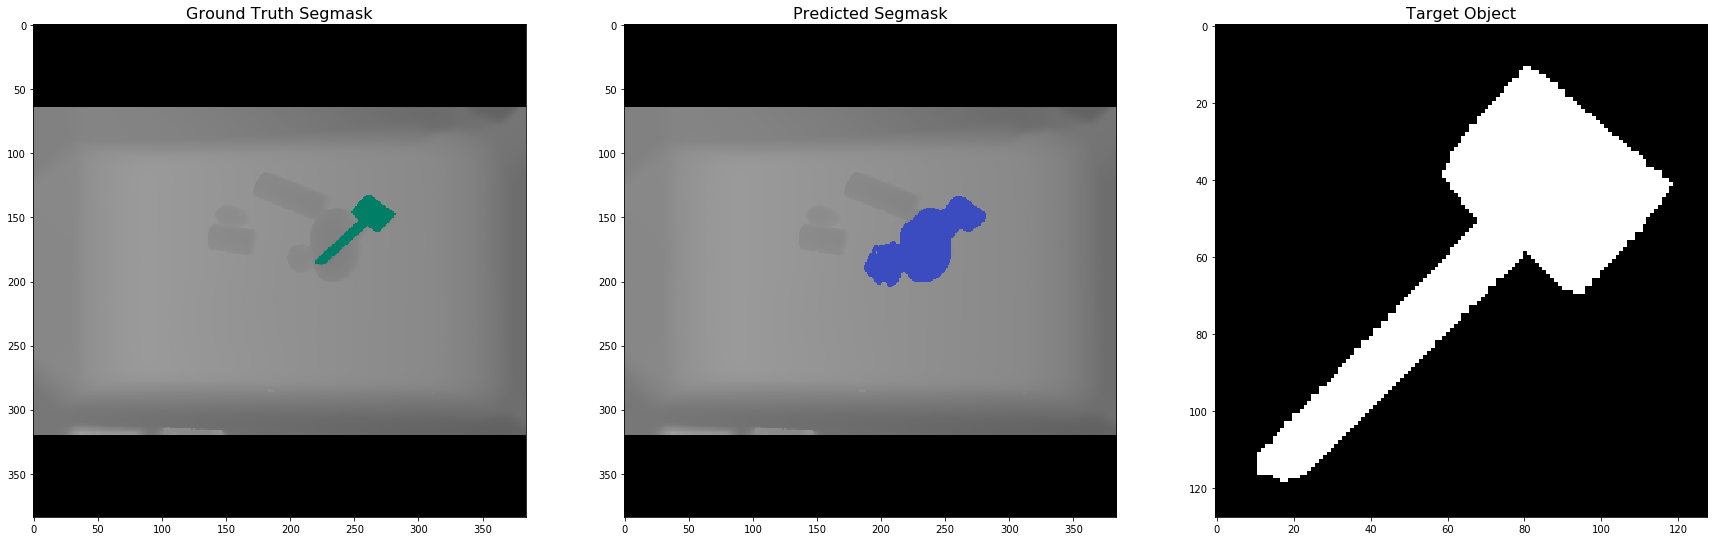

[  0 255]


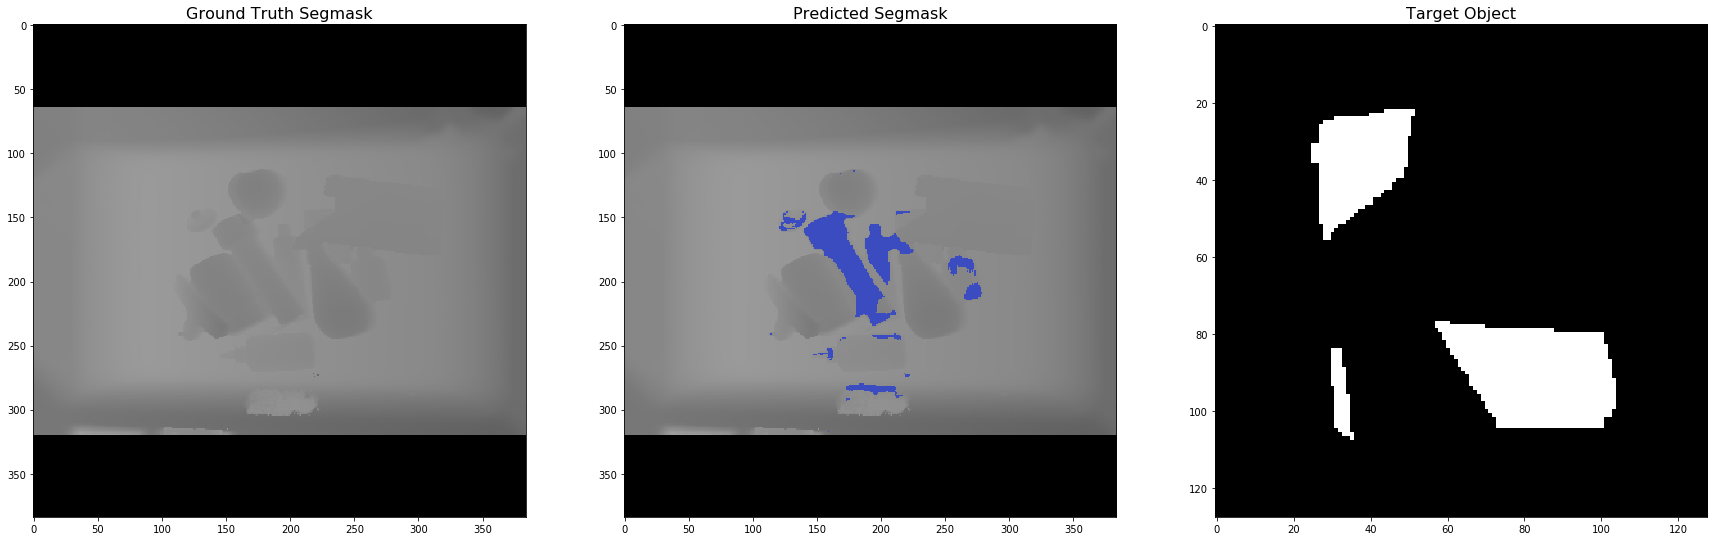

[  0 255]


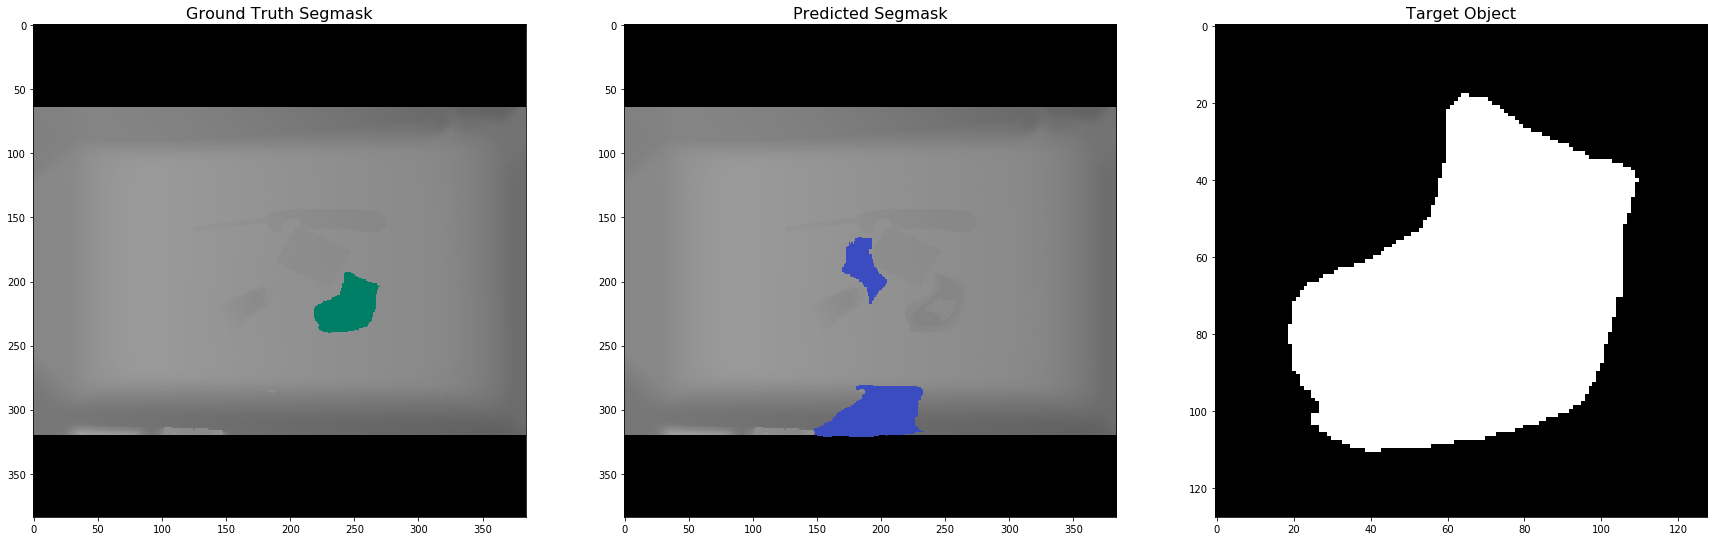

[  0 255]


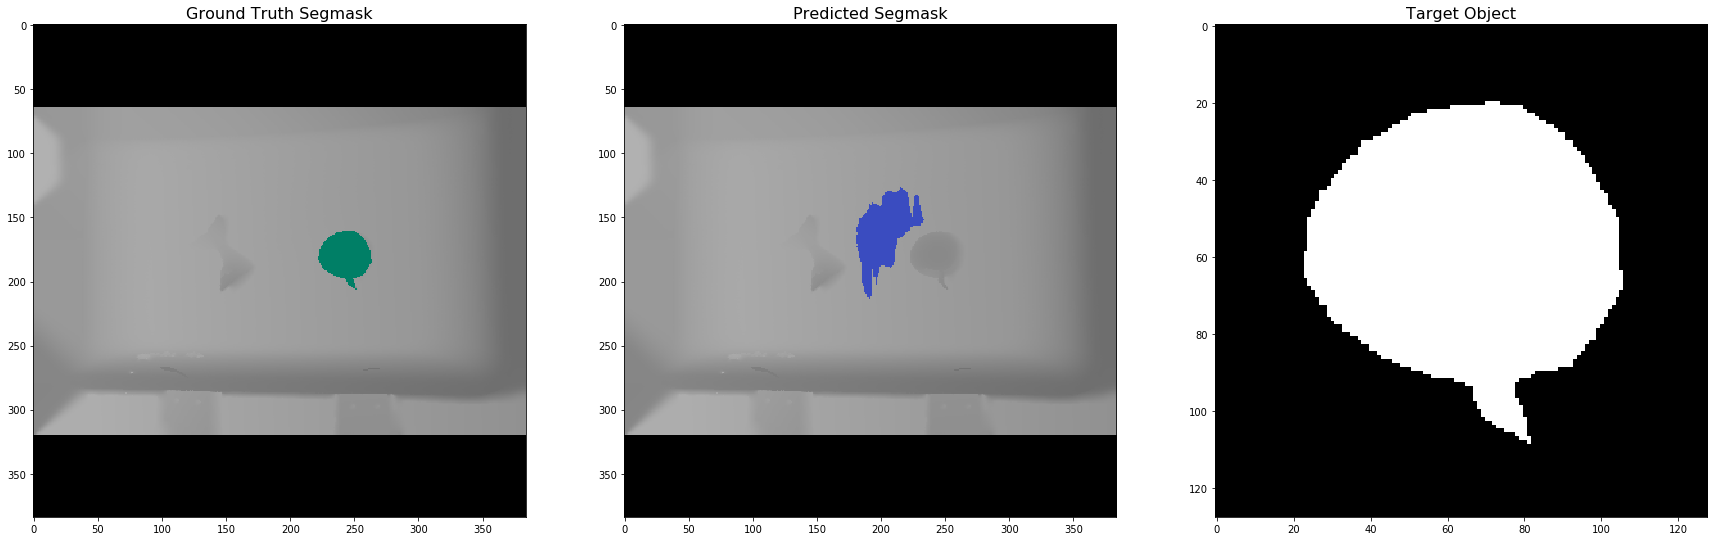

[  0 255]


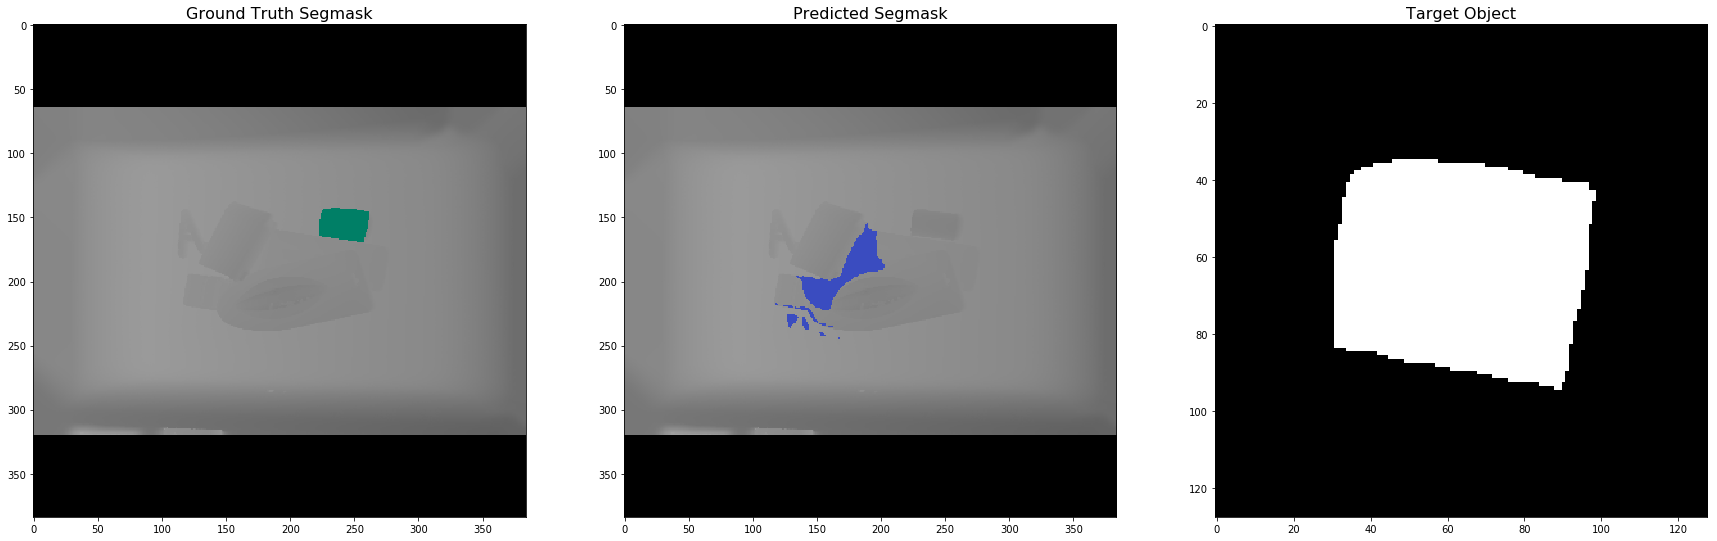

[  0 255]


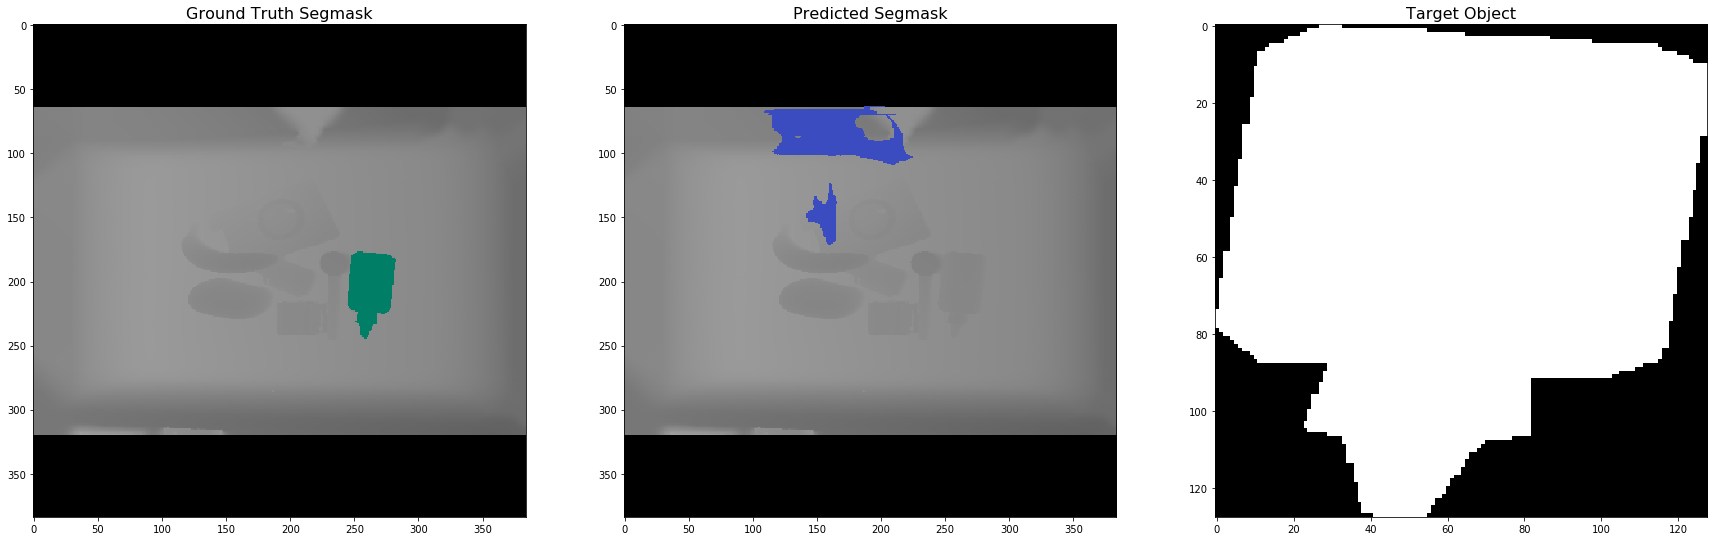

[  0 255]


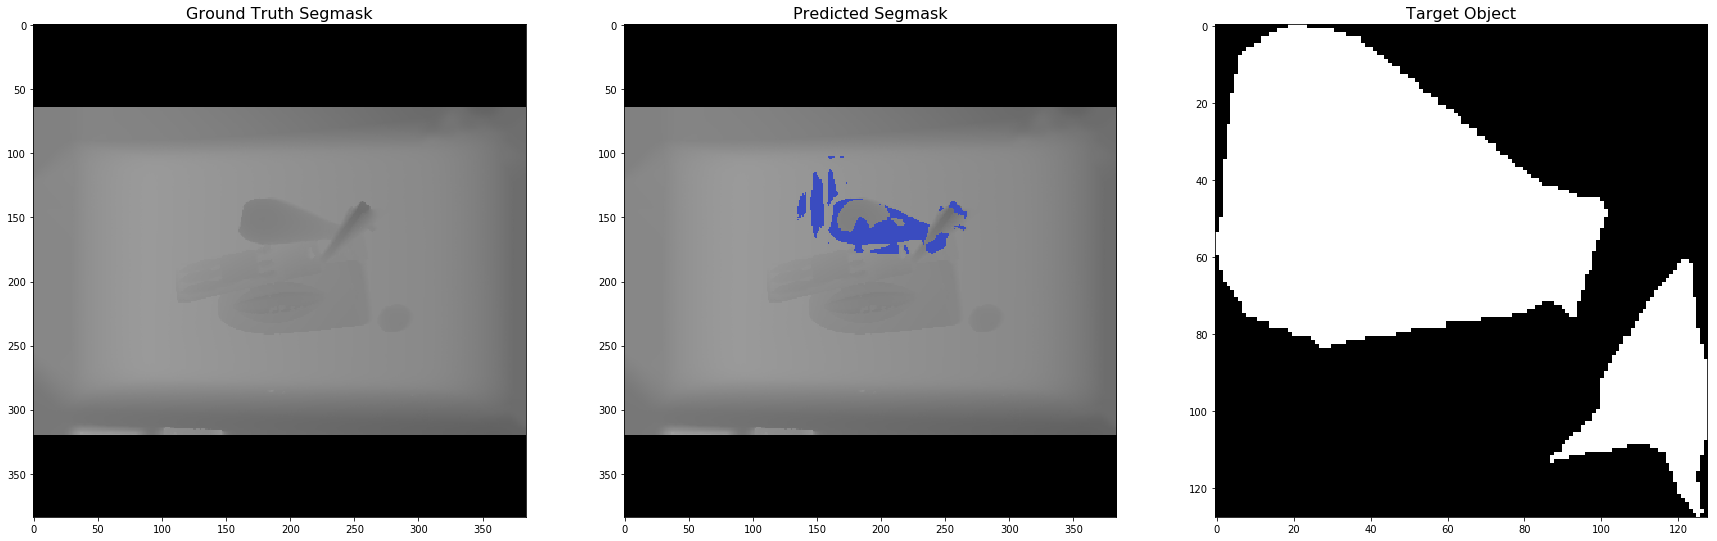

In [9]:
vis_list = [i for i in range(20)]

for index in vis_list:
    pred = np.load(os.path.join(logdir, "vis", "sample_pred_{}.npy").format(index))
    im = np.load(os.path.join(logdir, "vis", "sample_im_{}.npy").format(index))
    seg = np.load(os.path.join(logdir, "vis", "sample_gt_{}.npy").format(index))
    tar = np.load(os.path.join(logdir, "vis", "sample_tar_{}.npy").format(index))
    
    plt.figure(figsize=(30, 30))
    plt.subplot(131)
    plt.imshow(im)
    plt.imshow(np.ma.masked_where(seg[...,0] == 0, seg[...,0]), cmap="summer")
    plt.title("Ground Truth Segmask", {"fontsize": 16})
    
    plt.subplot(132)
    plt.imshow(im)
    plt.imshow(np.ma.masked_where(pred[...,0] == 0, pred[...,0]), cmap="coolwarm")
    plt.title("Predicted Segmask", {"fontsize": 16})
    
    plt.subplot(133)
    tar[tar > 0] = 255
    plt.imshow(tar)
    print(np.unique(tar))
    plt.title("Target Object", {"fontsize": 16})


    plt.show()


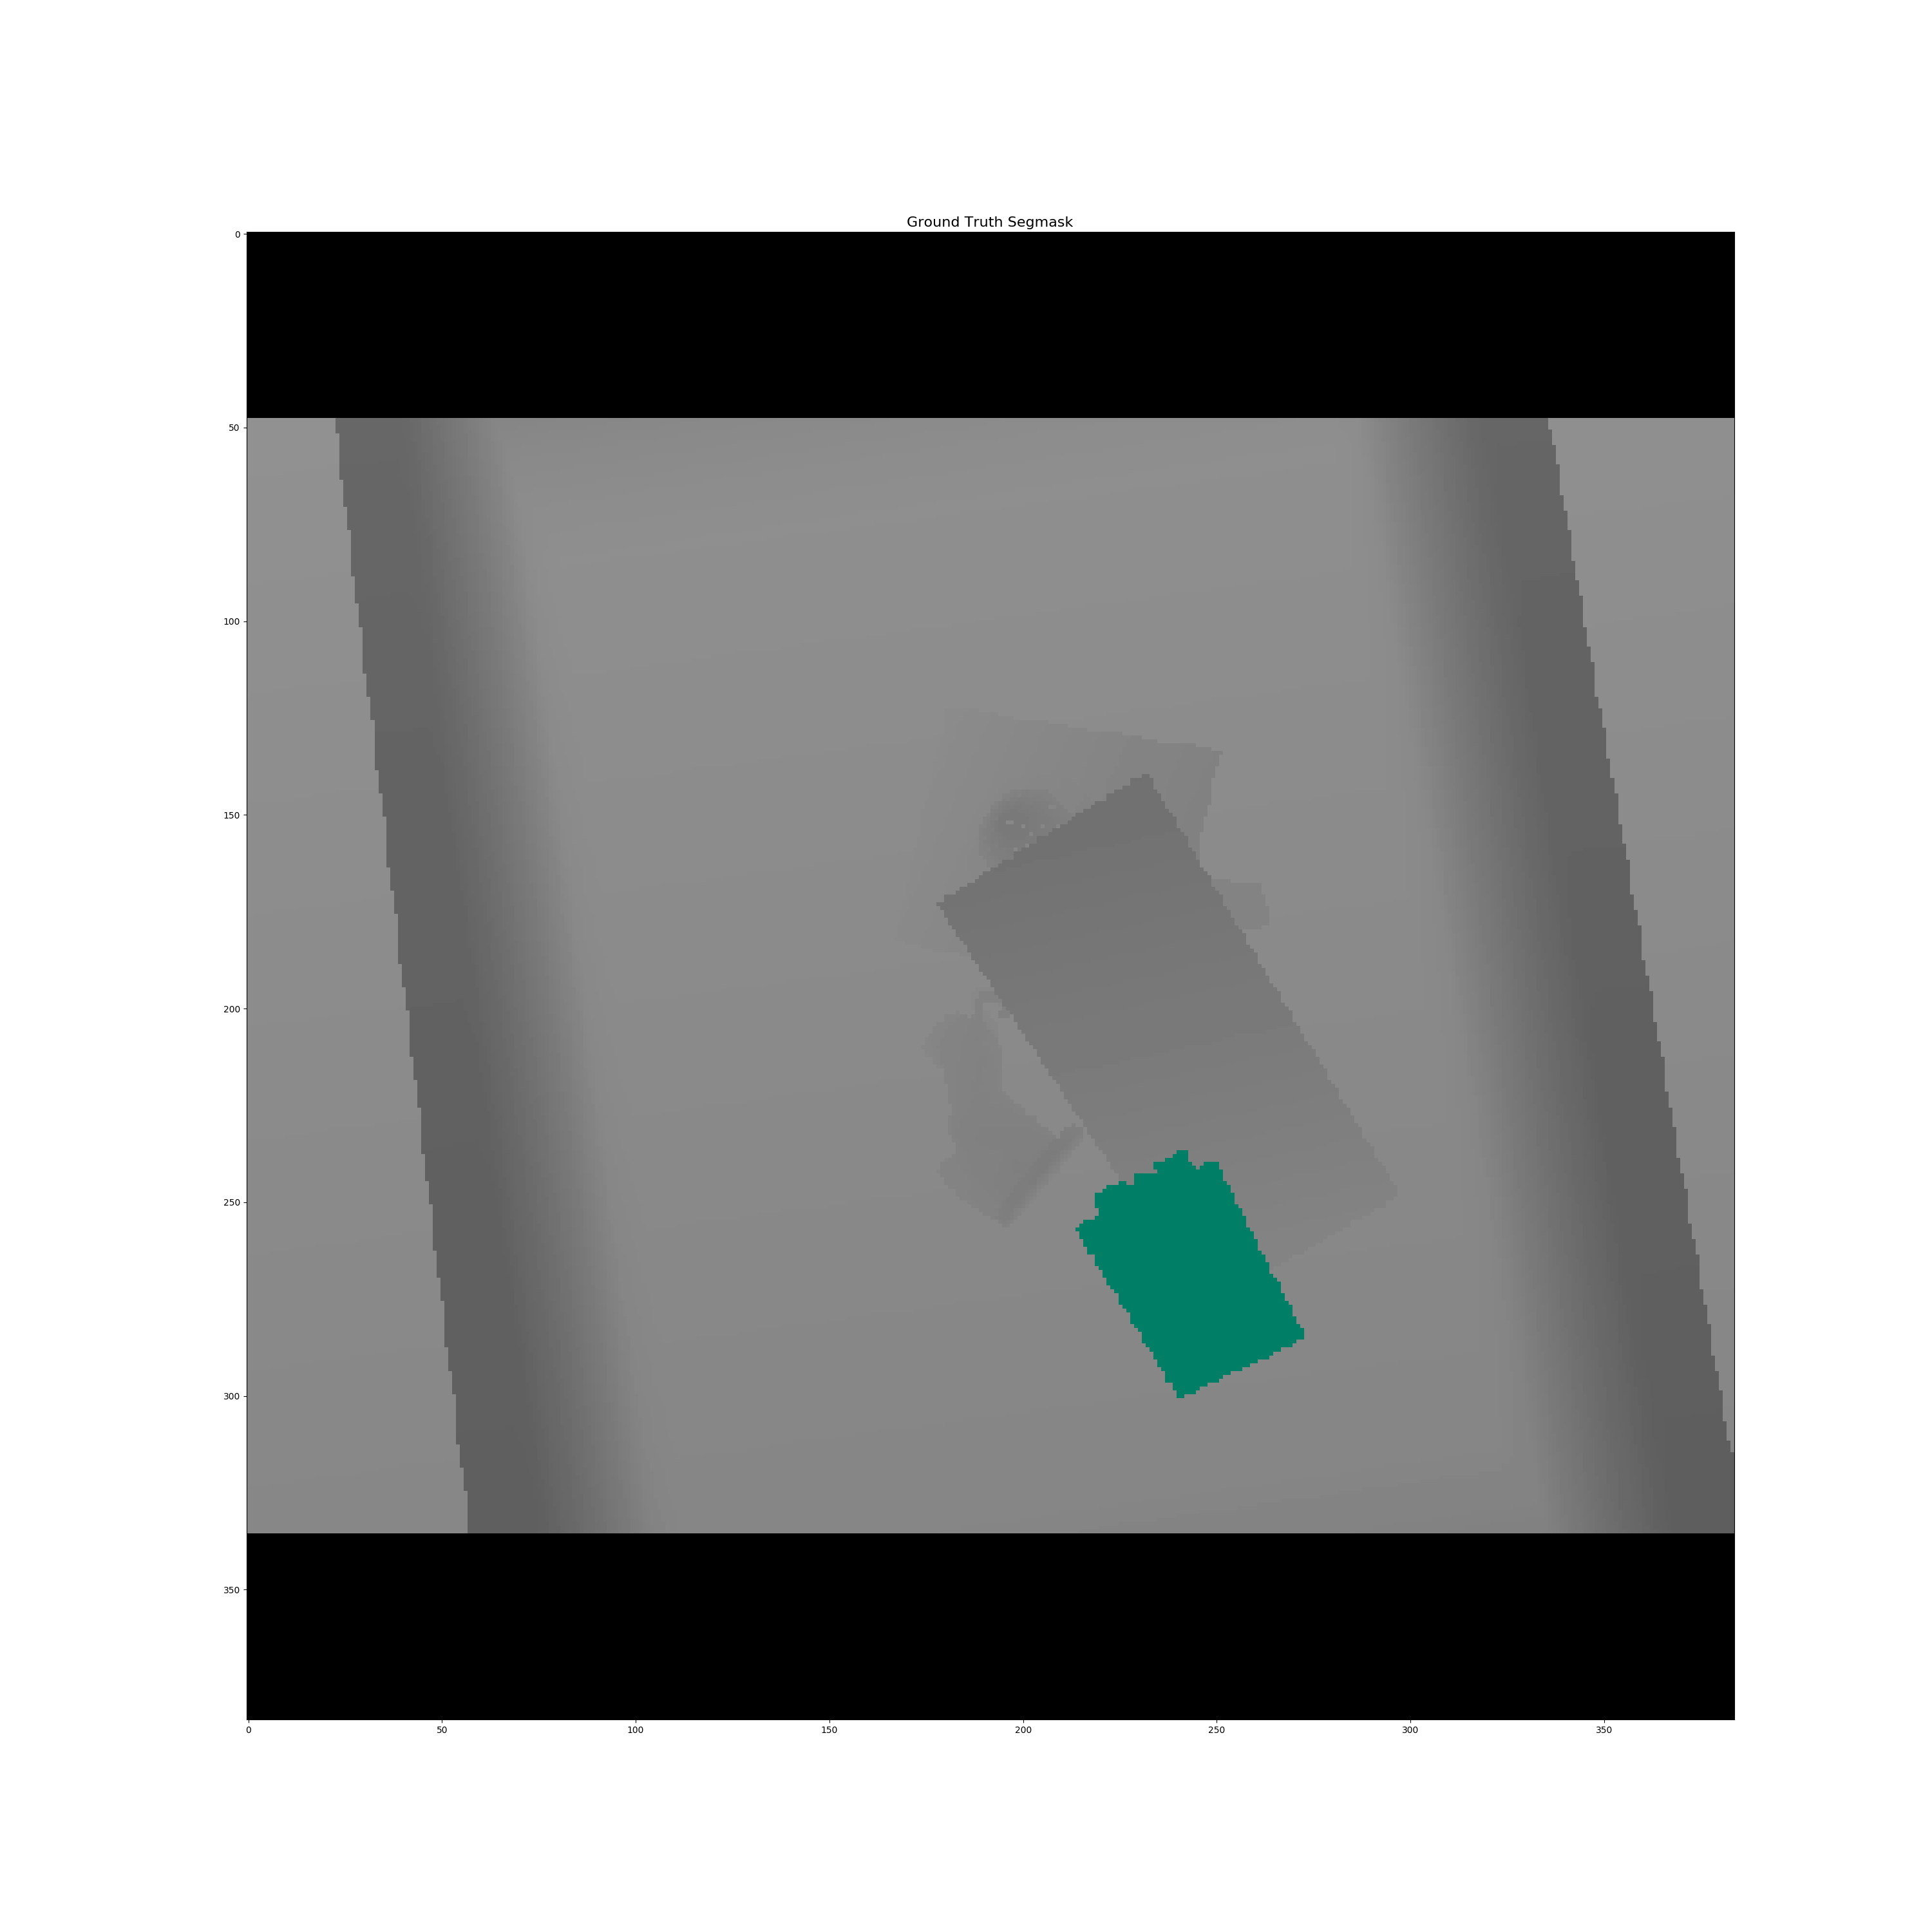

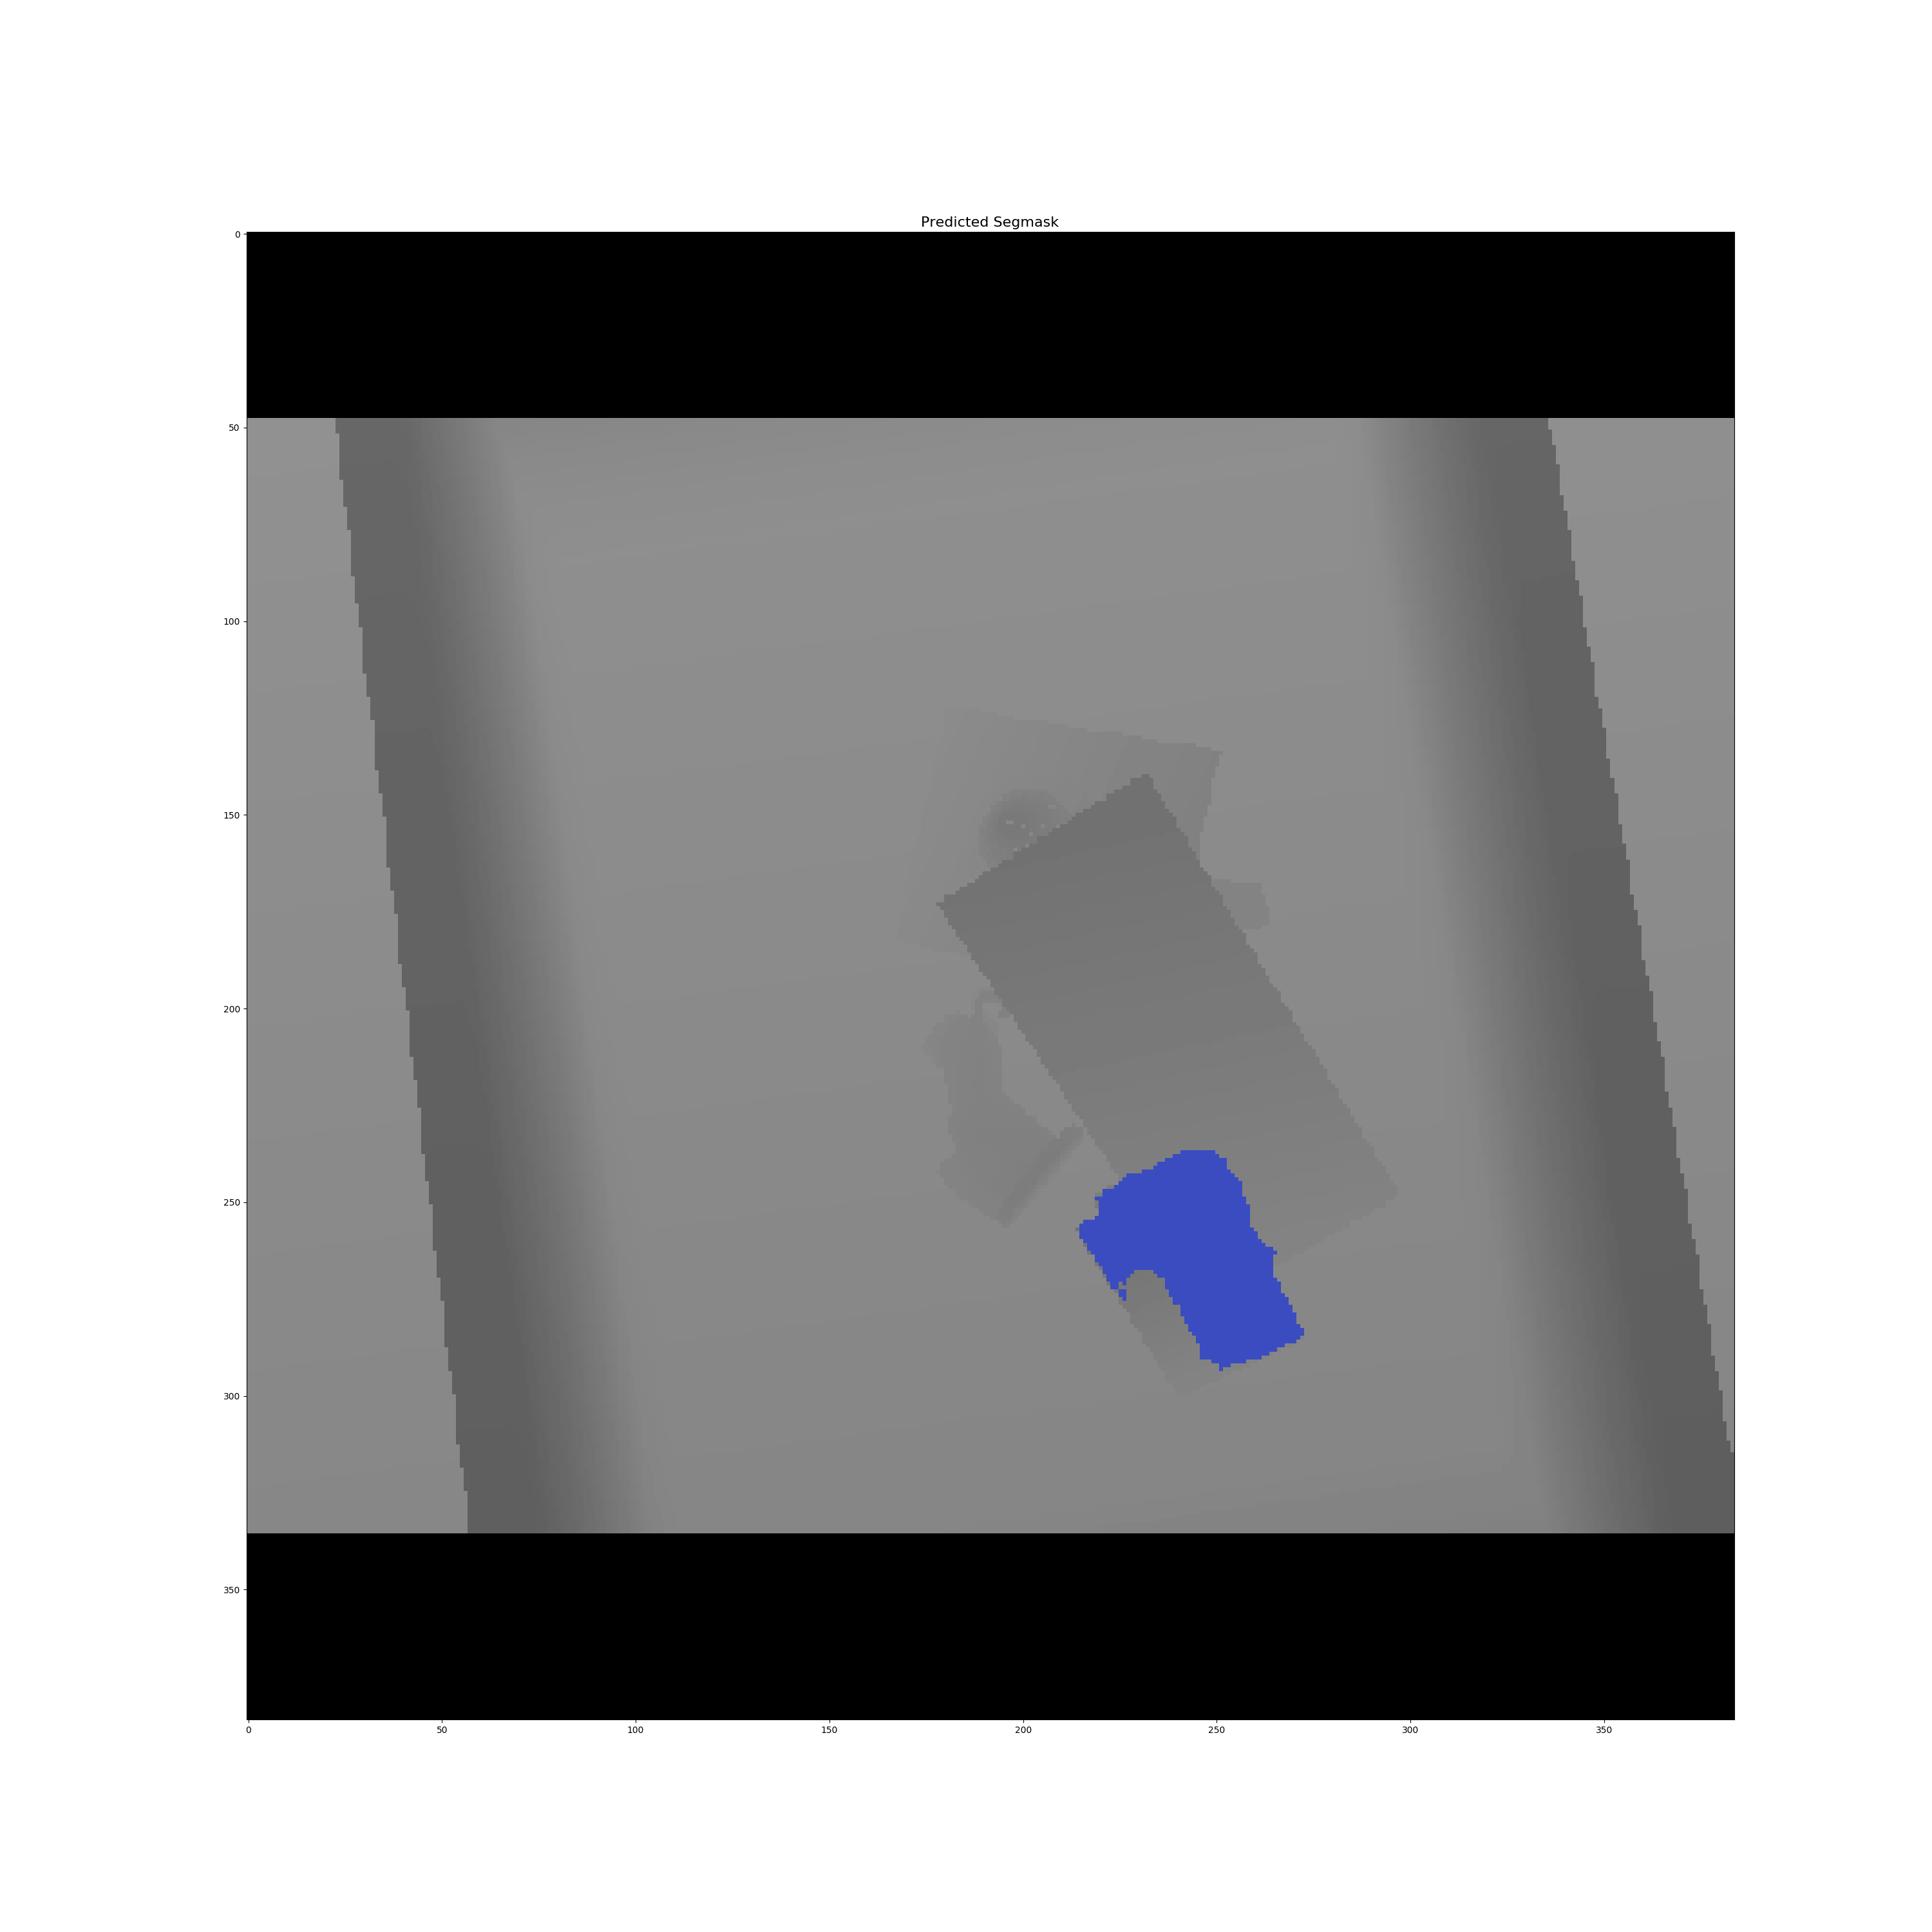

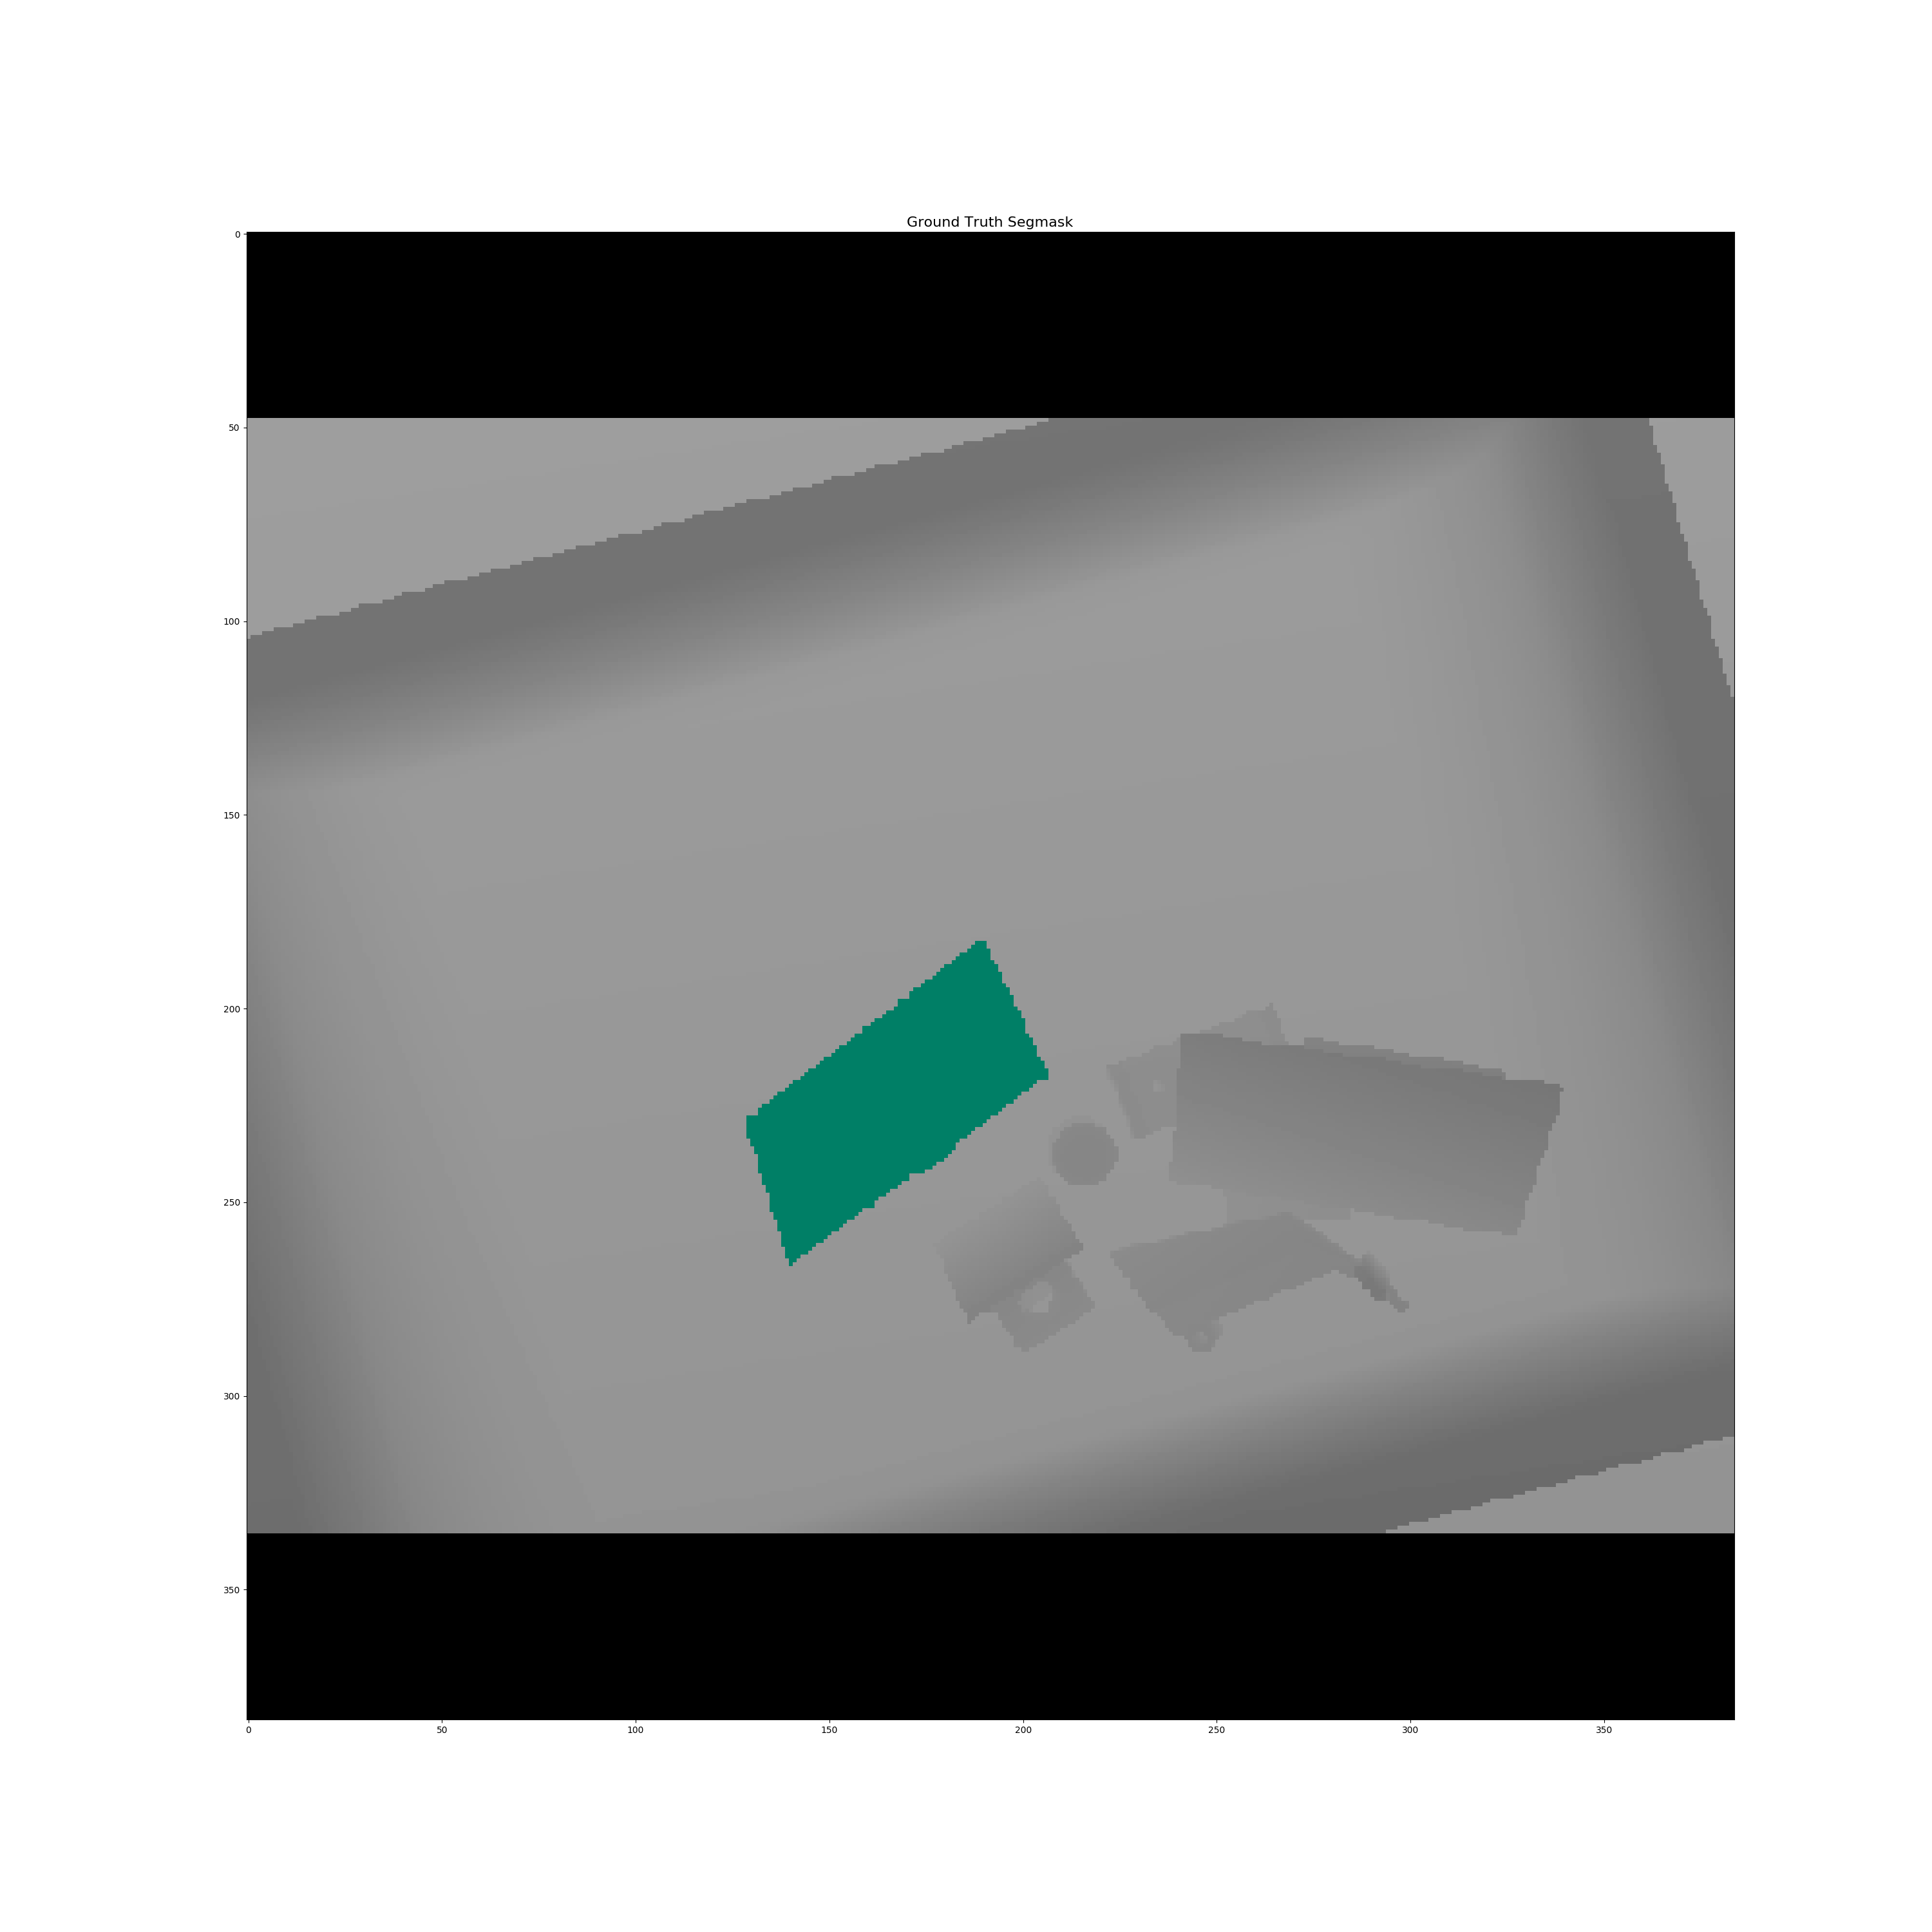

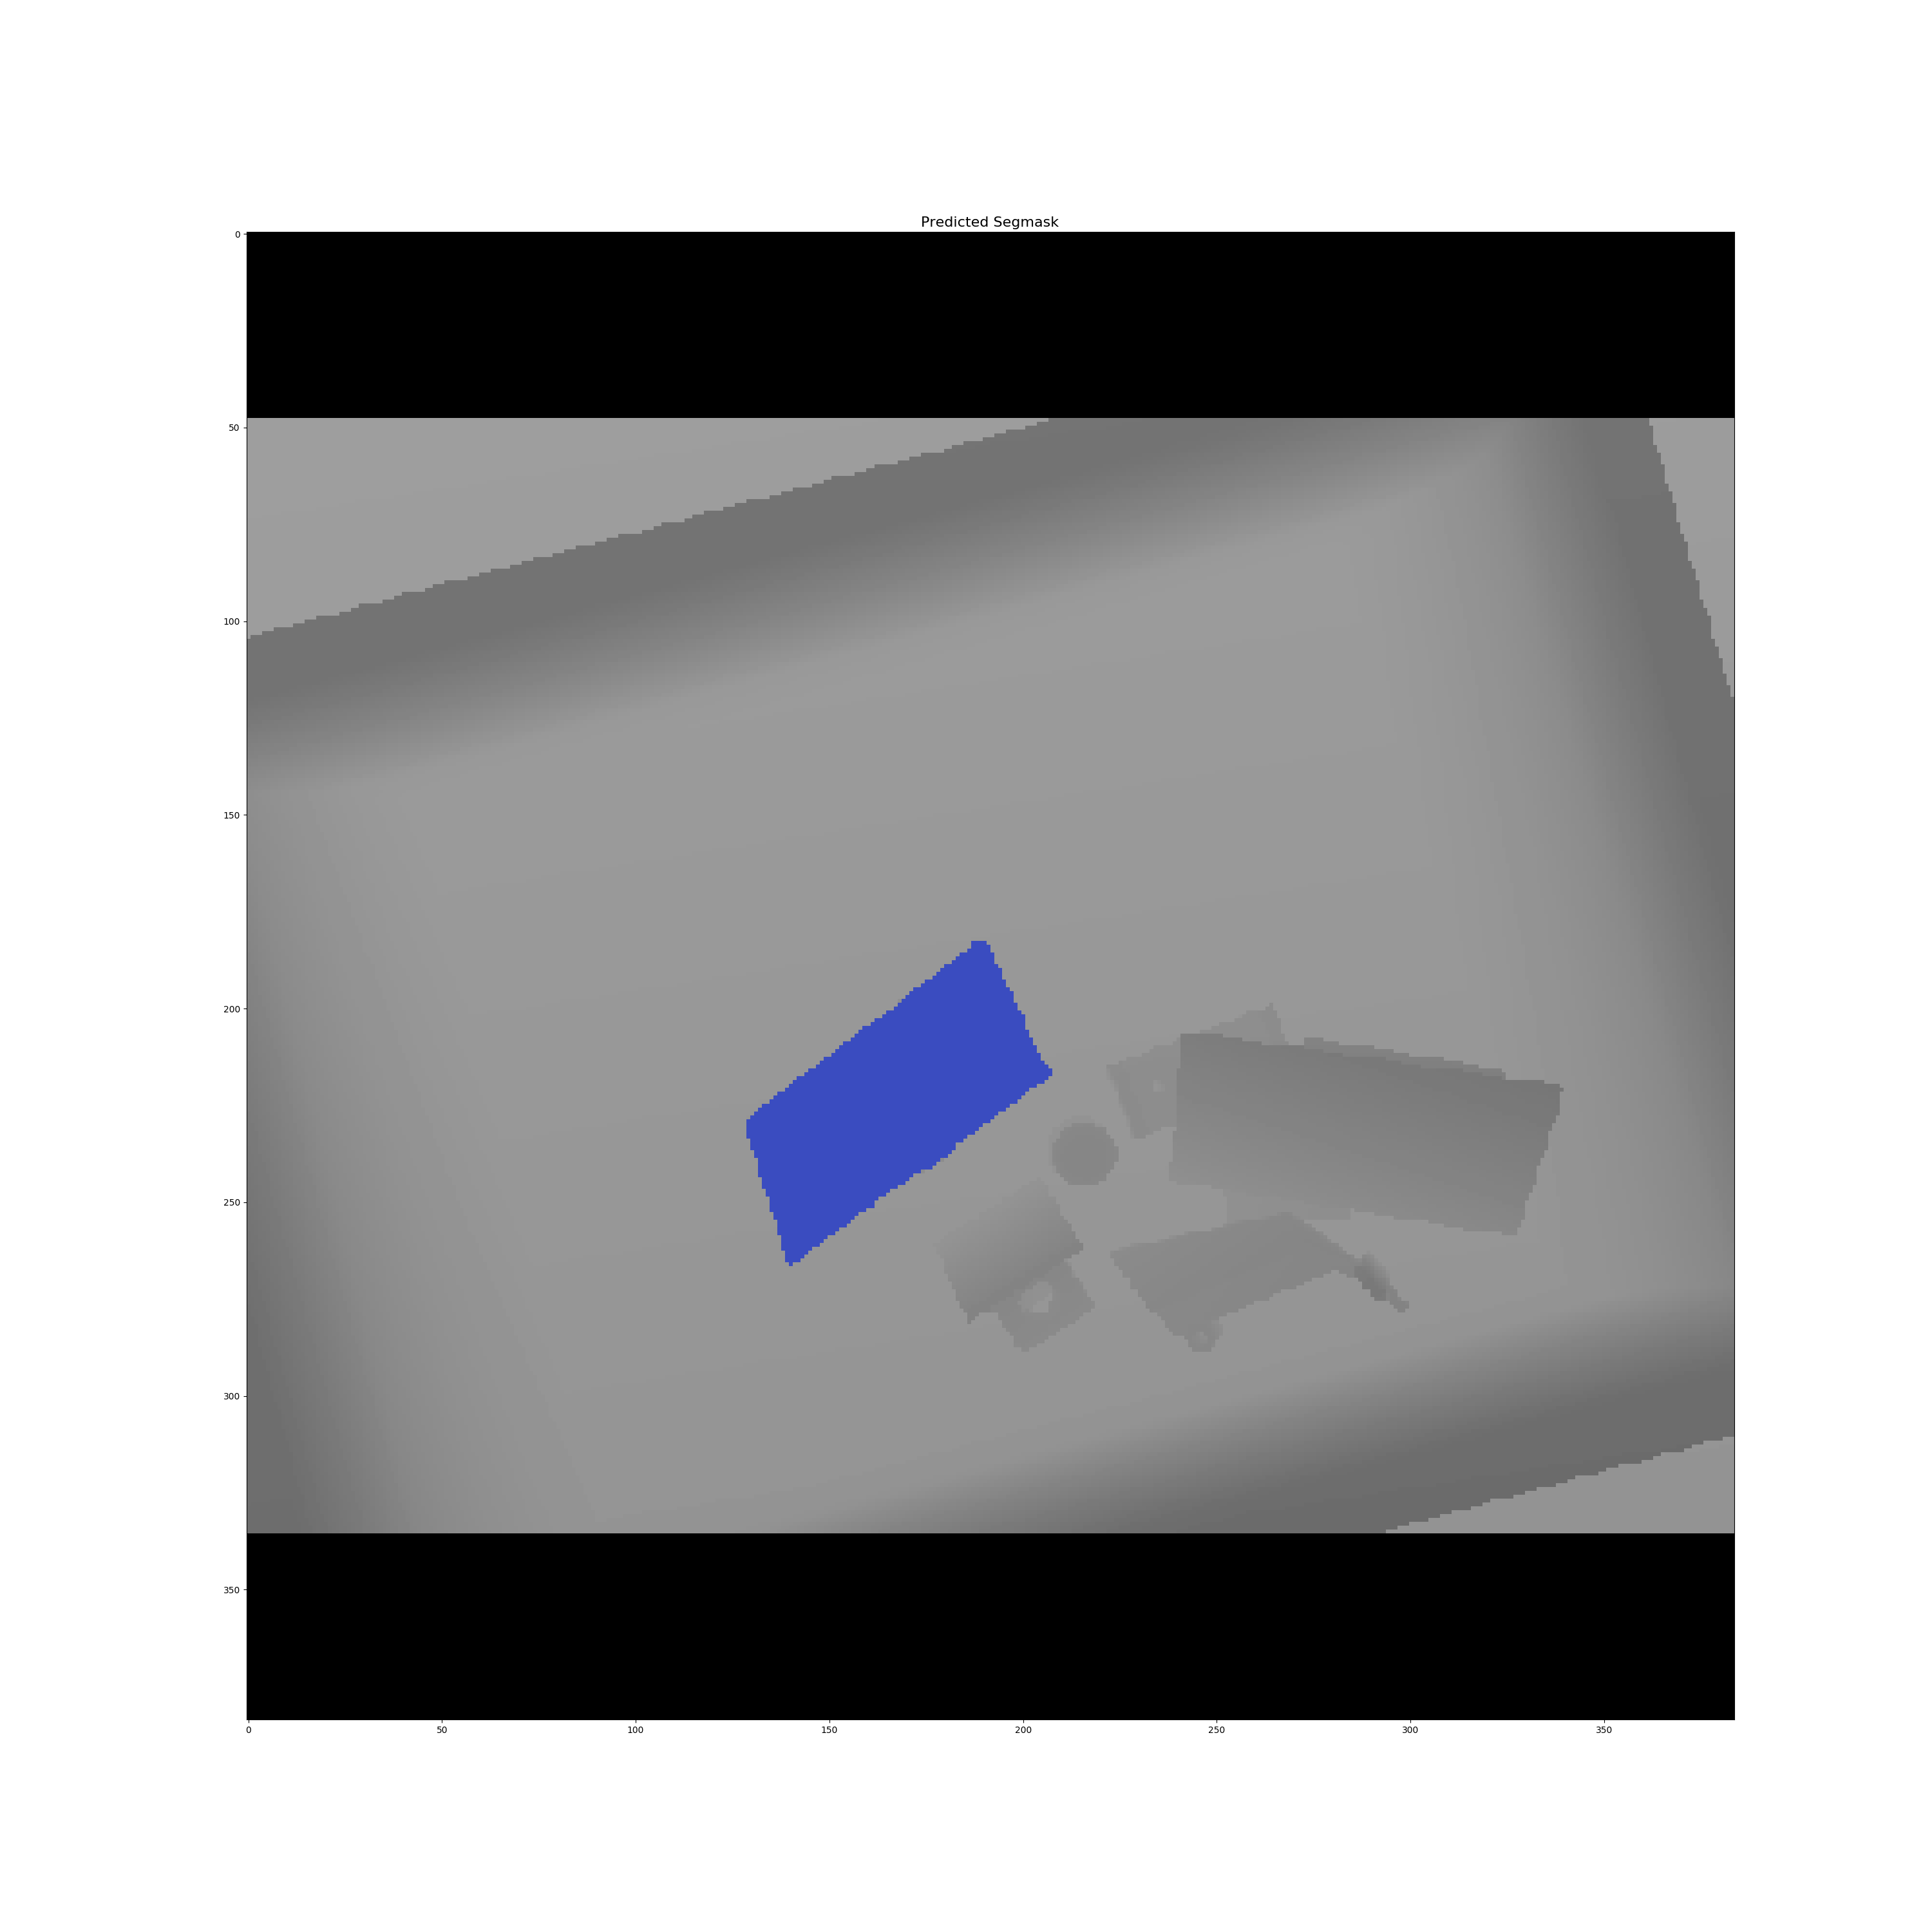

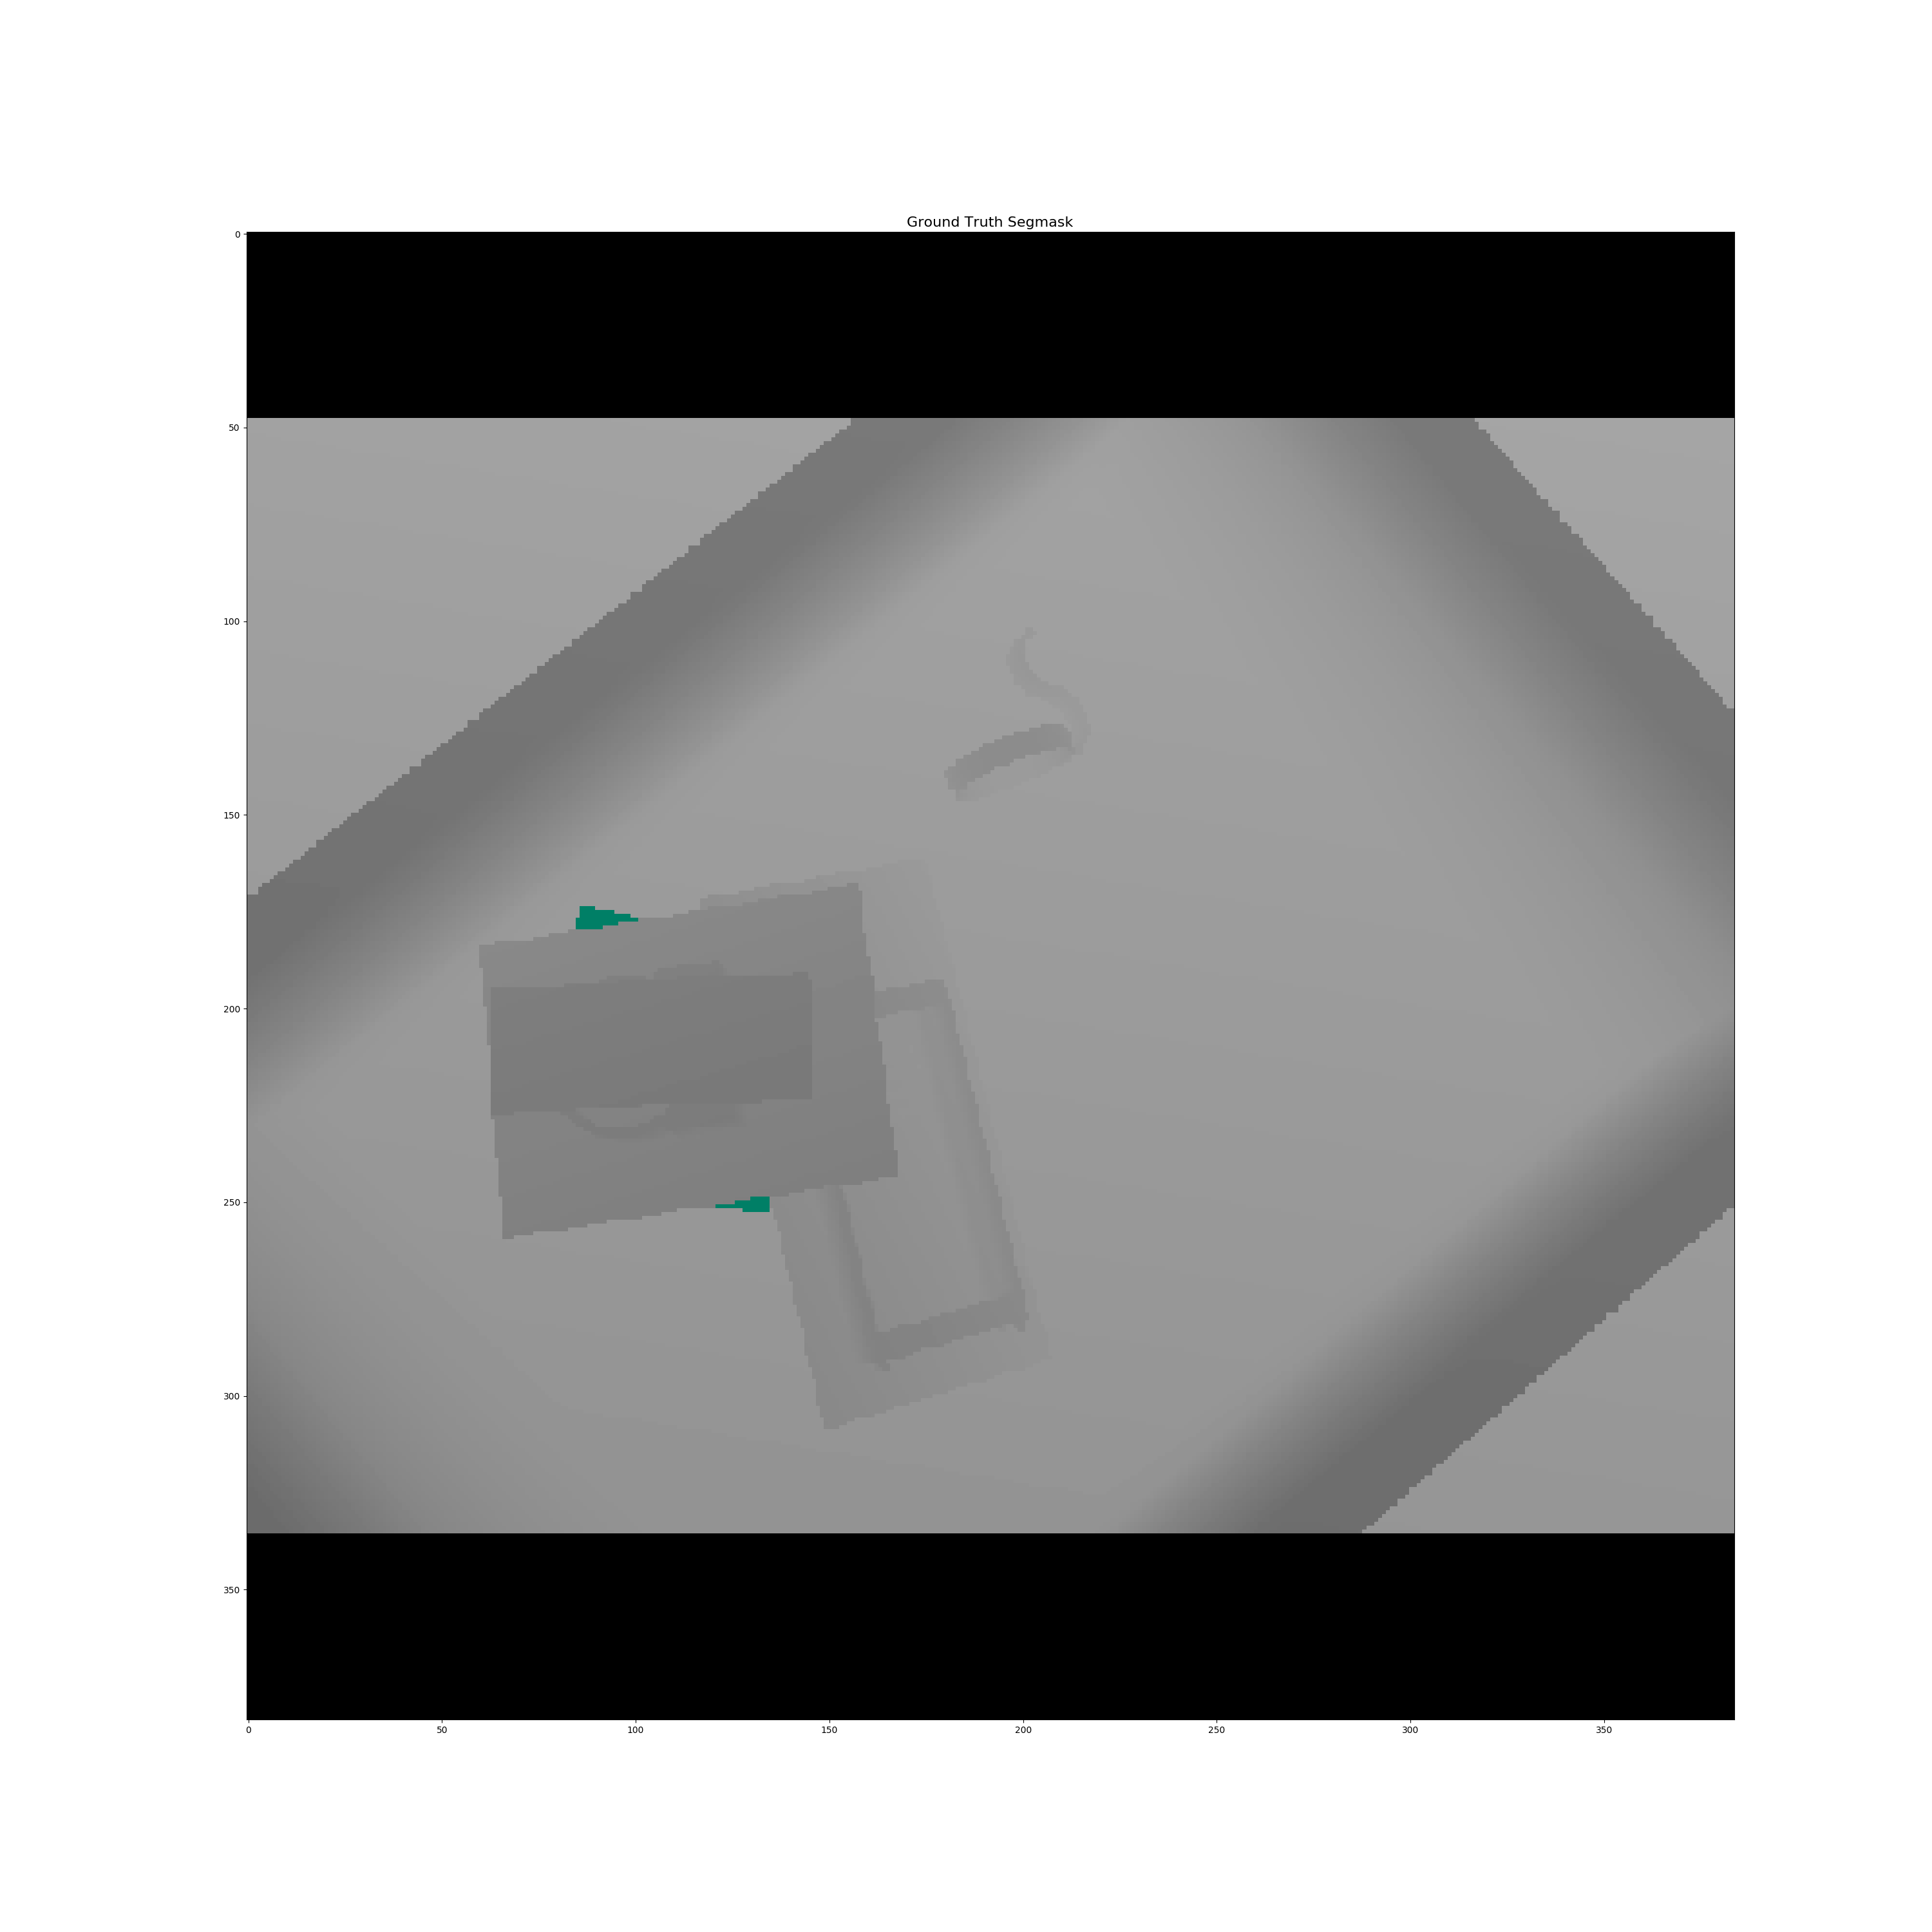

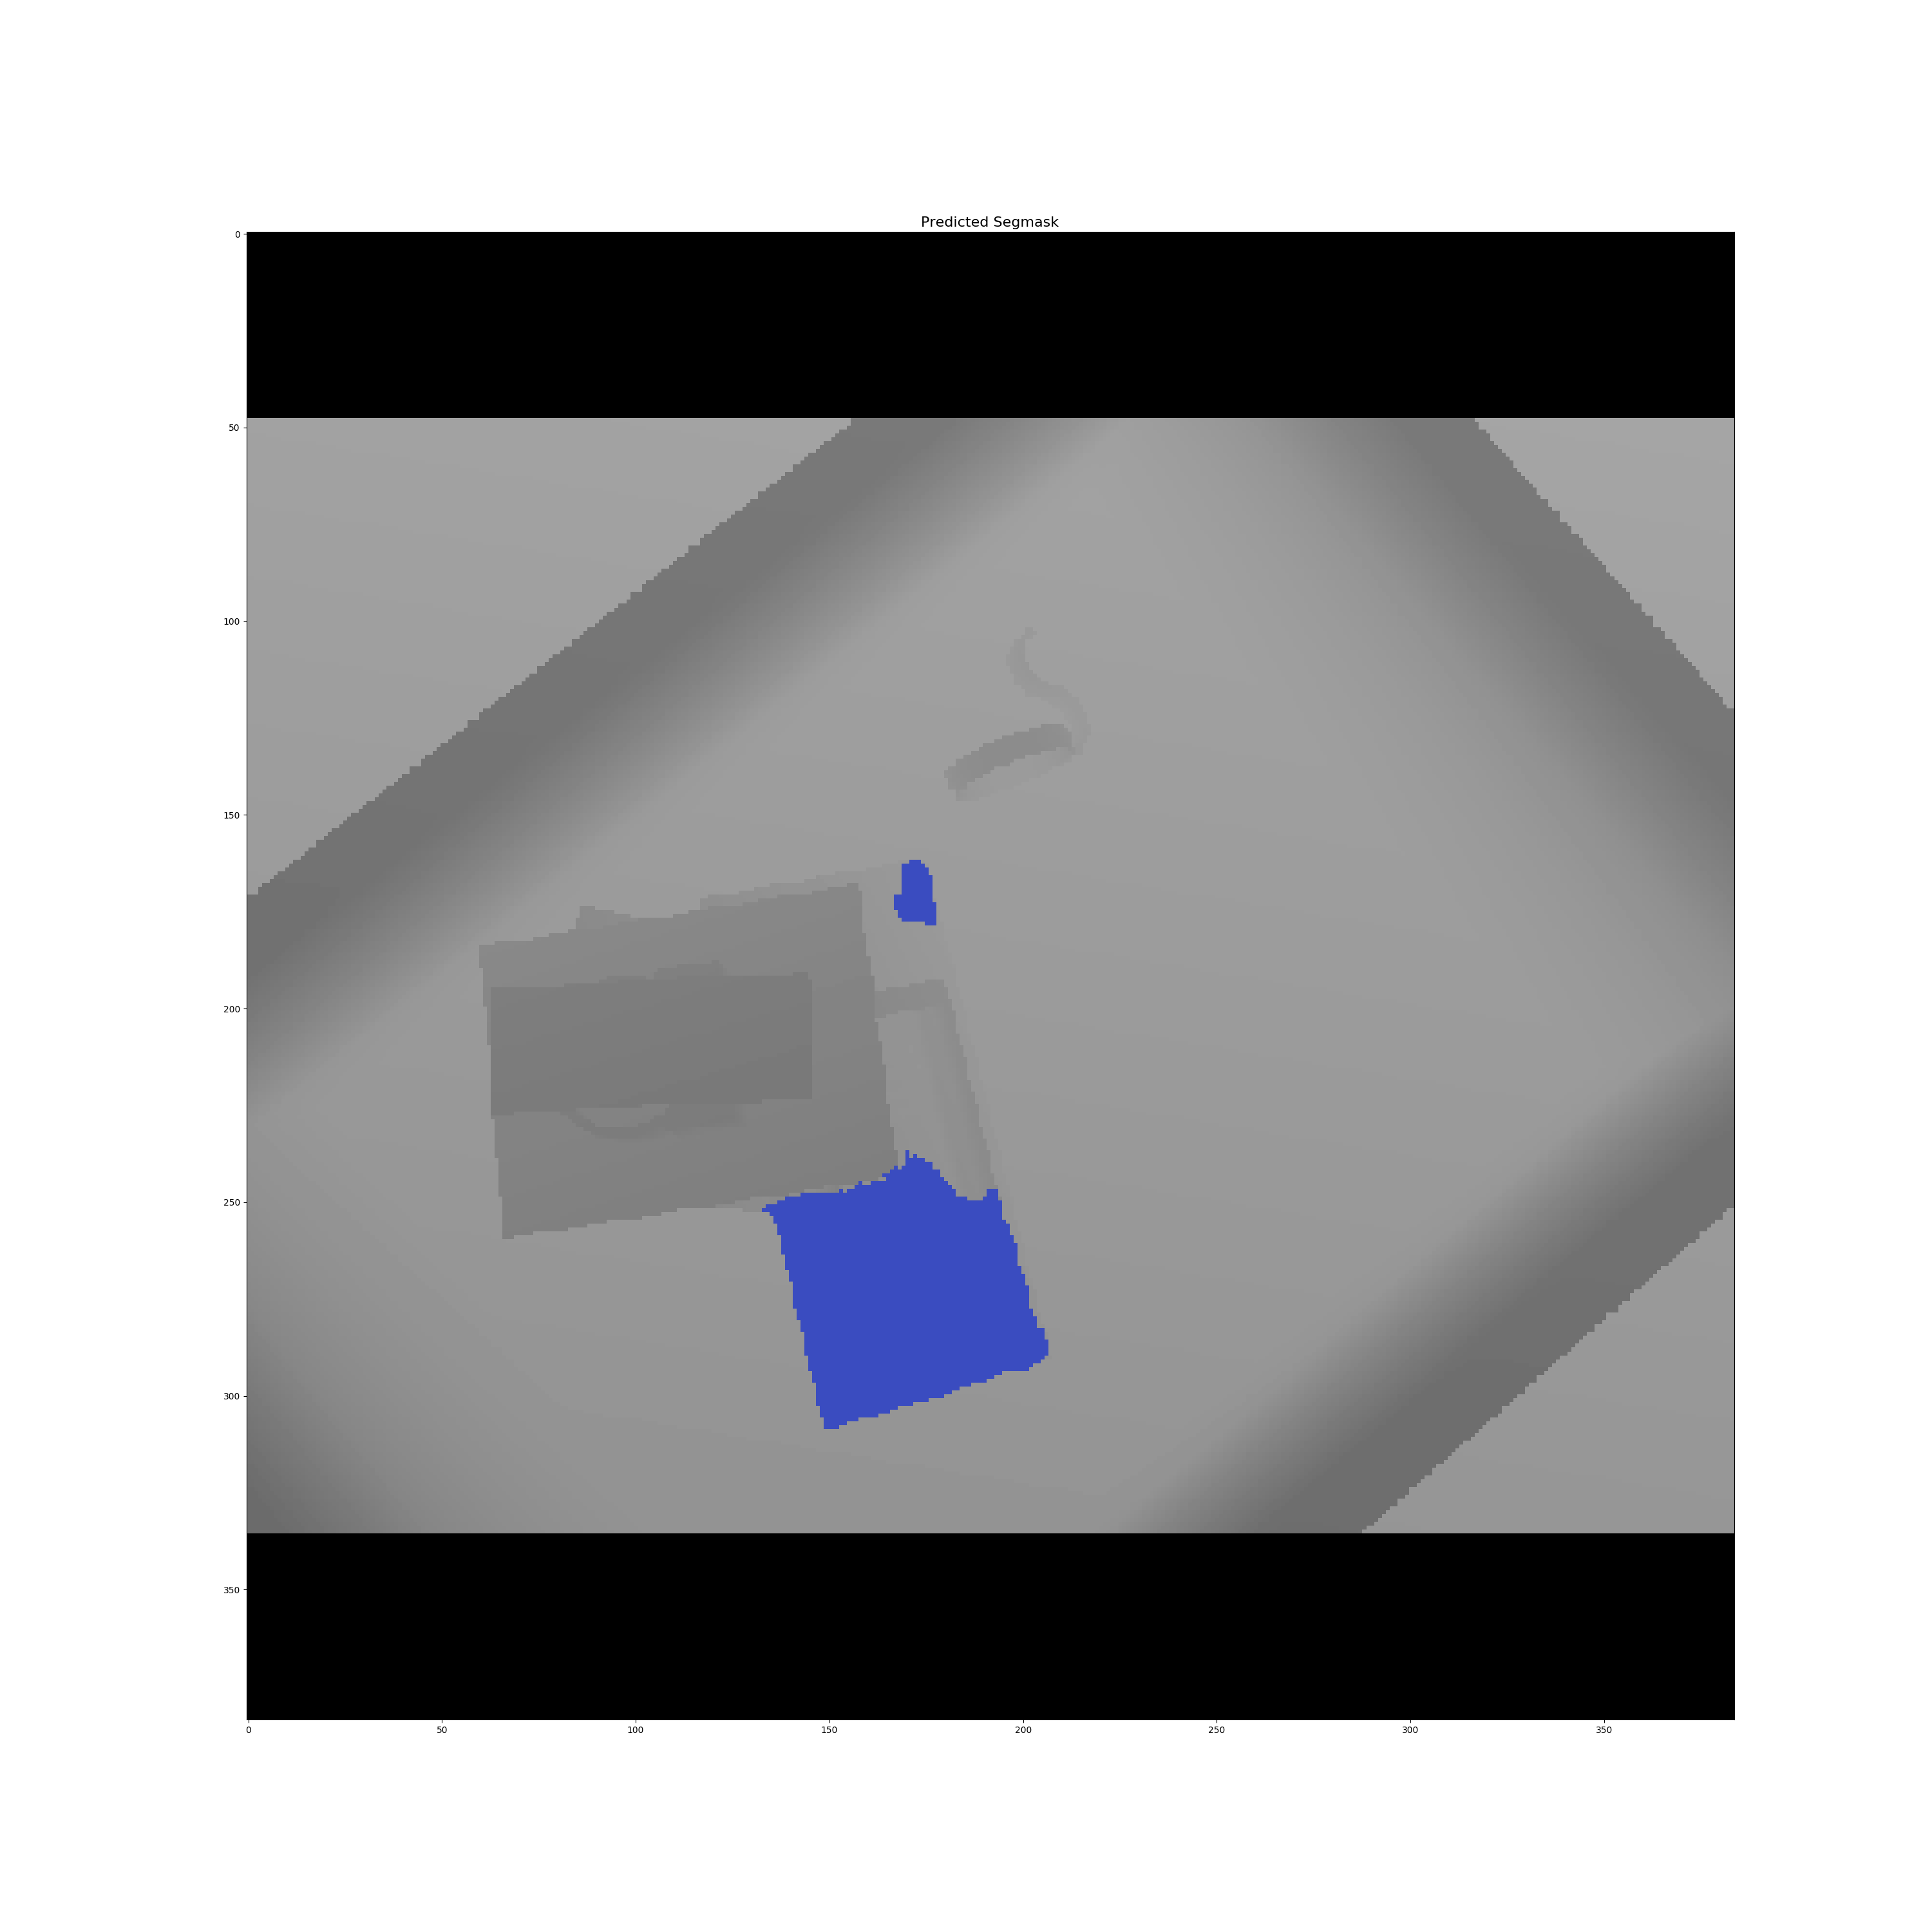

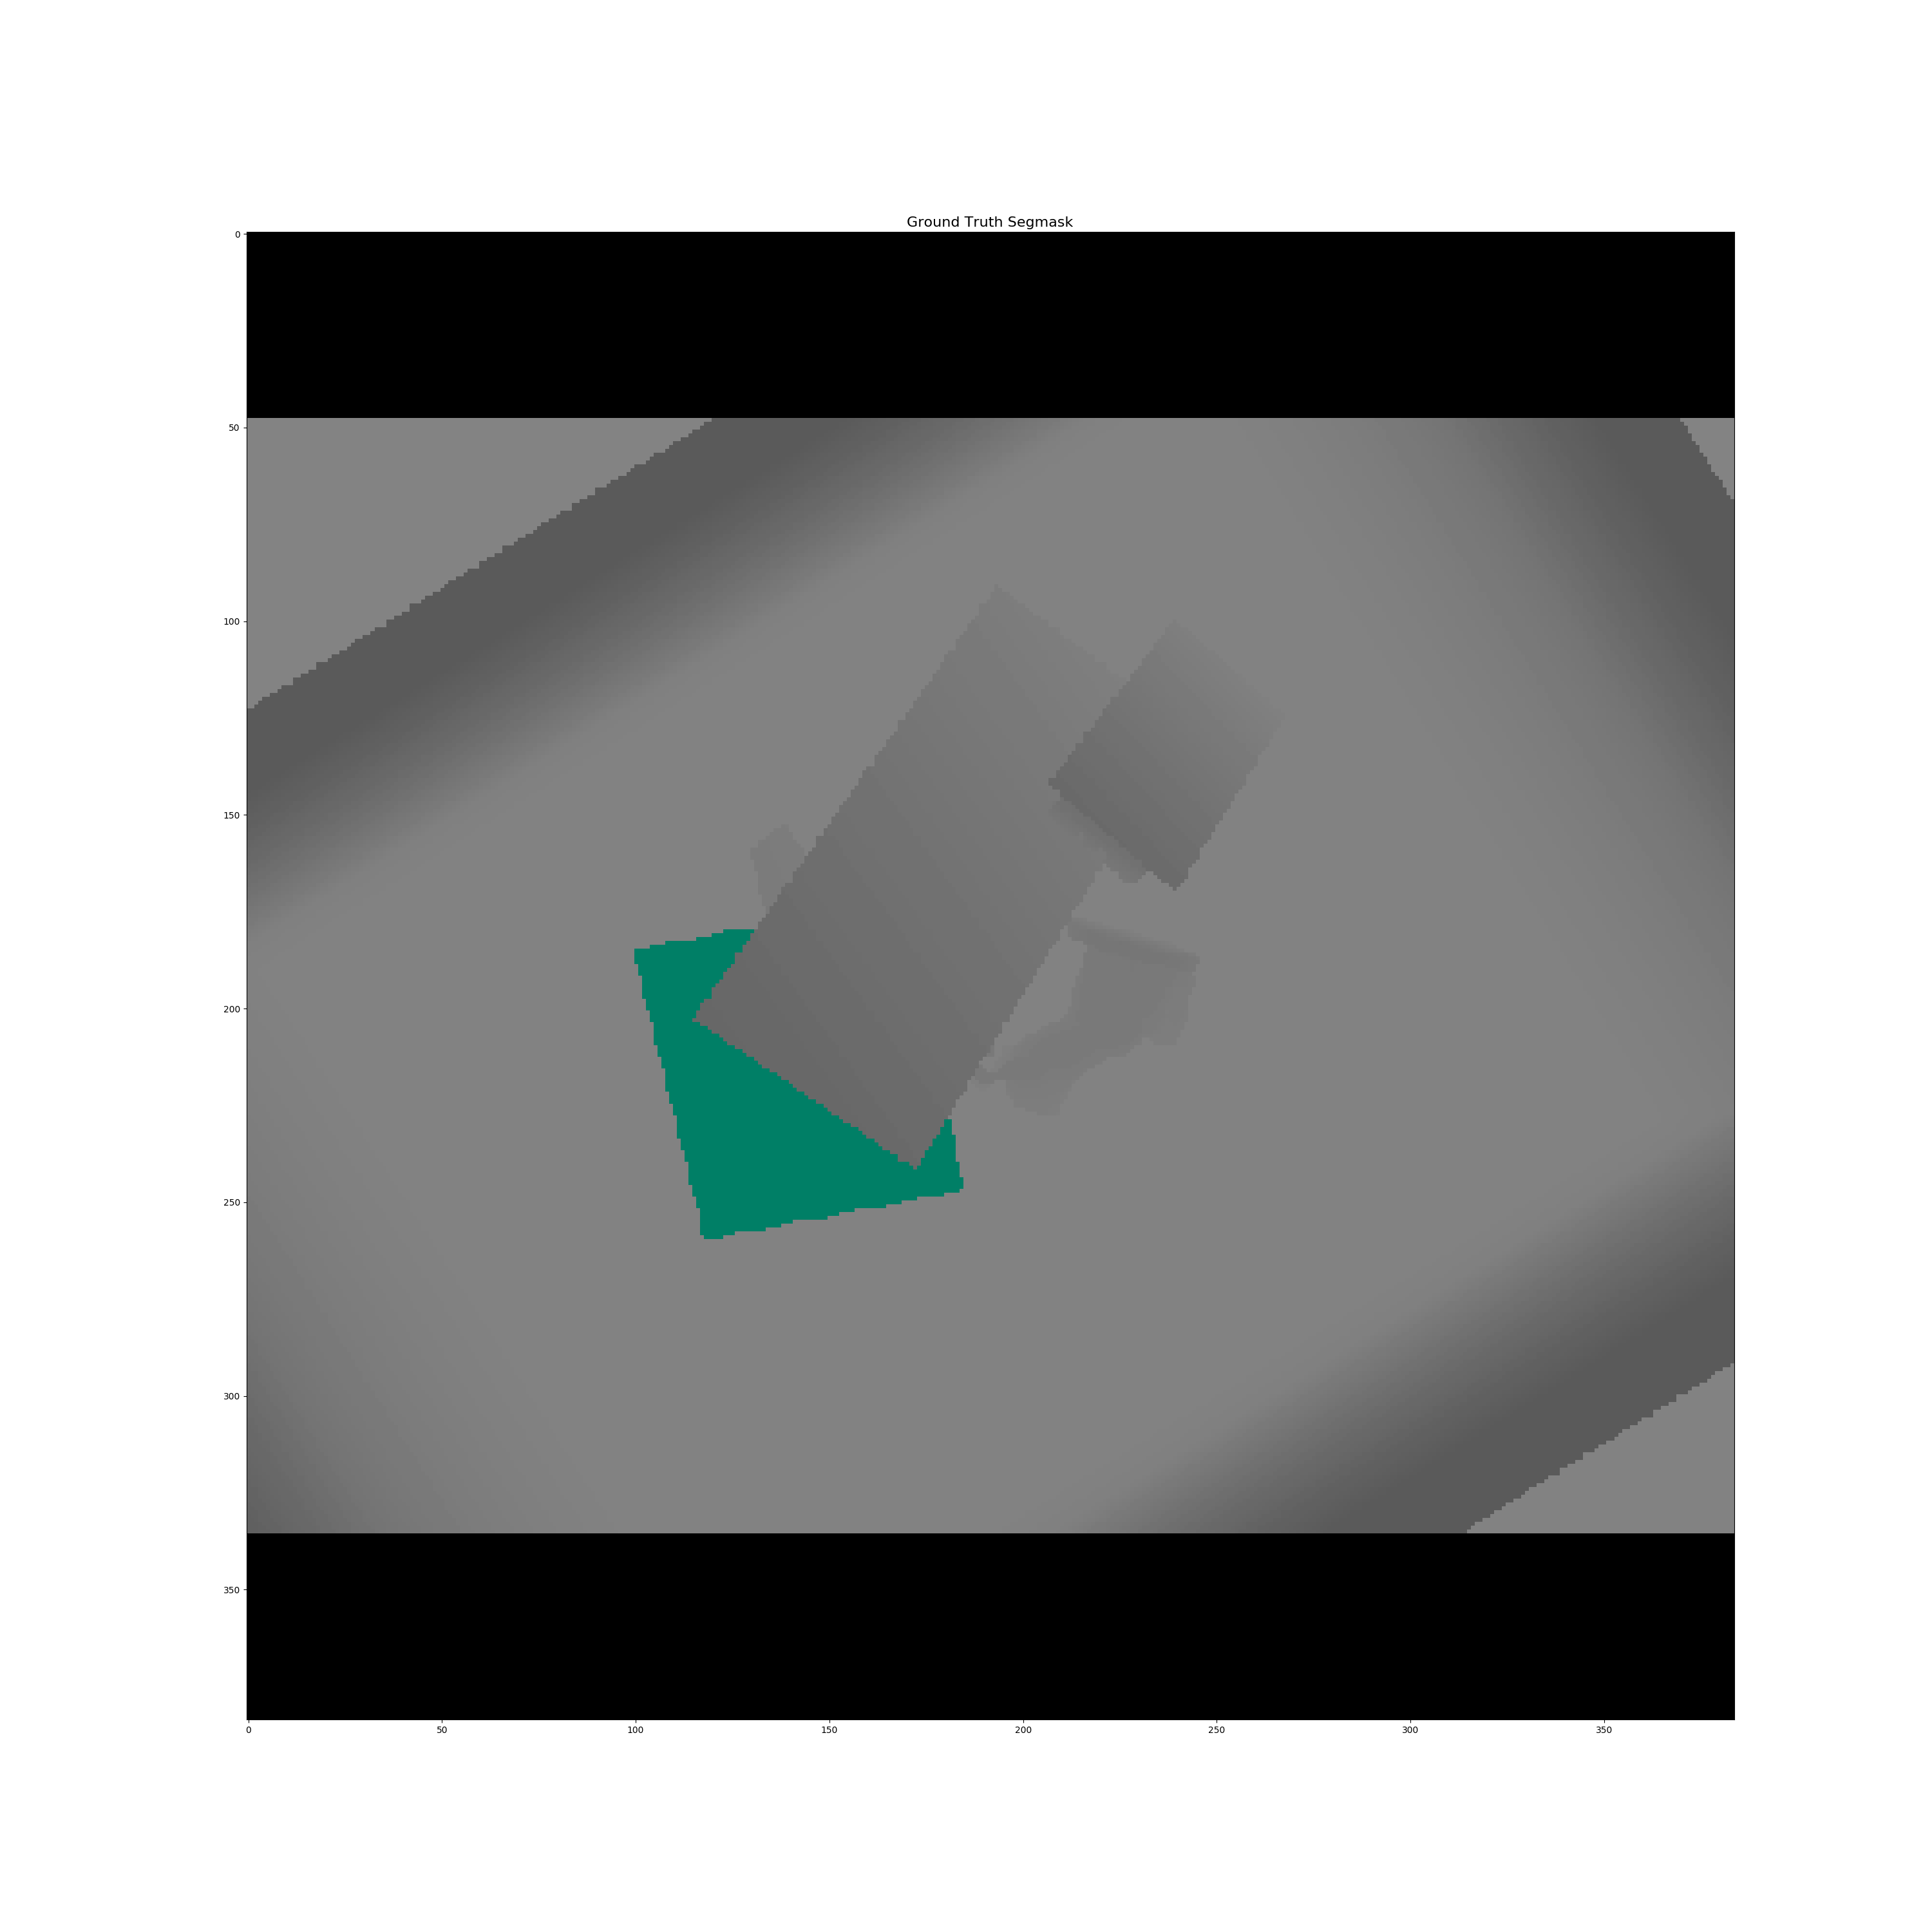

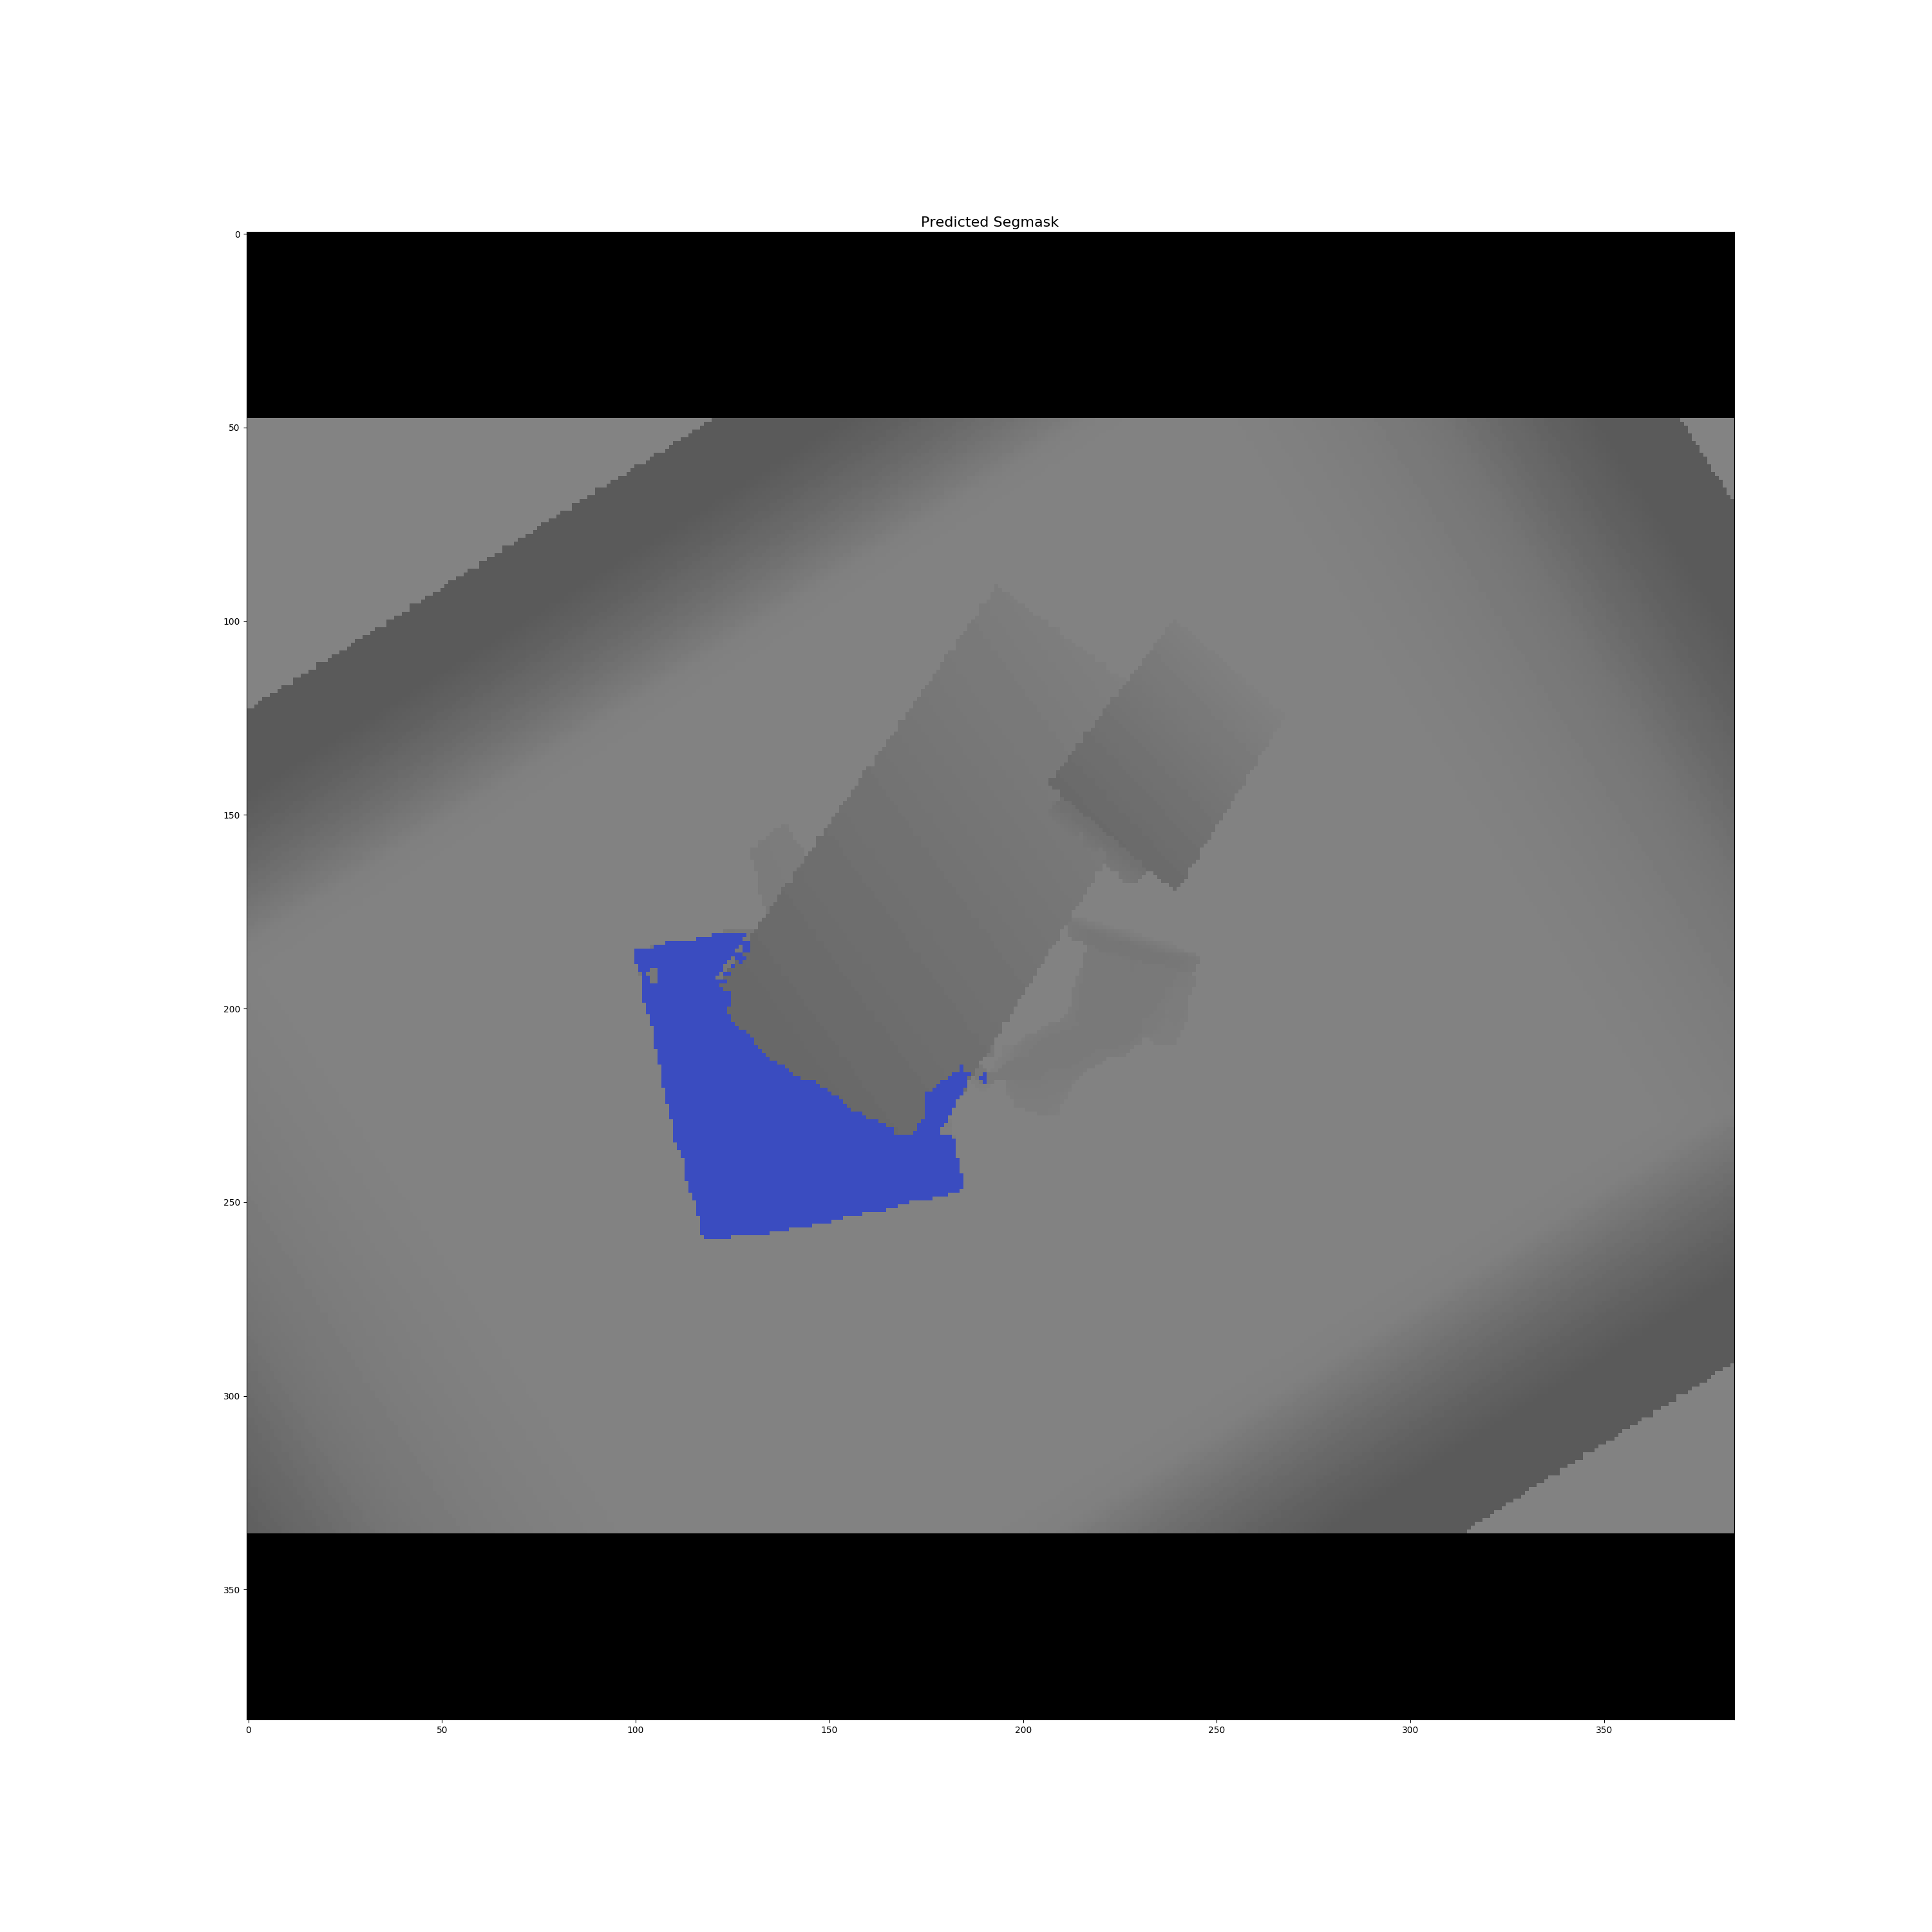

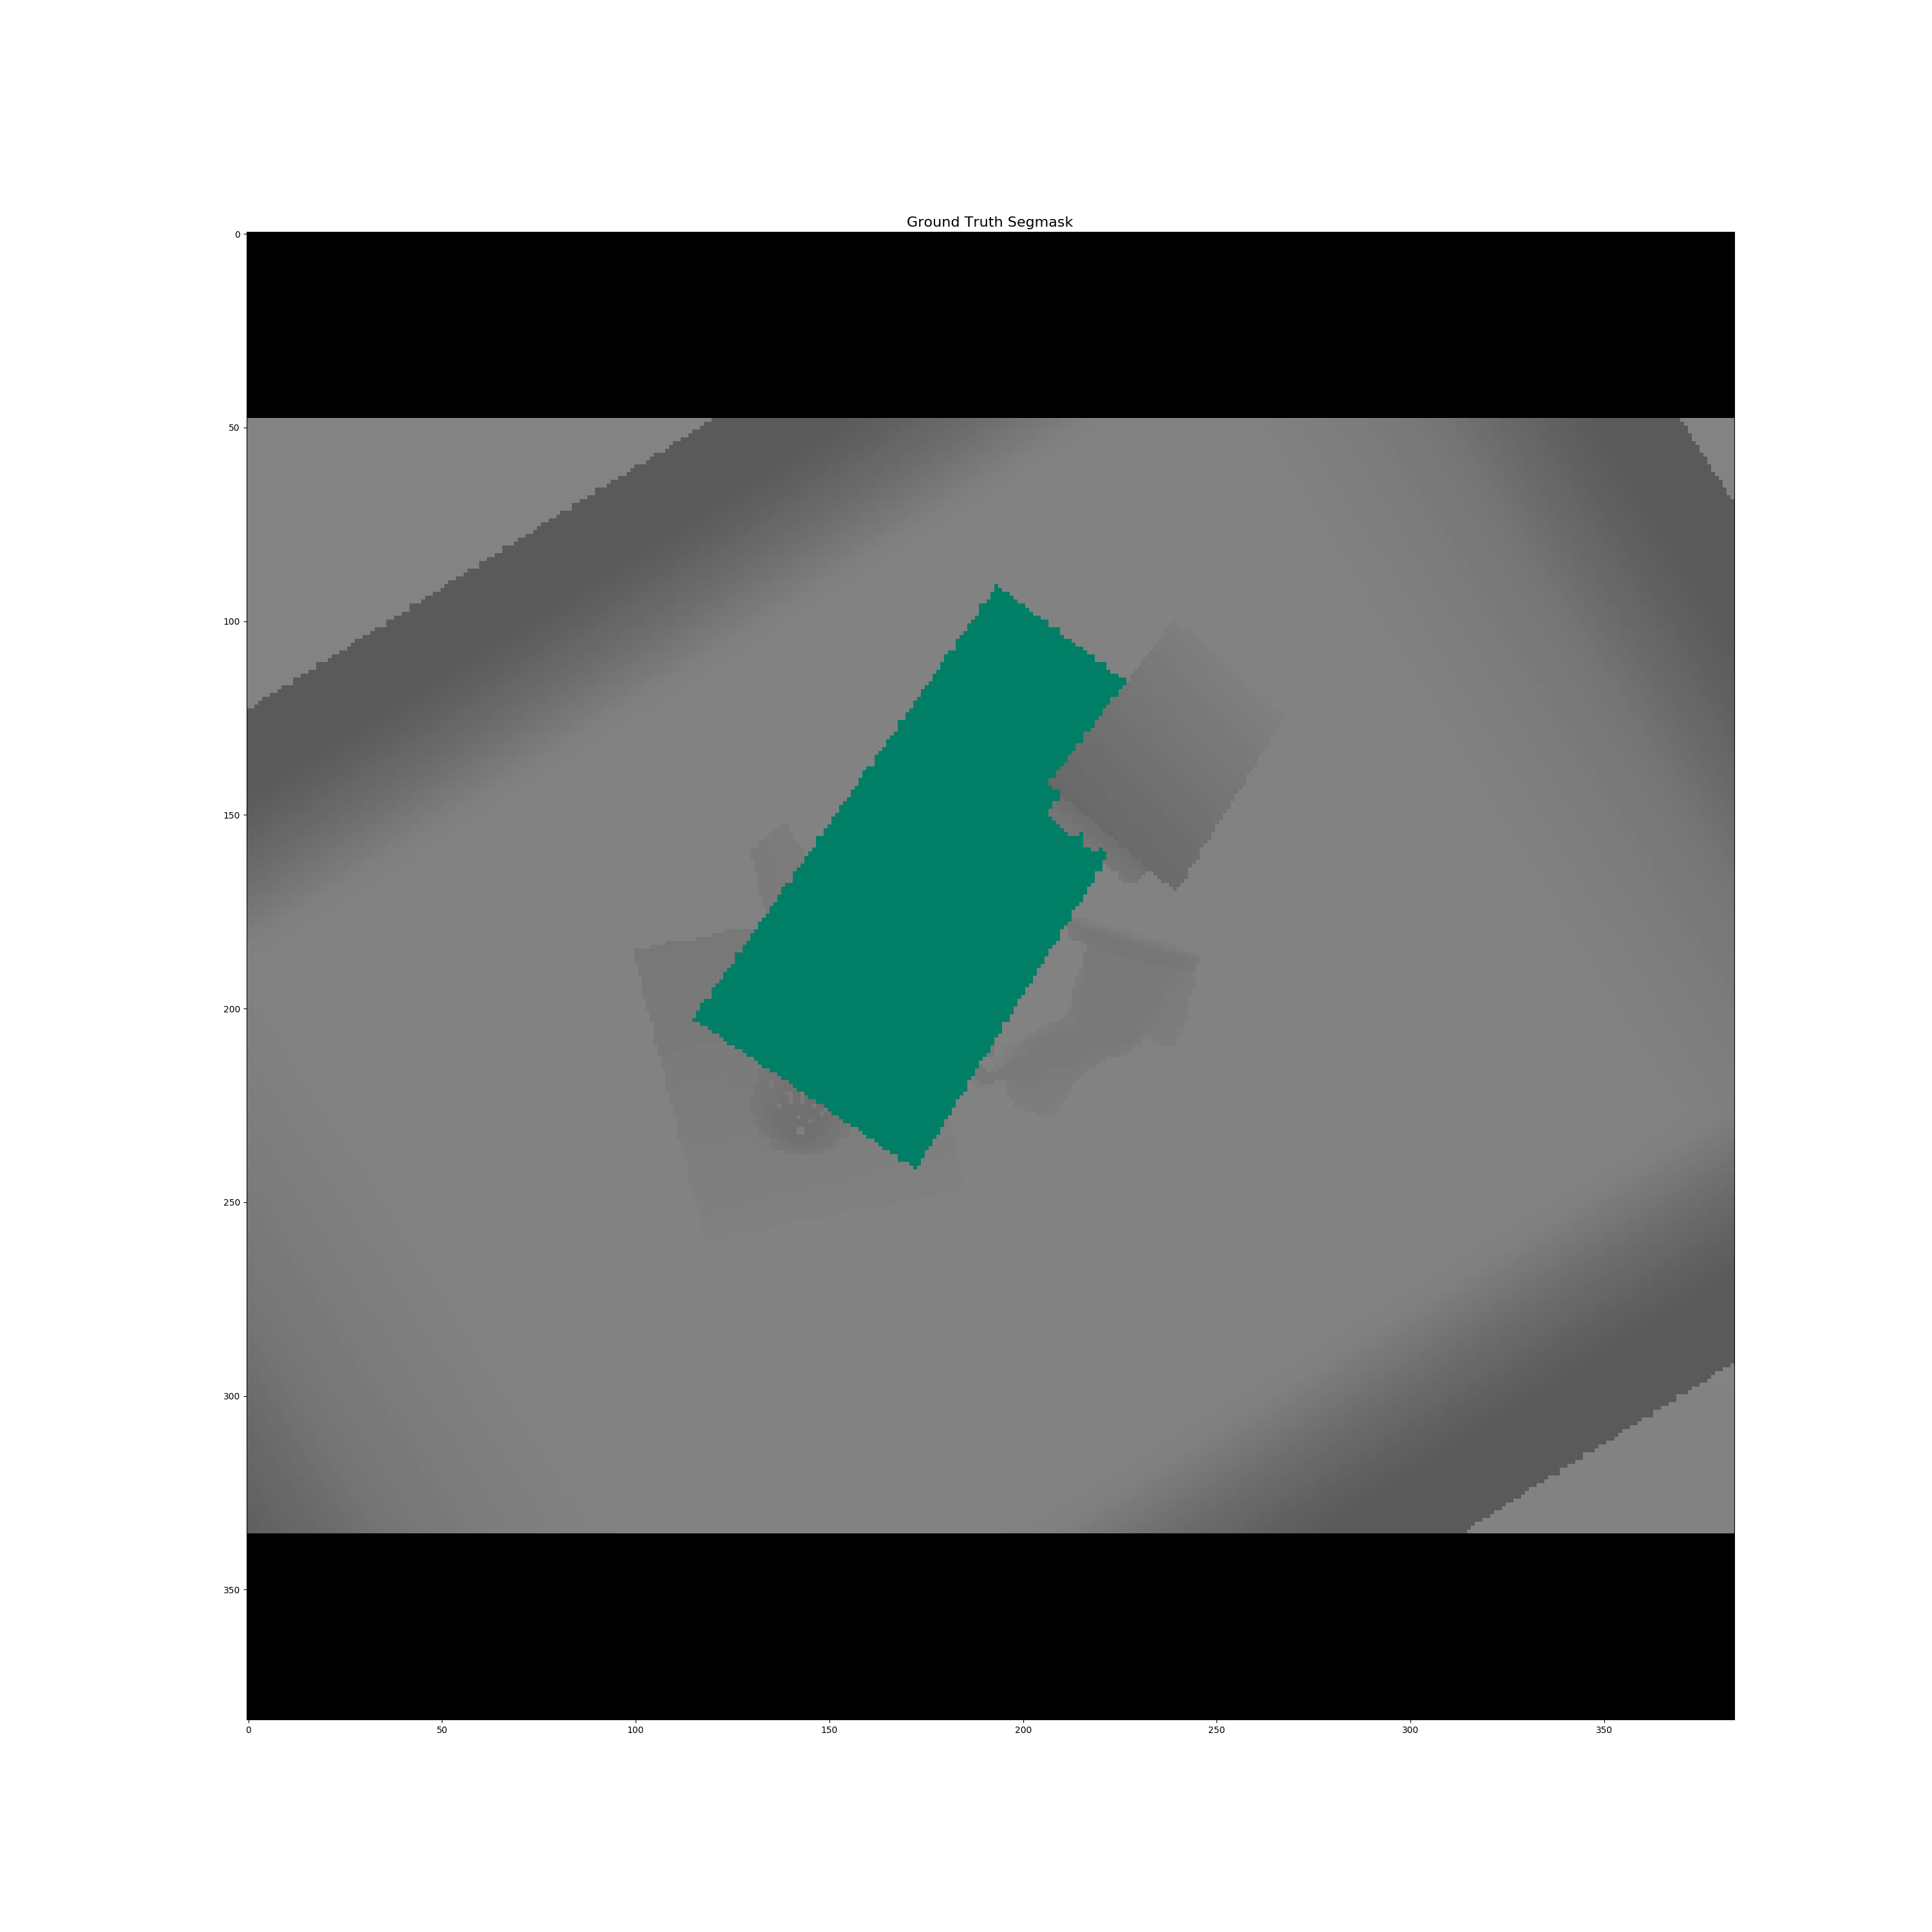

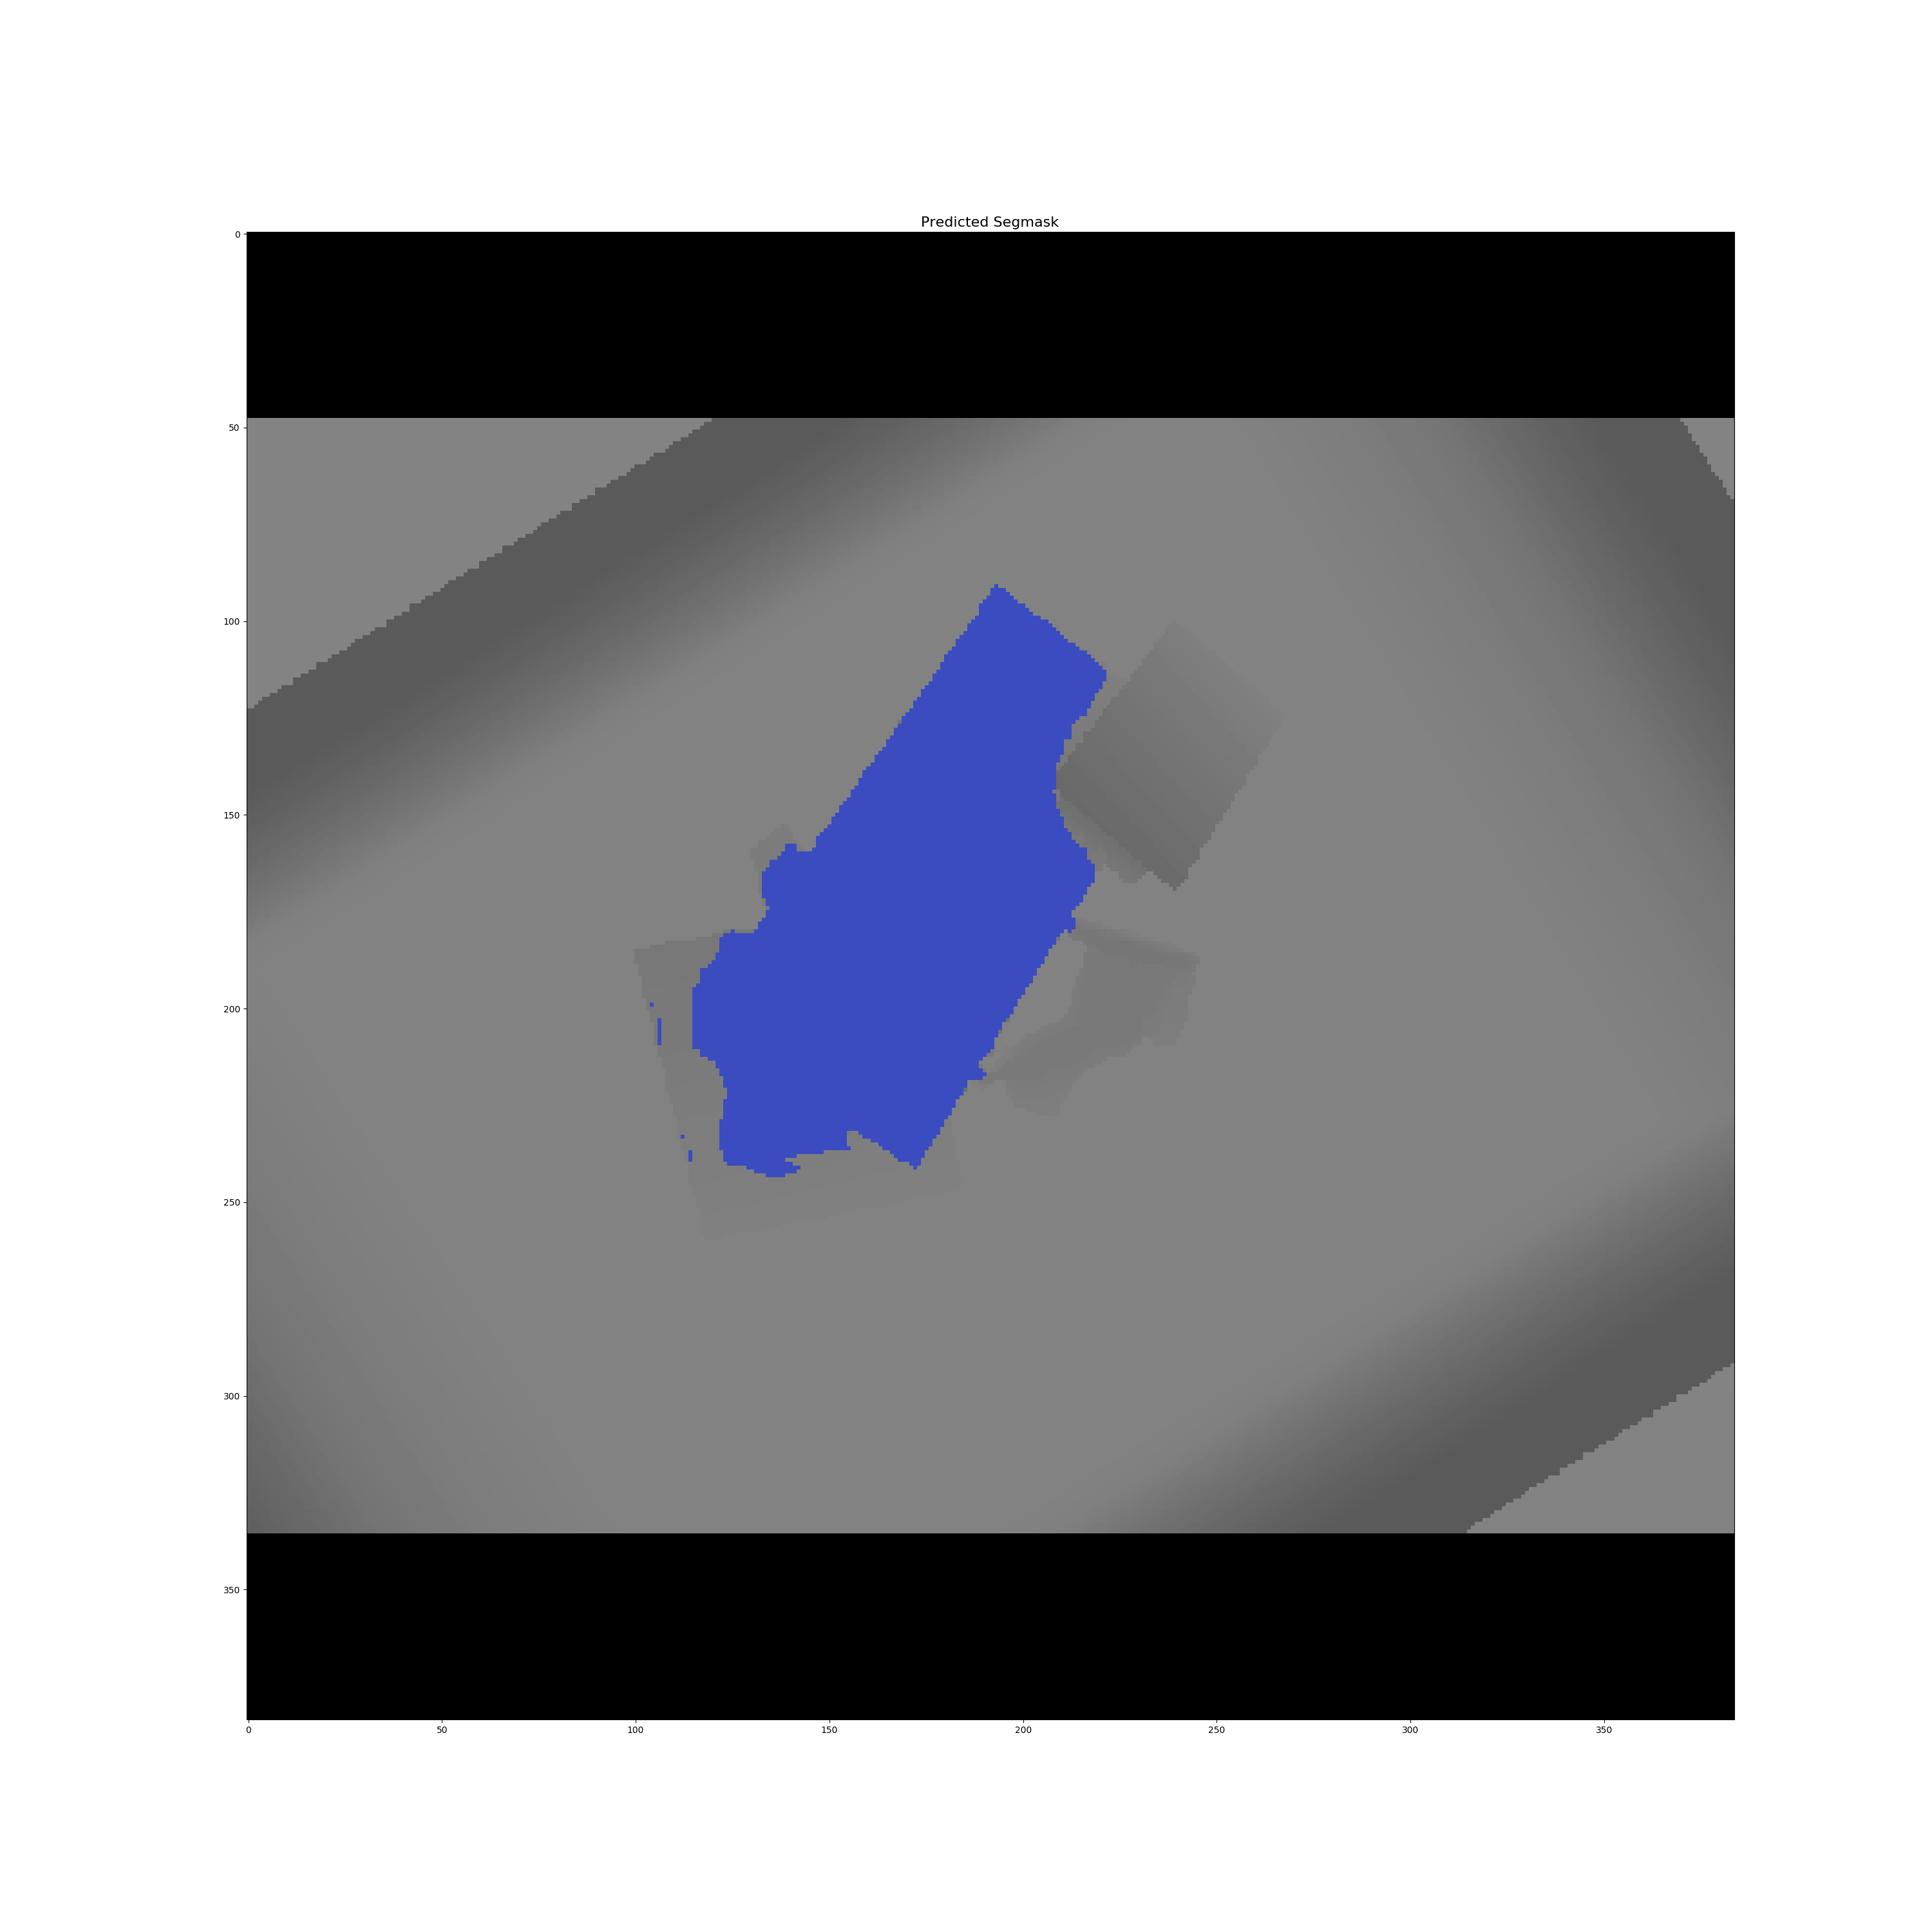

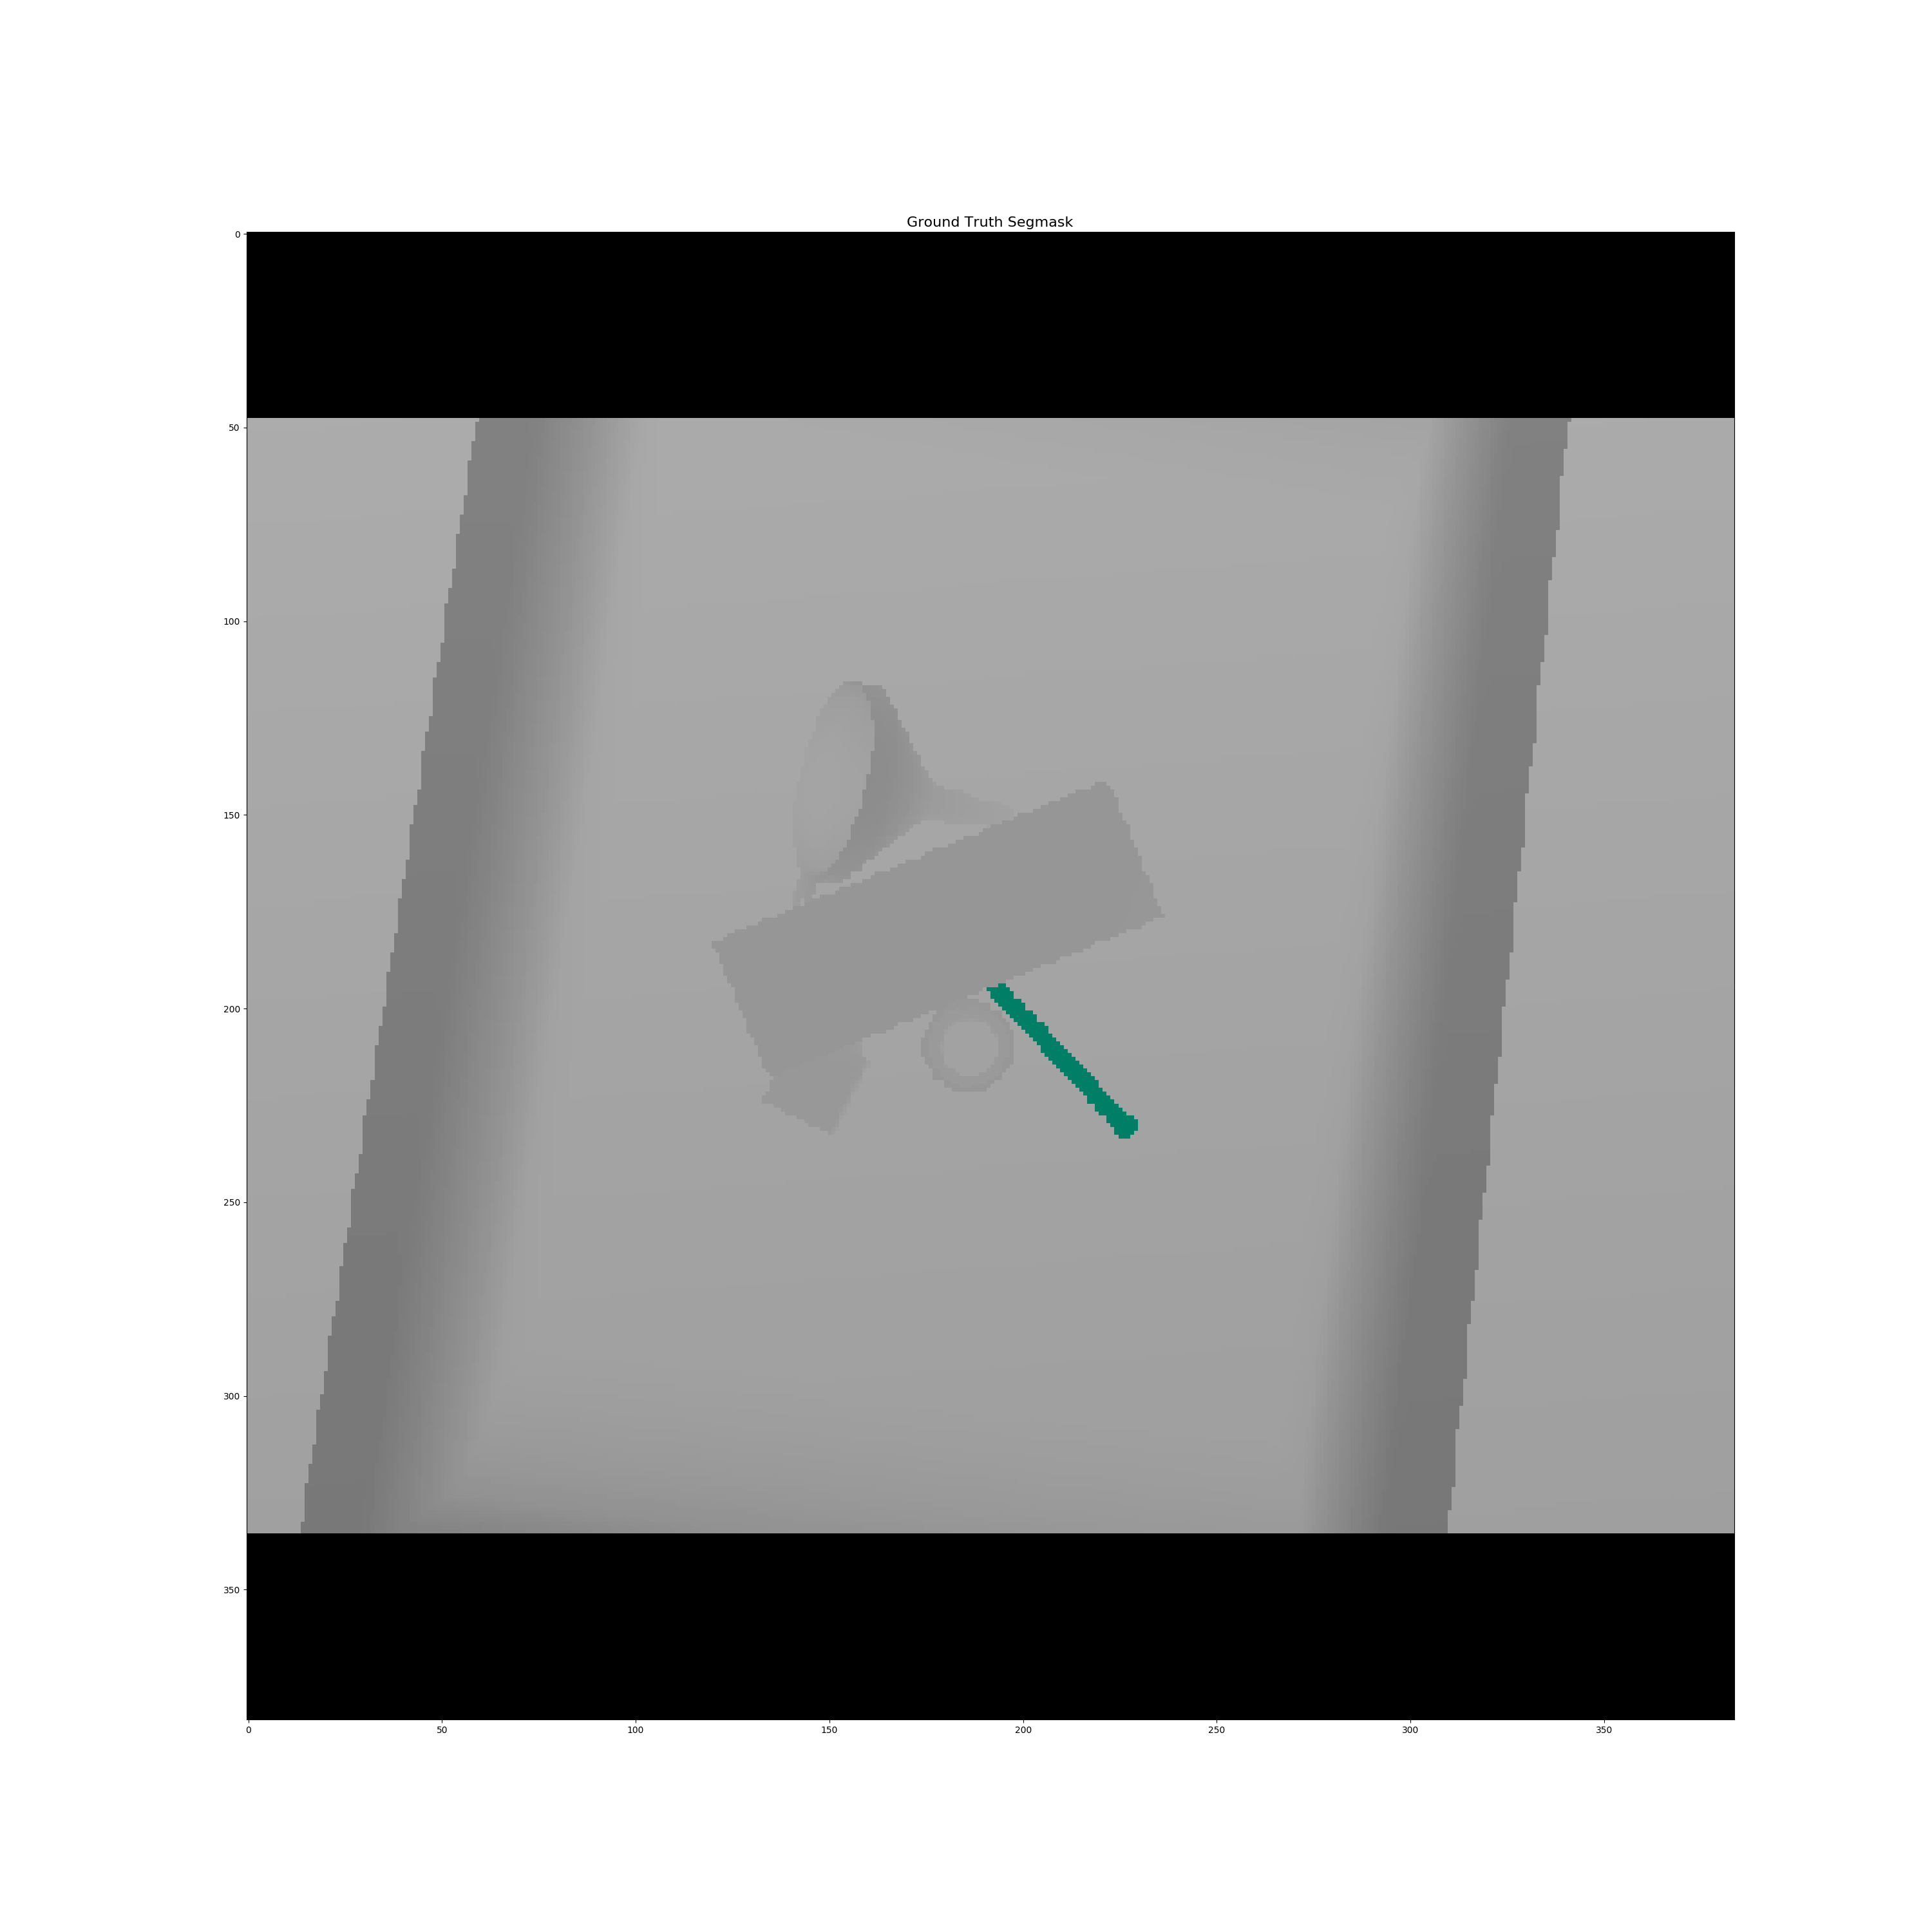

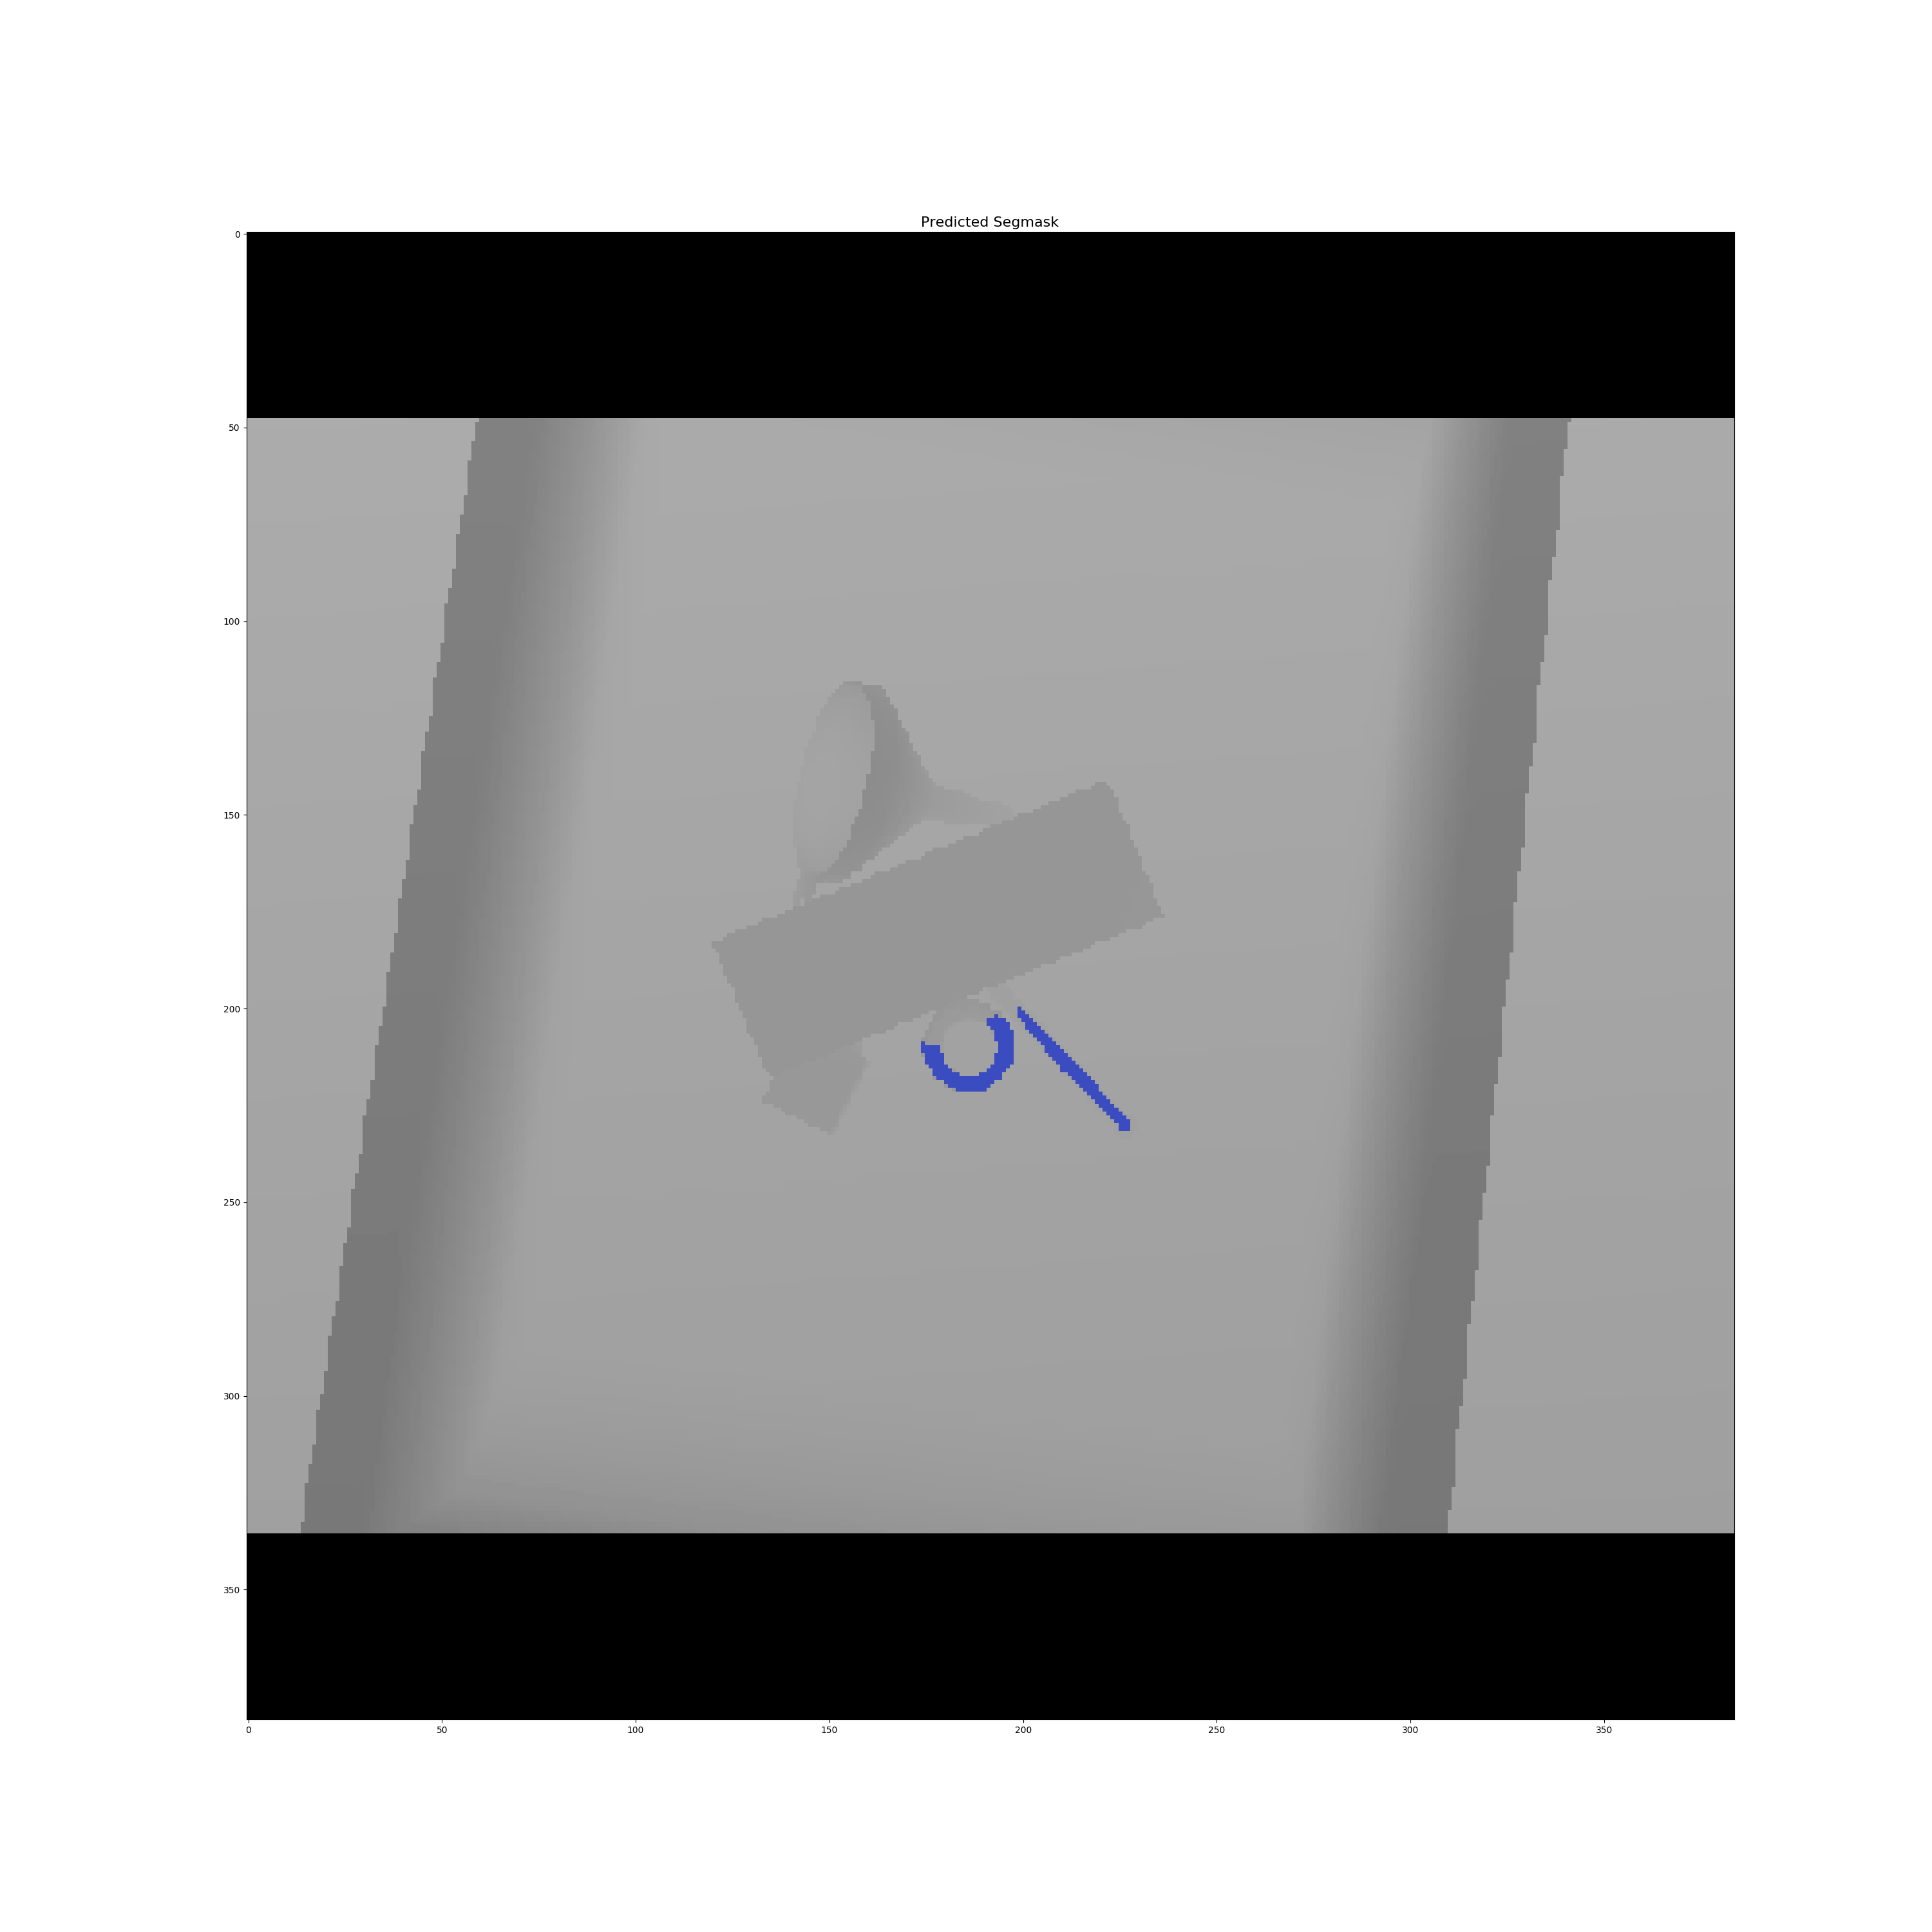

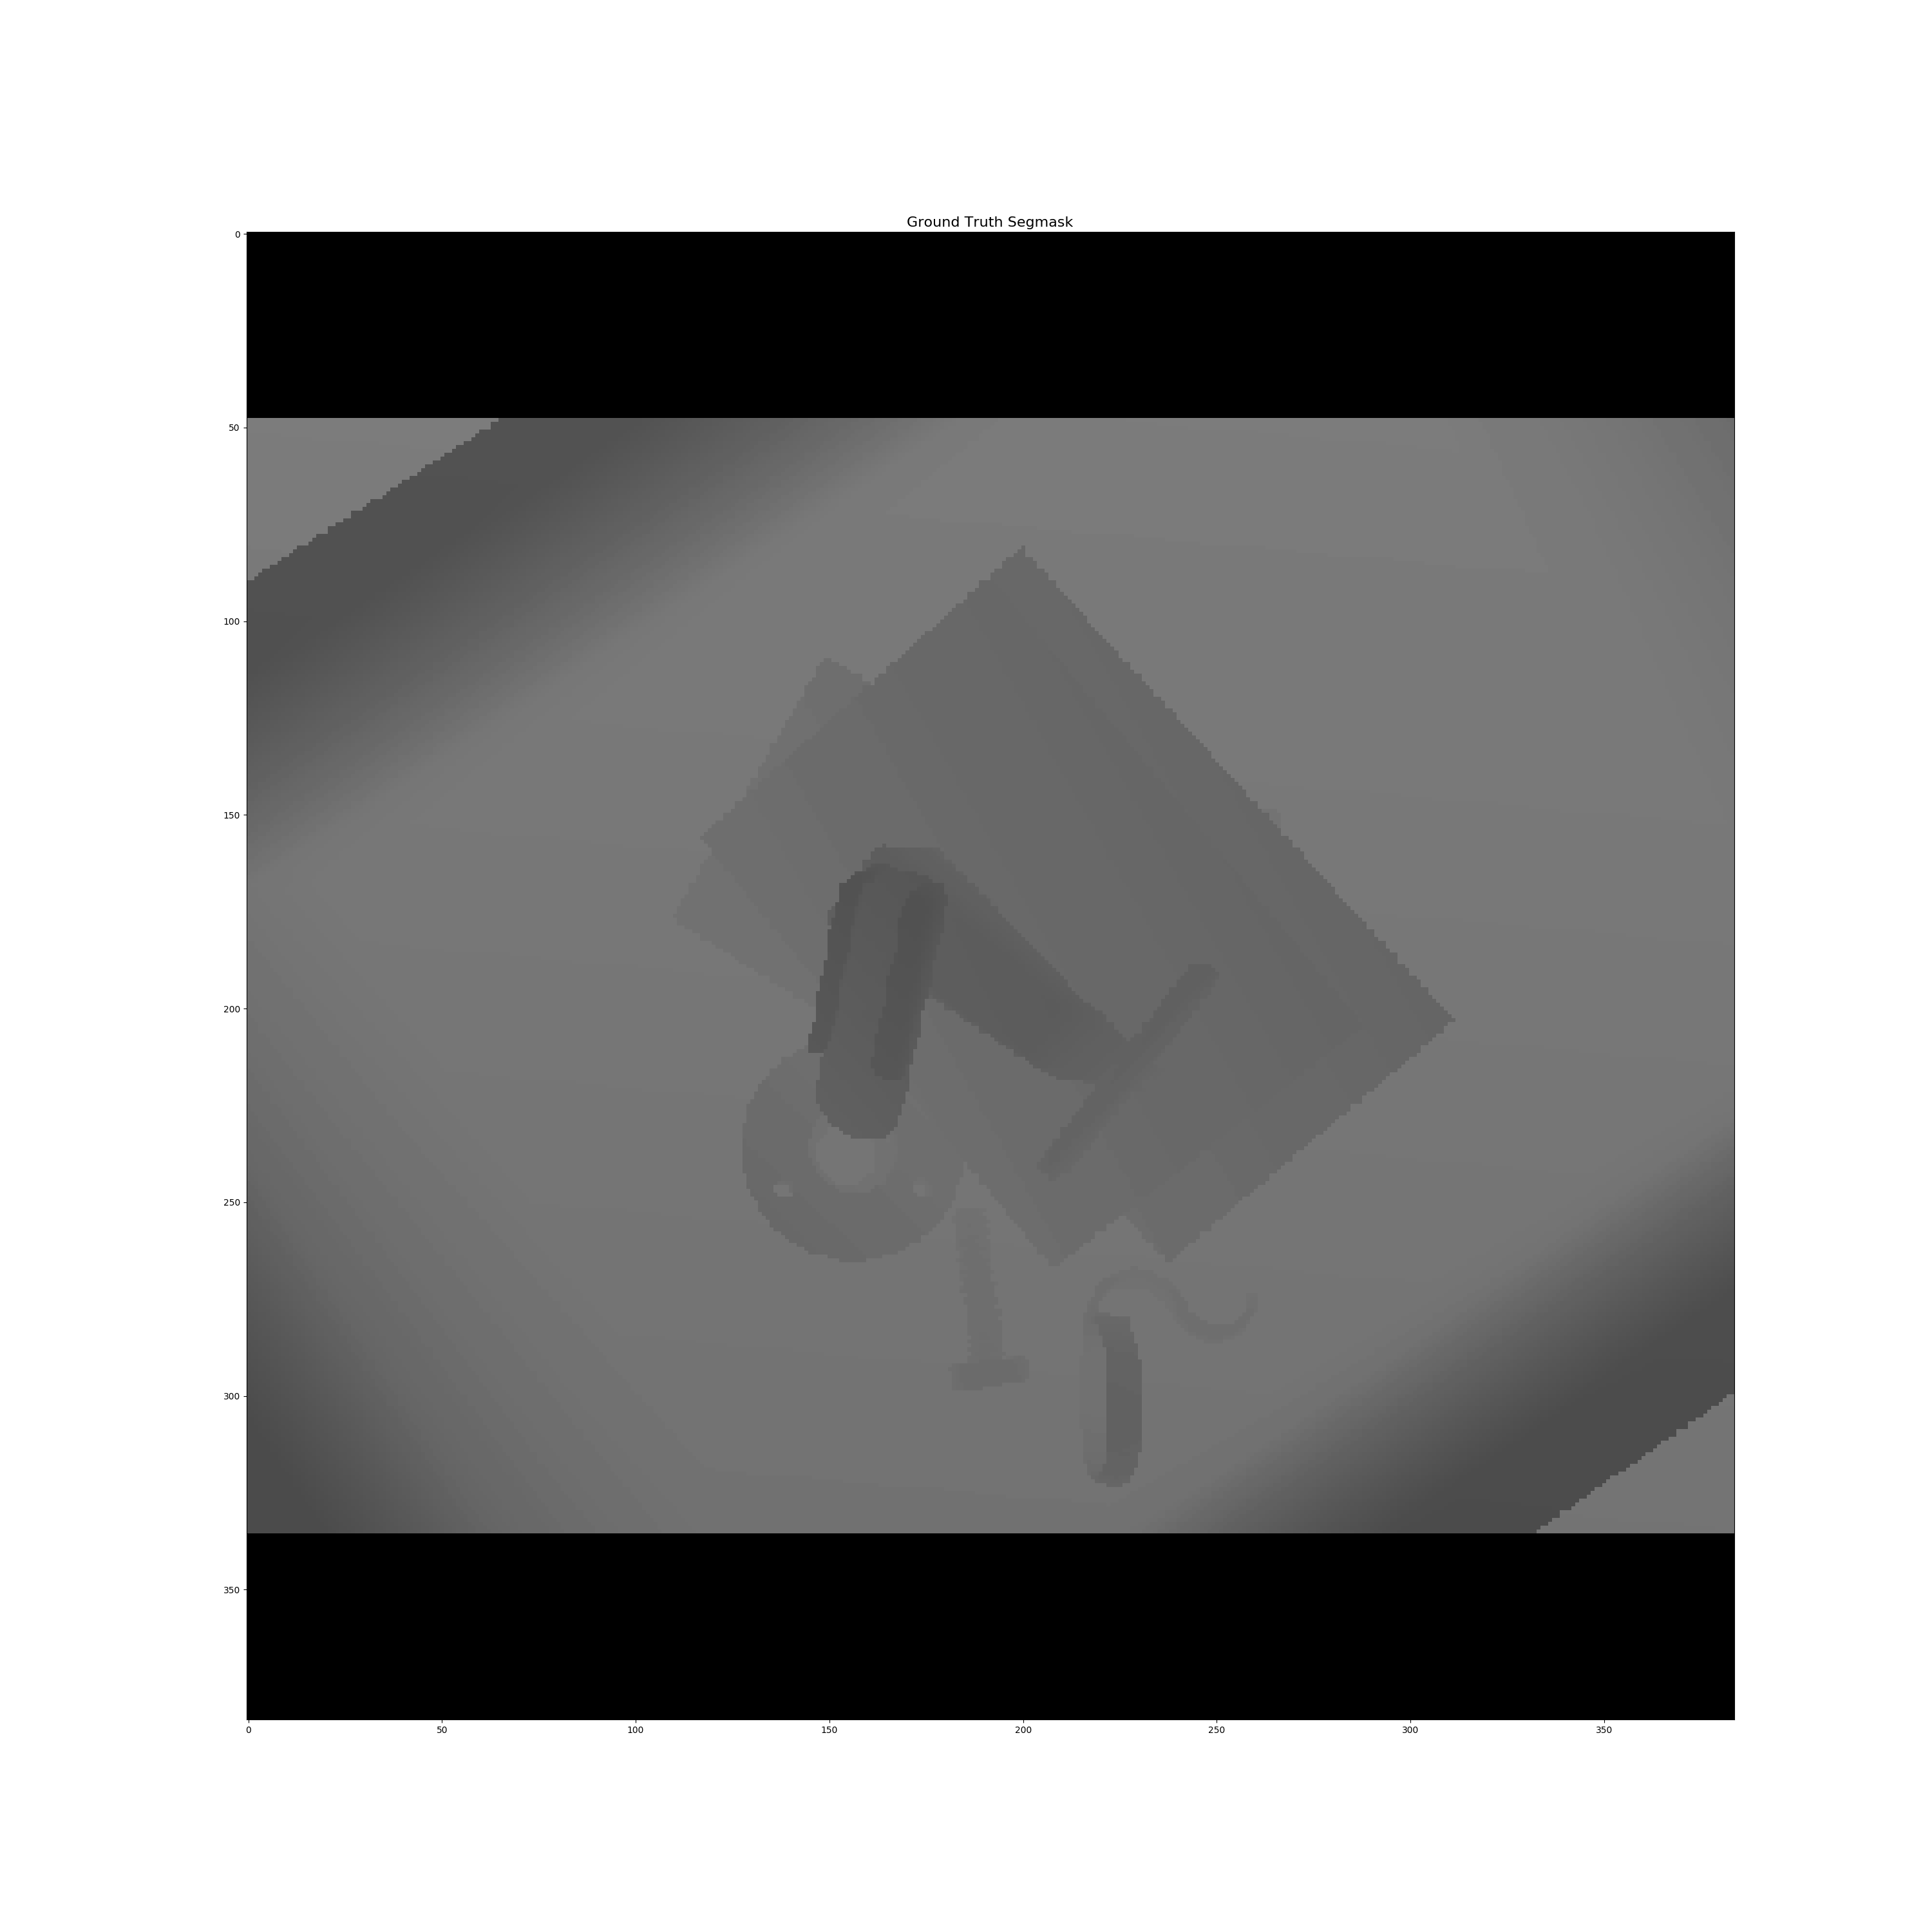

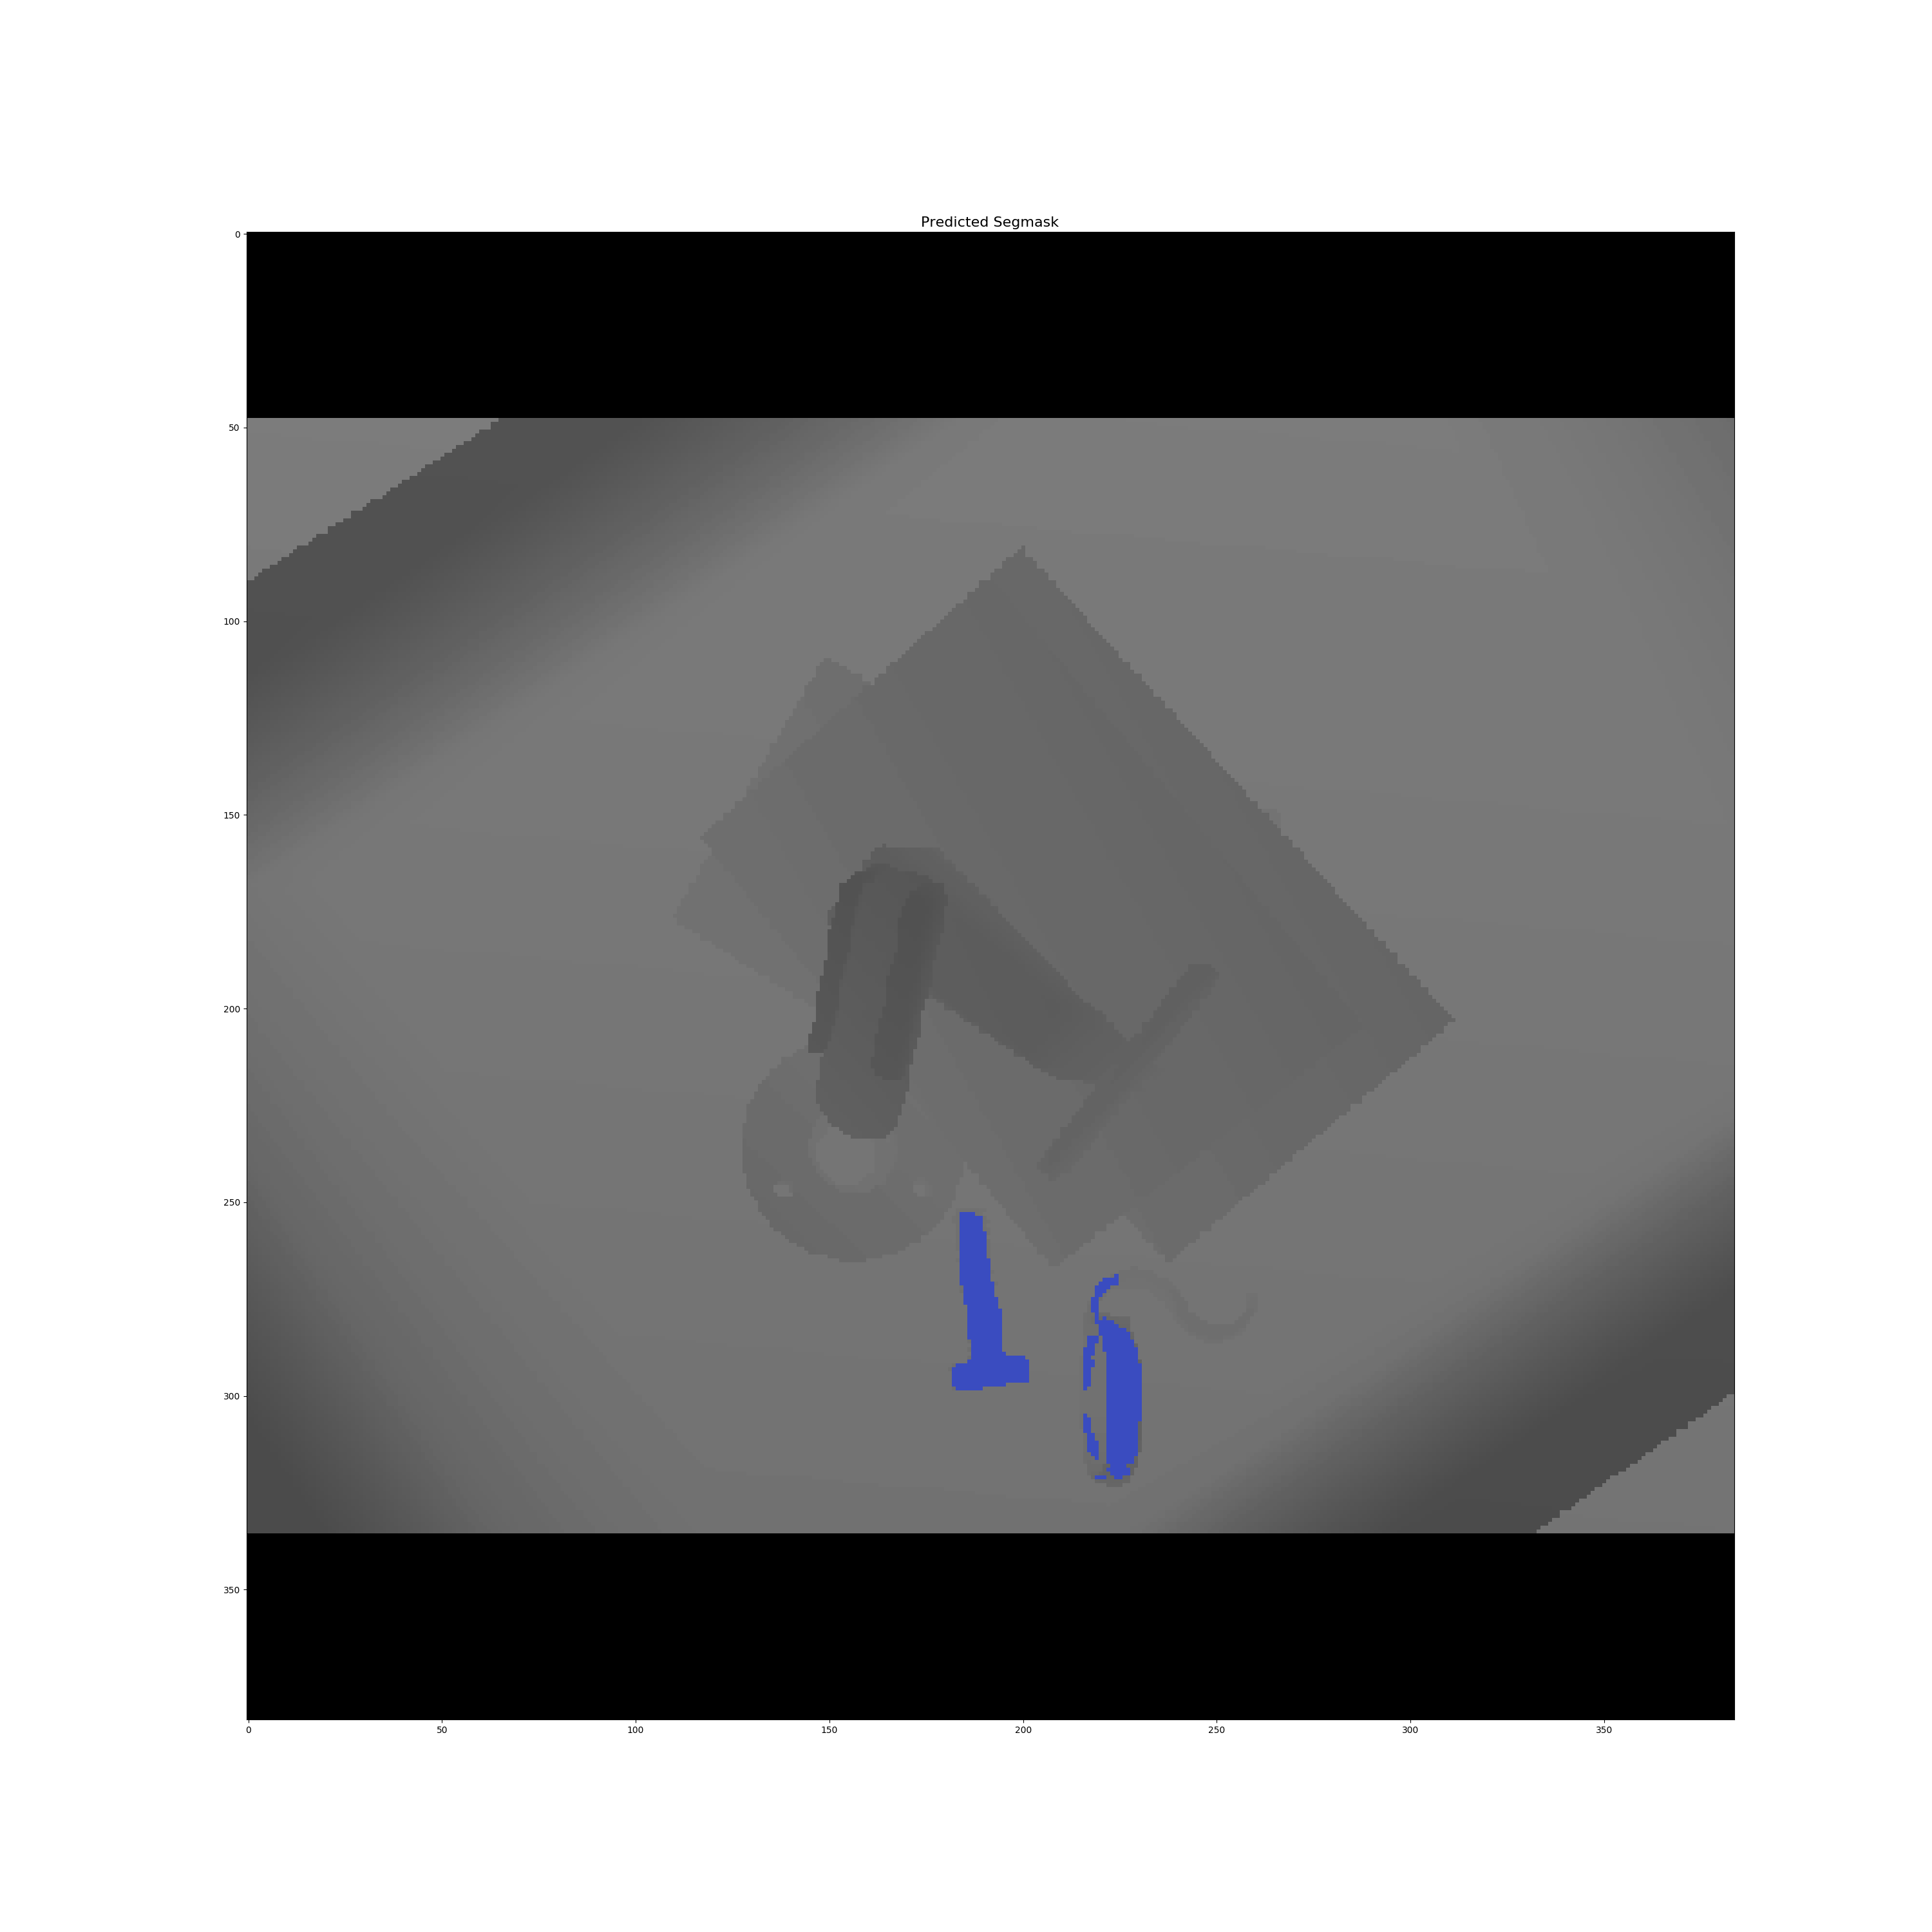

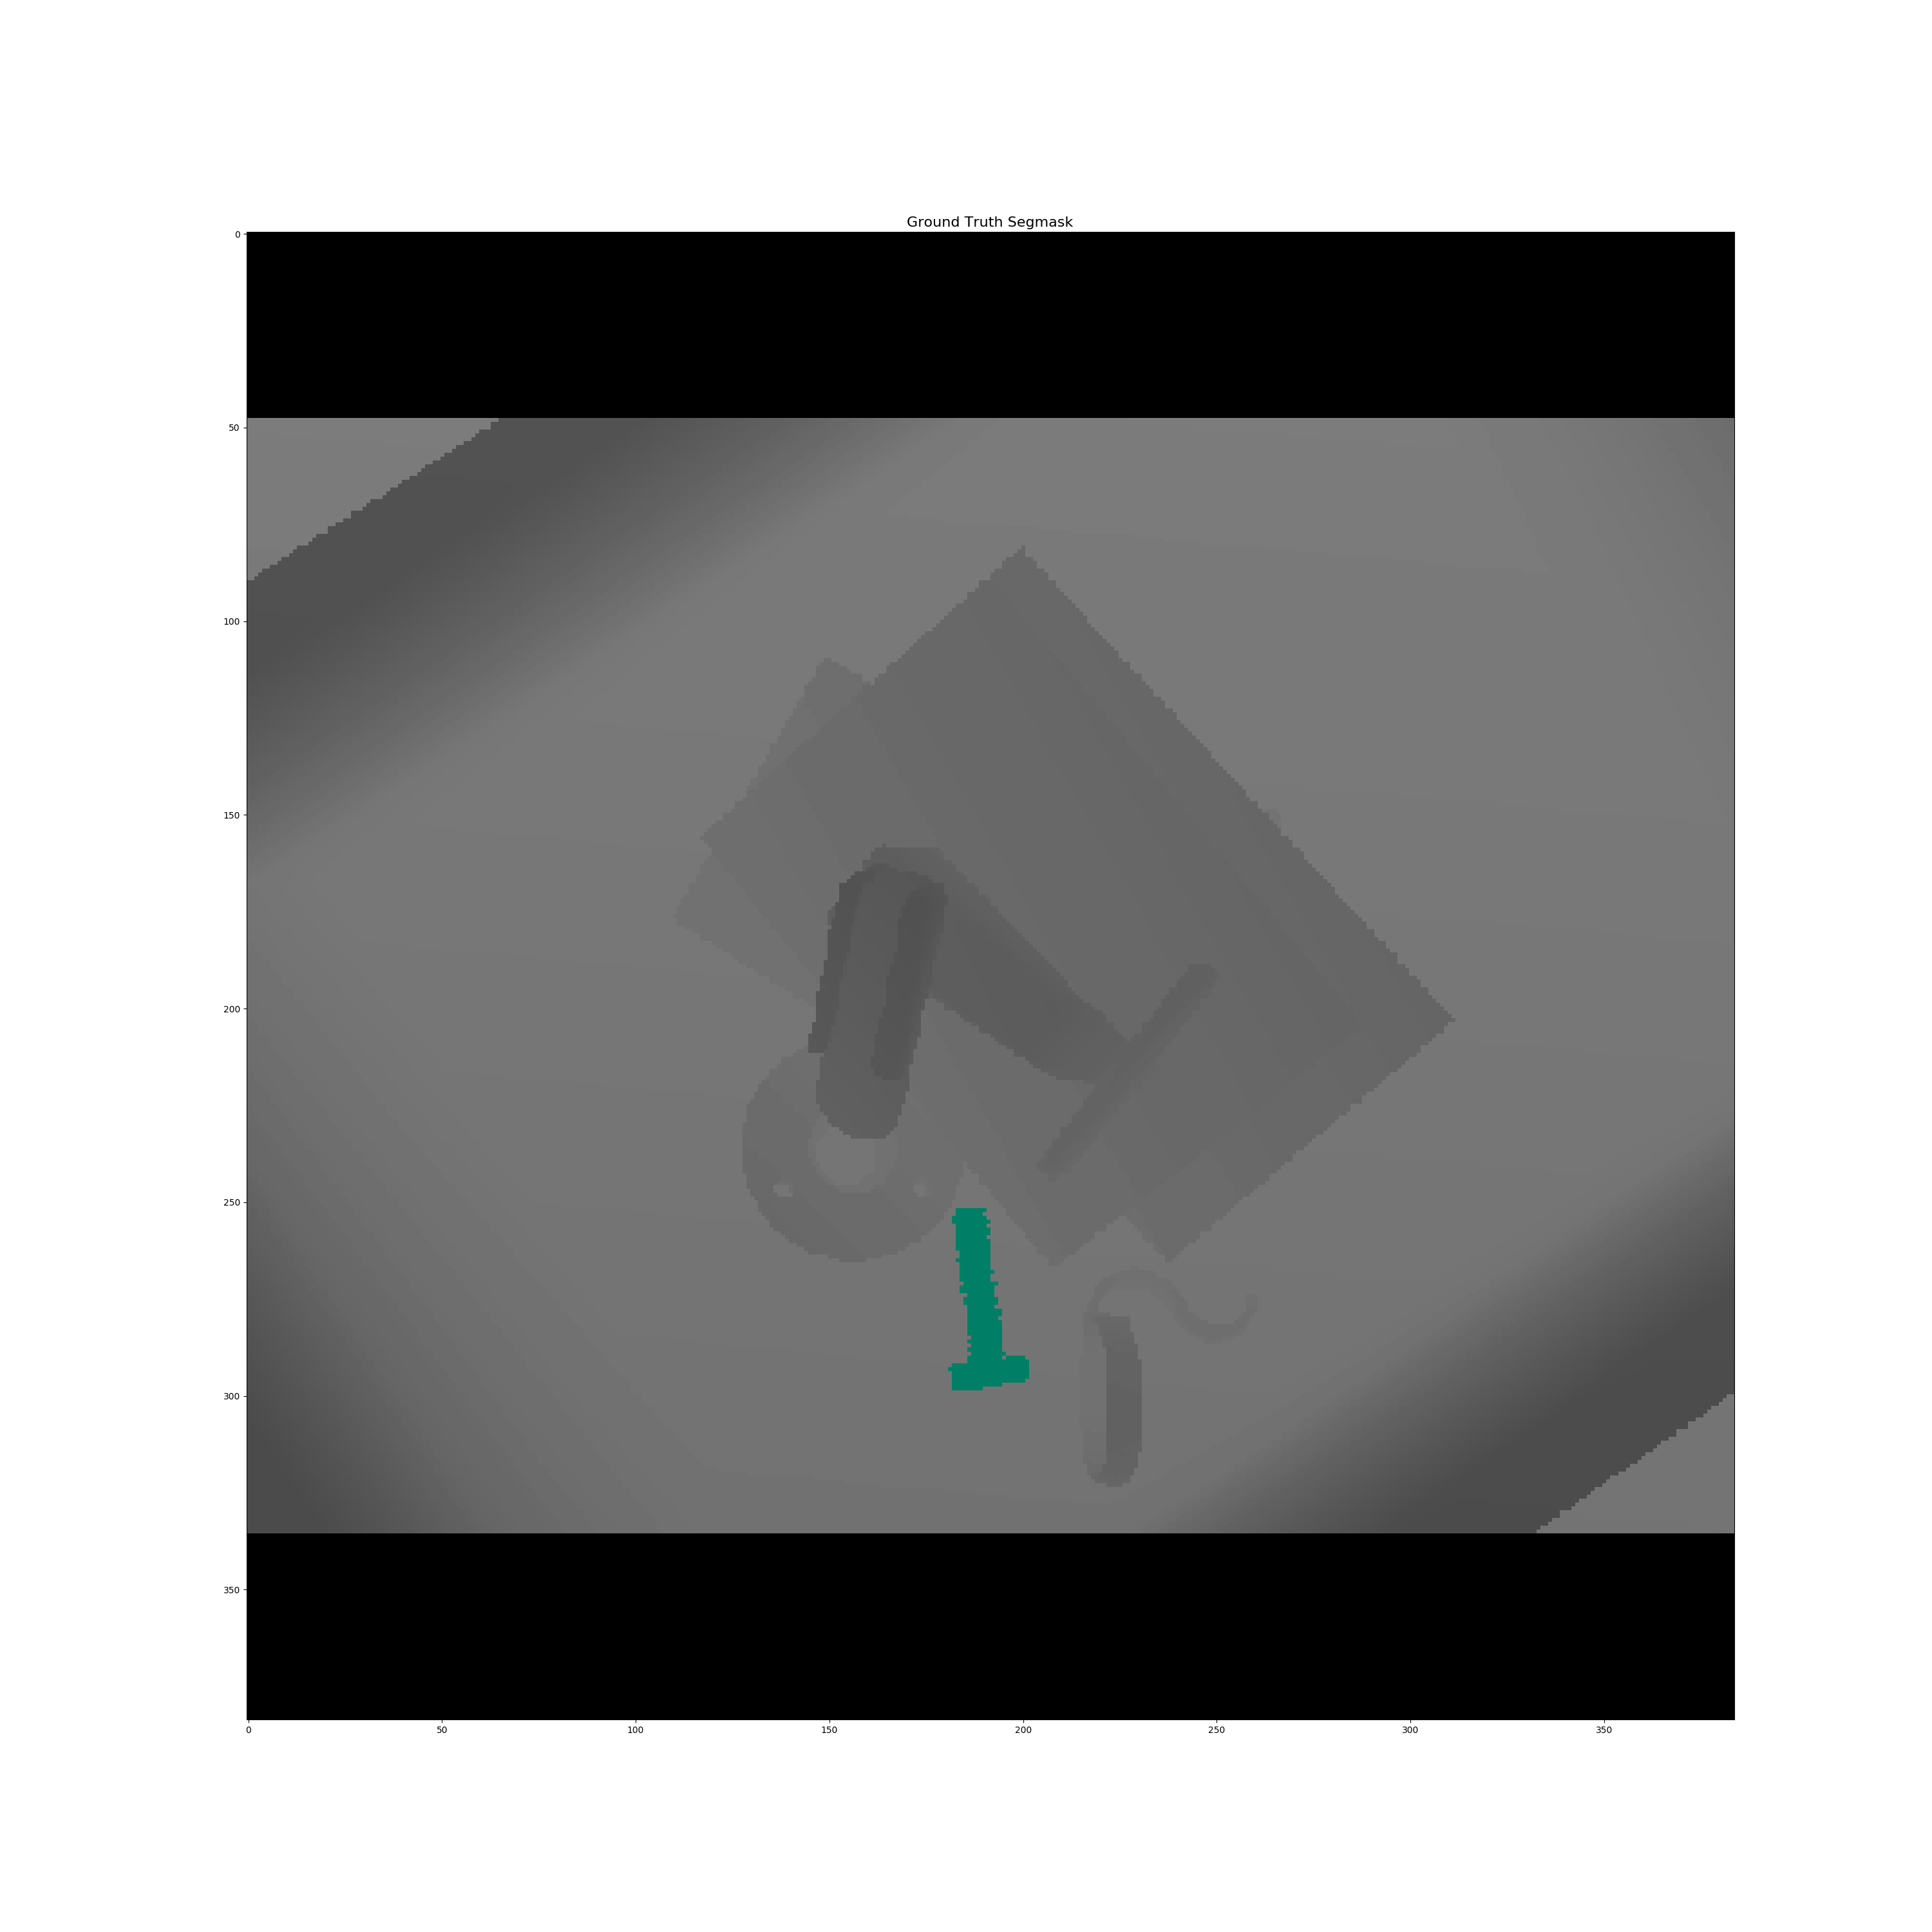

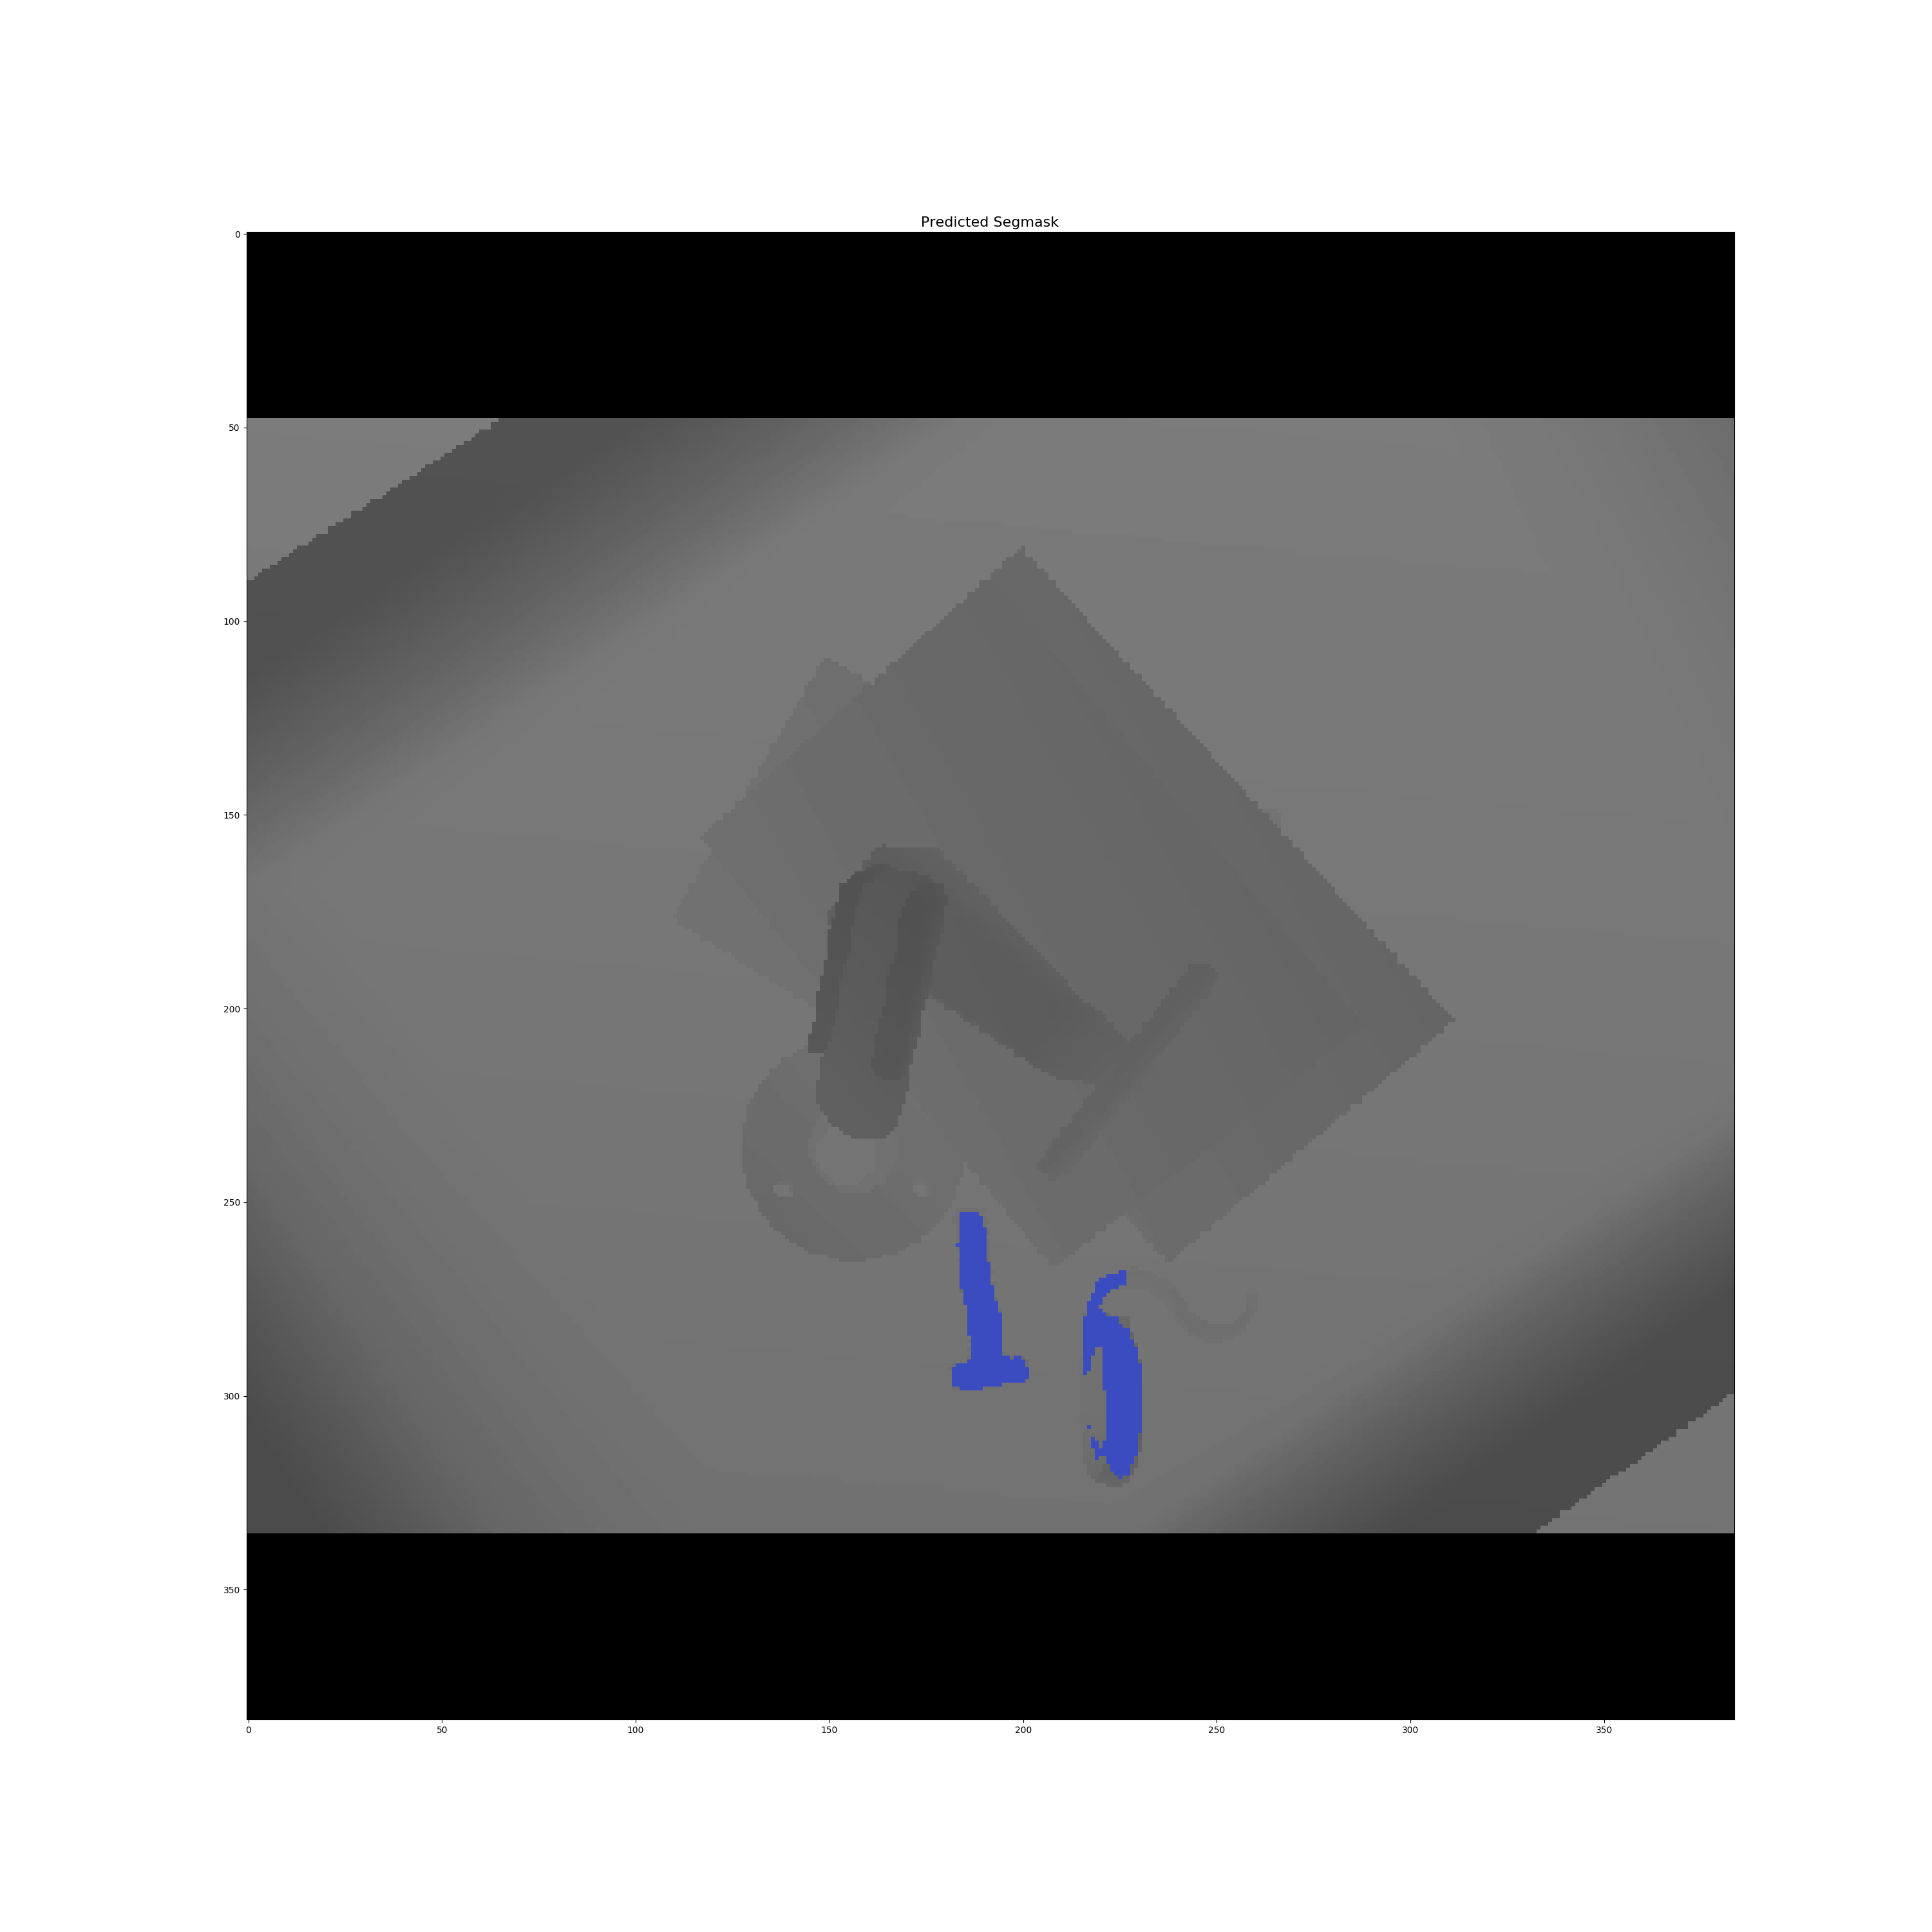

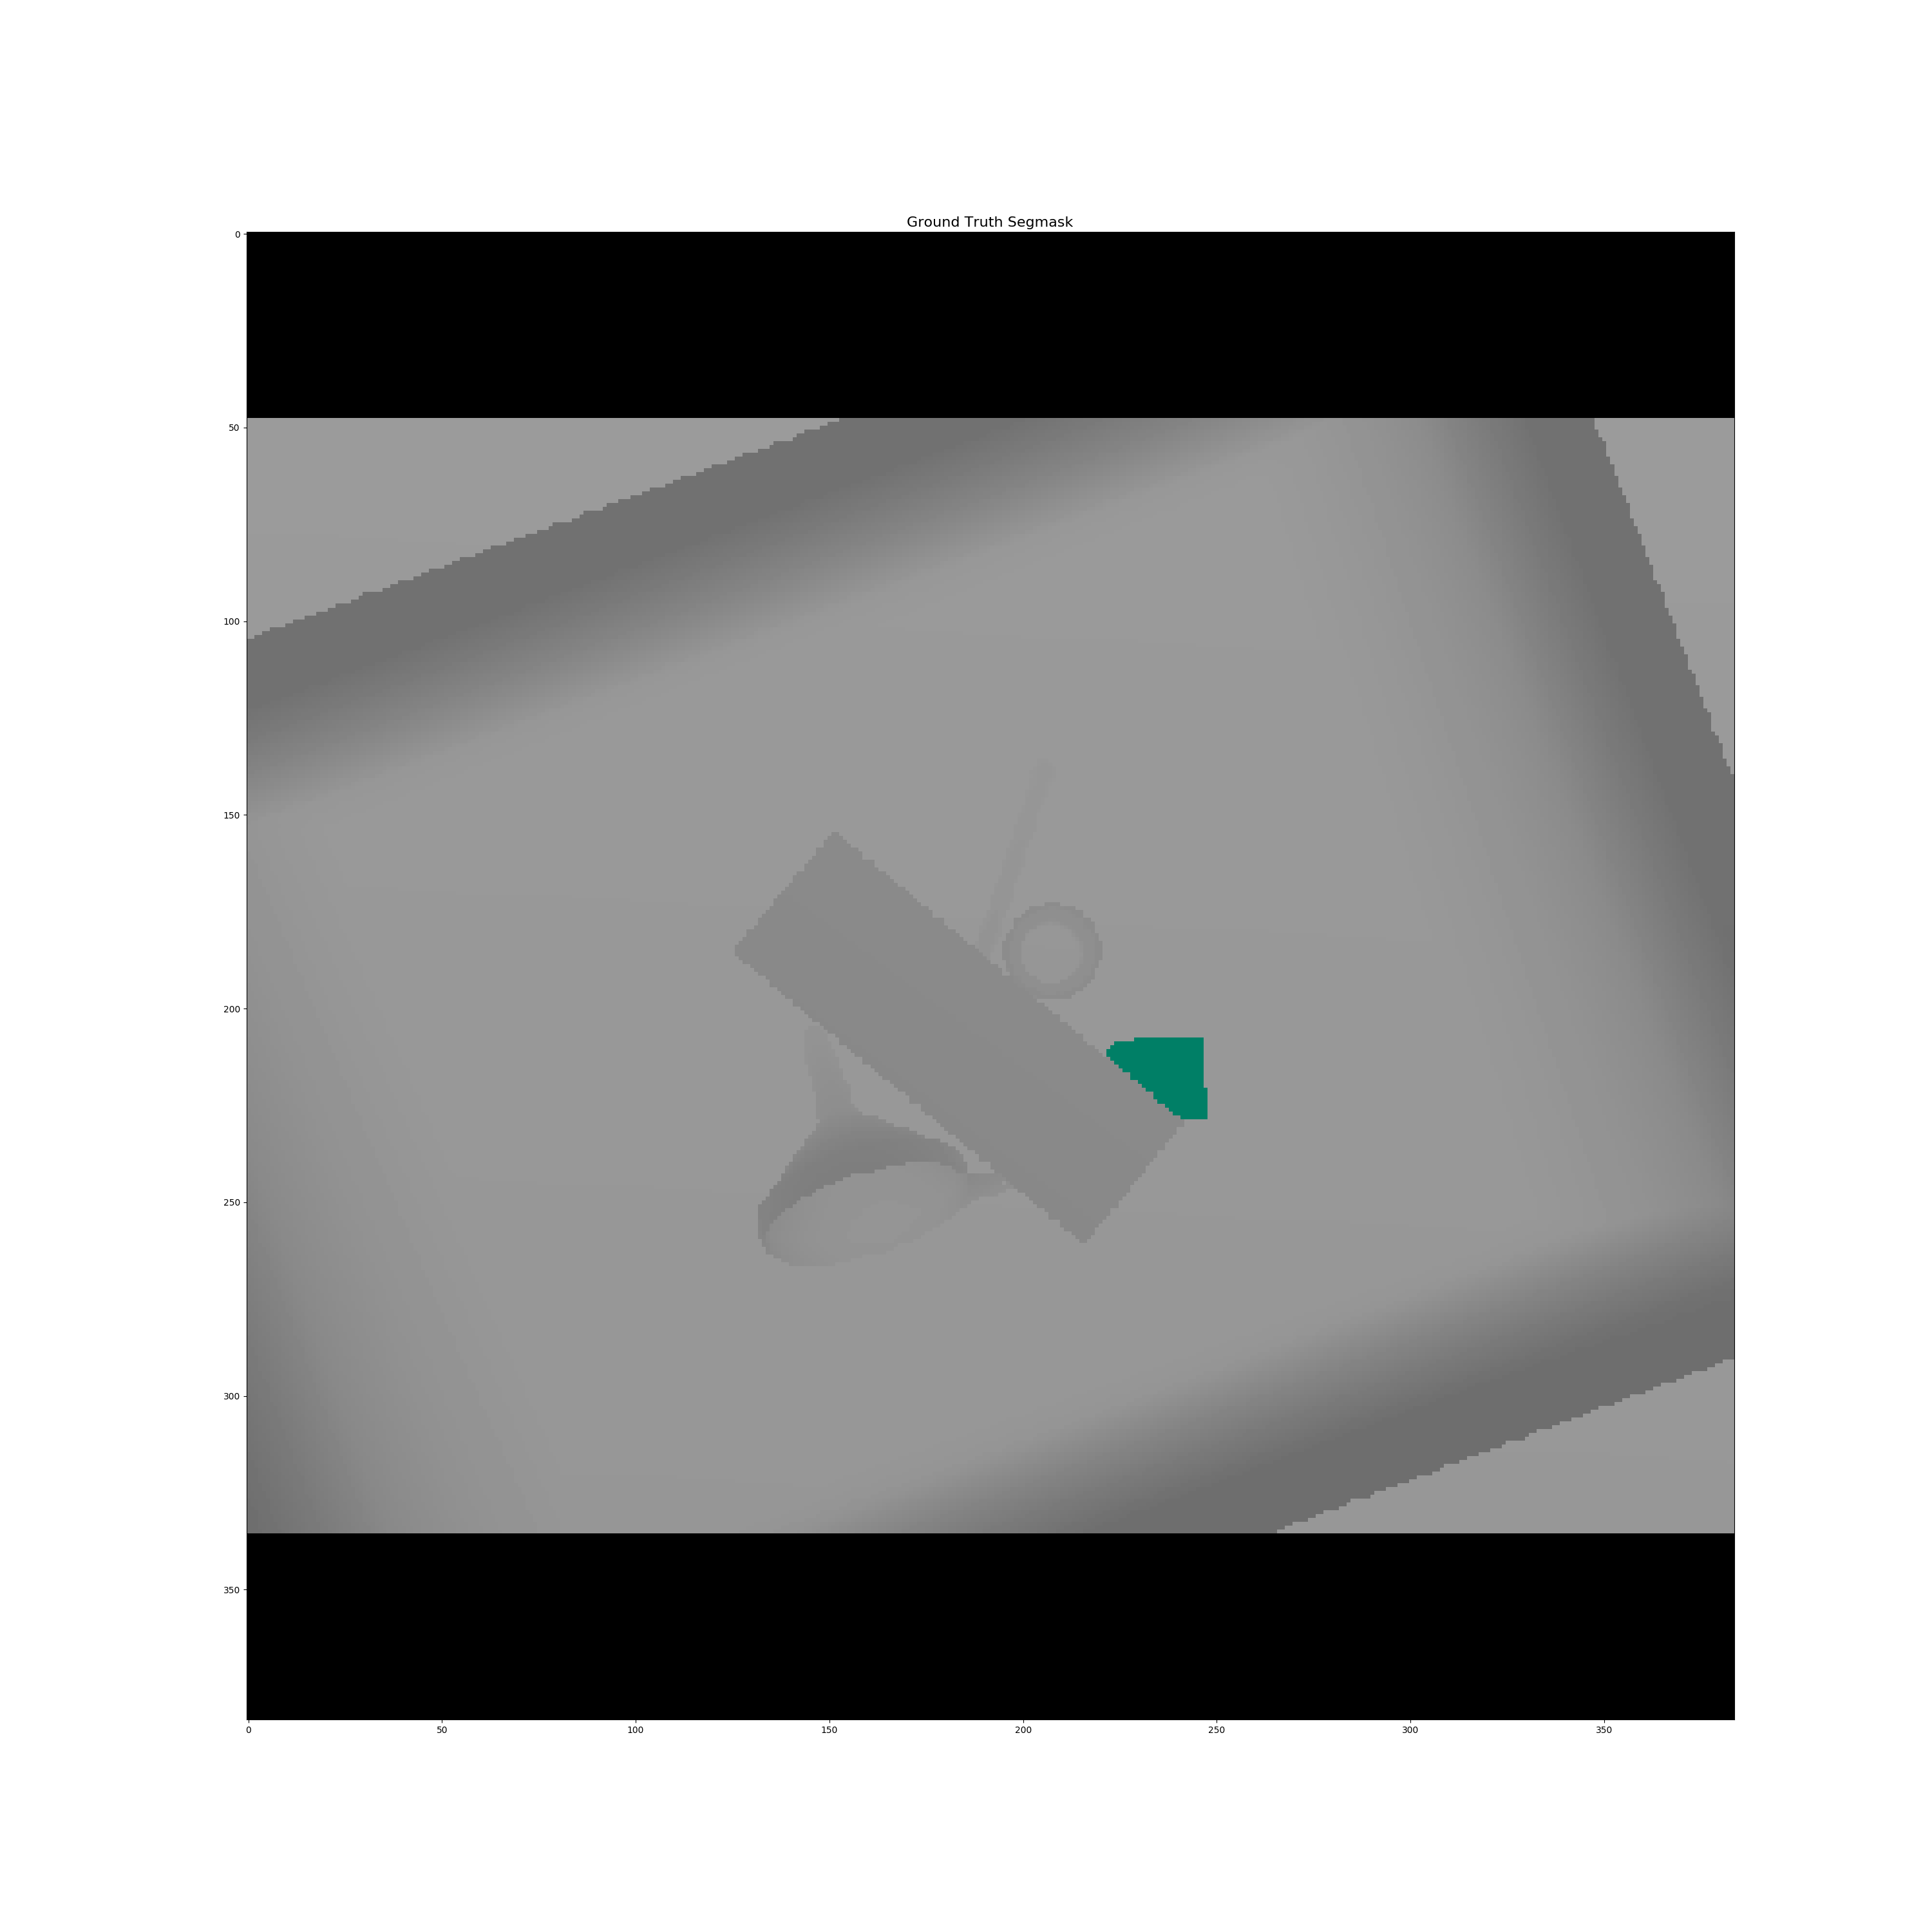

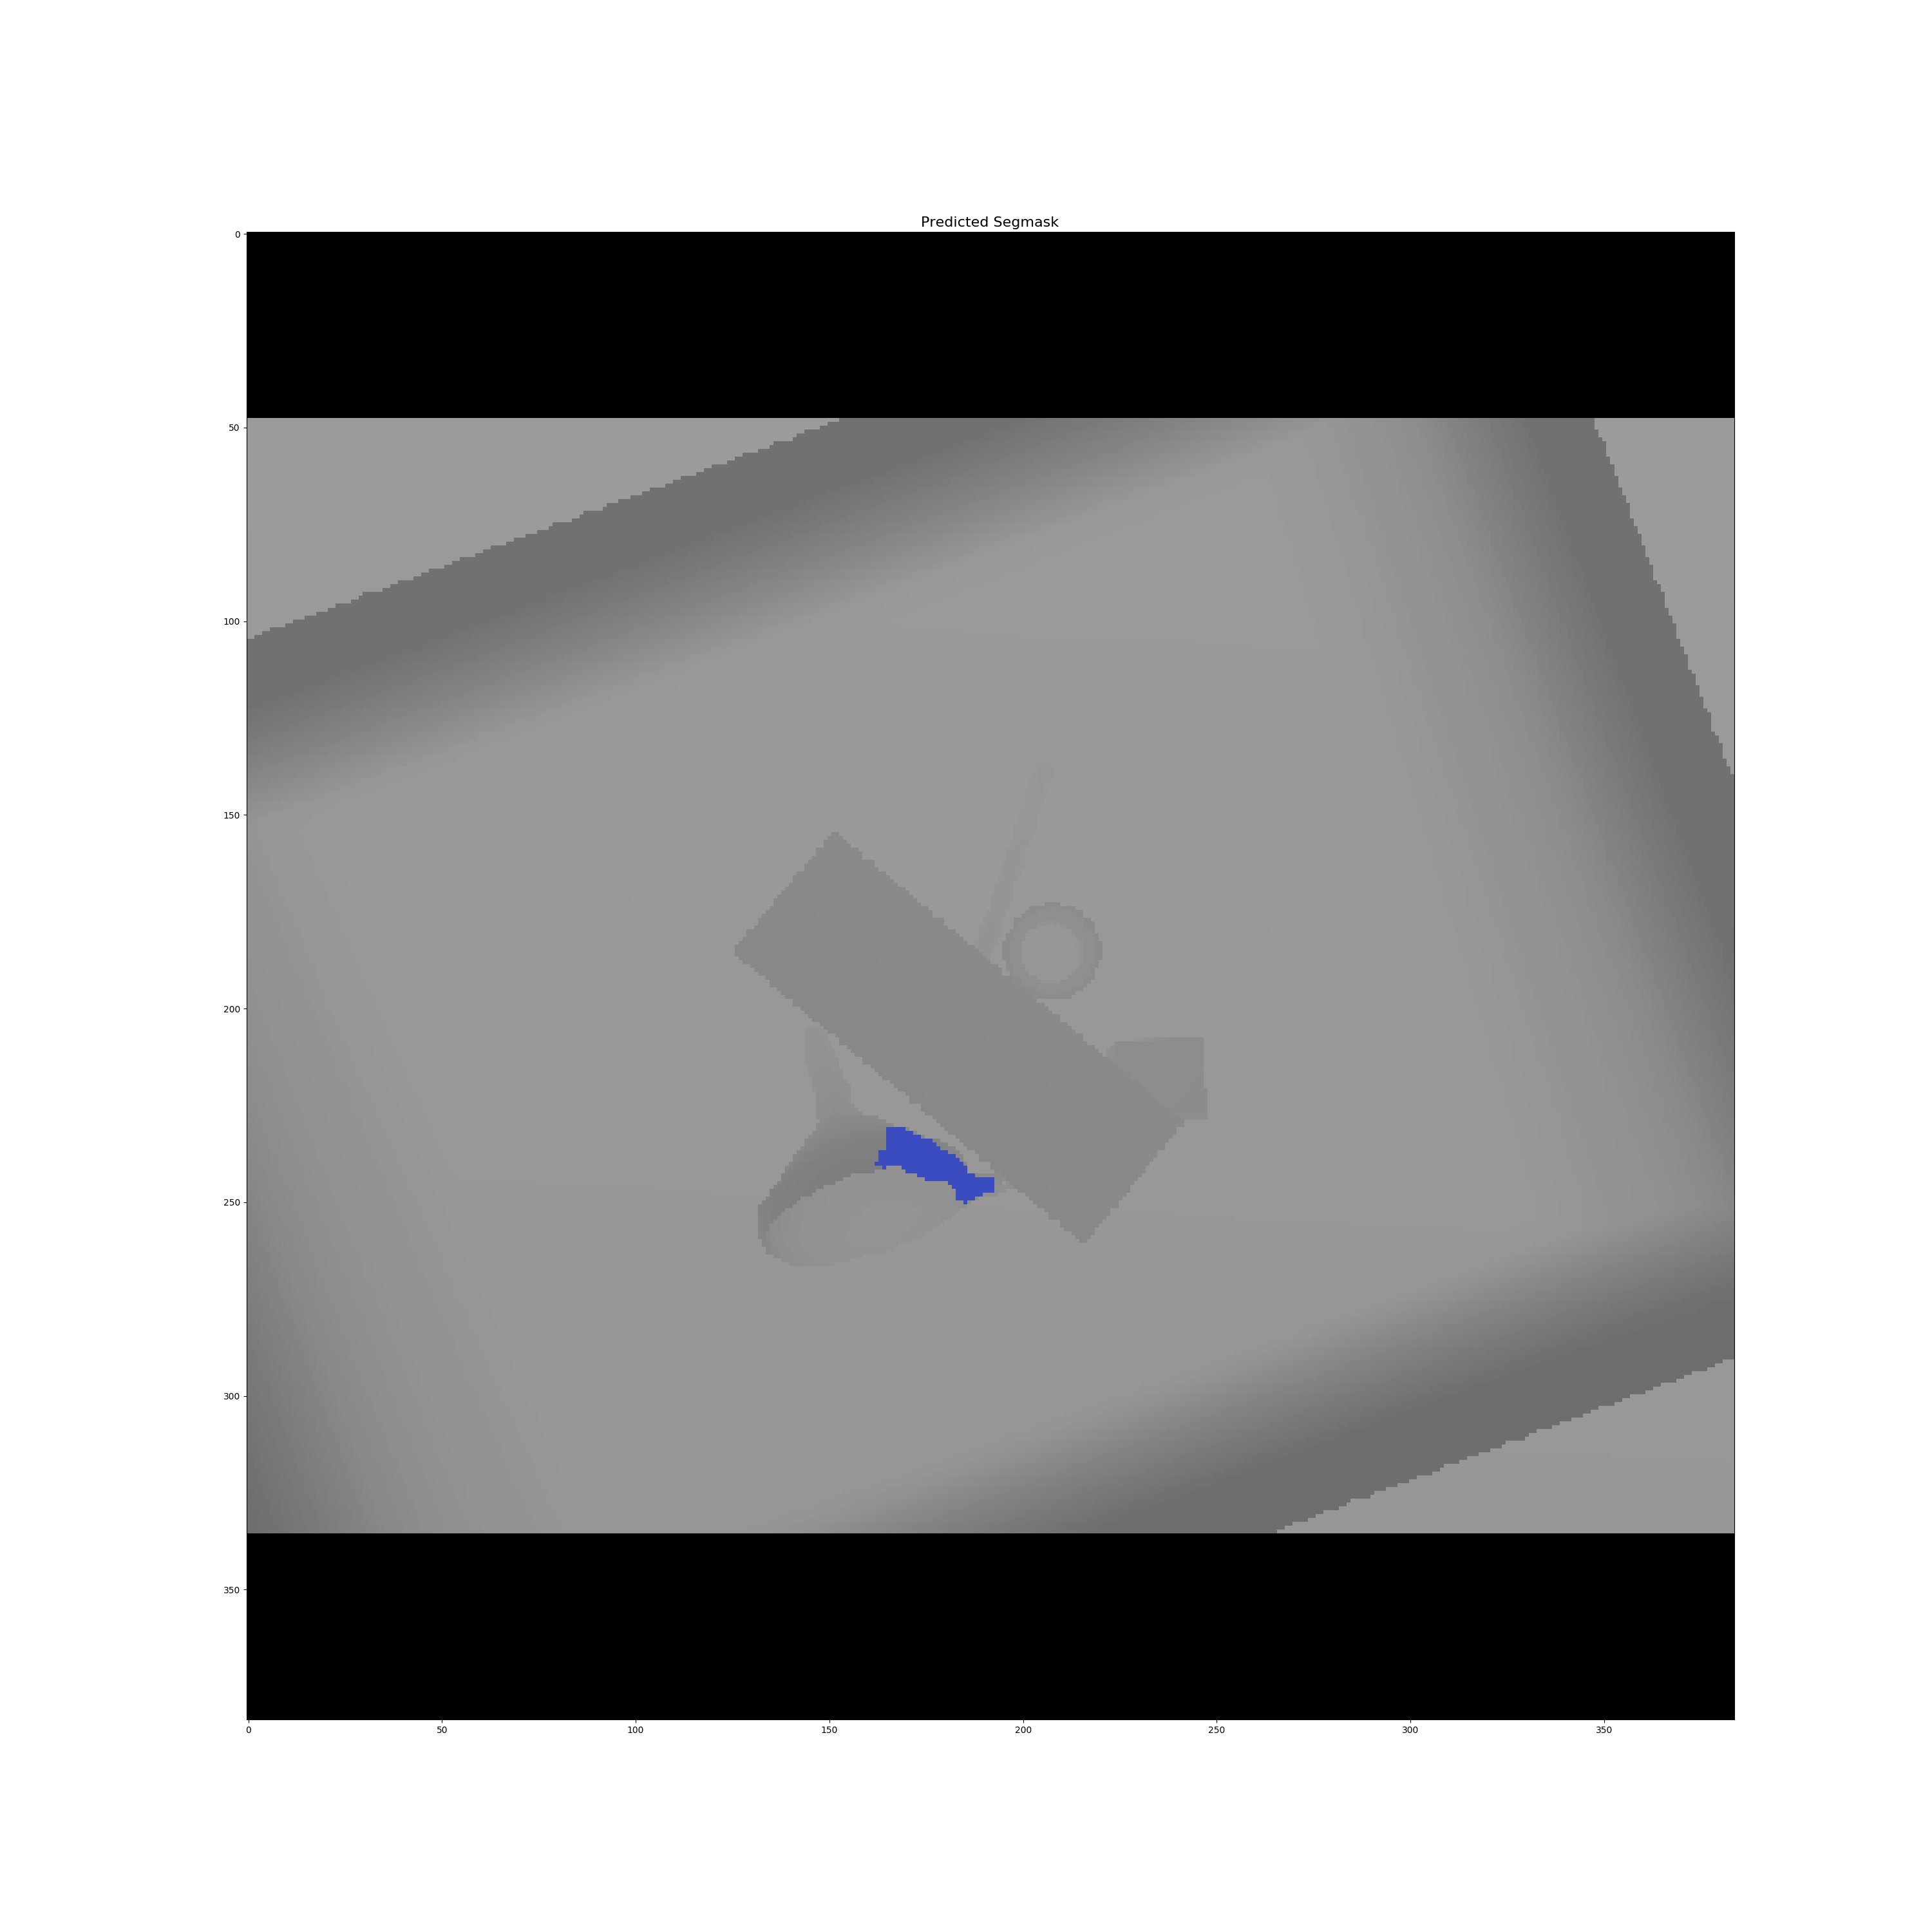

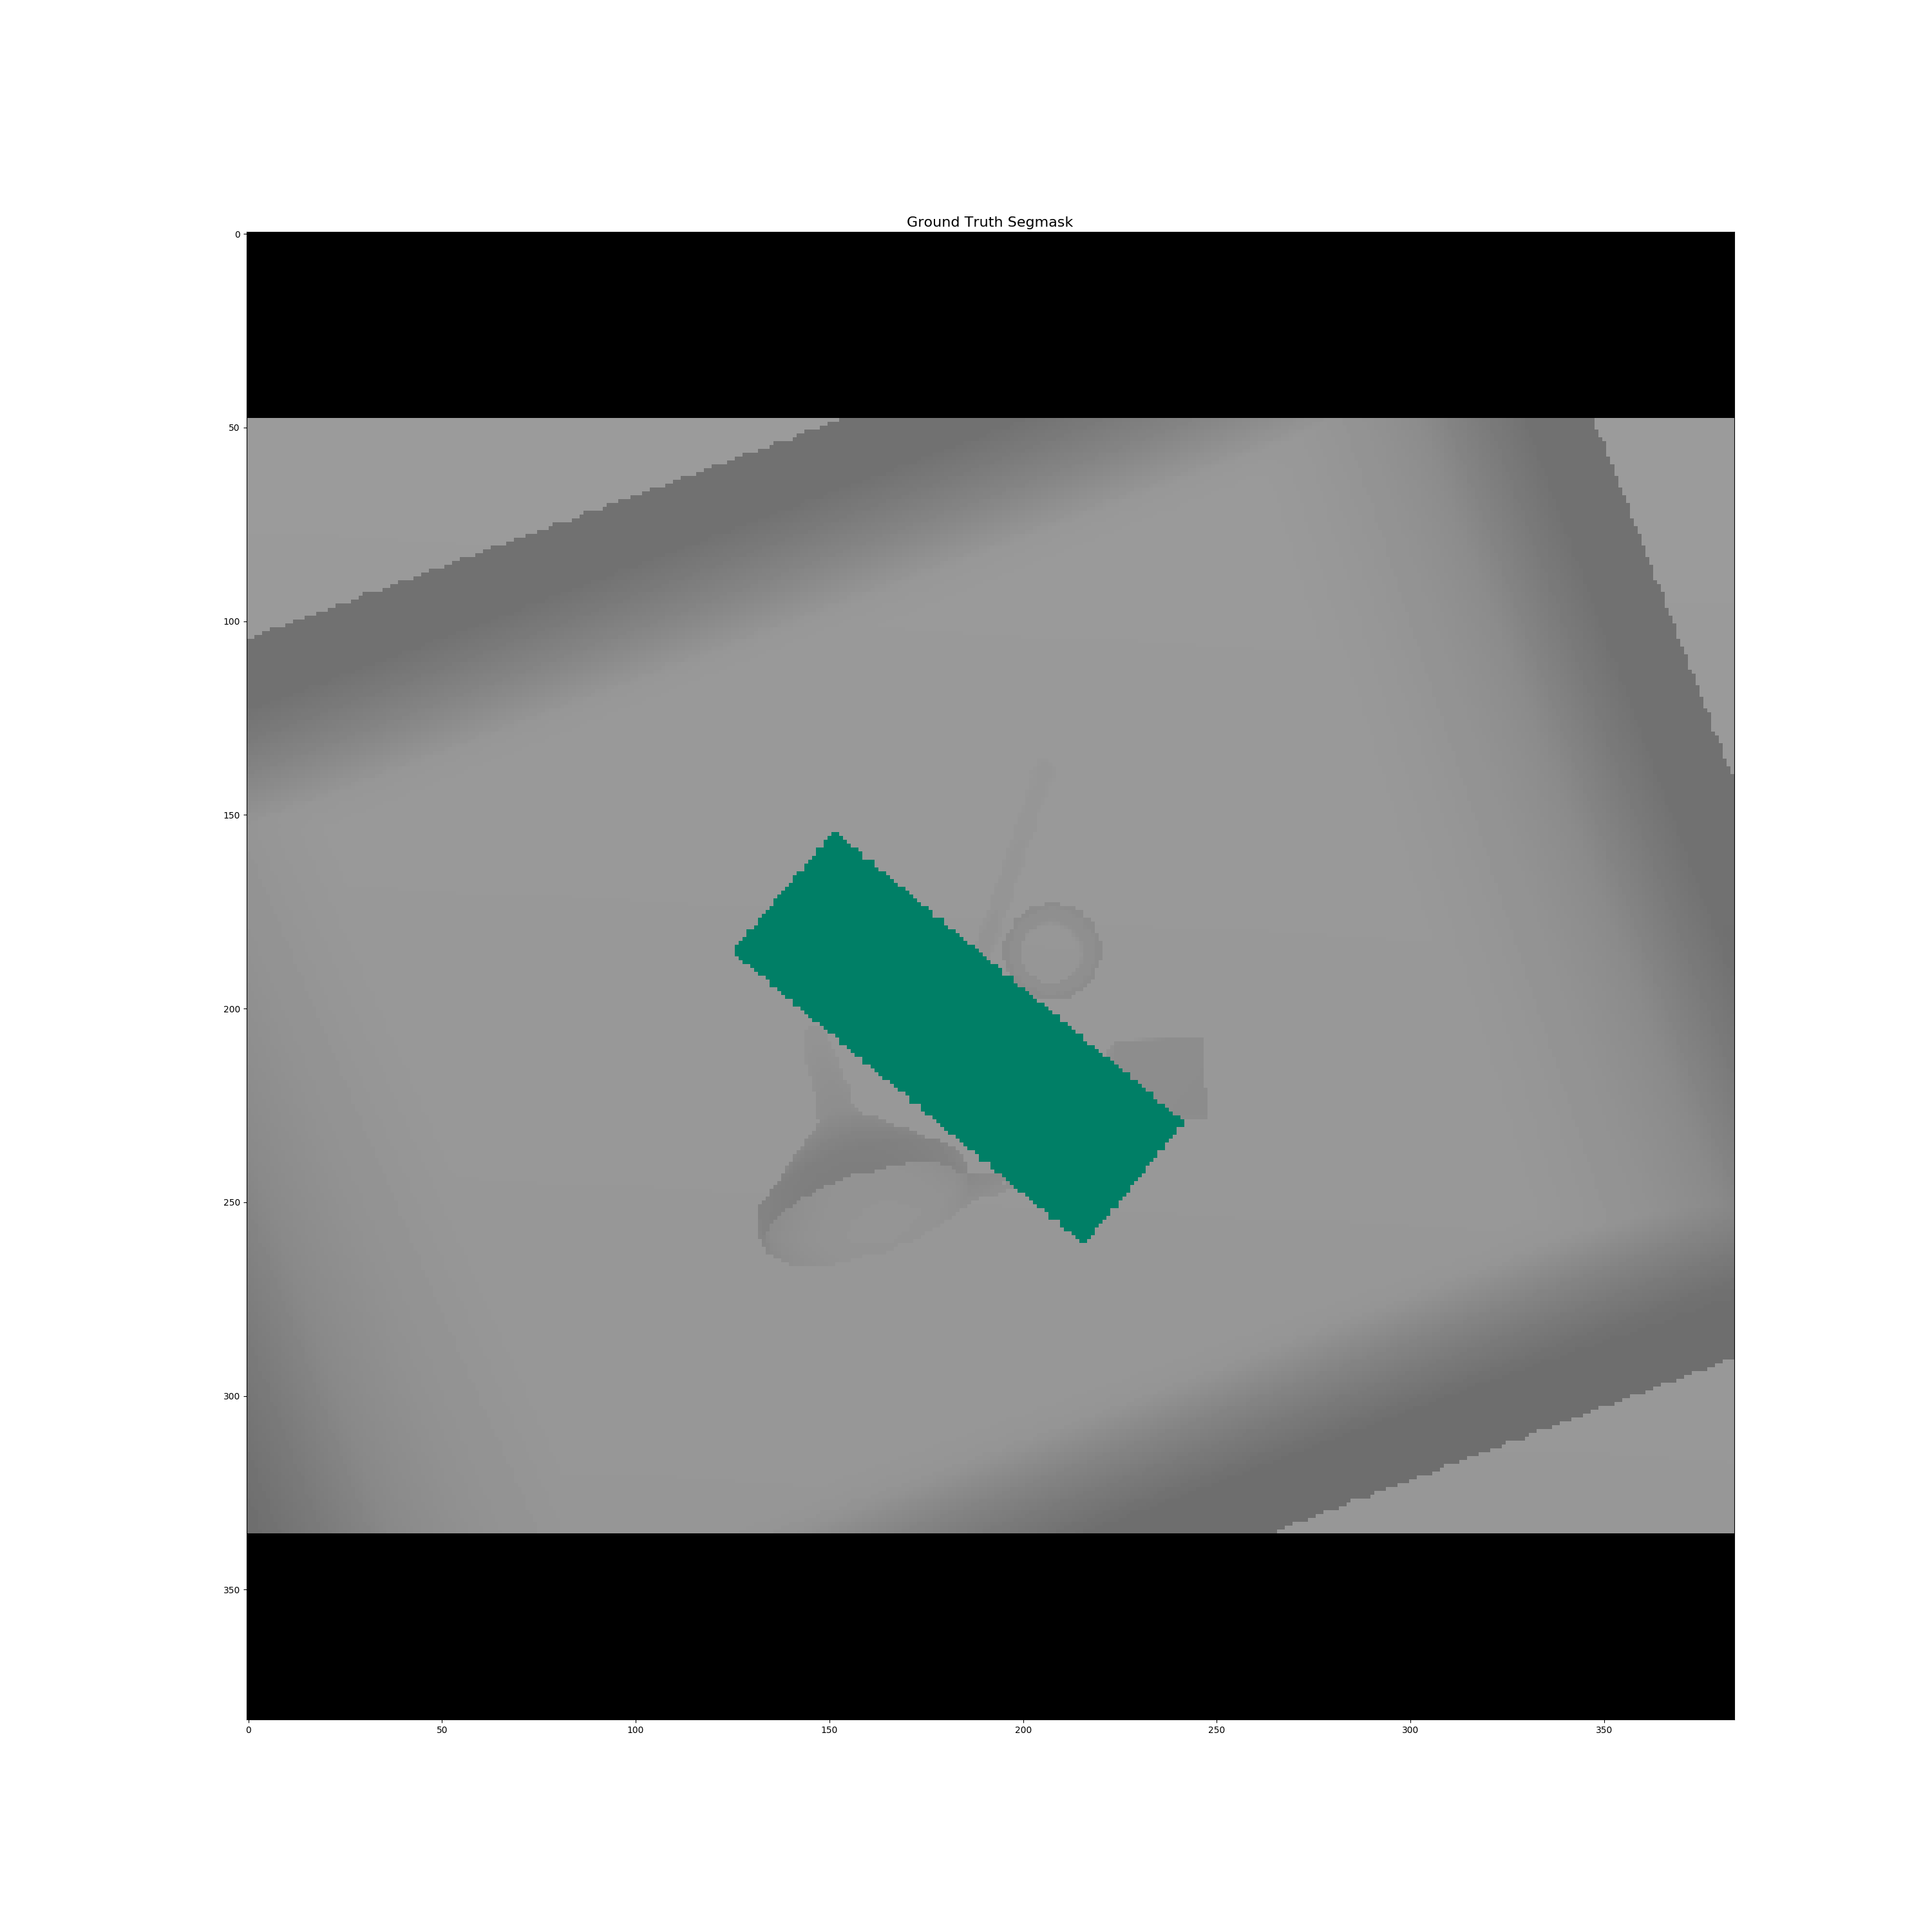

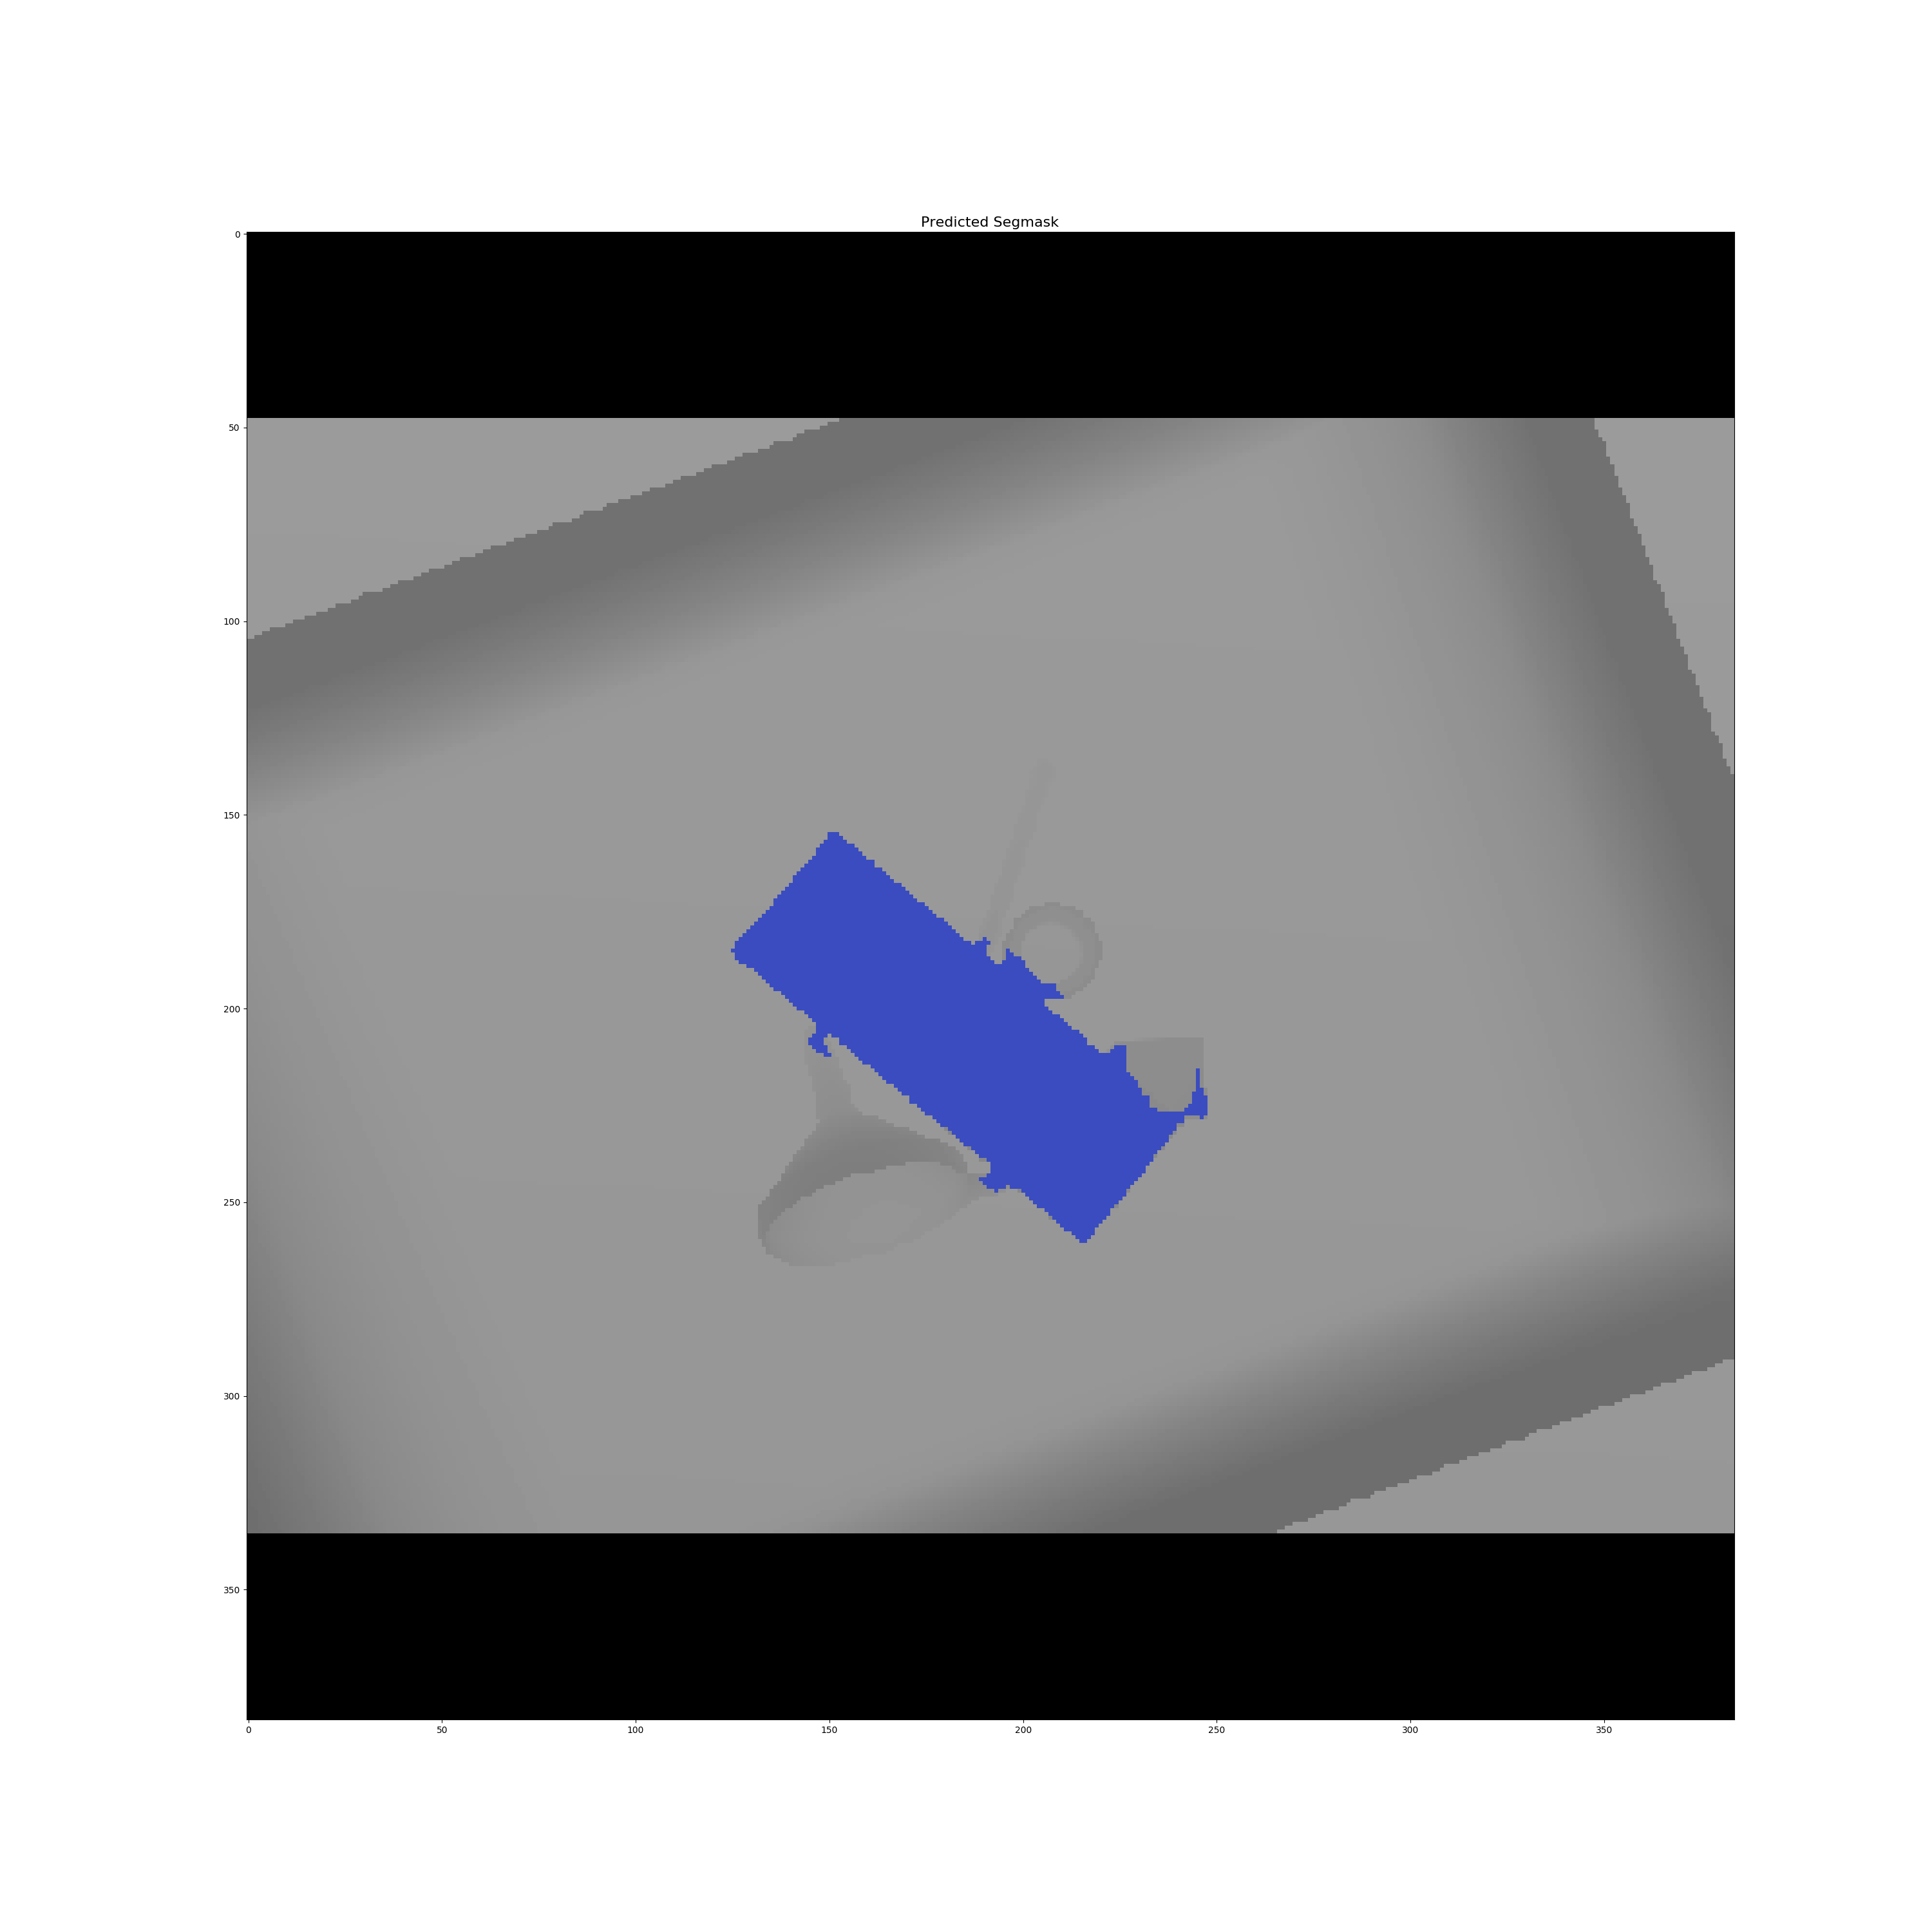

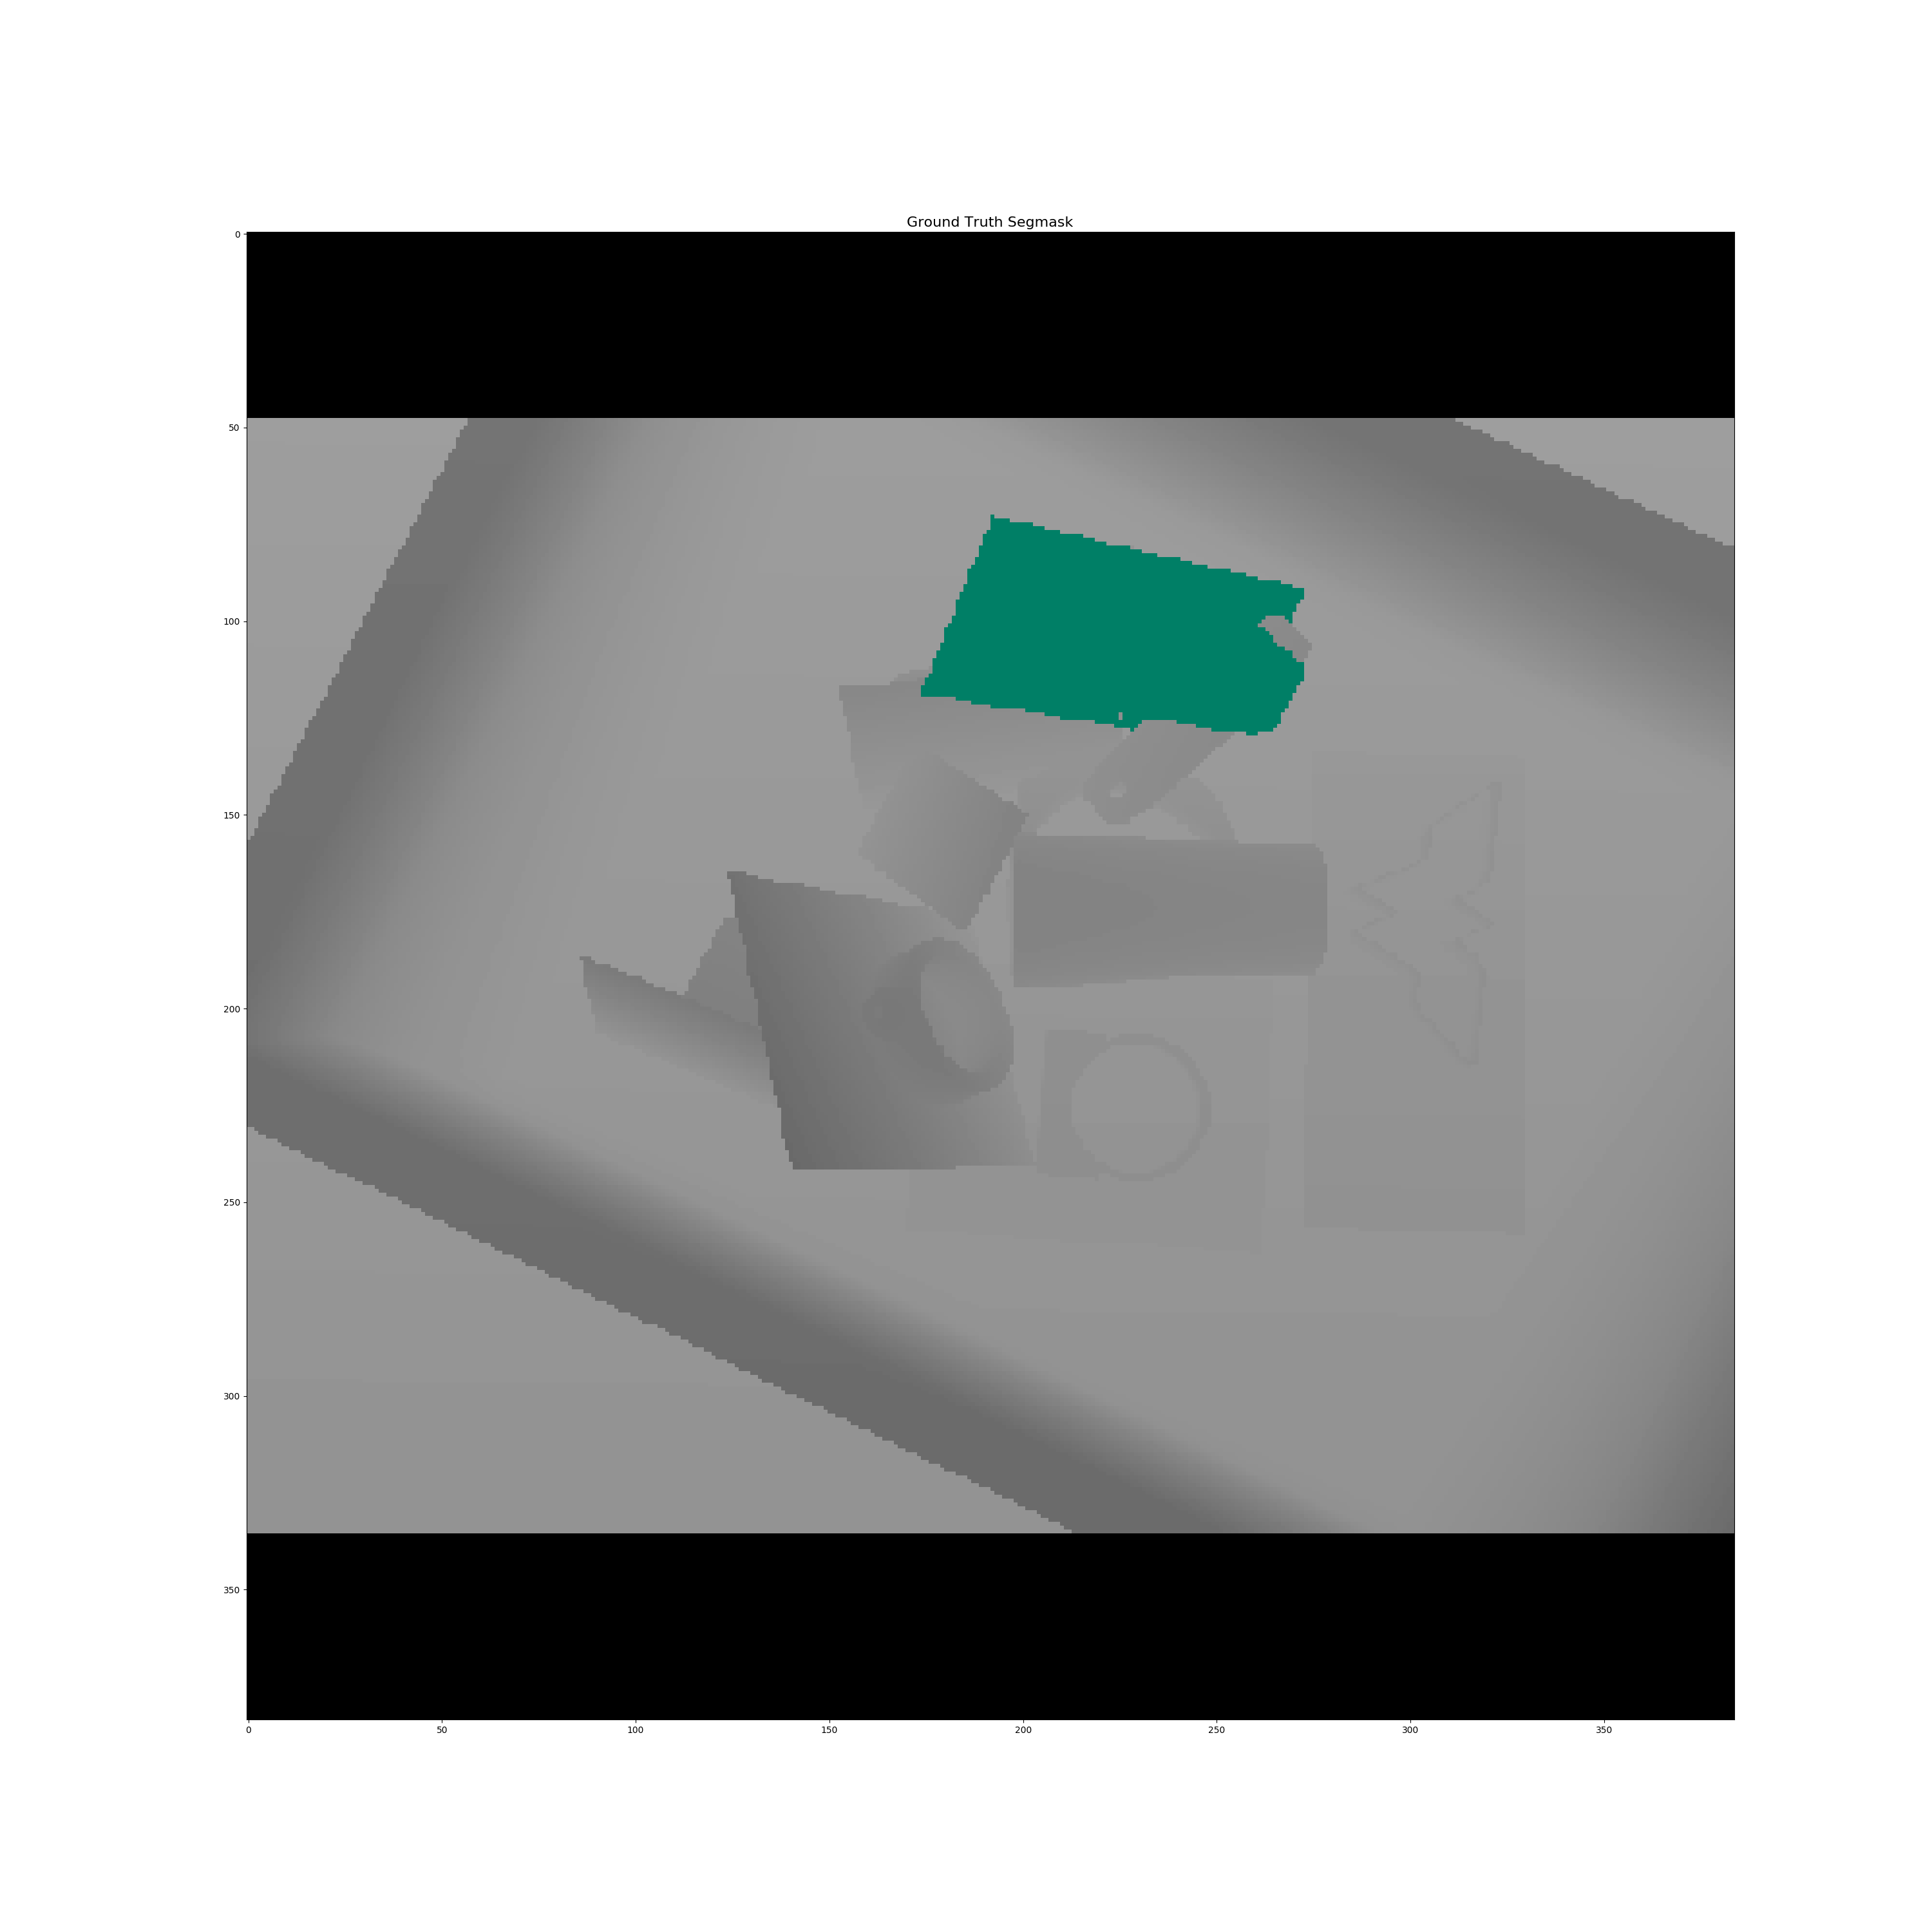

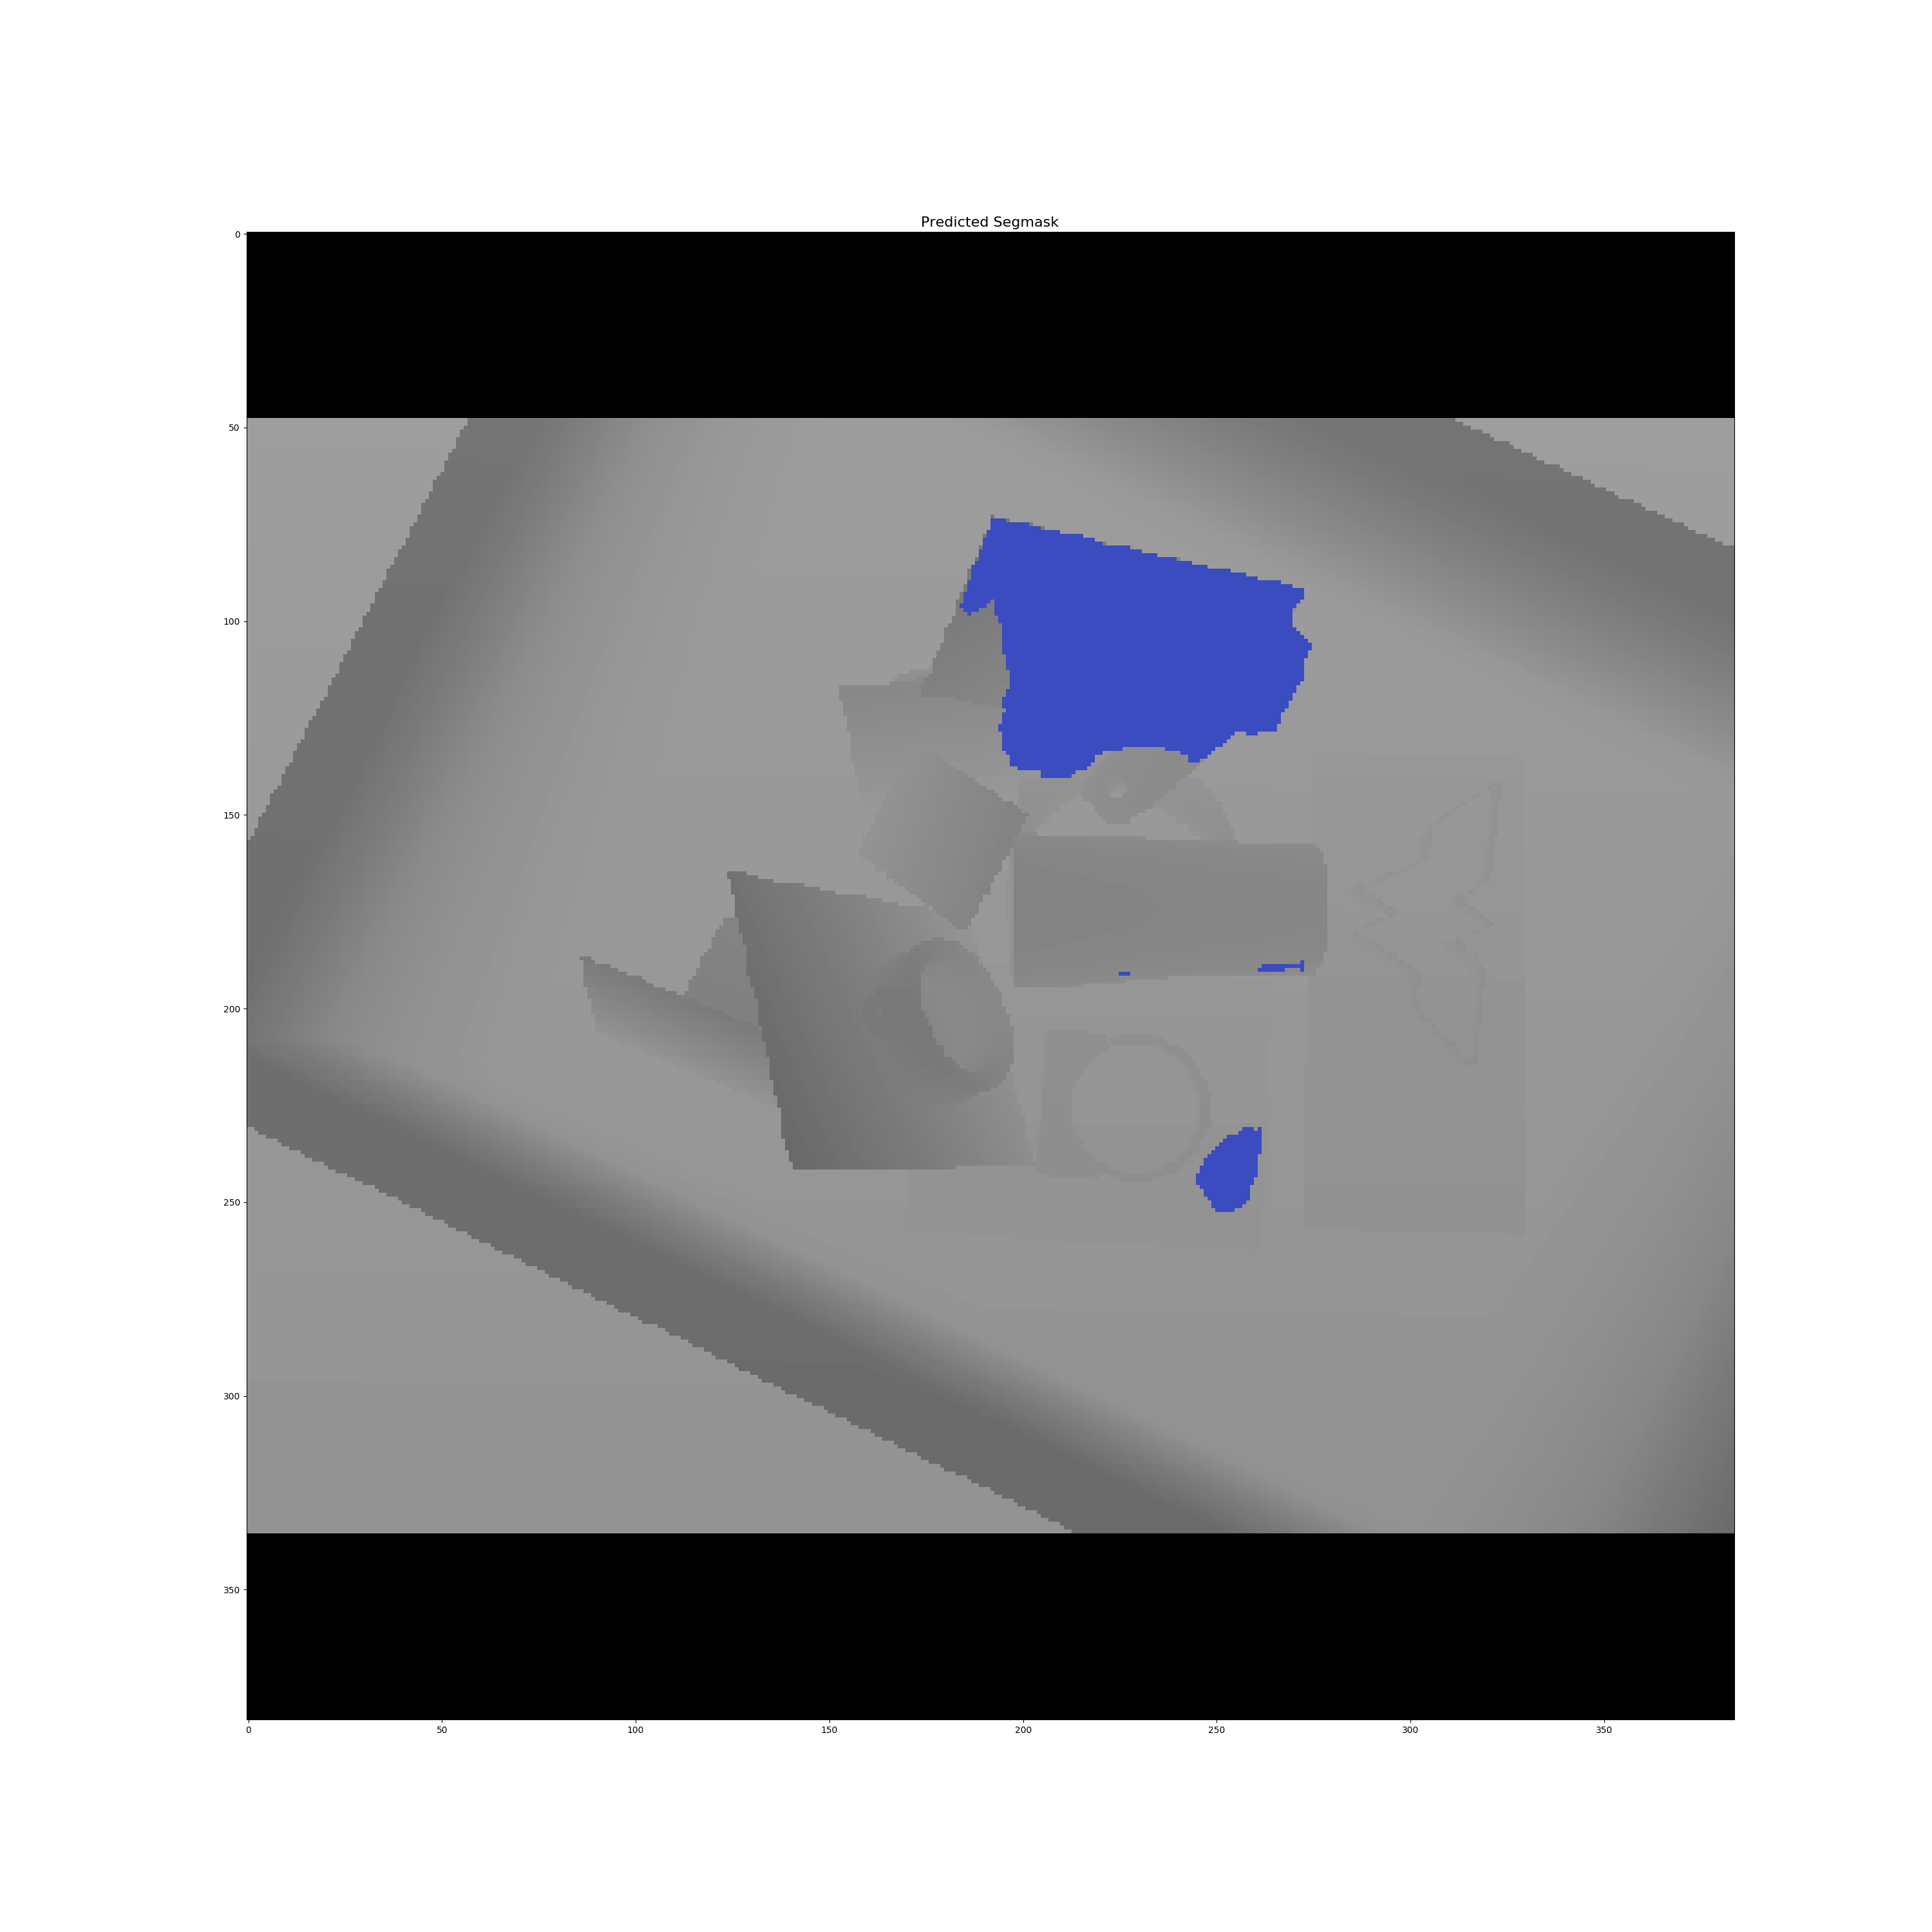

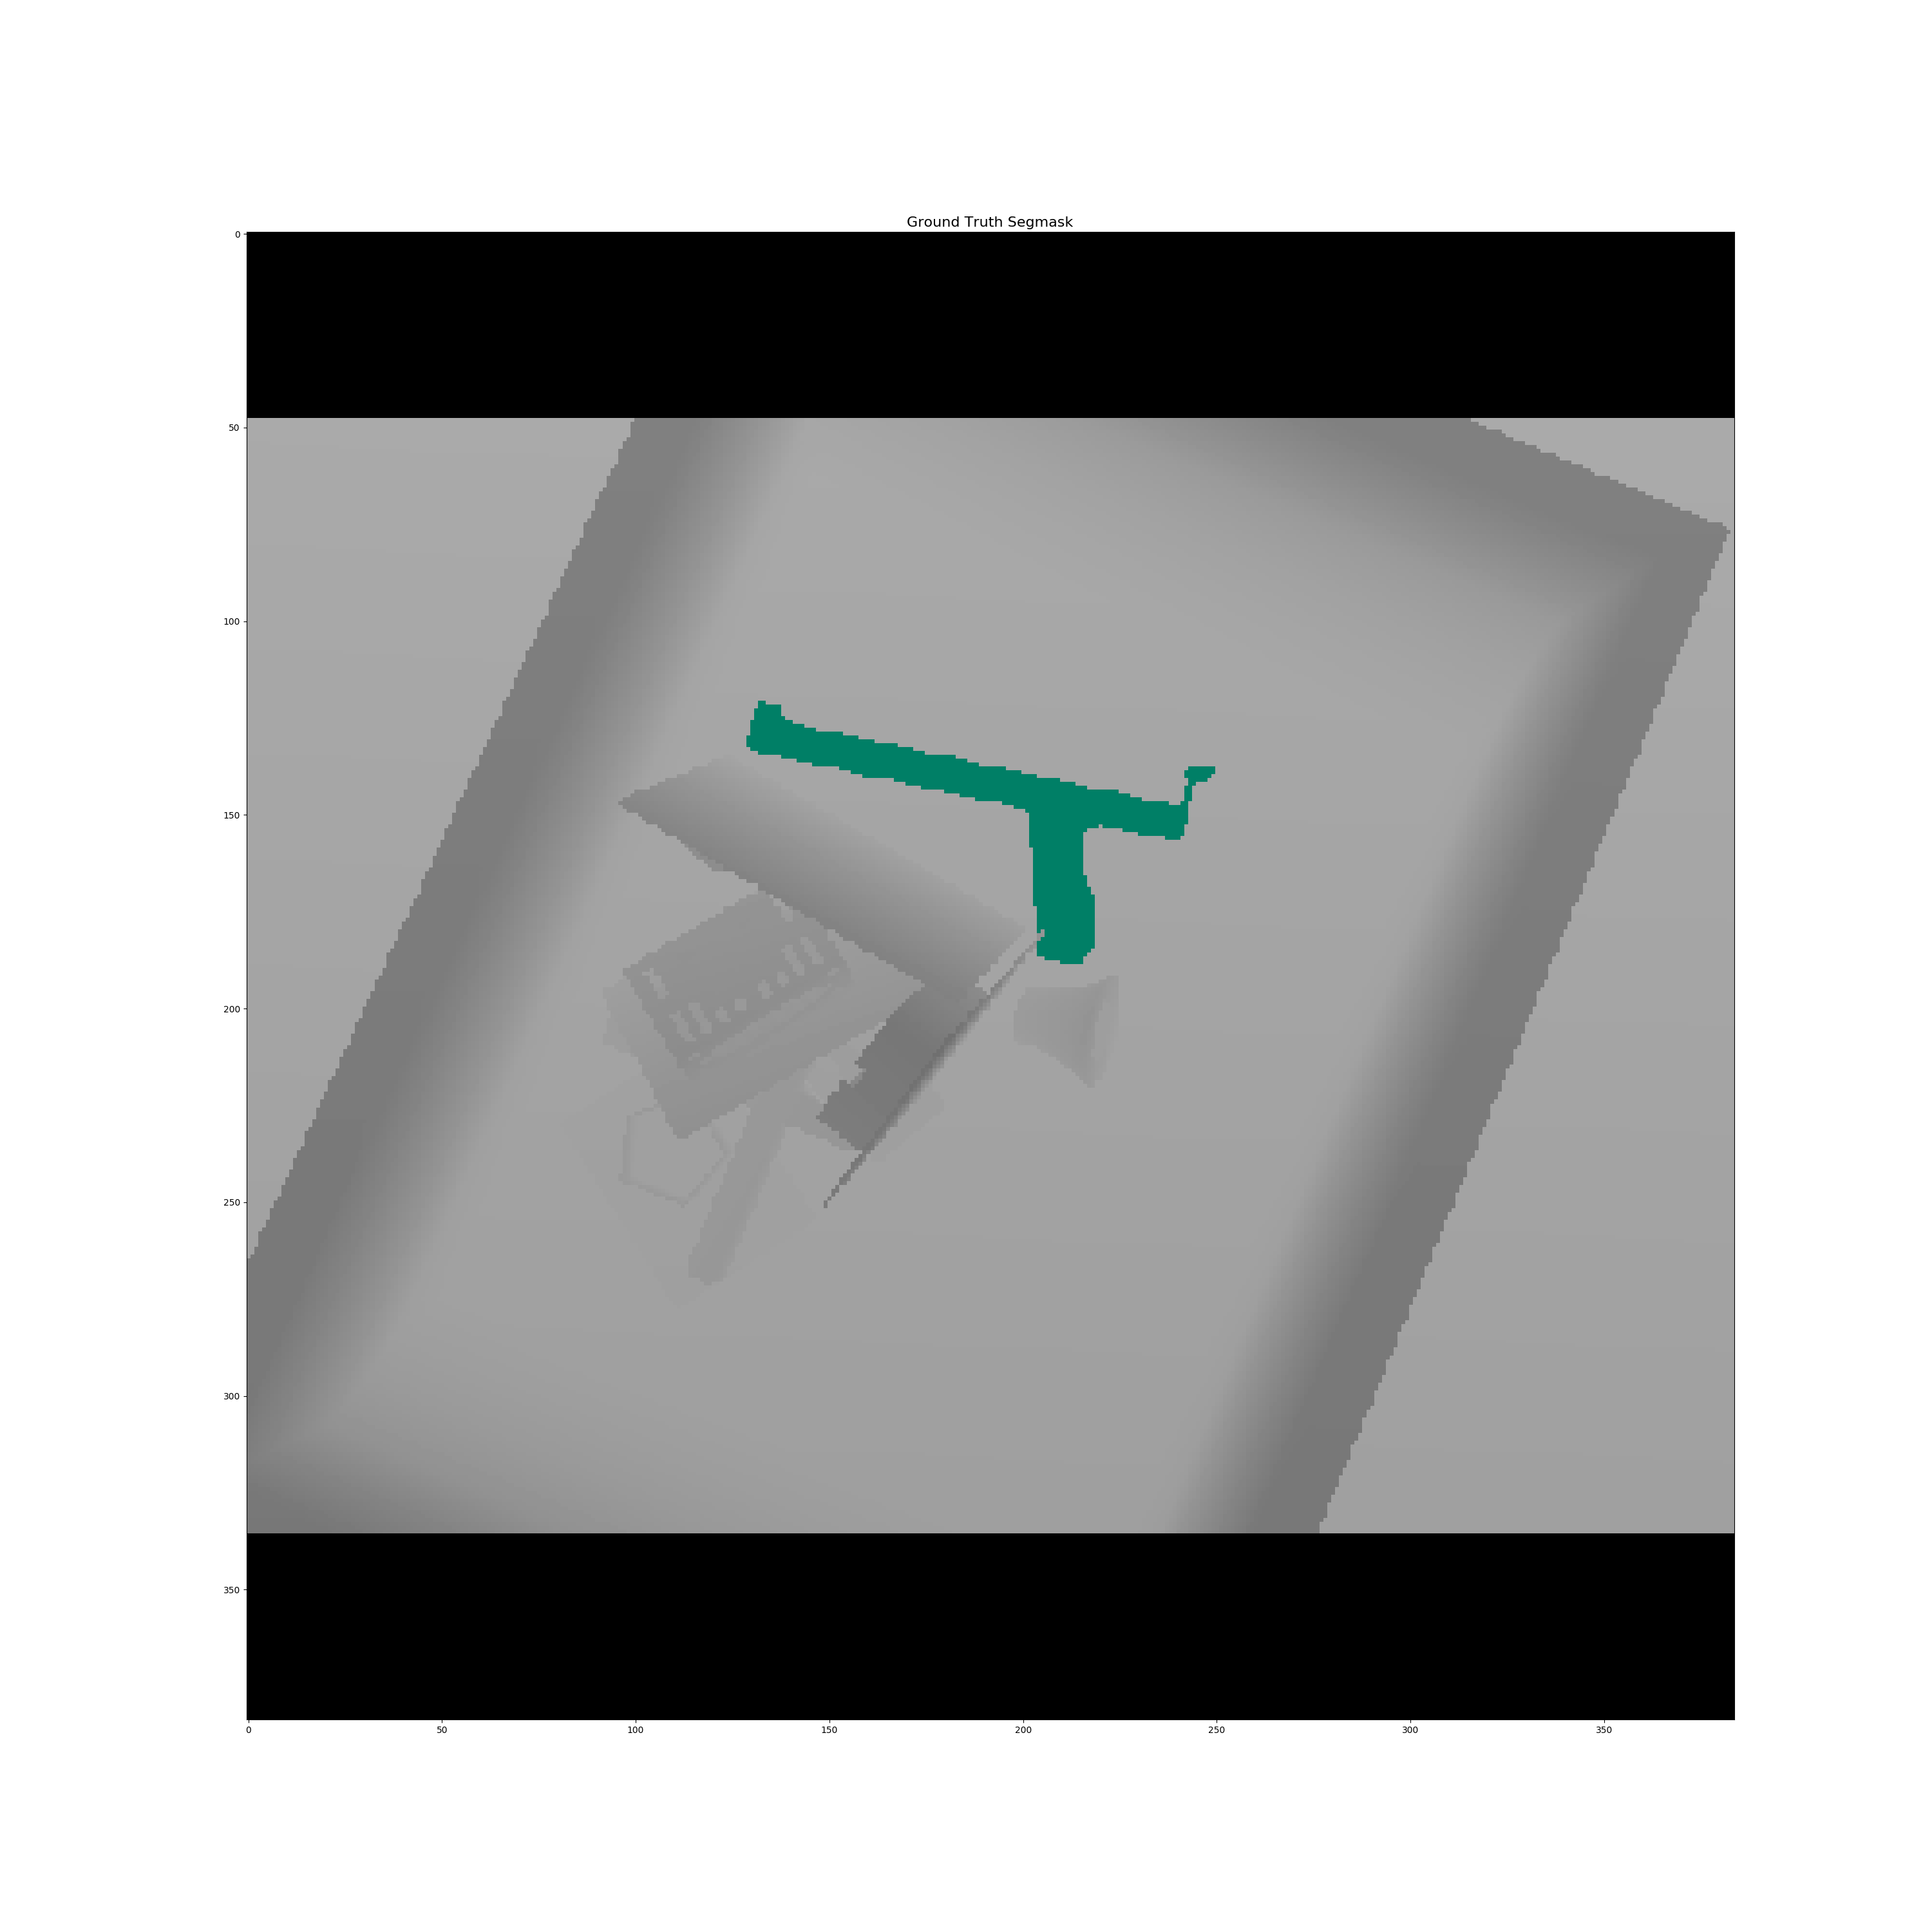

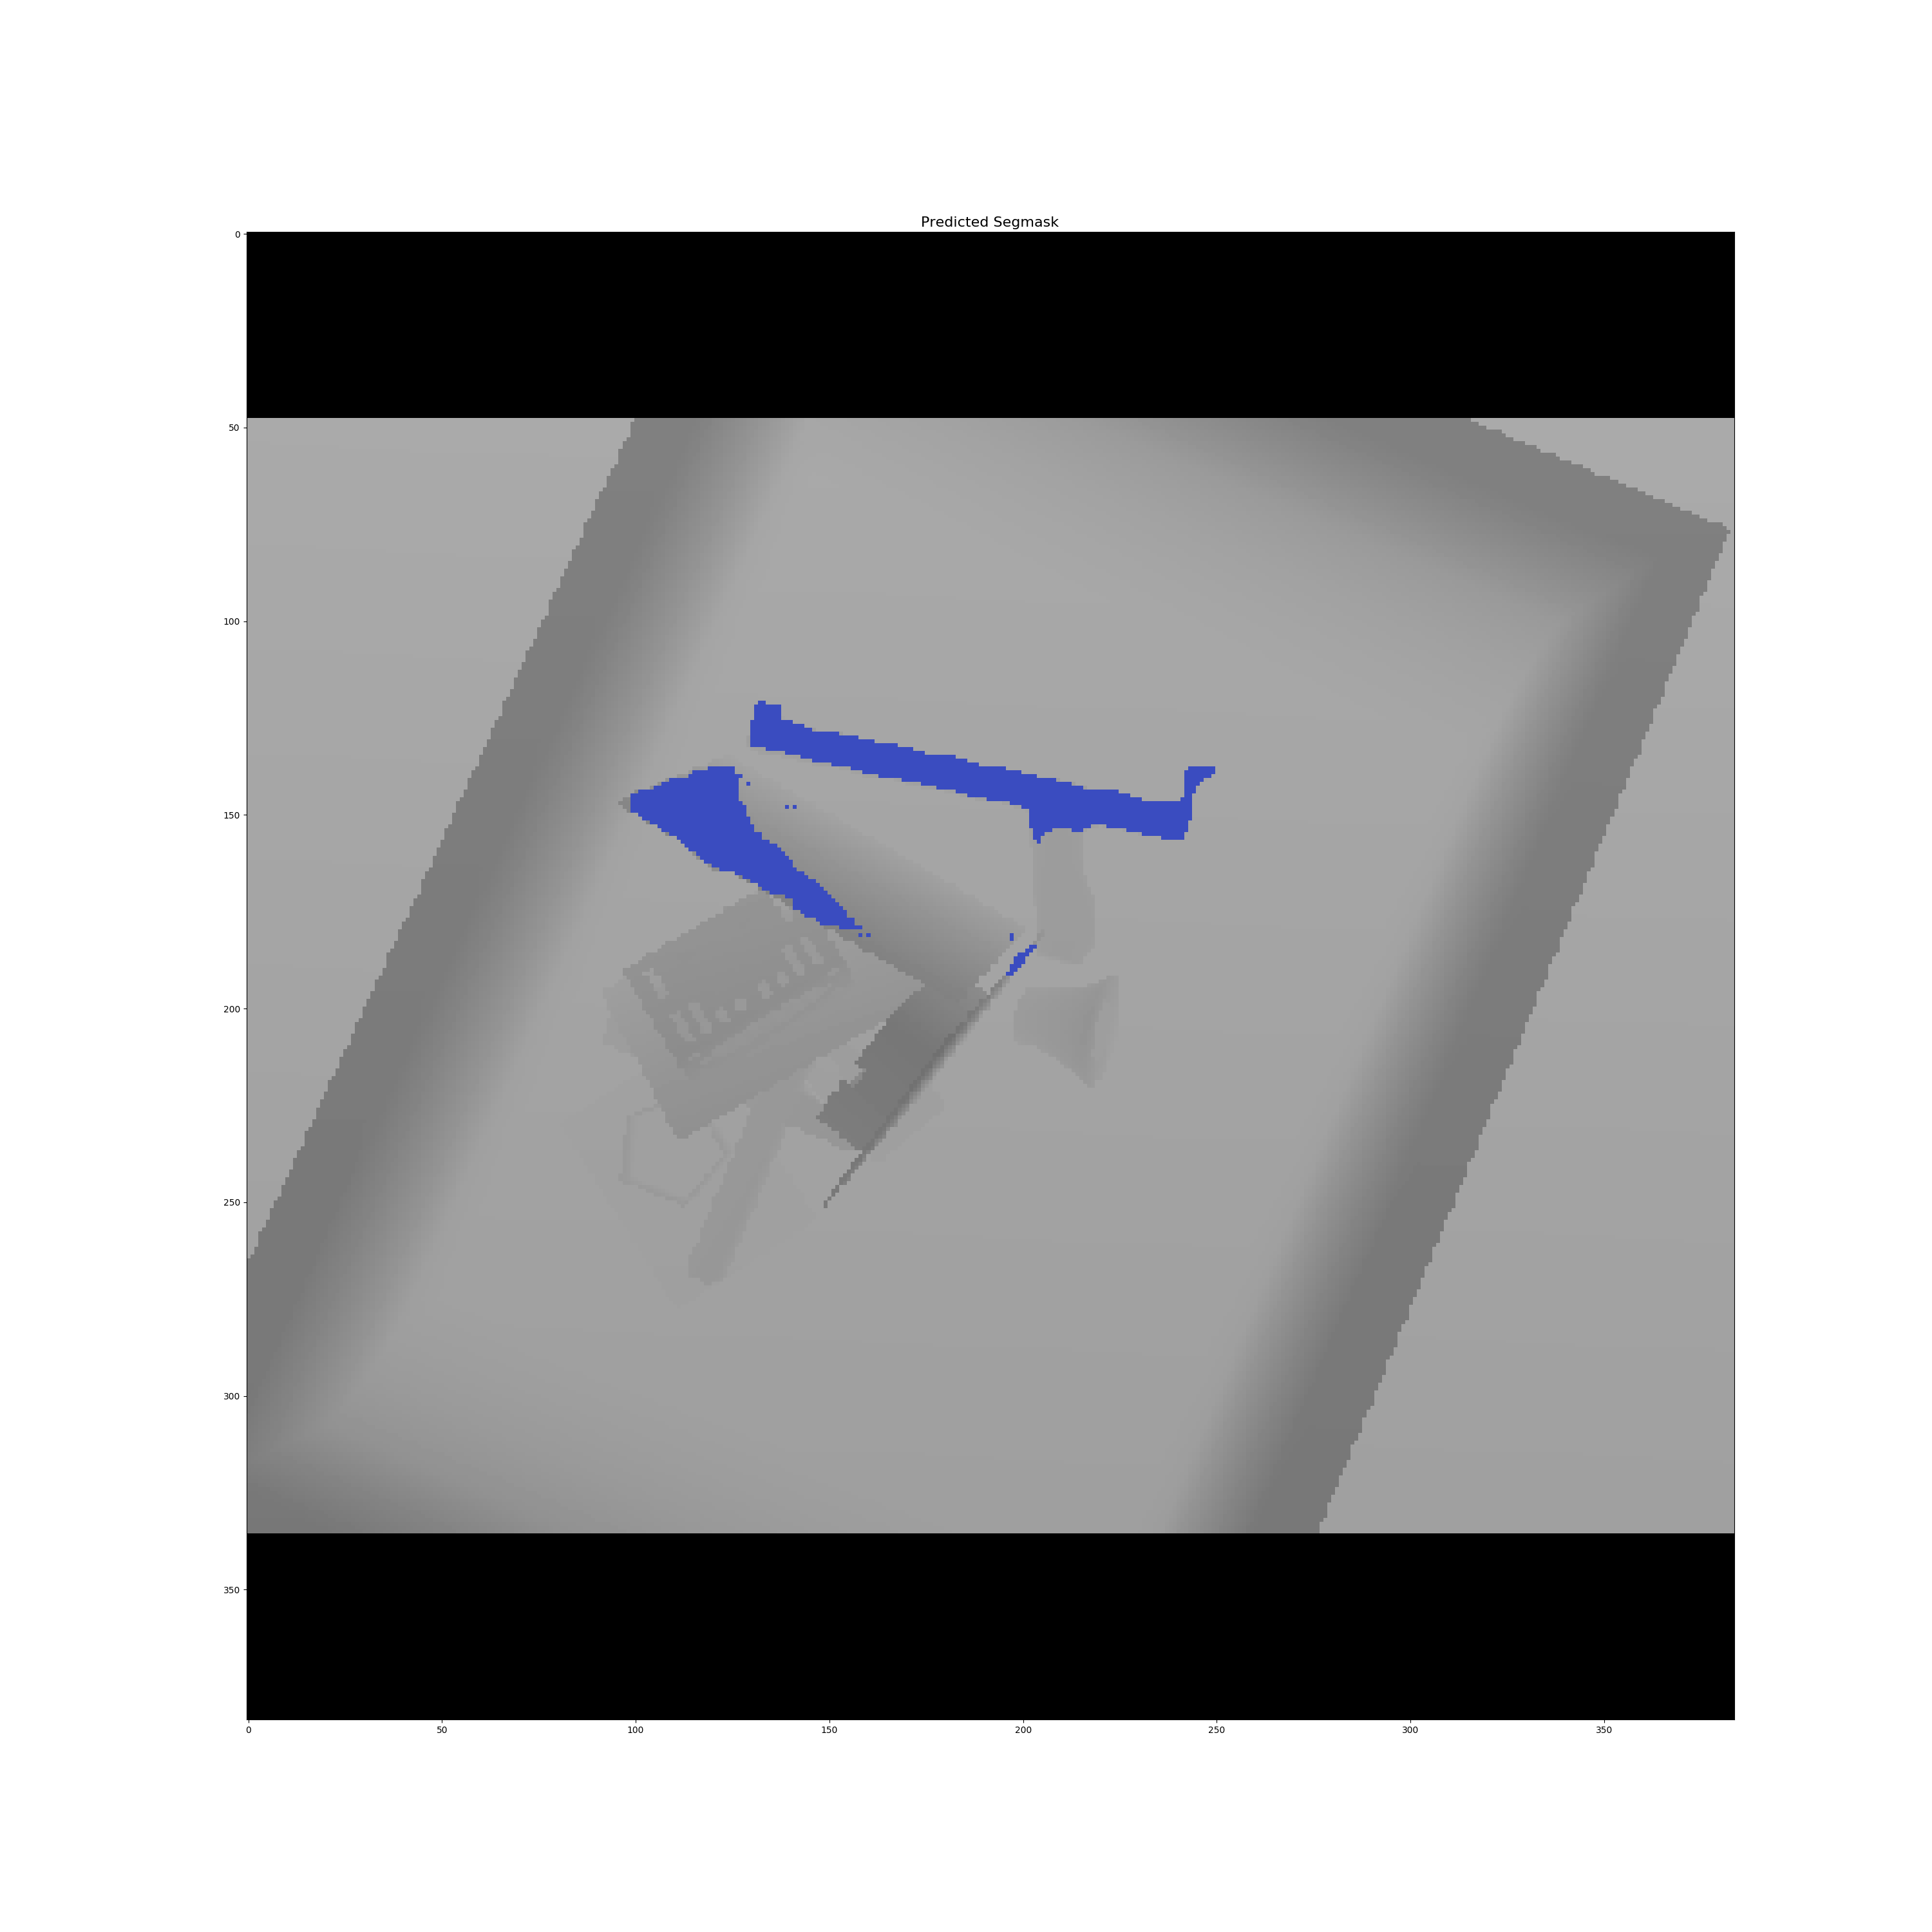

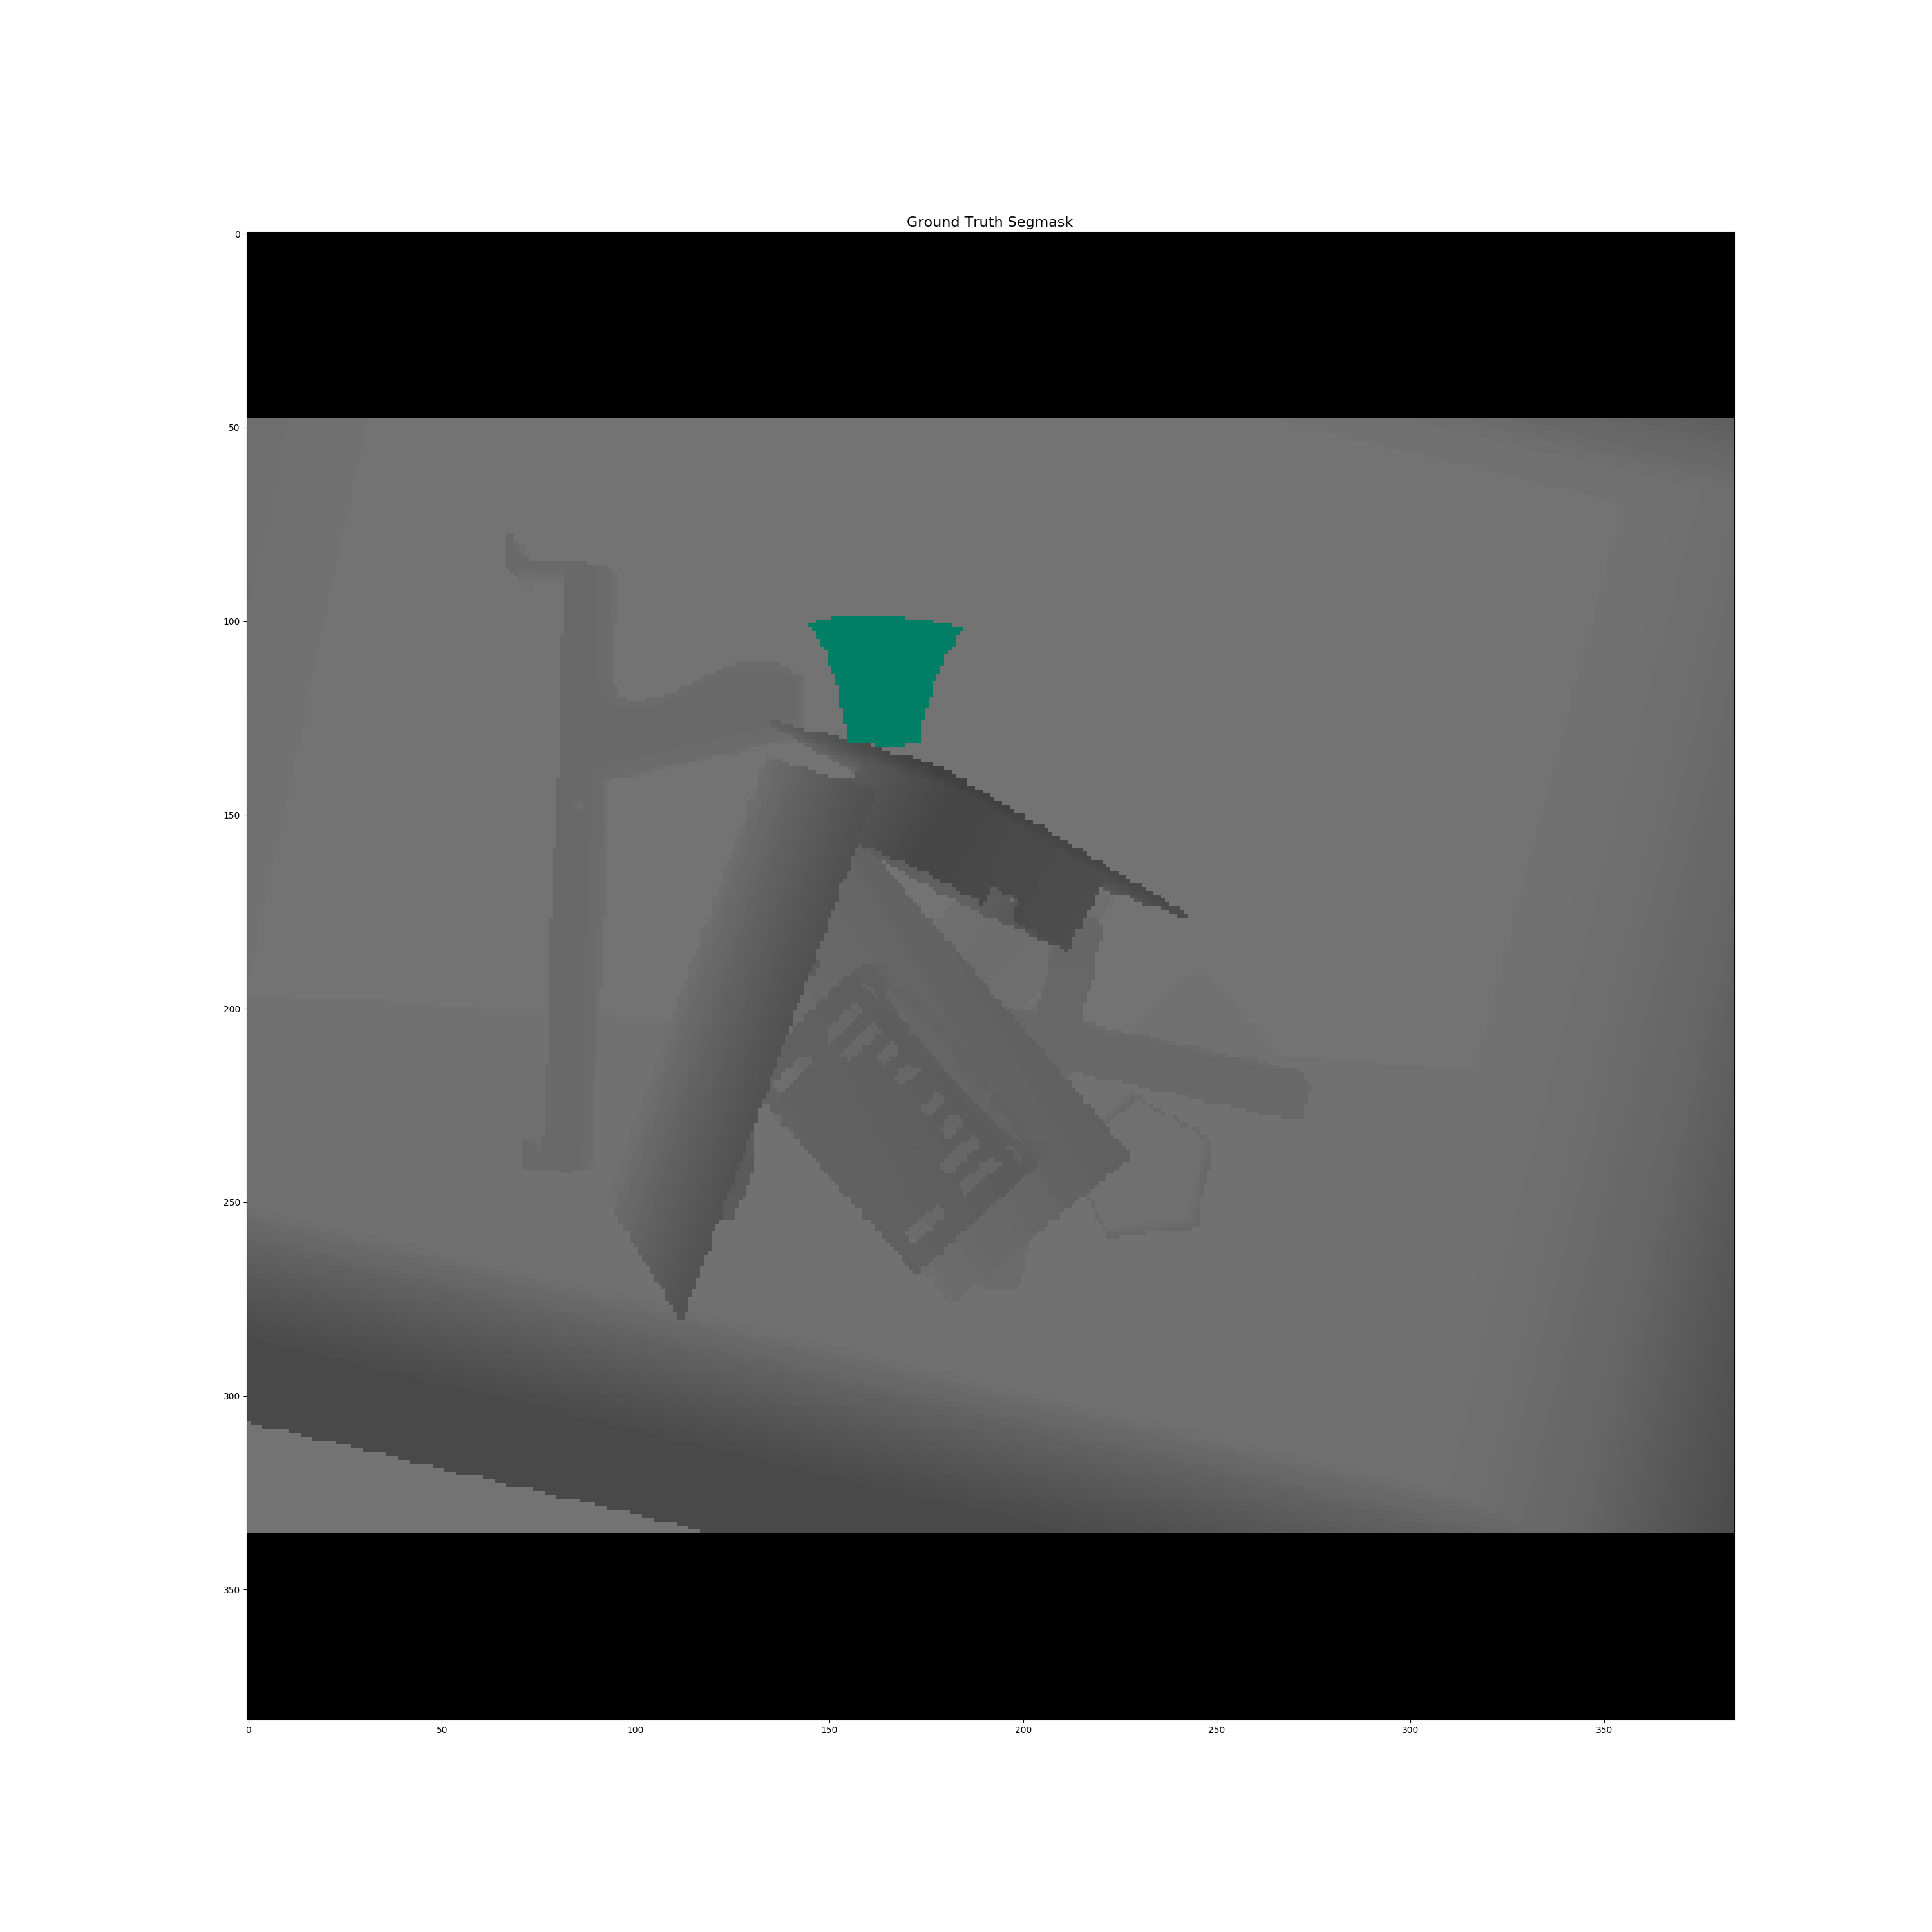

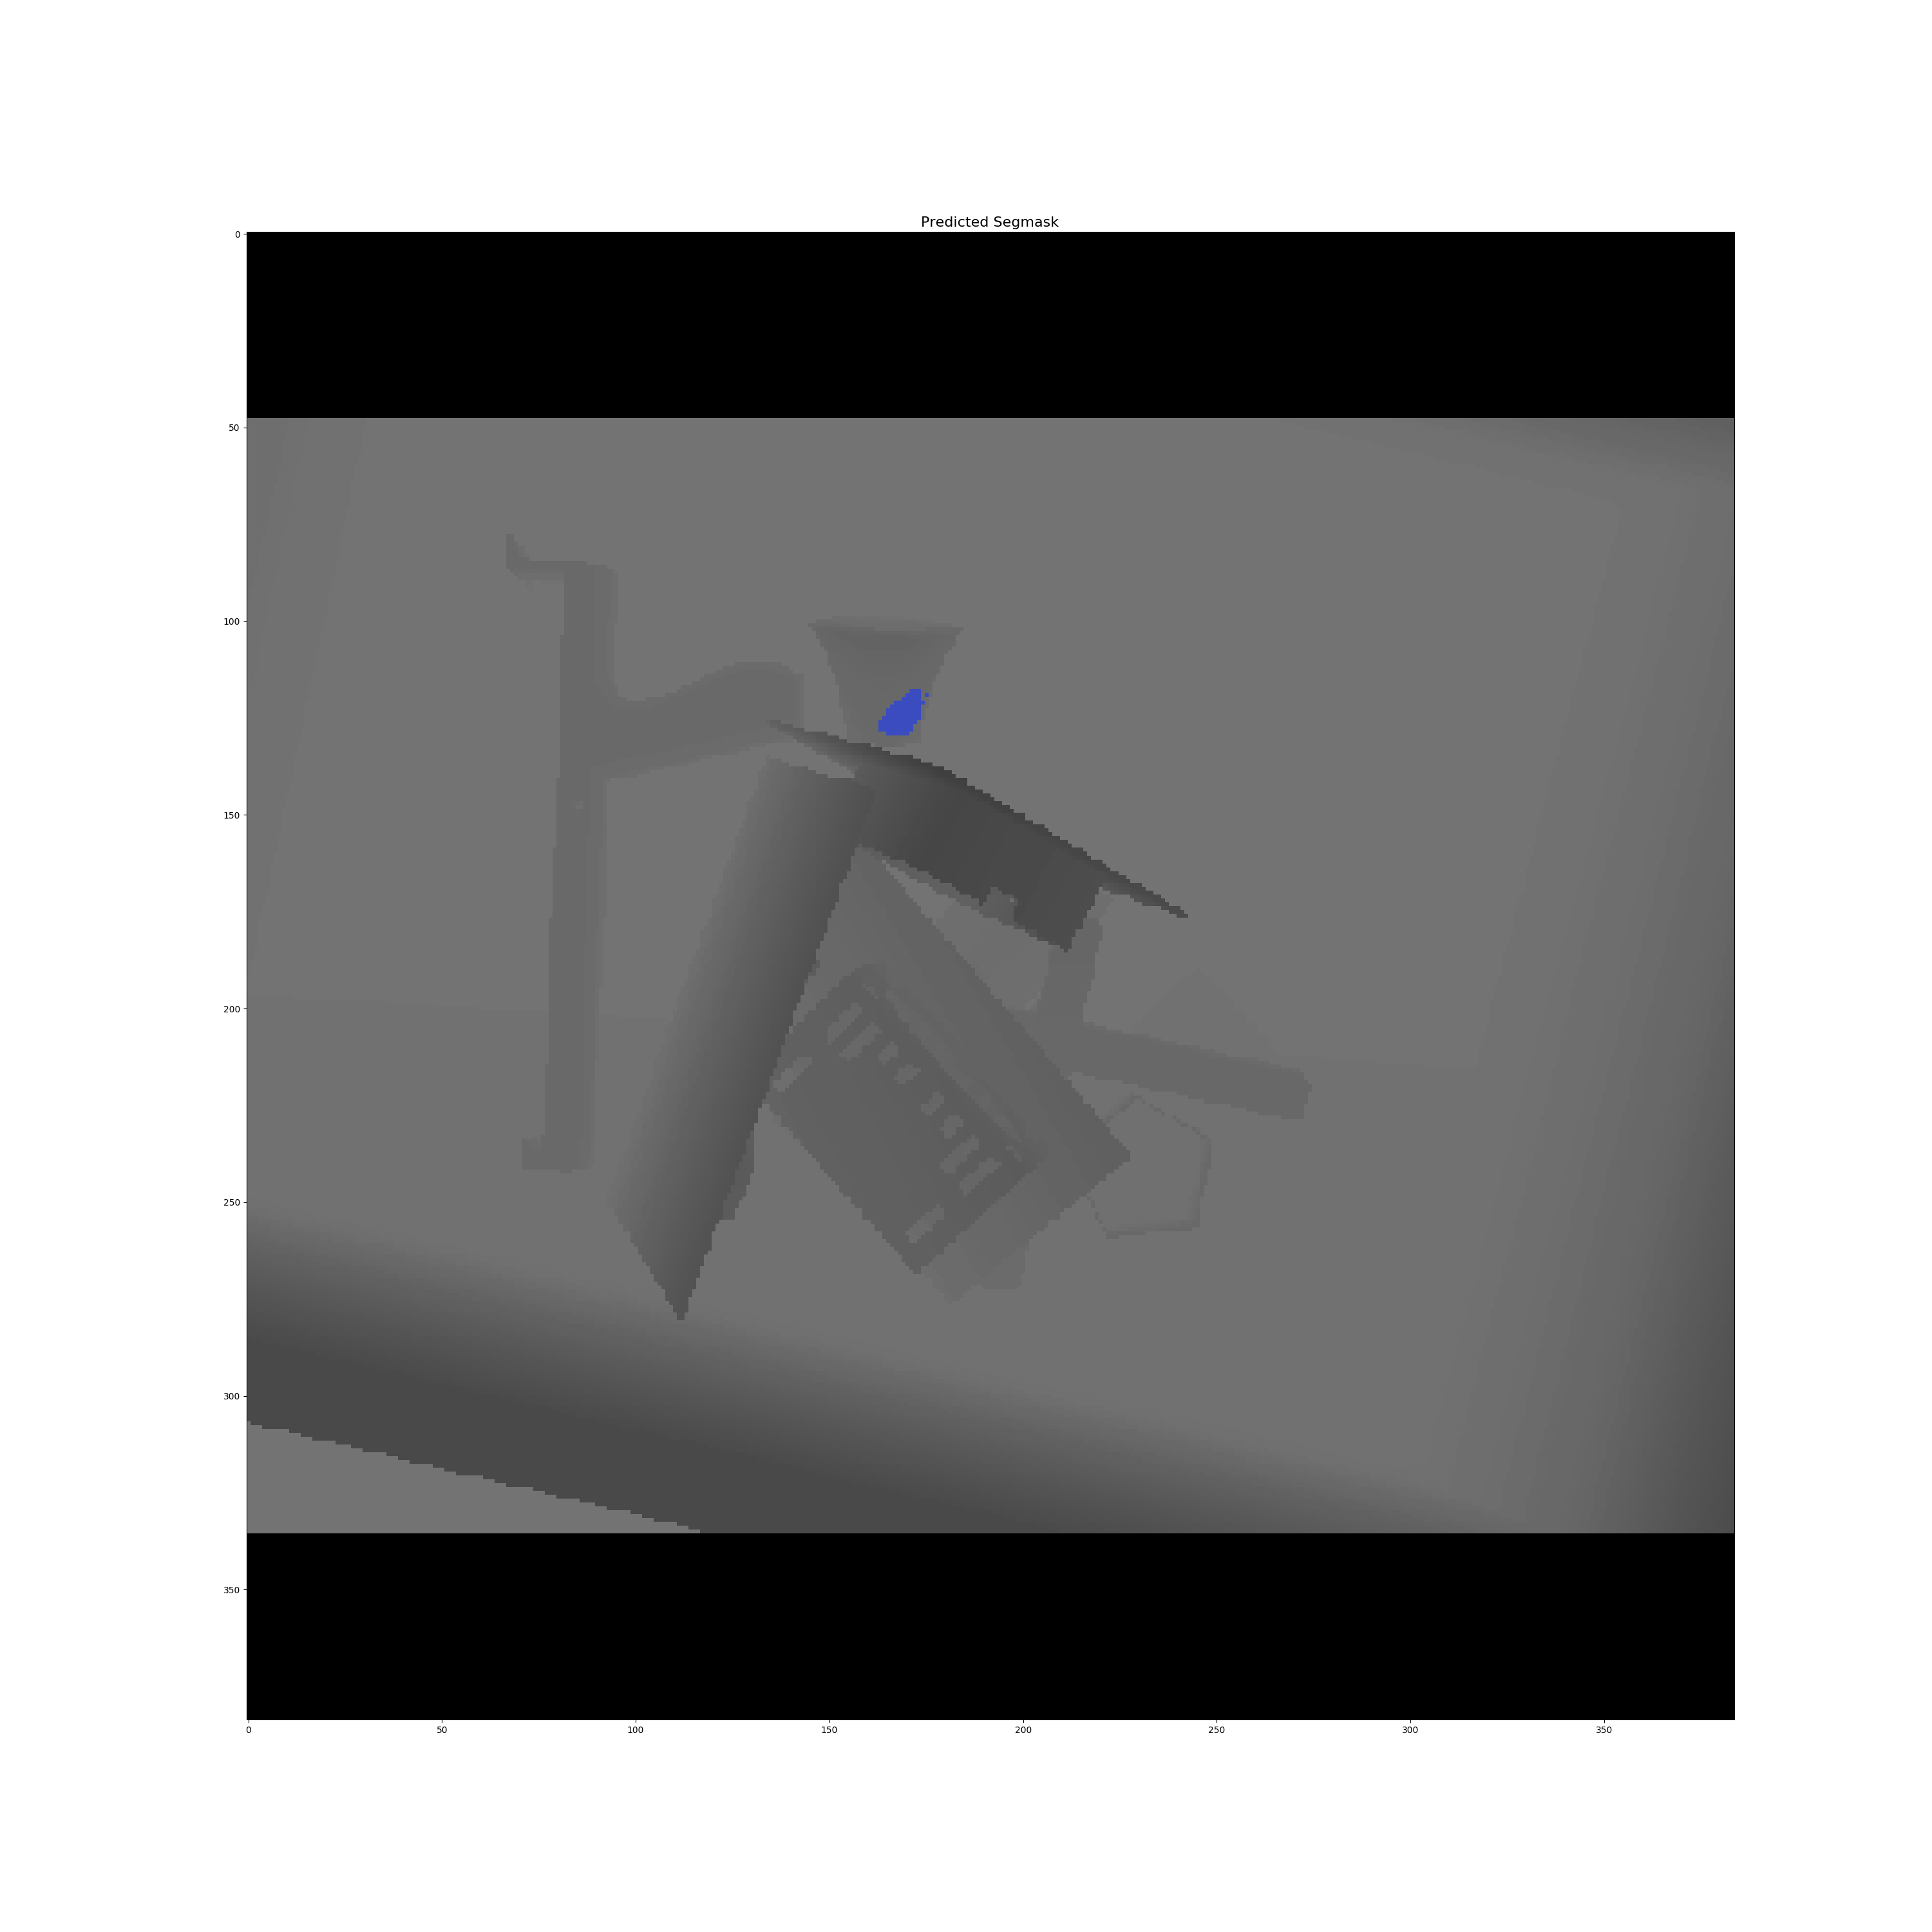

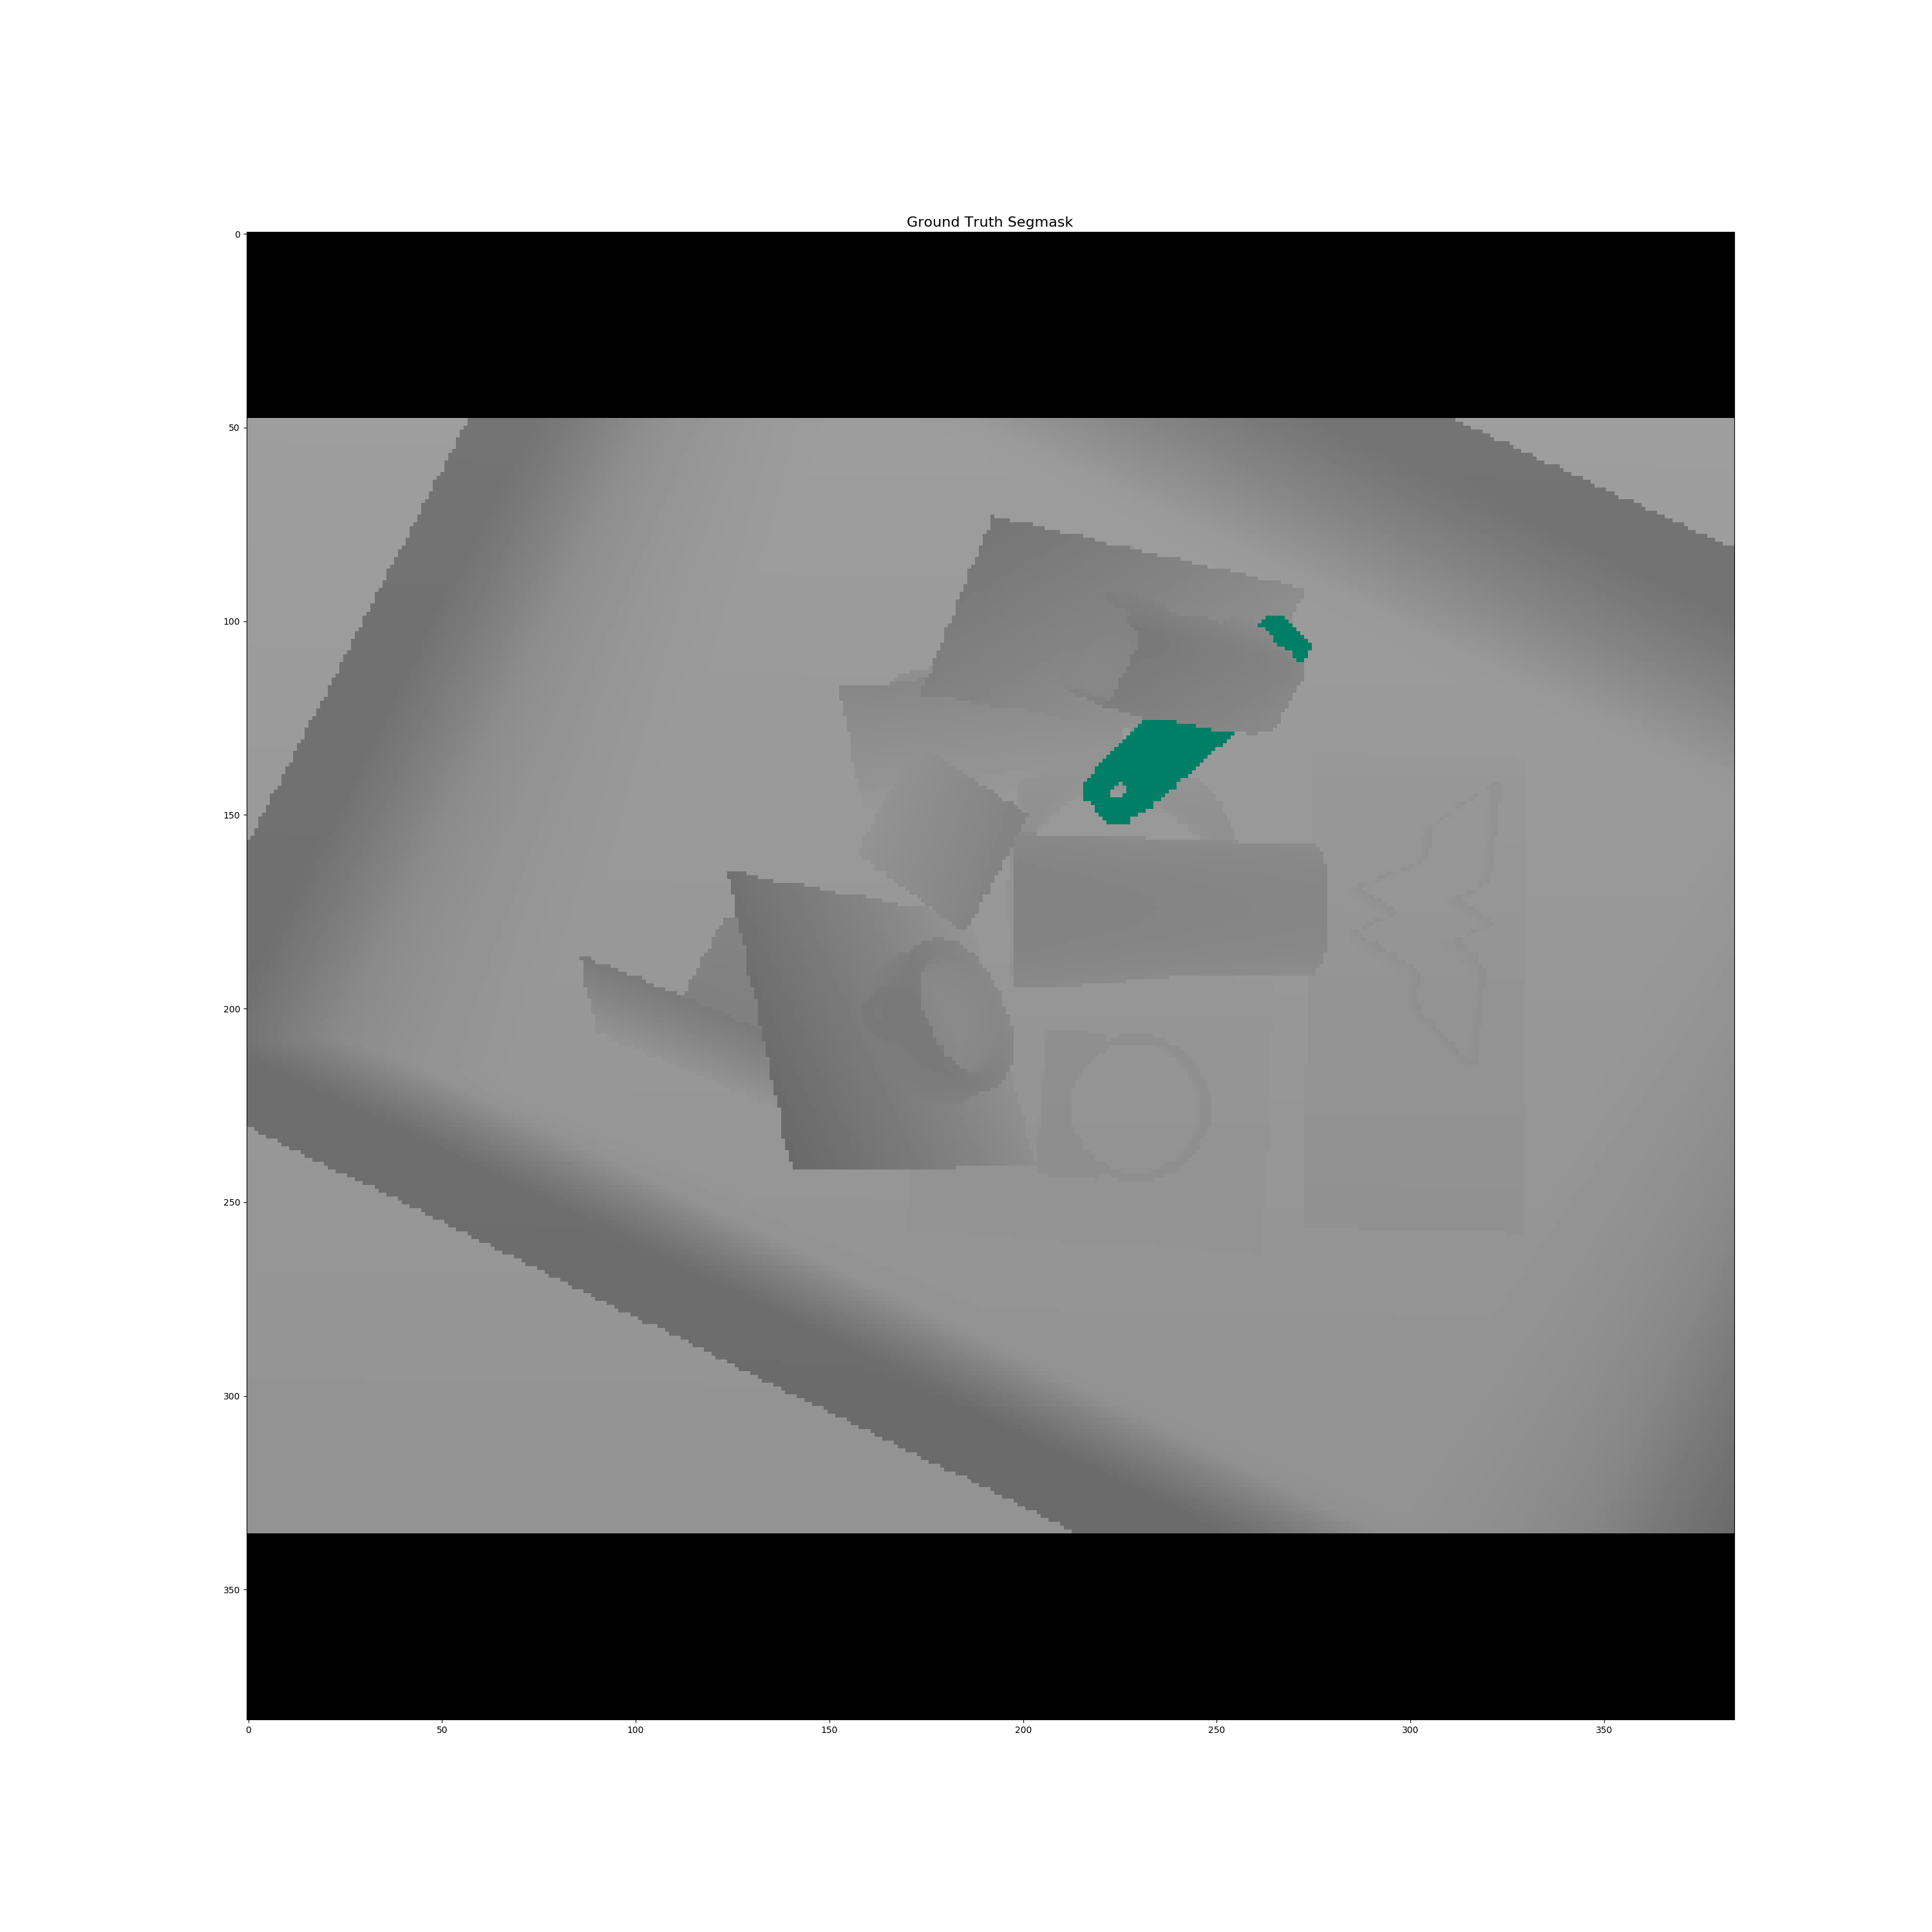

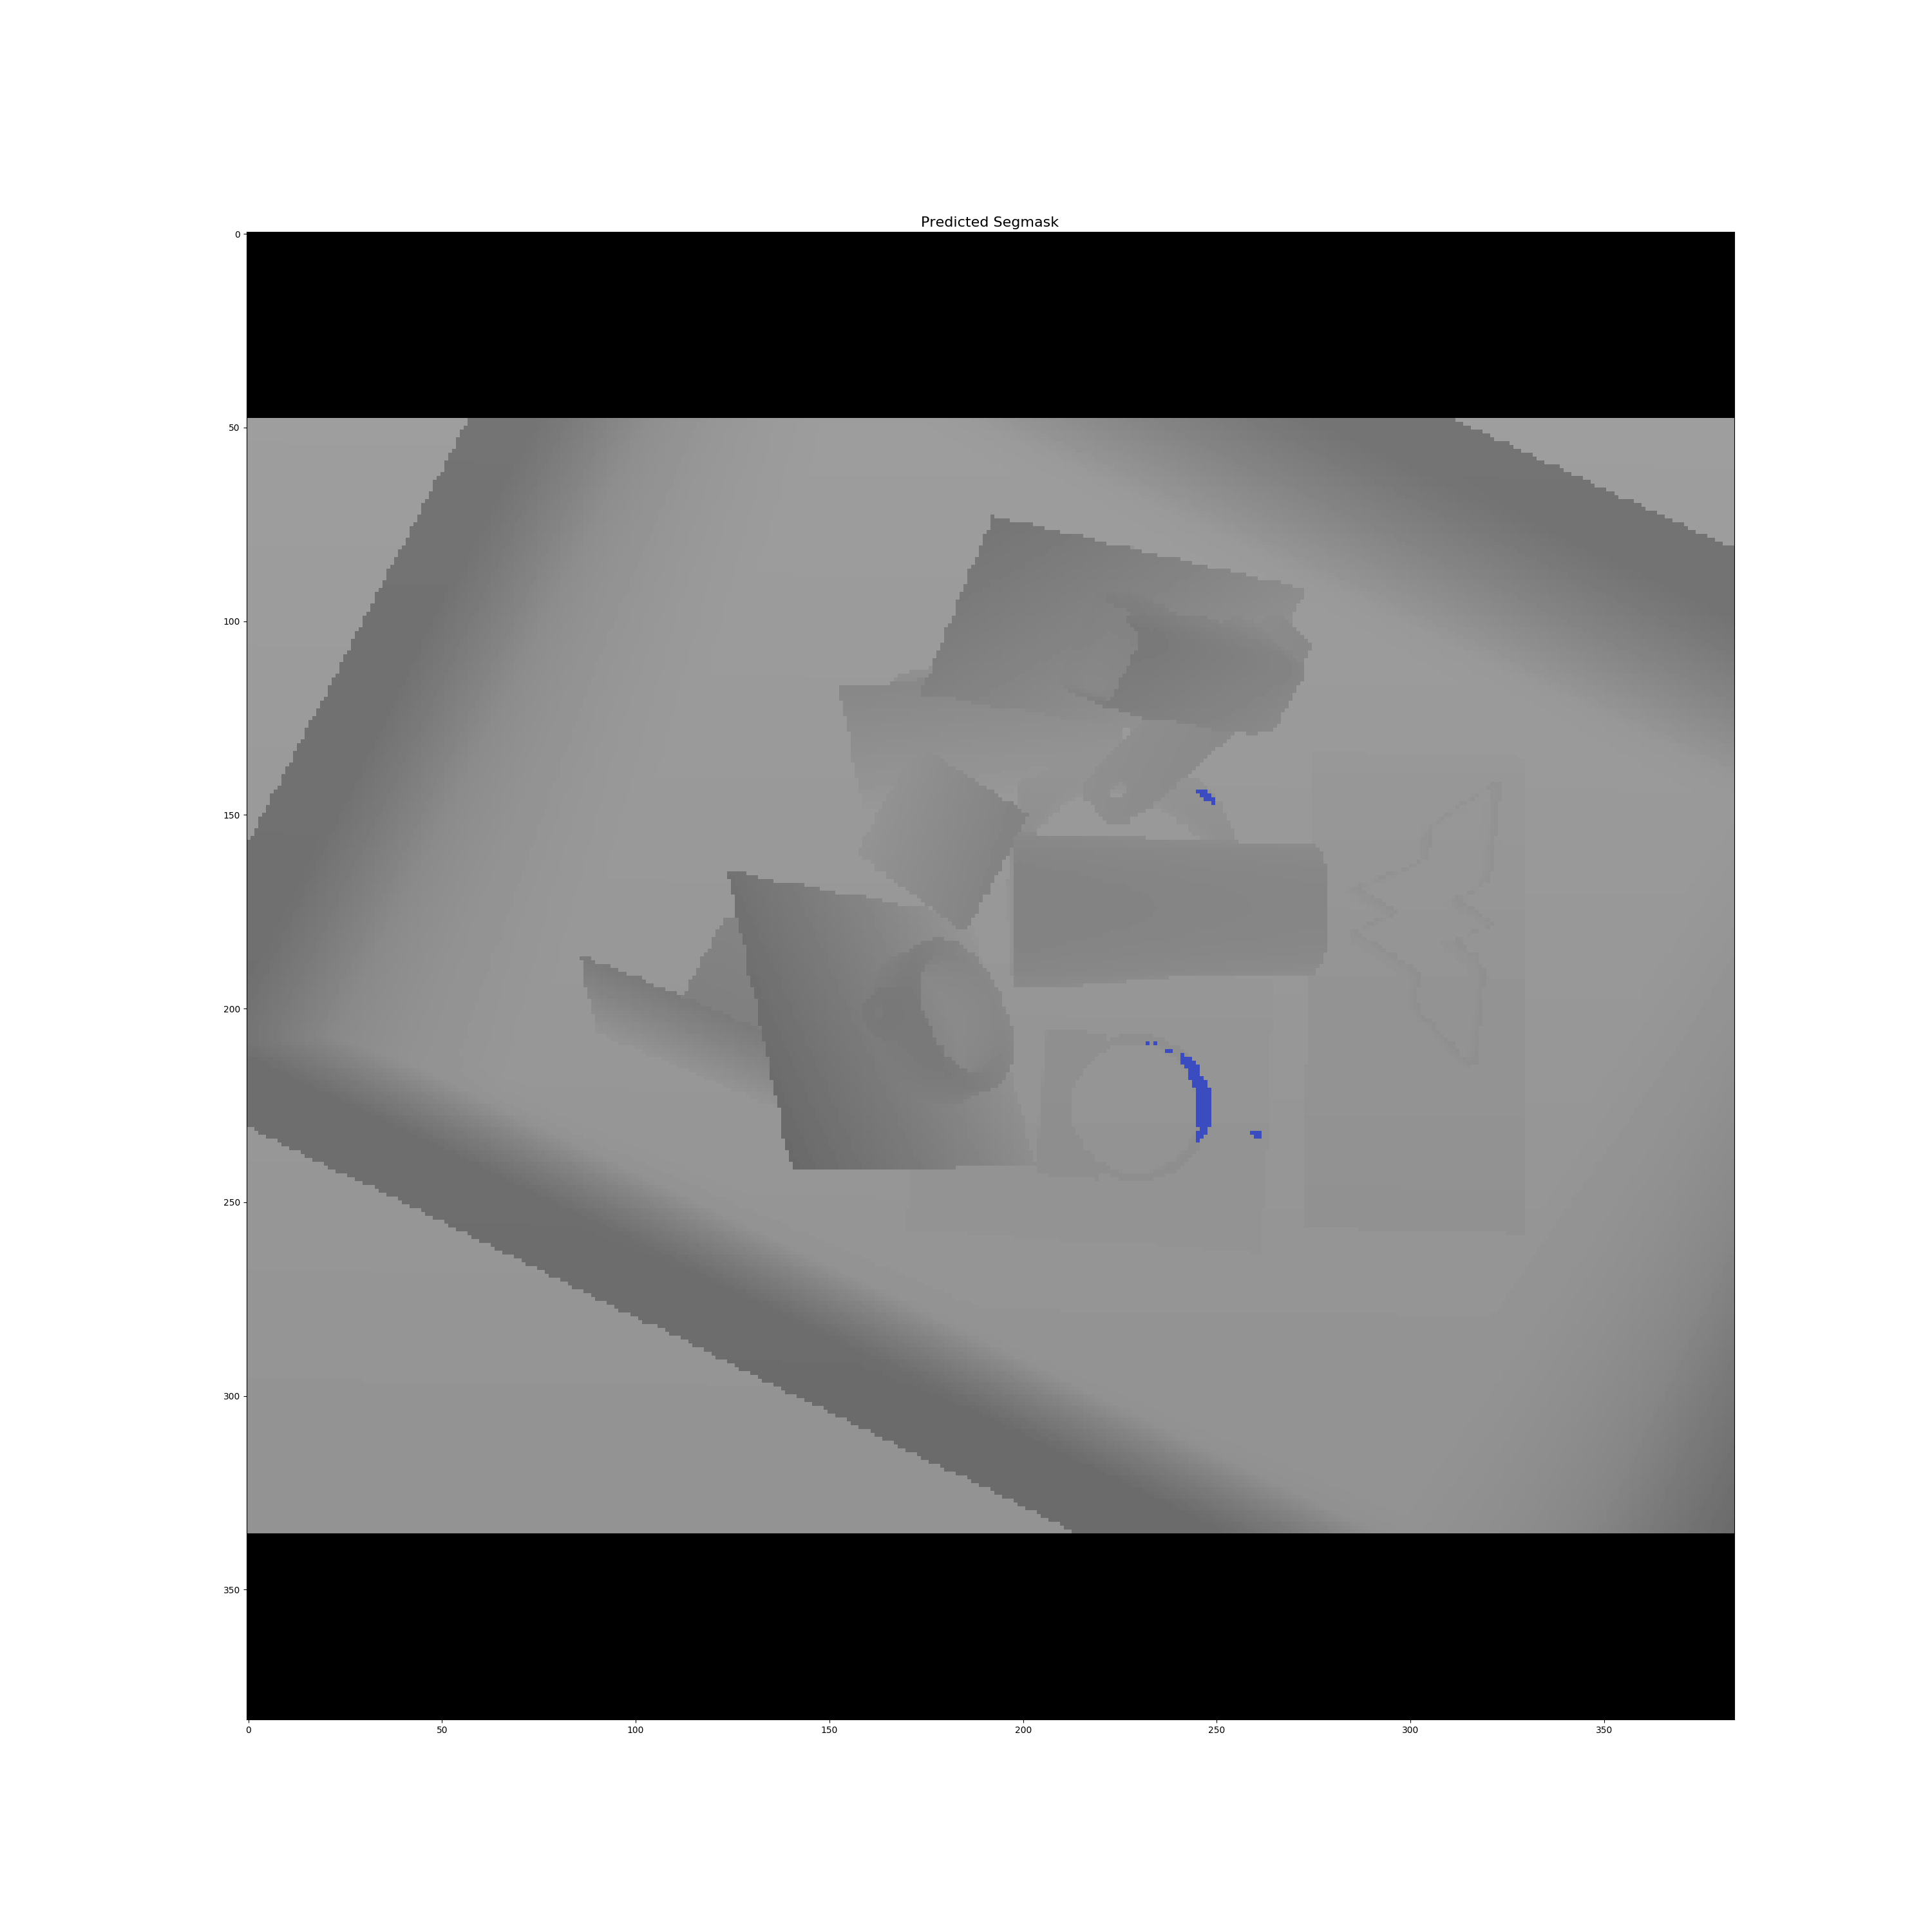

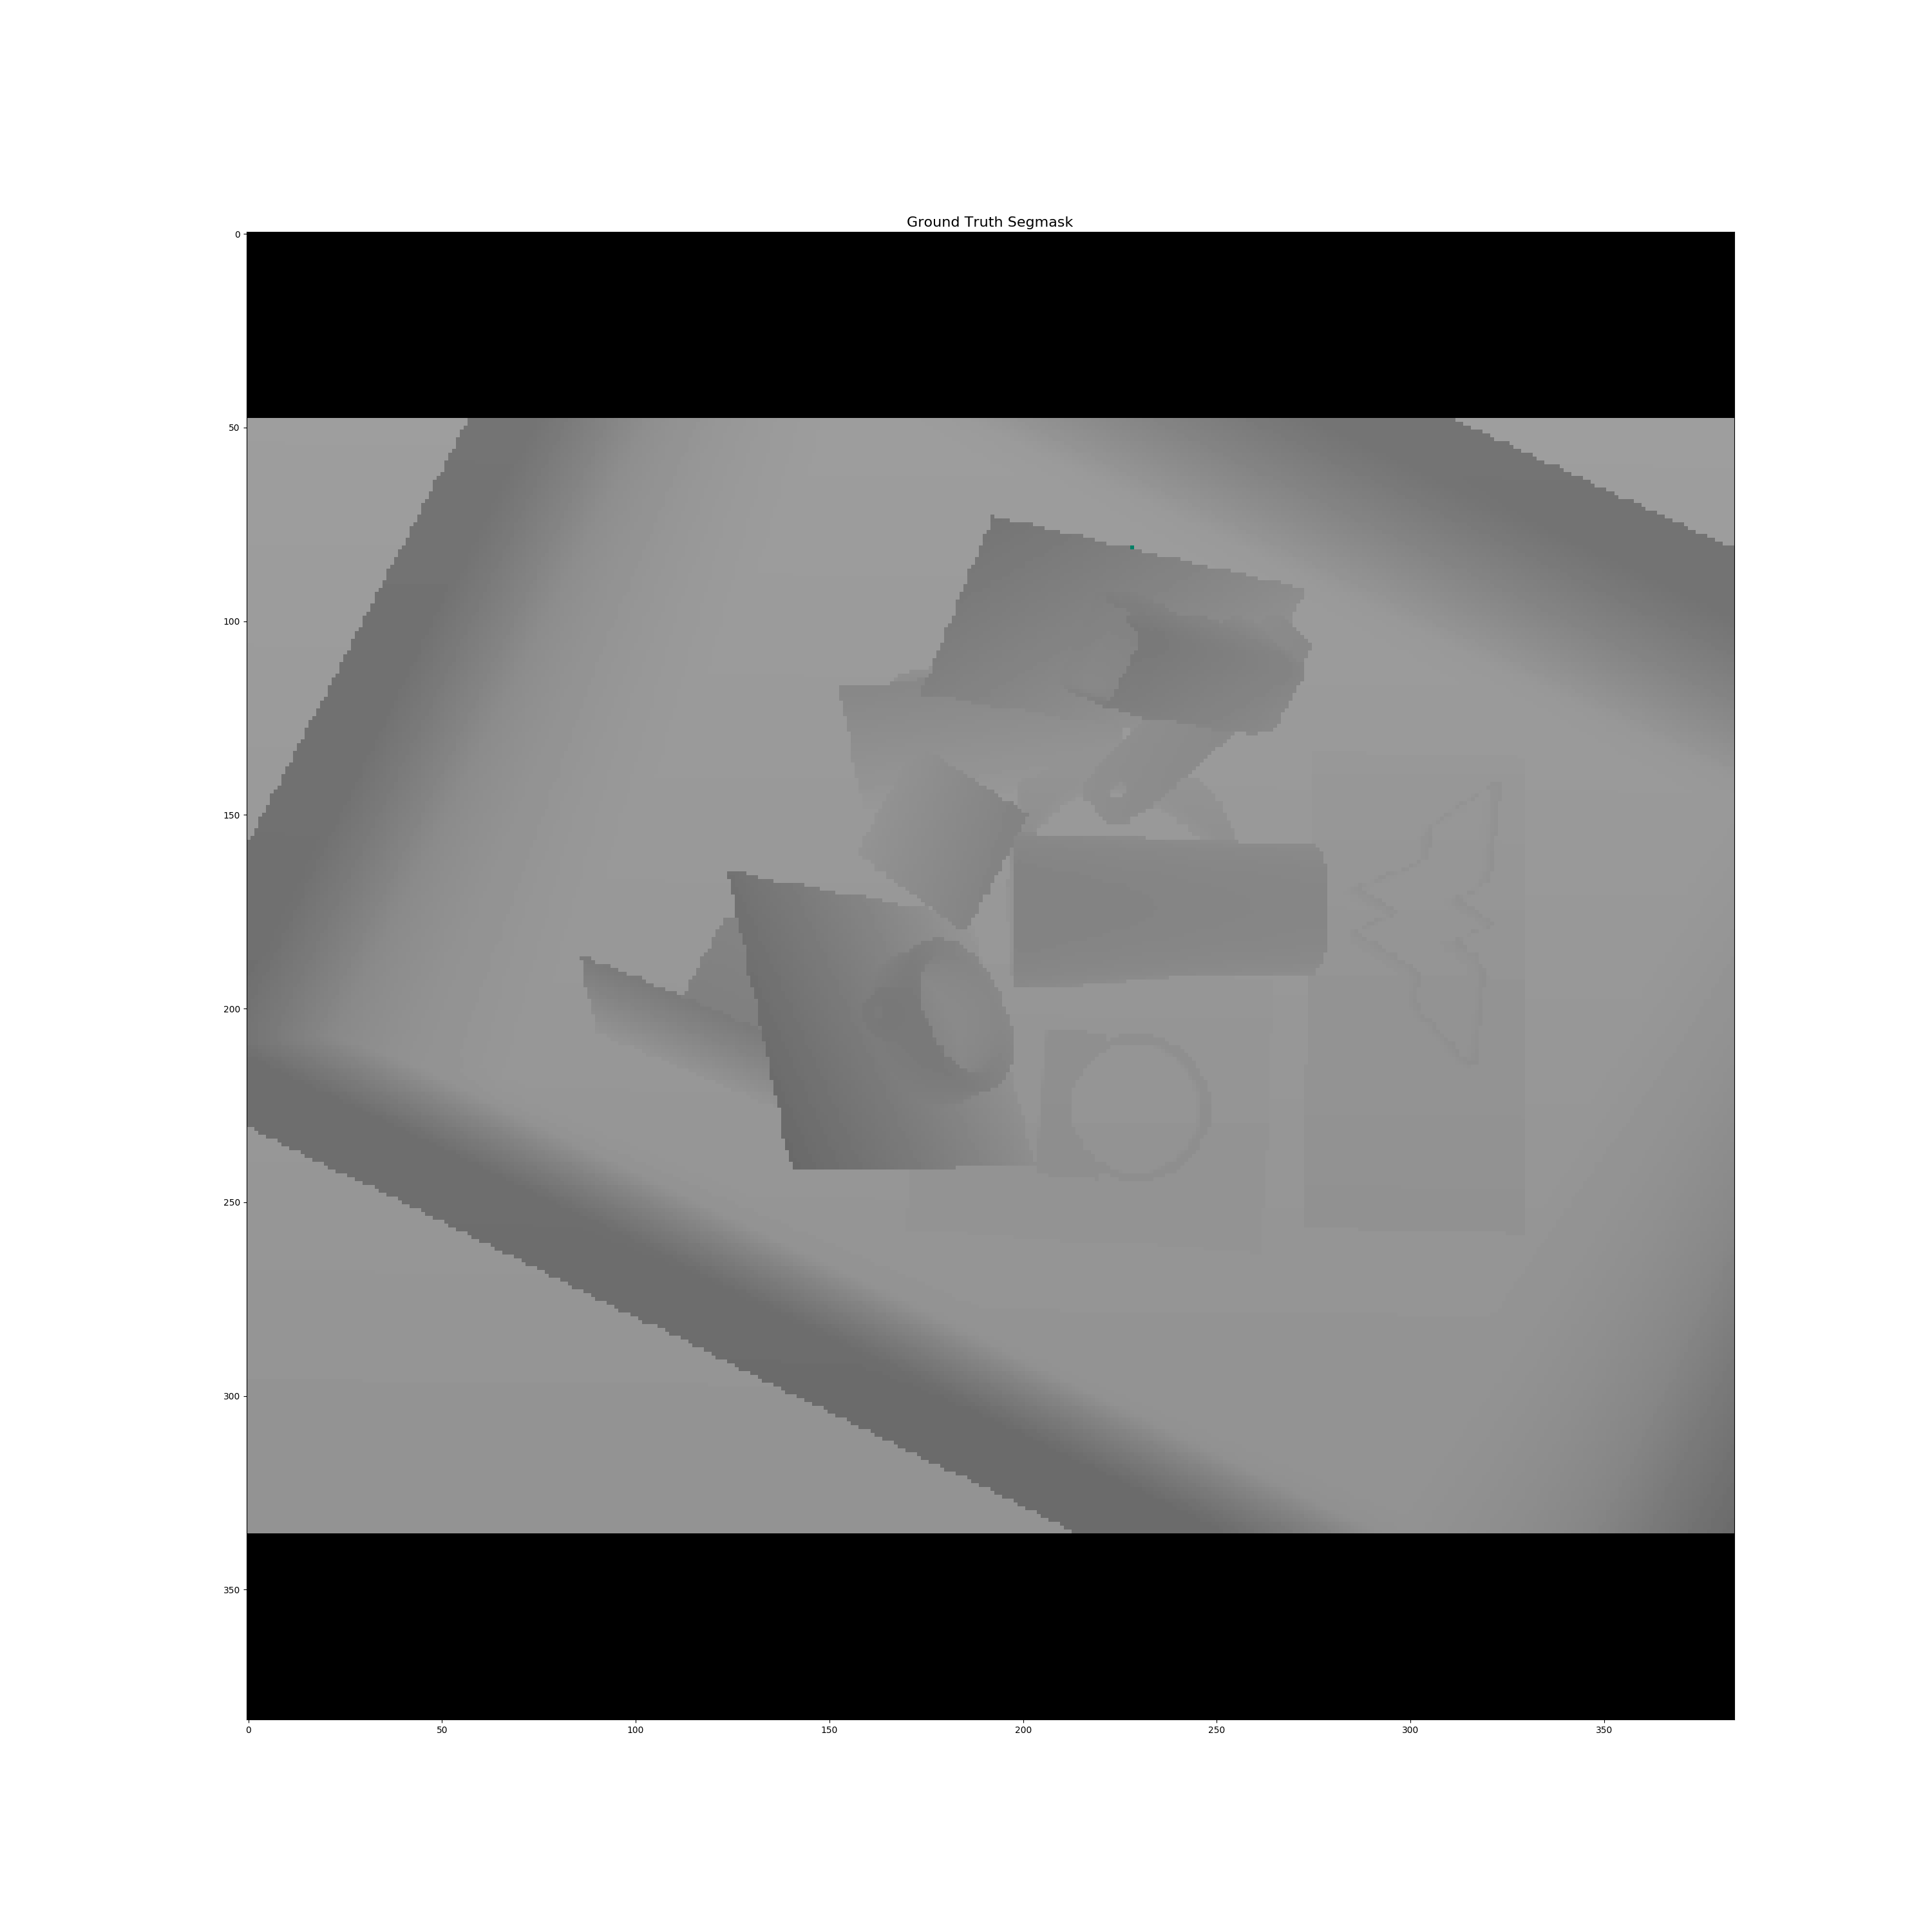

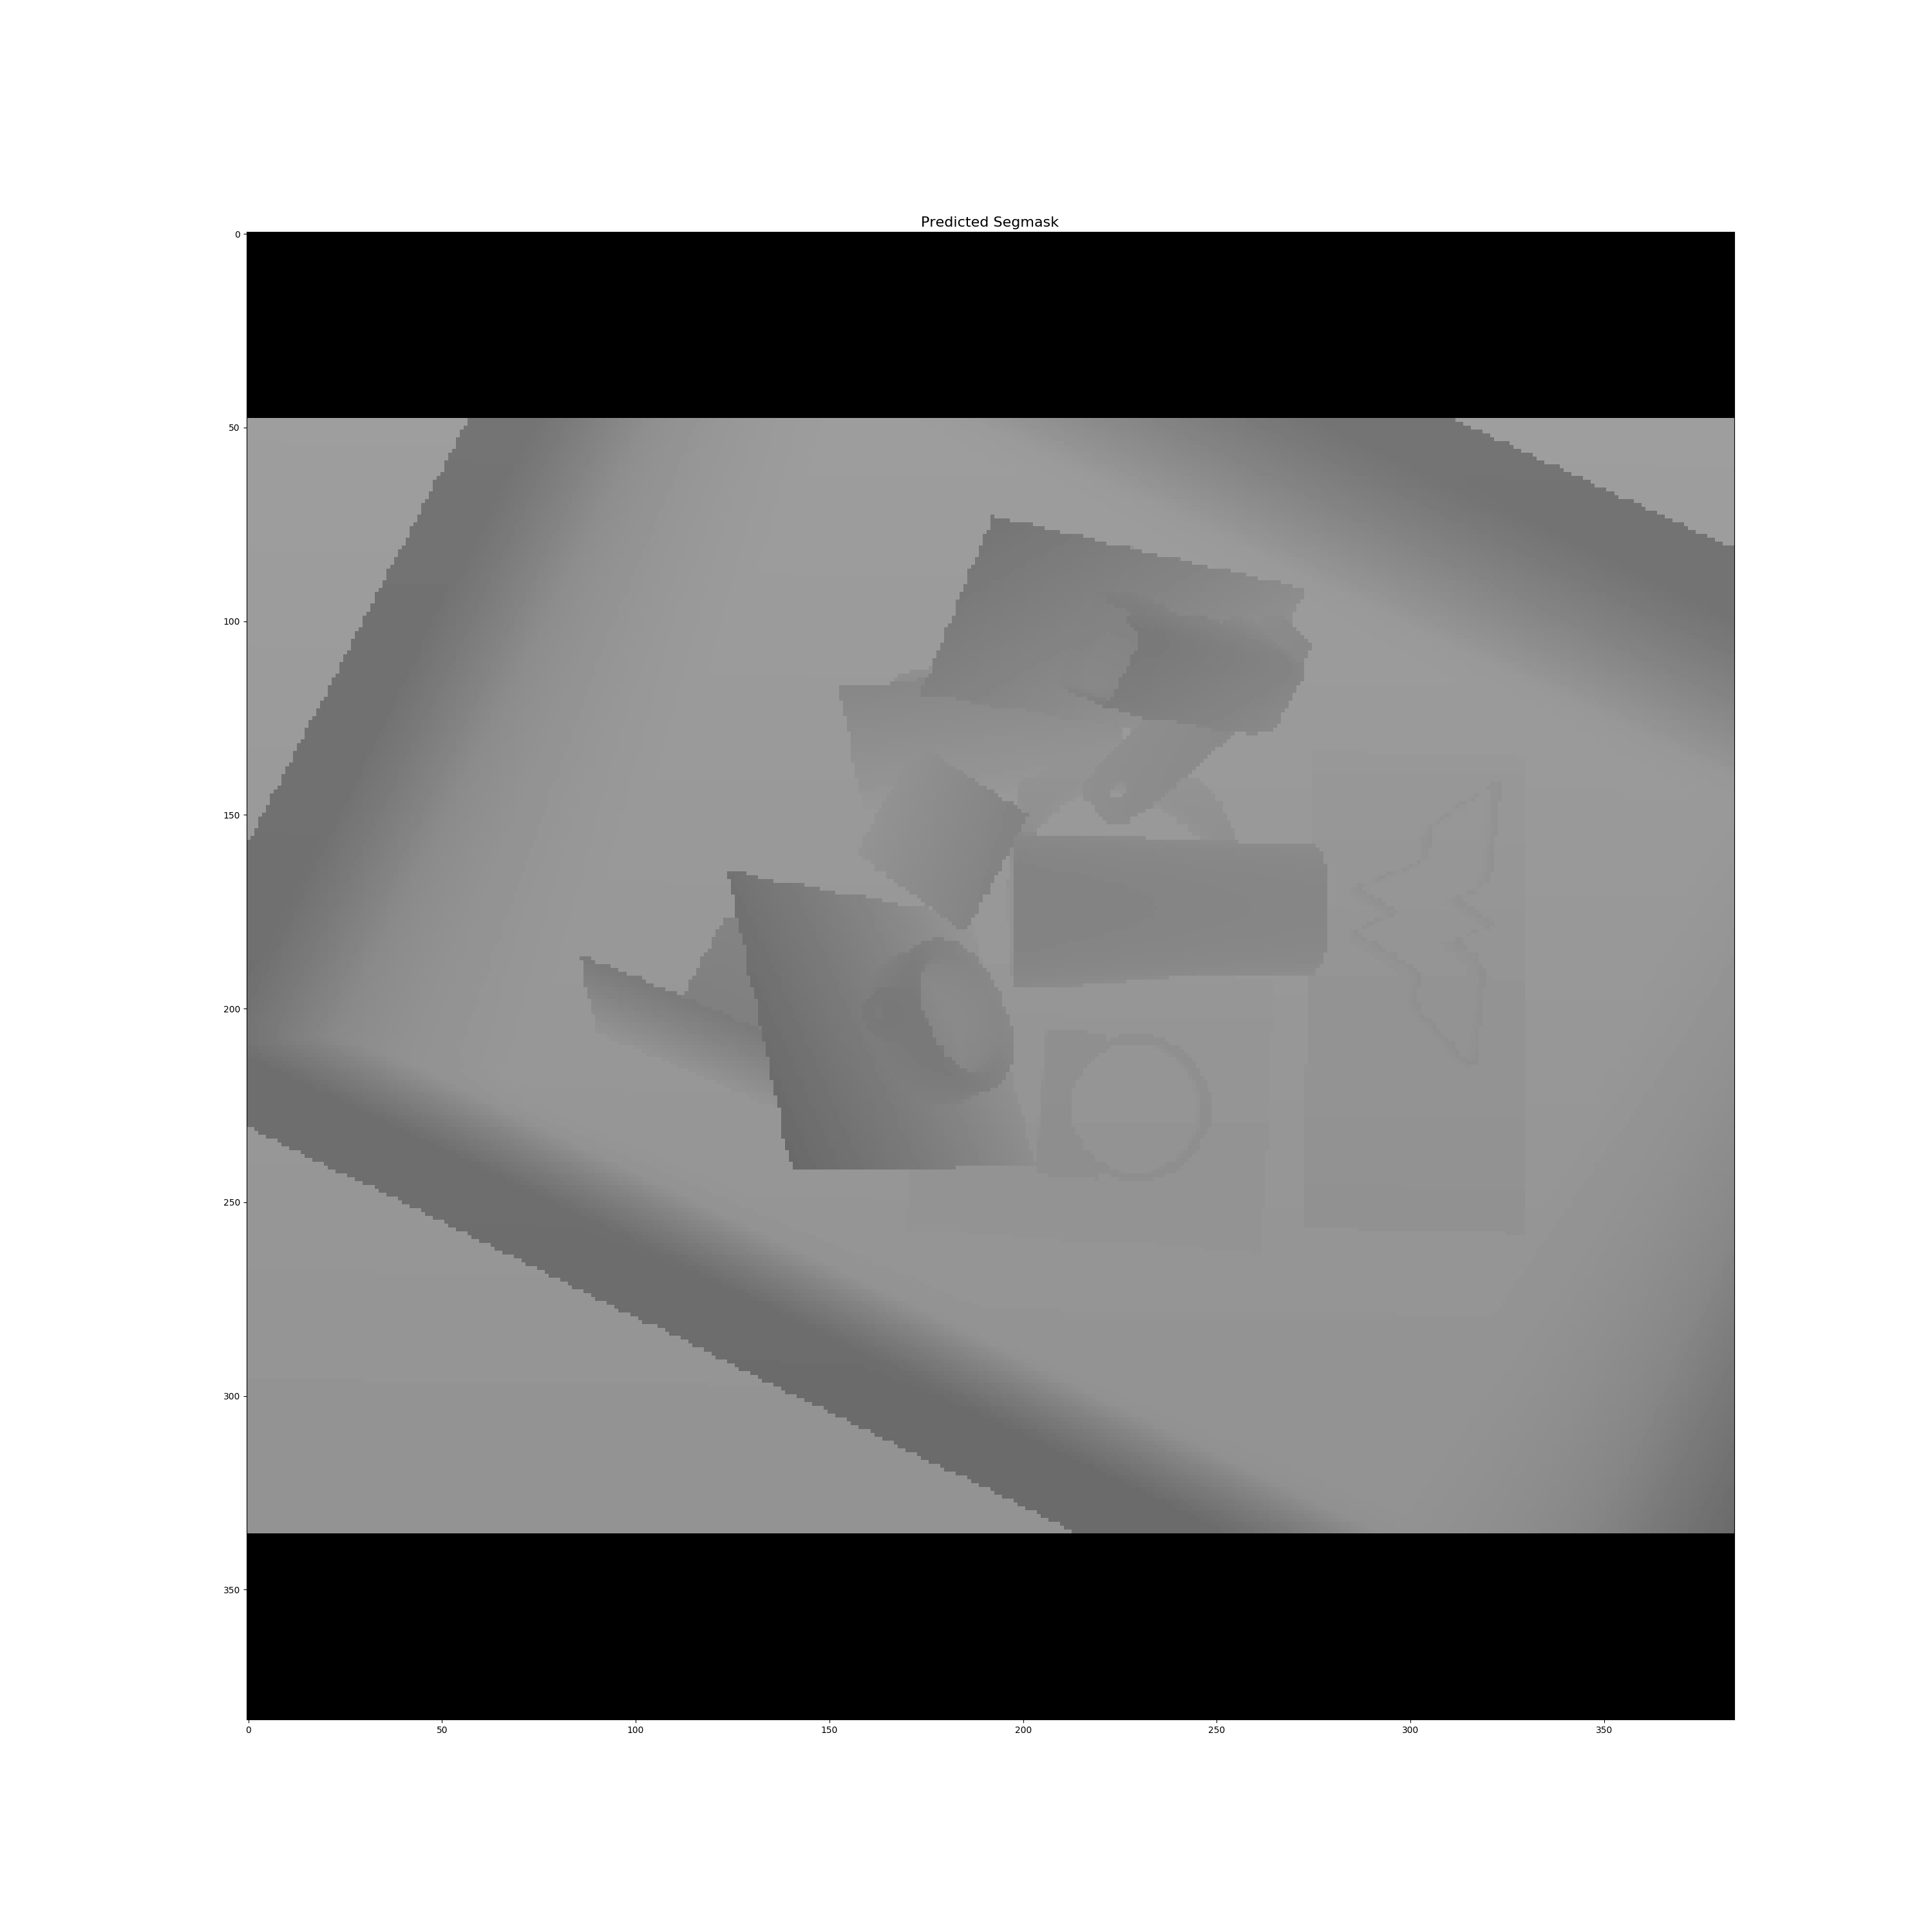

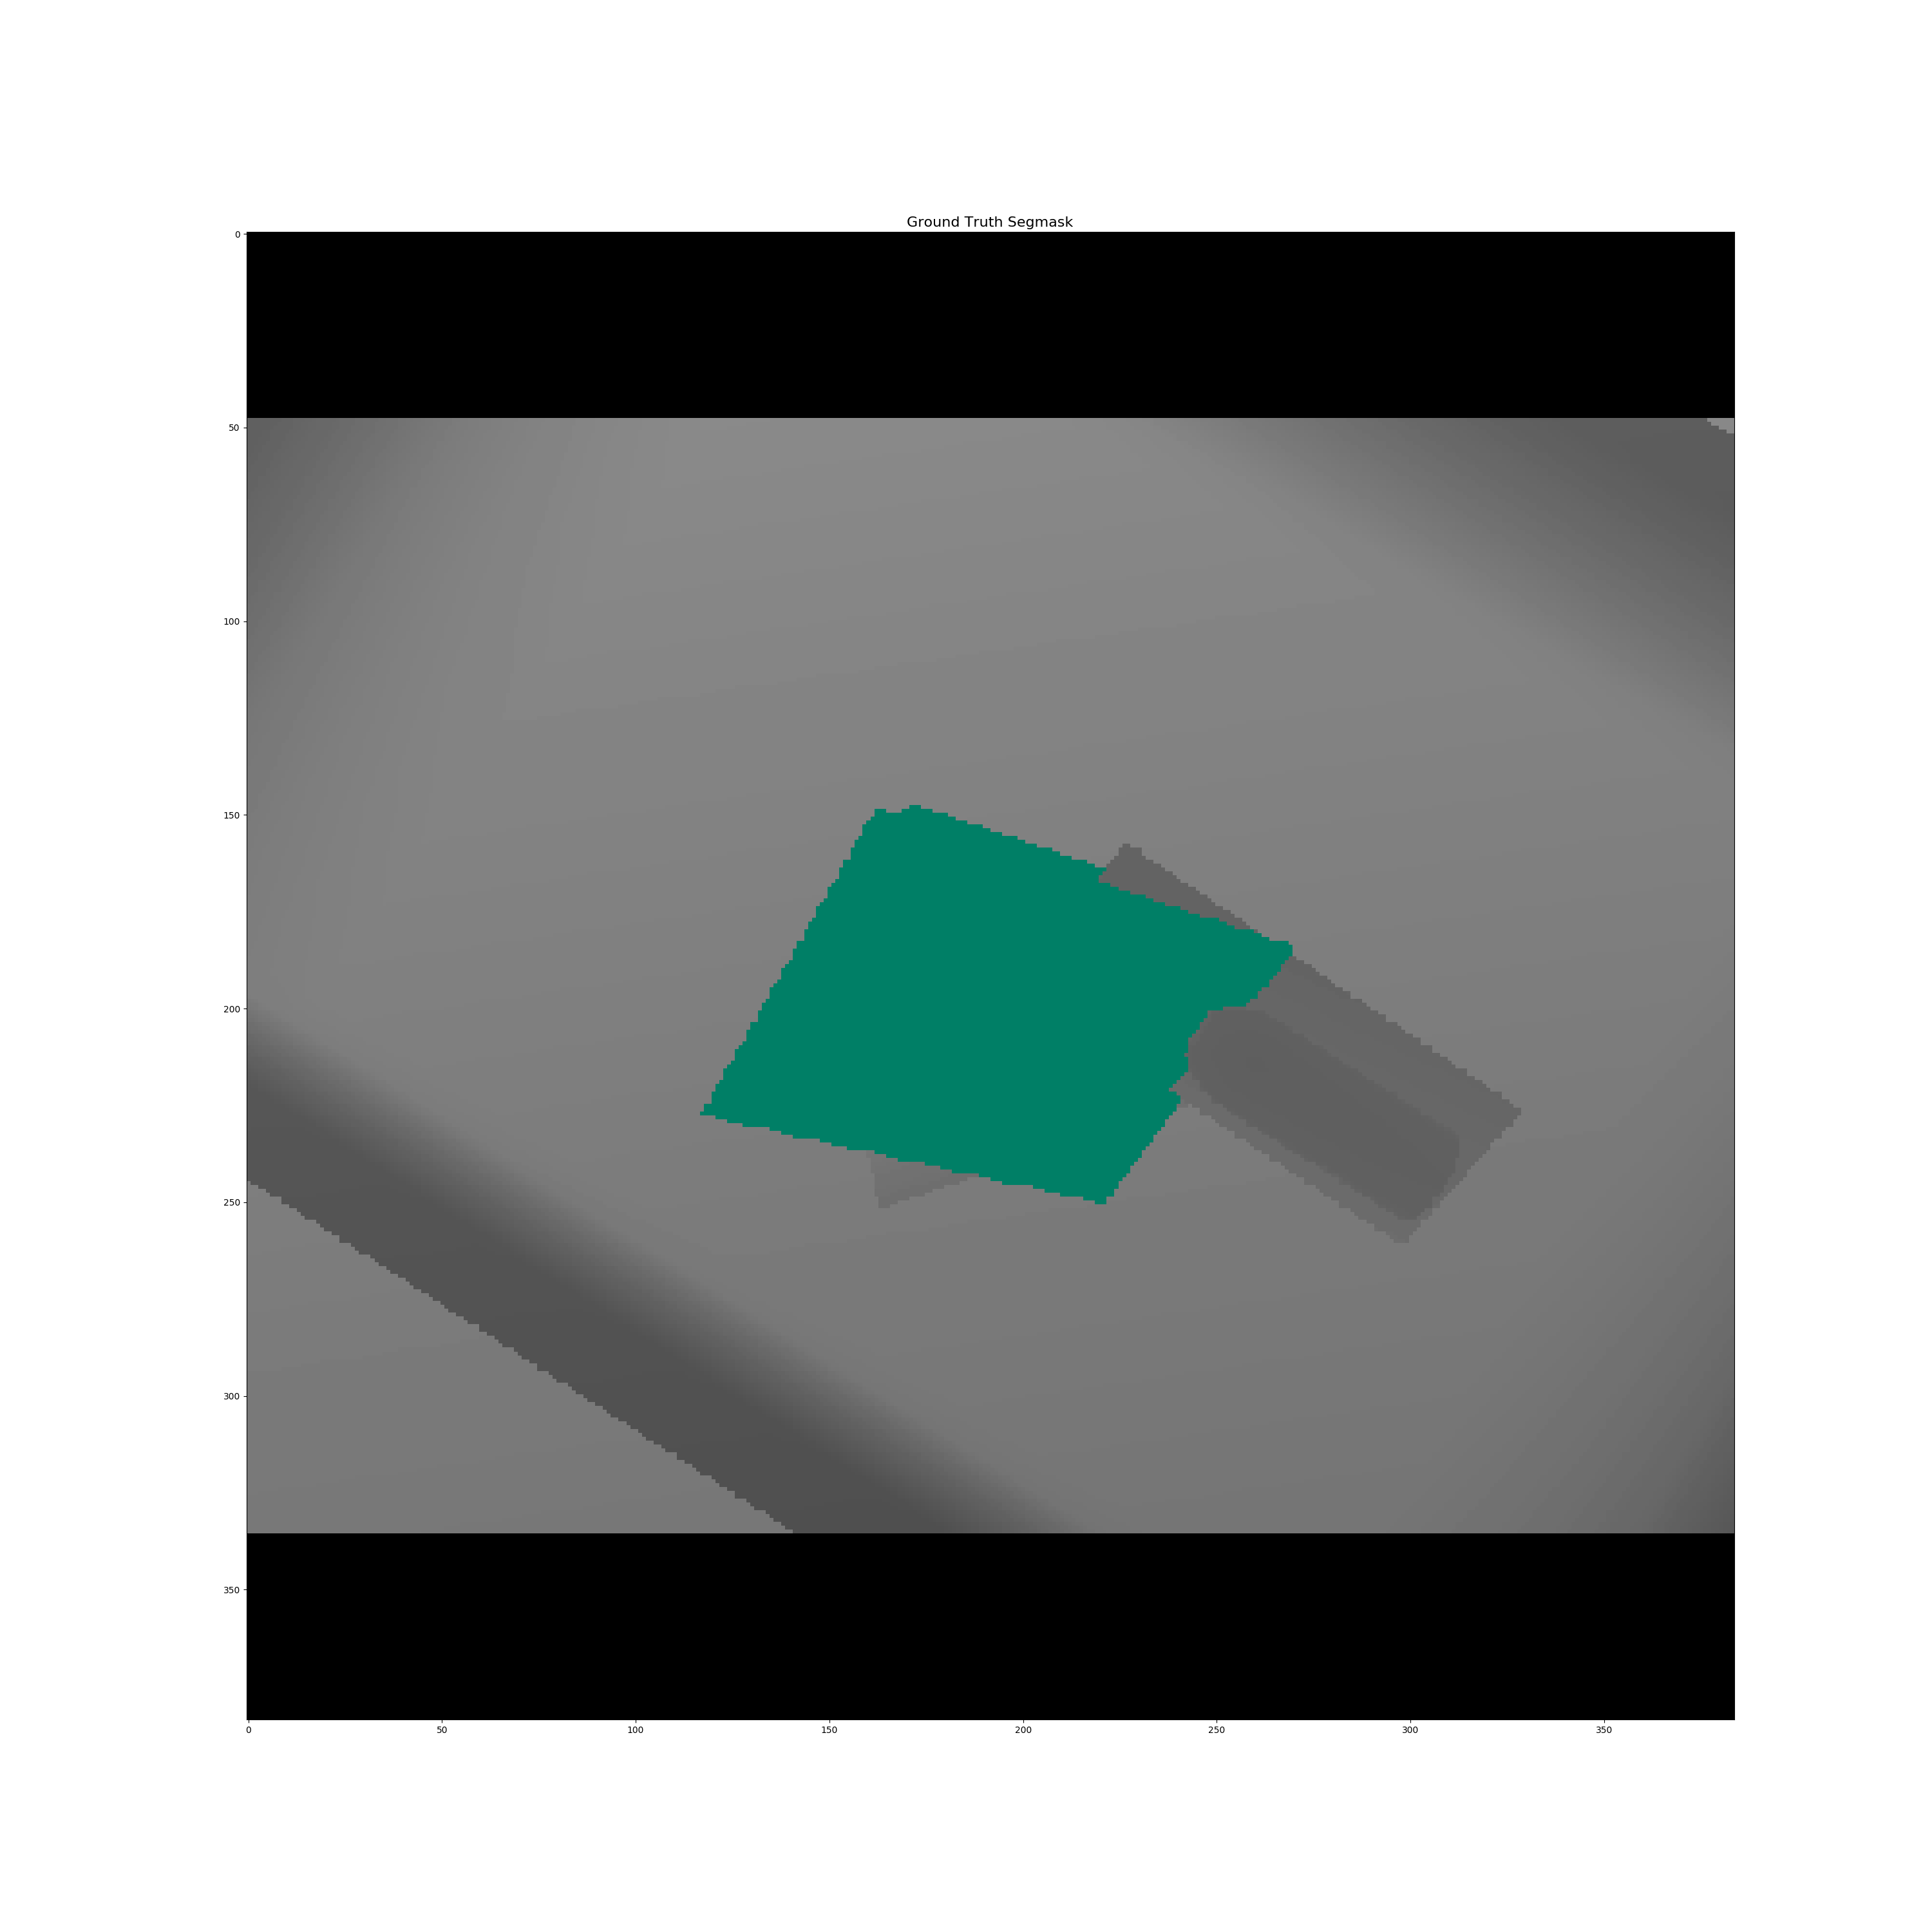

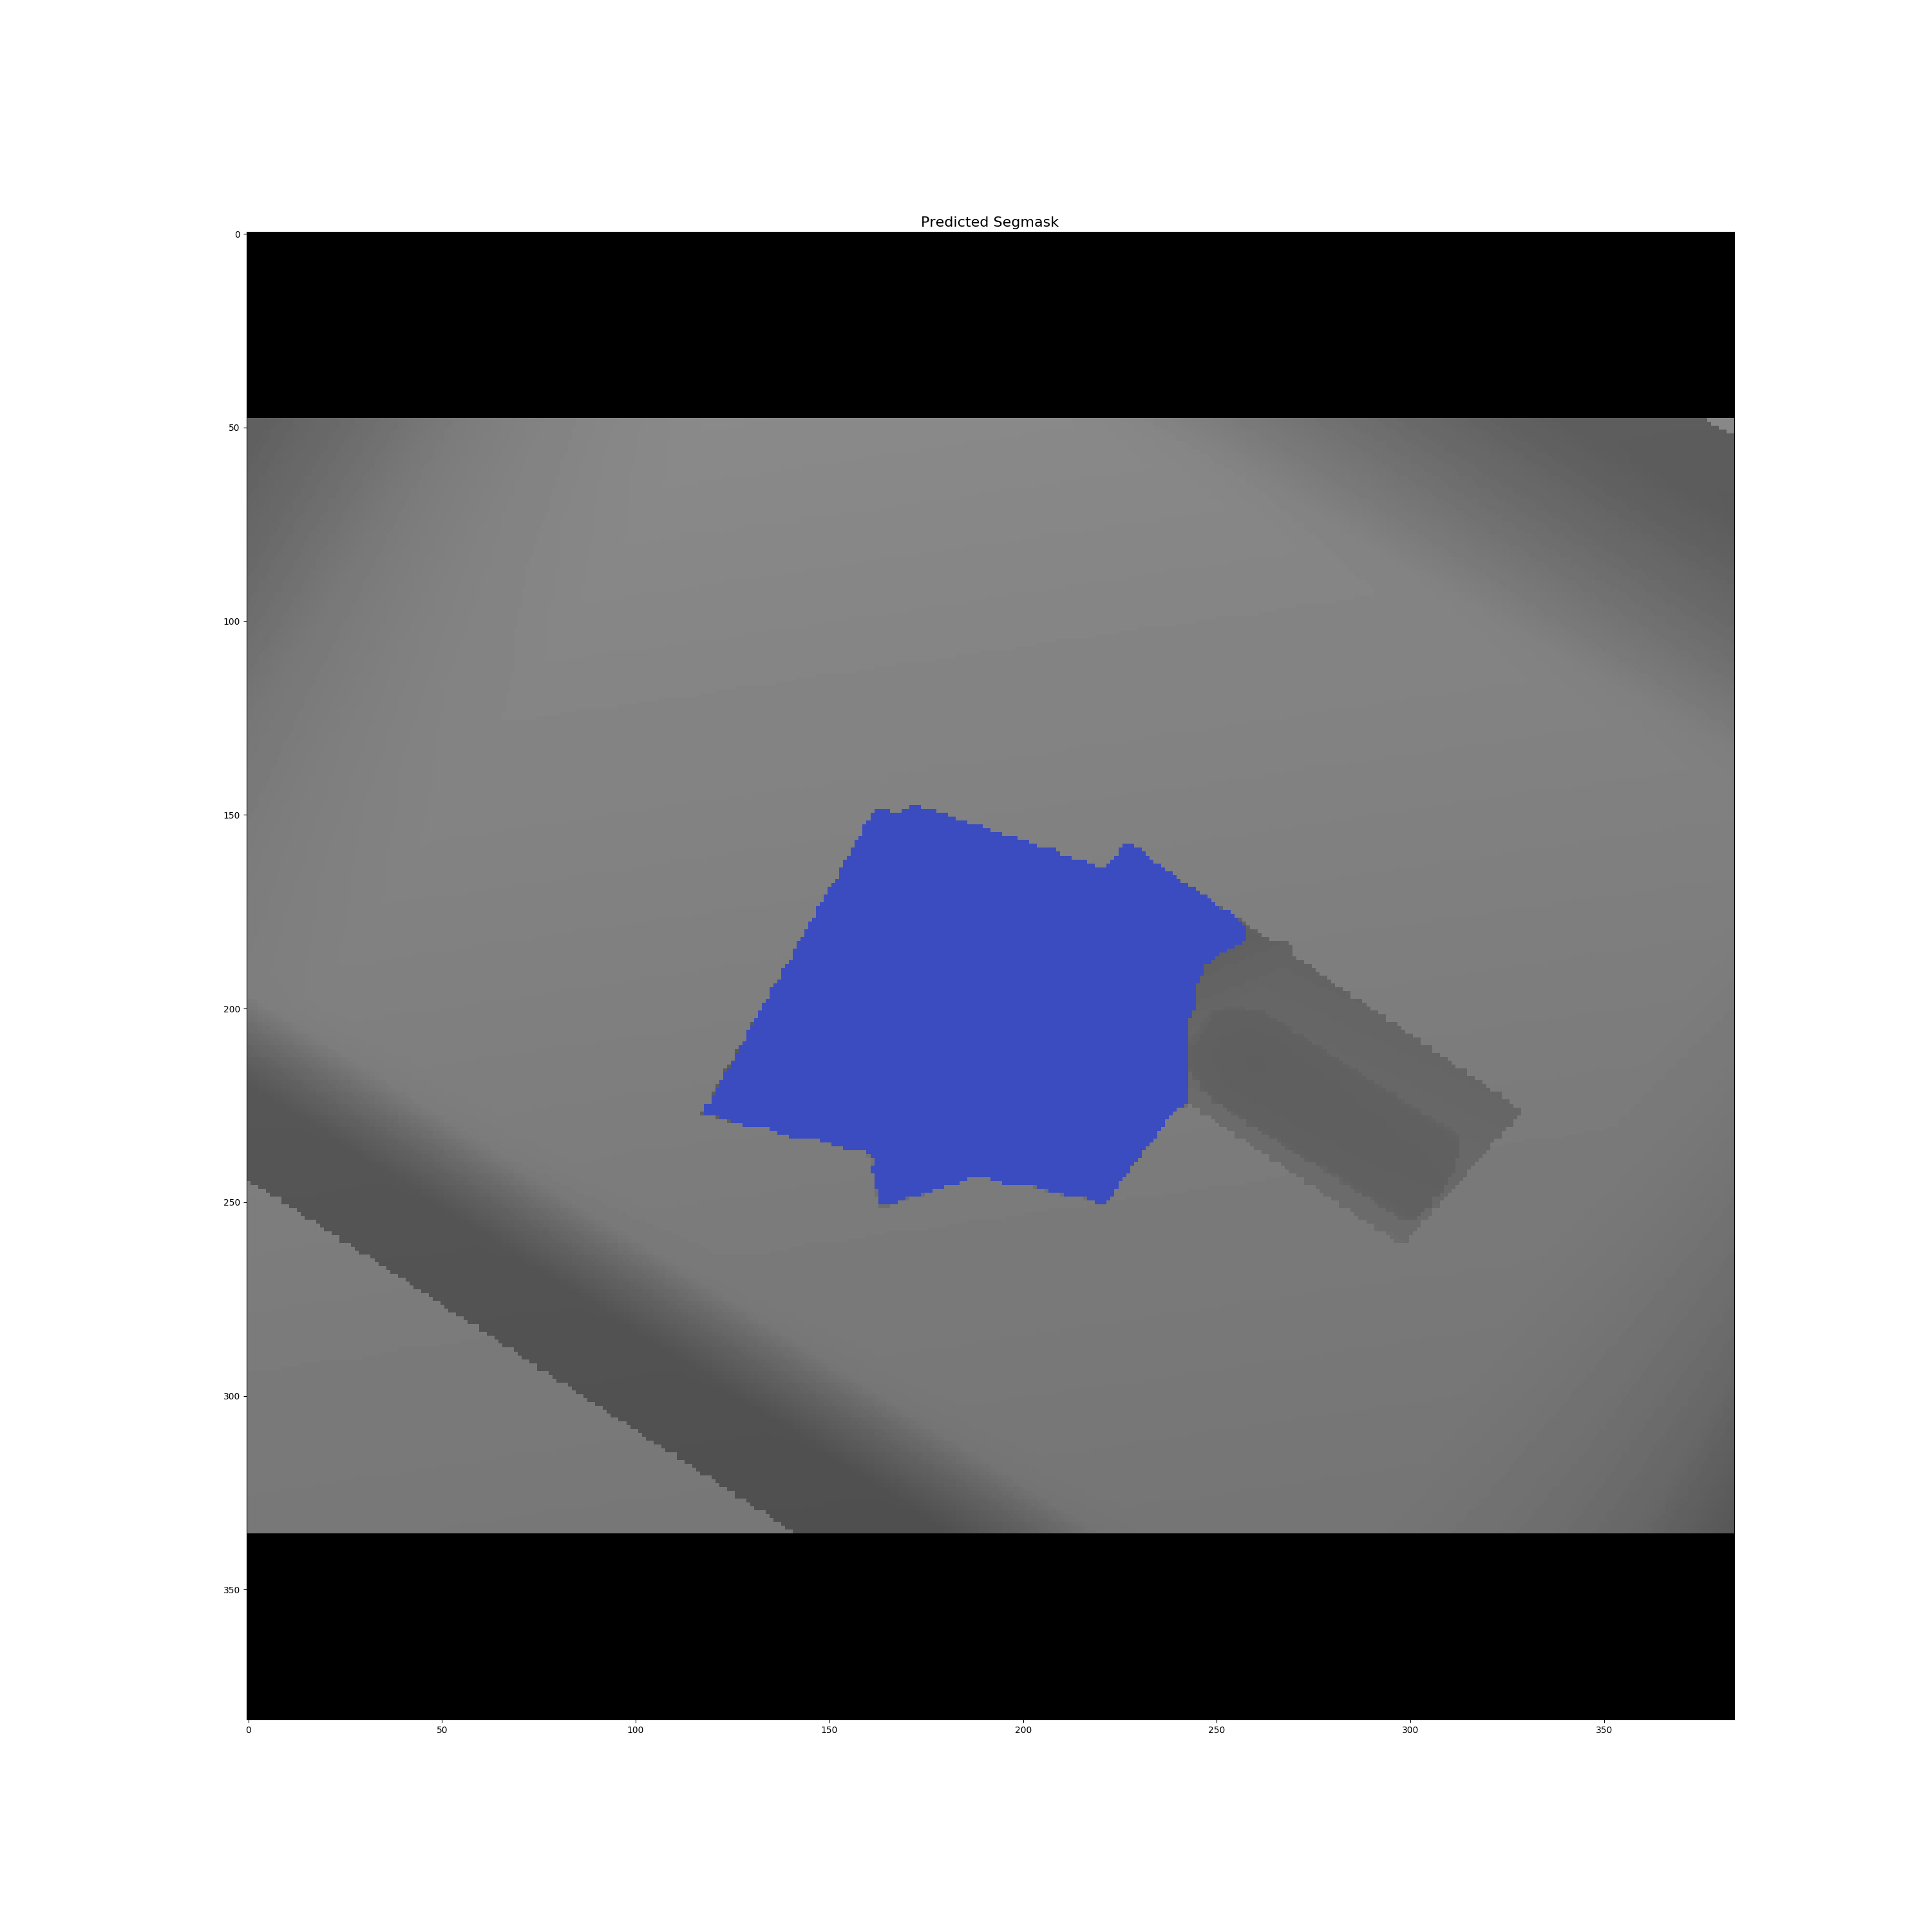

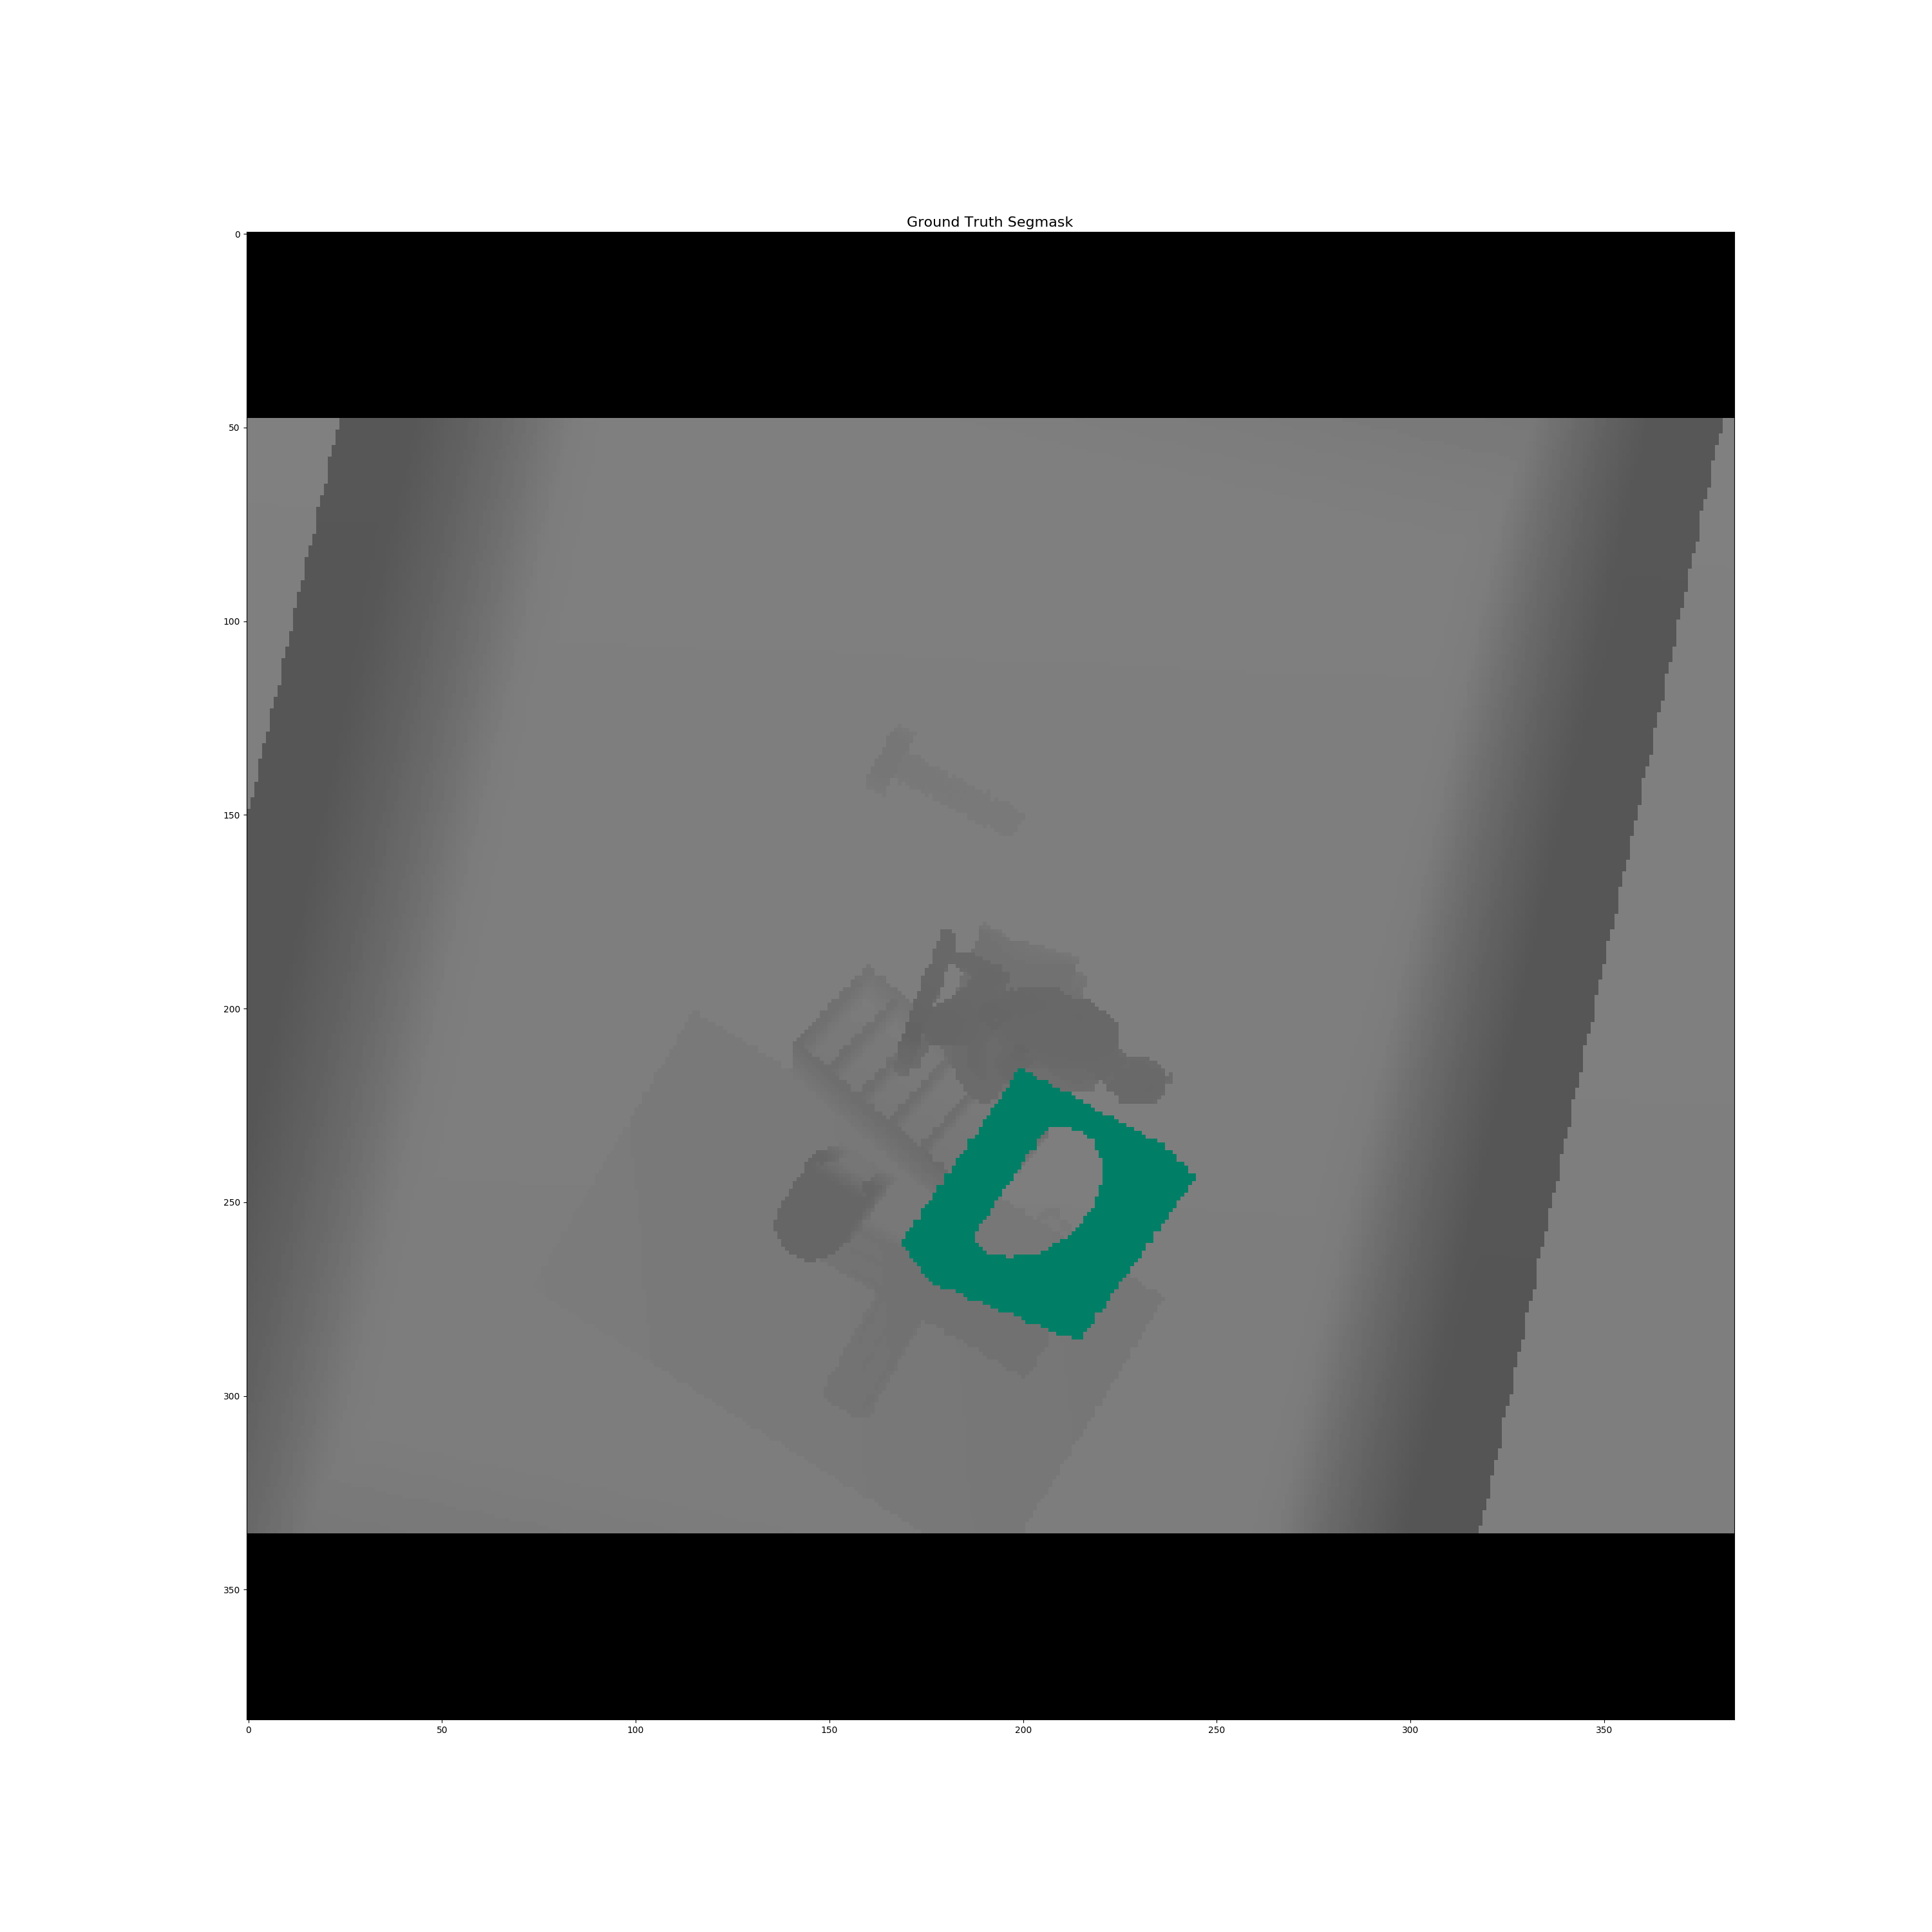

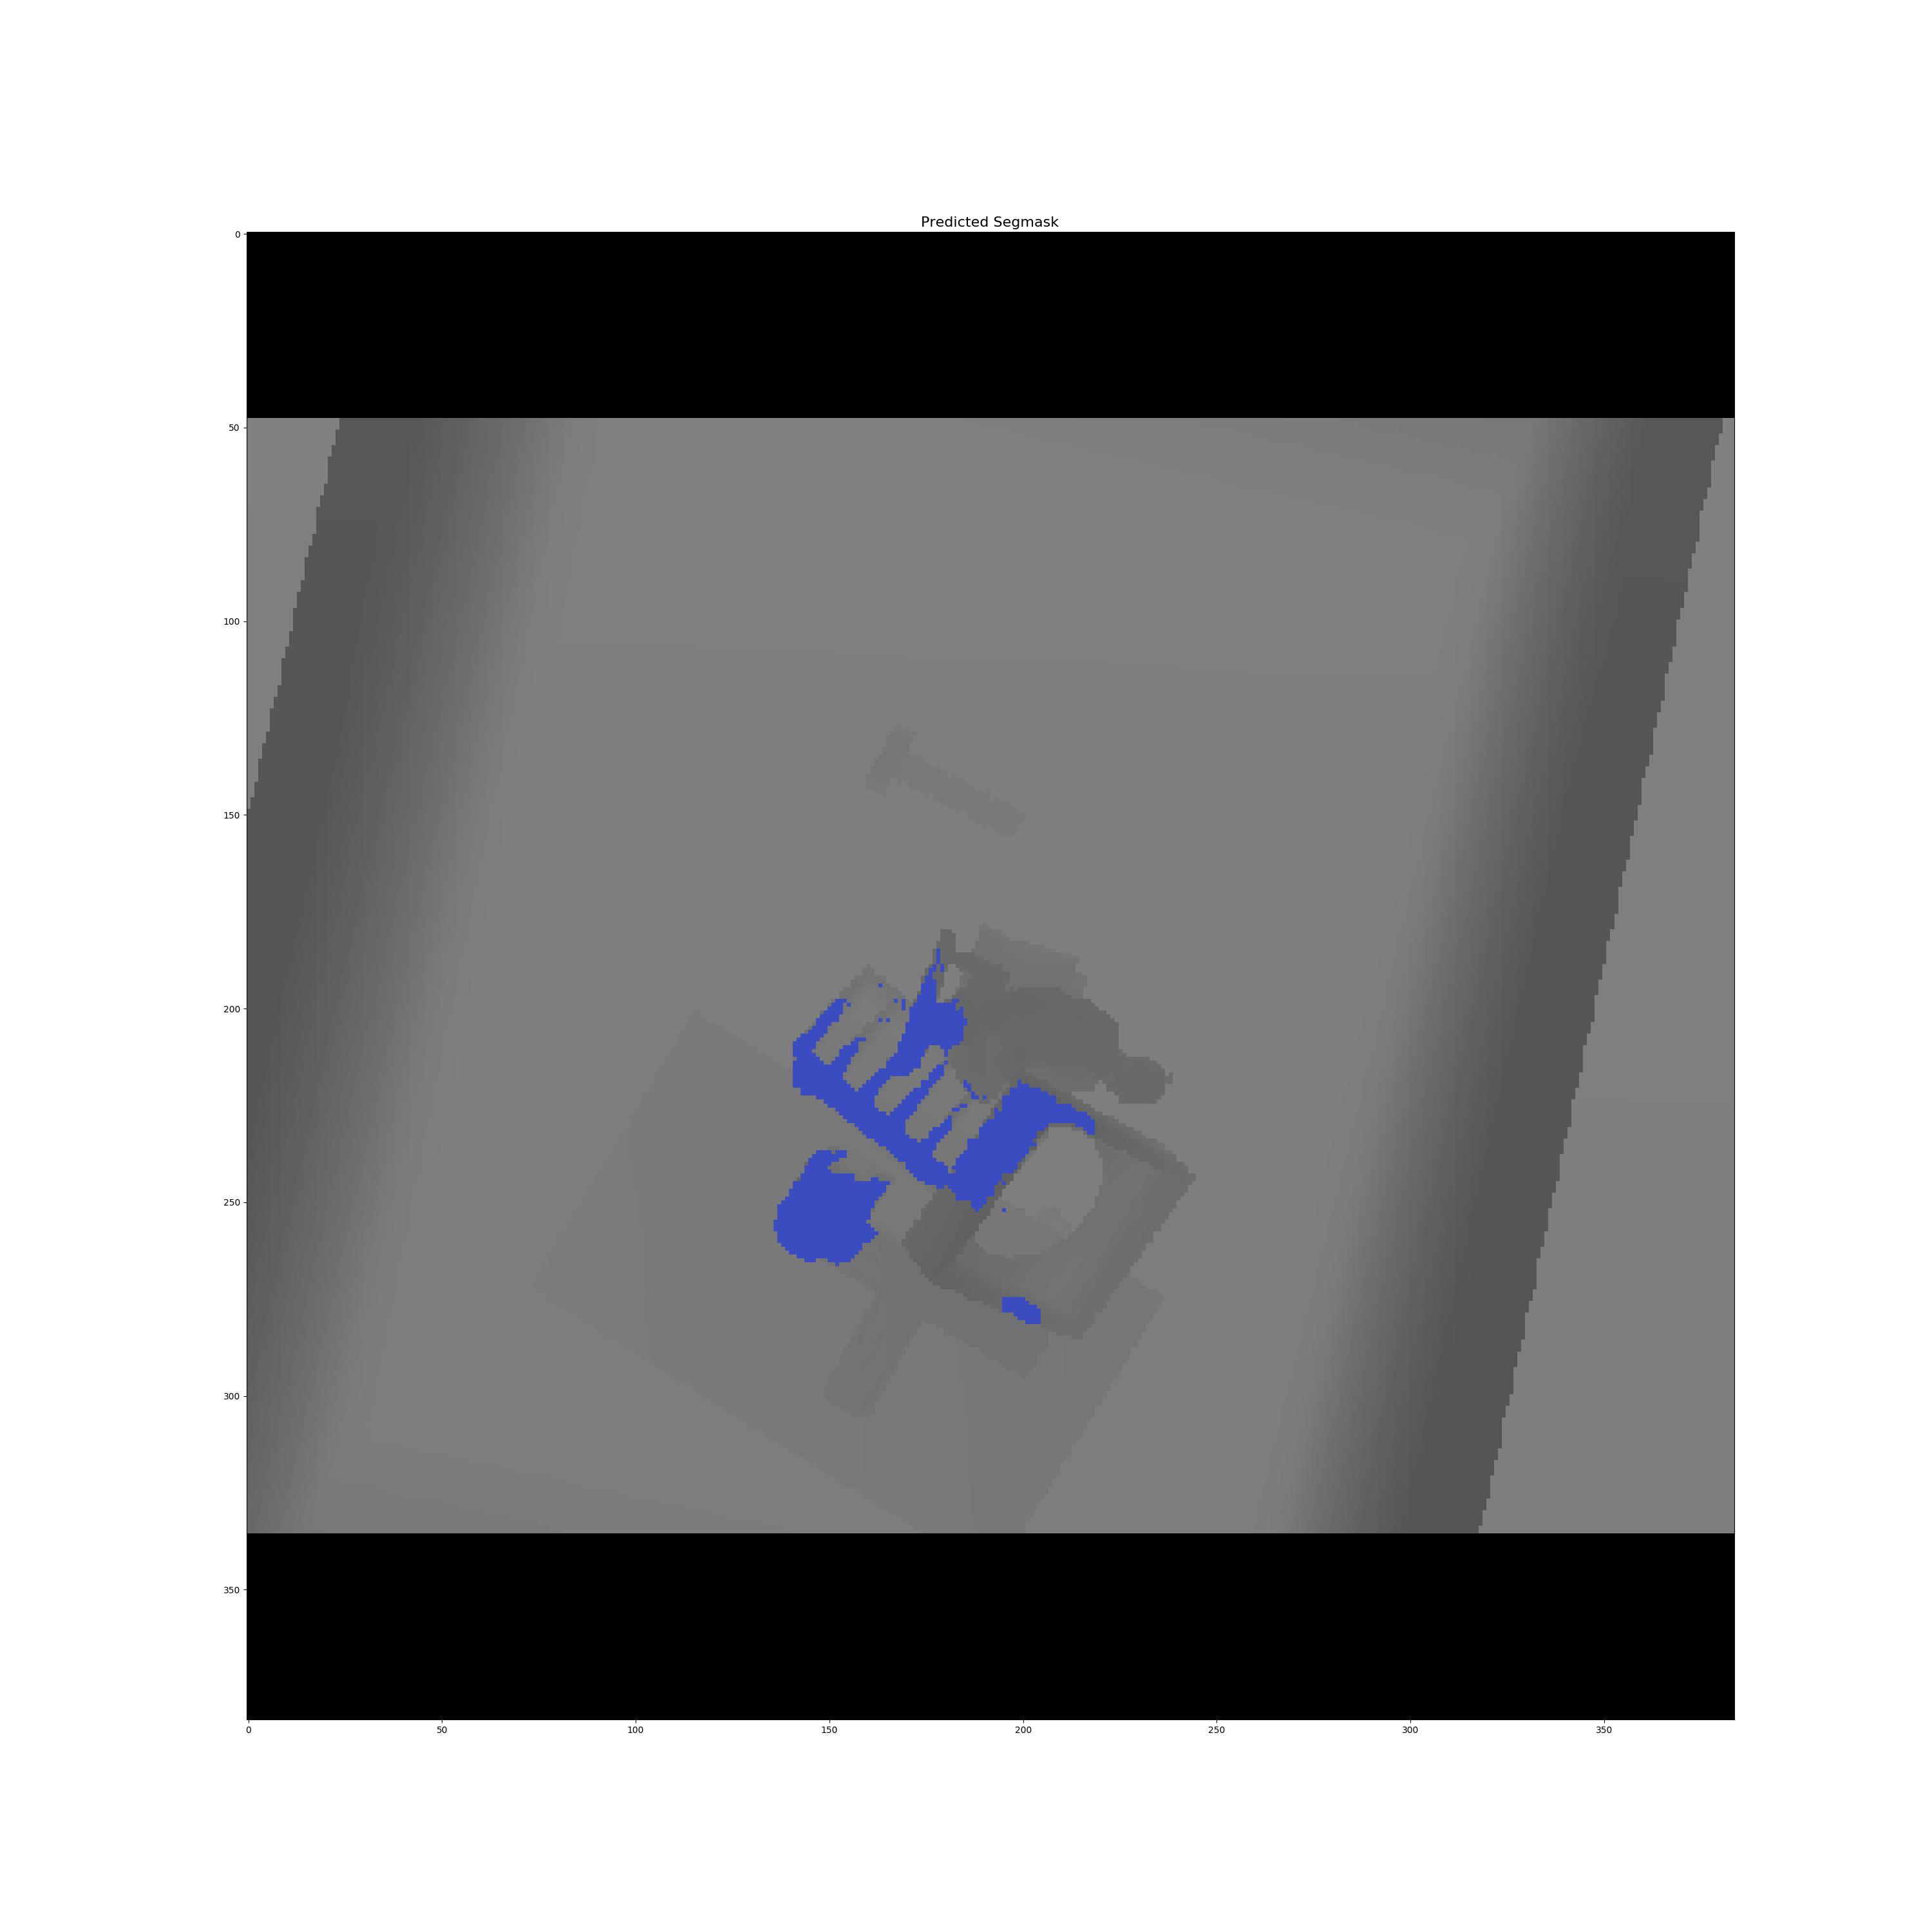

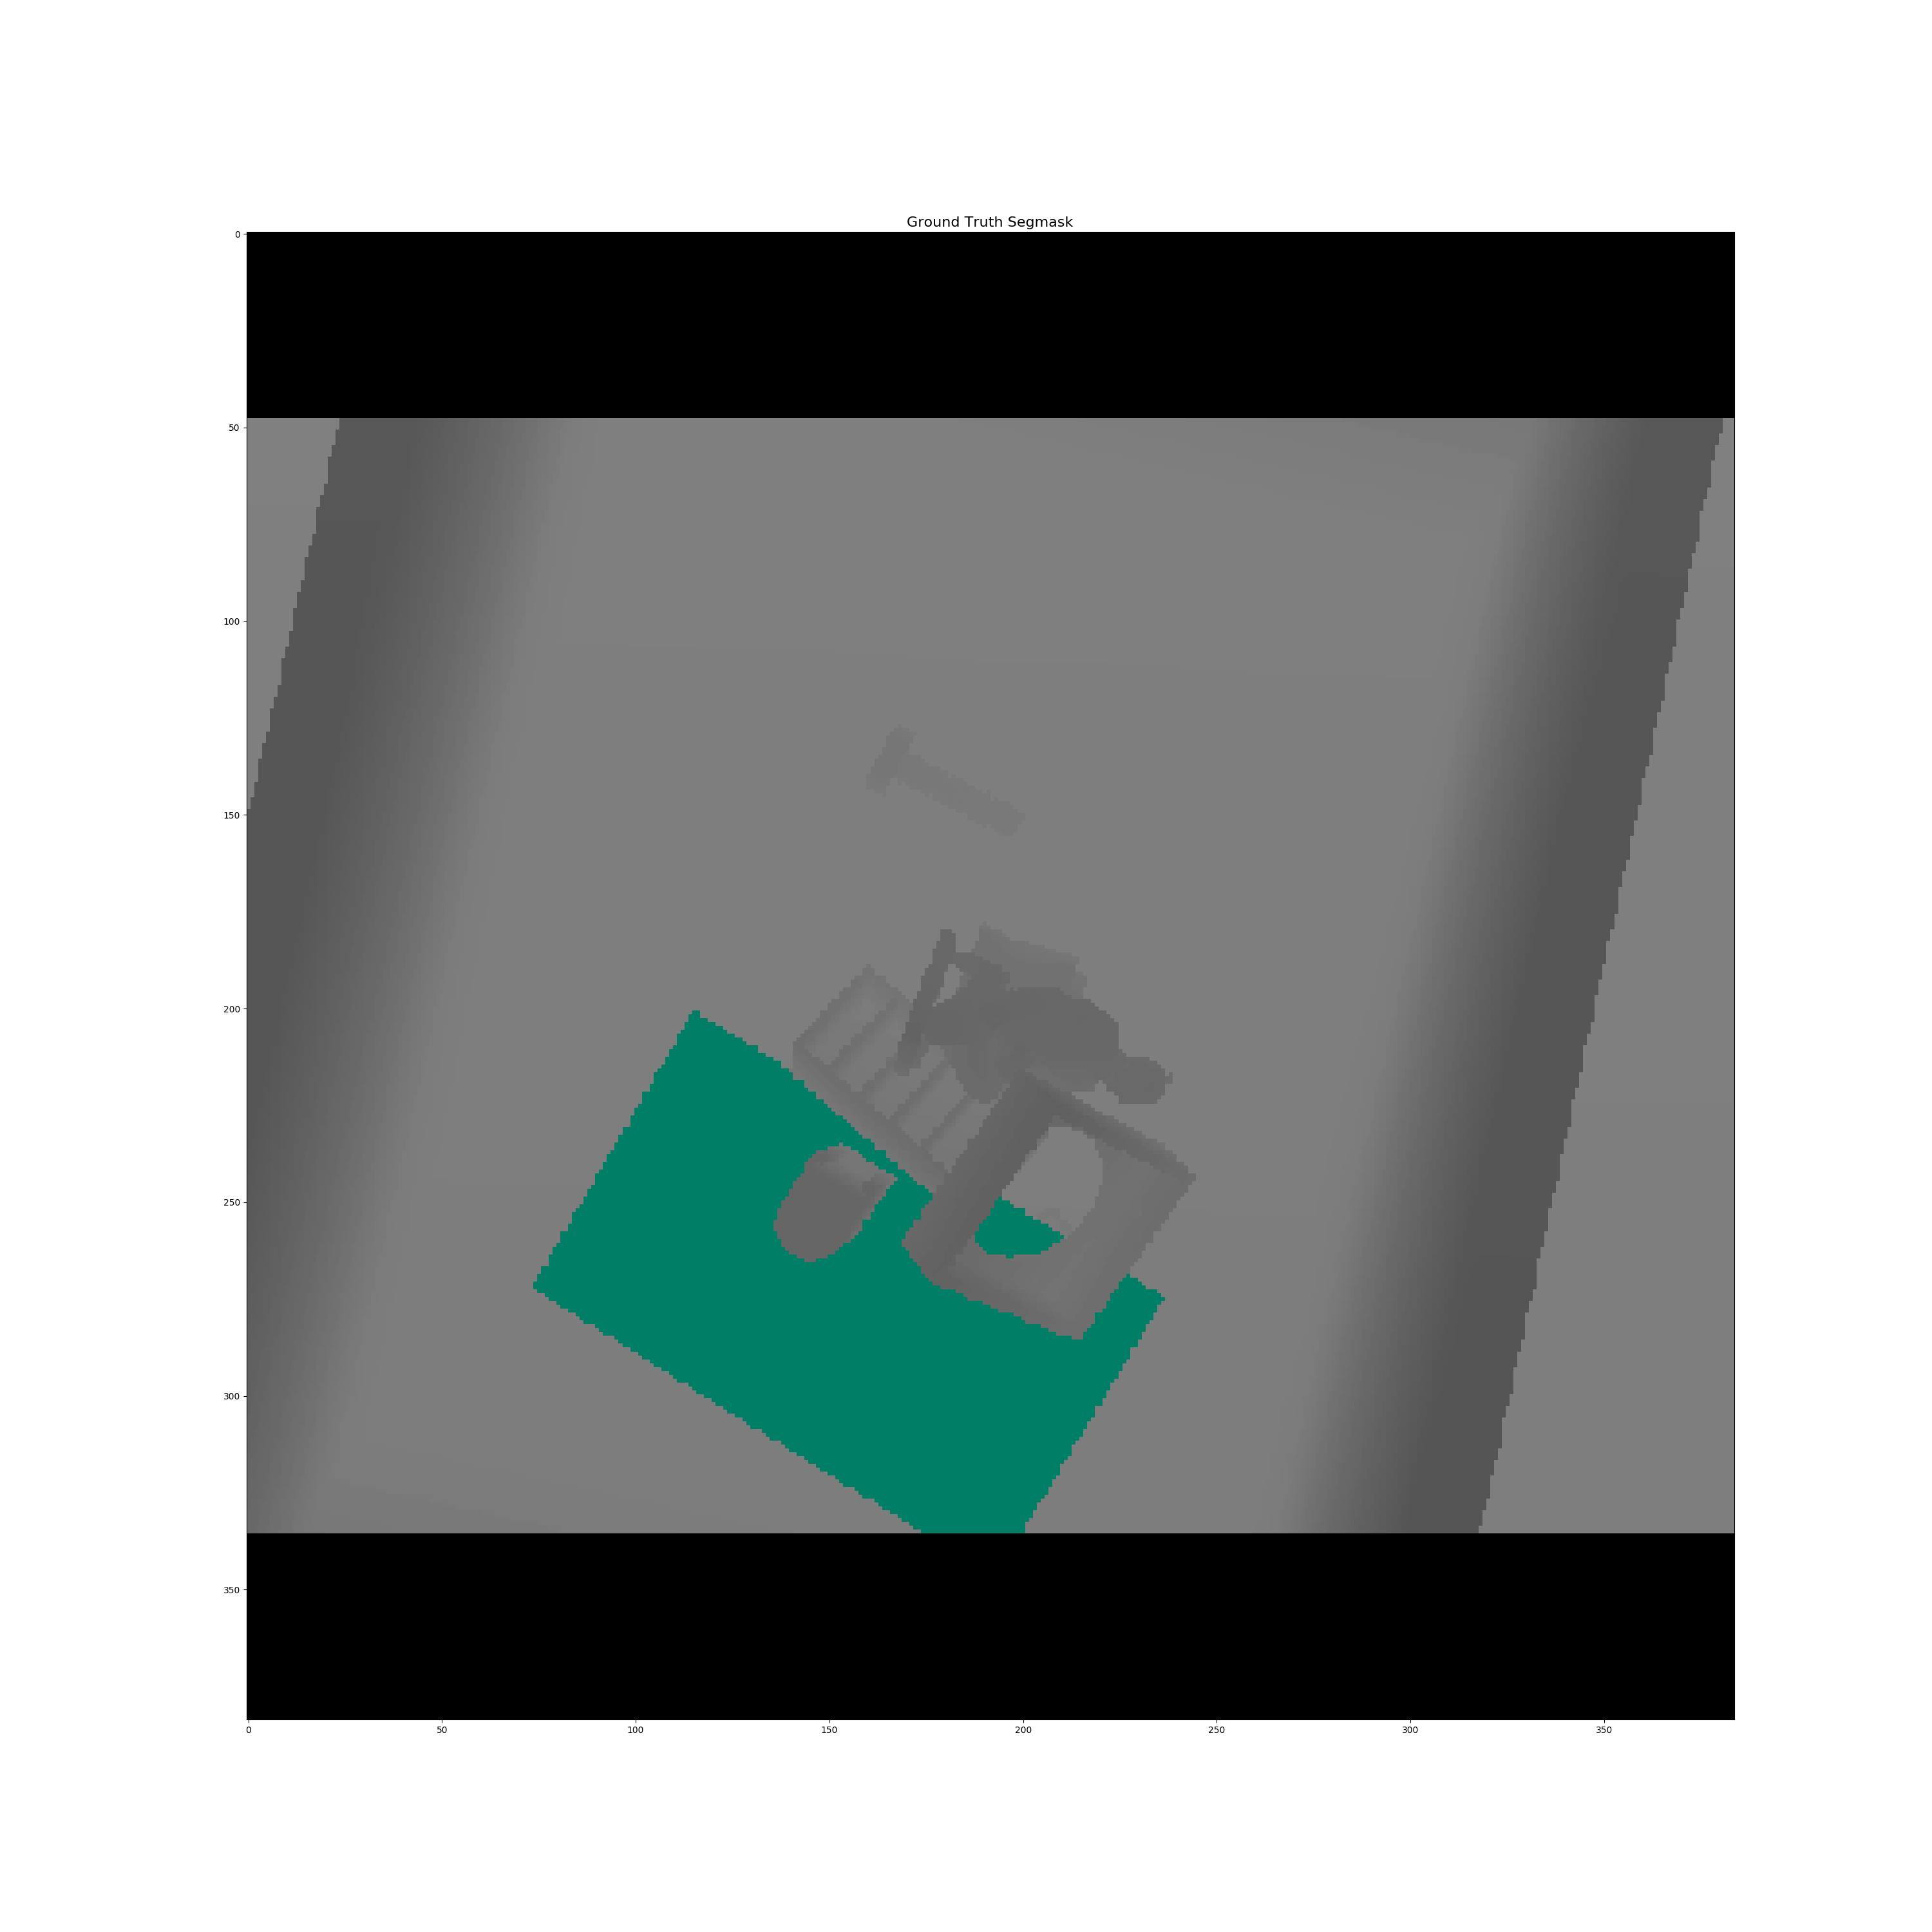

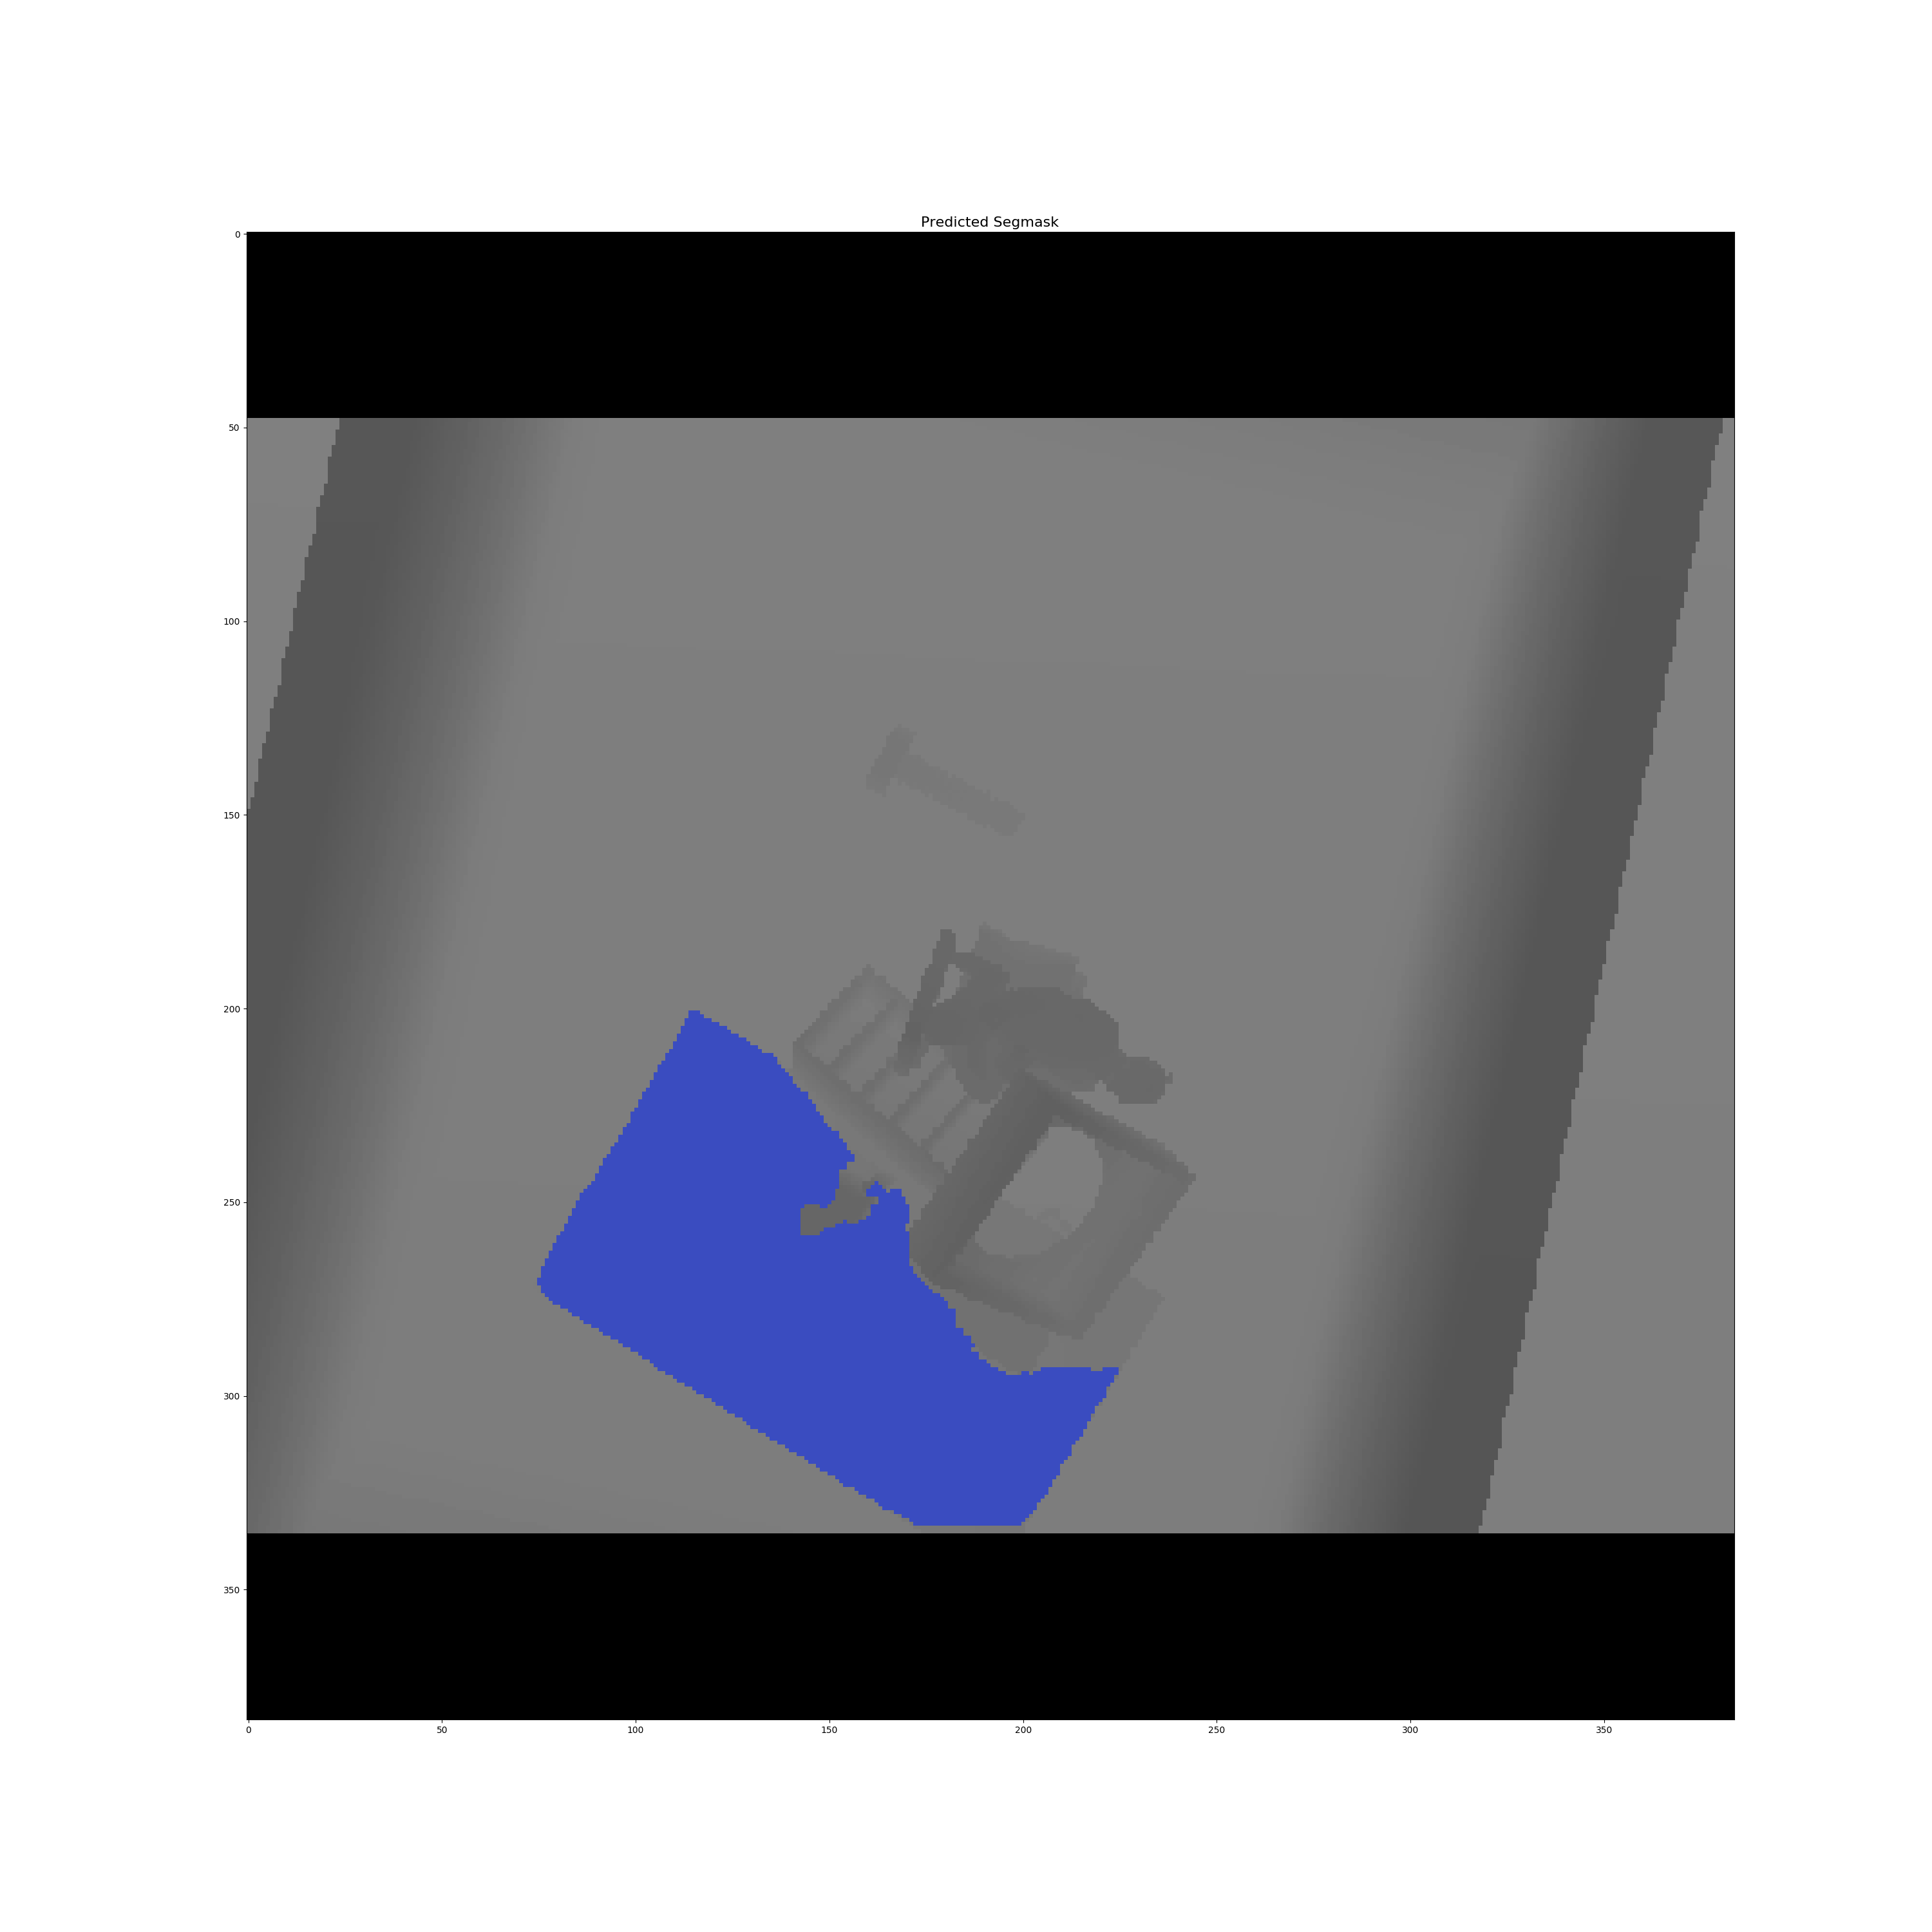

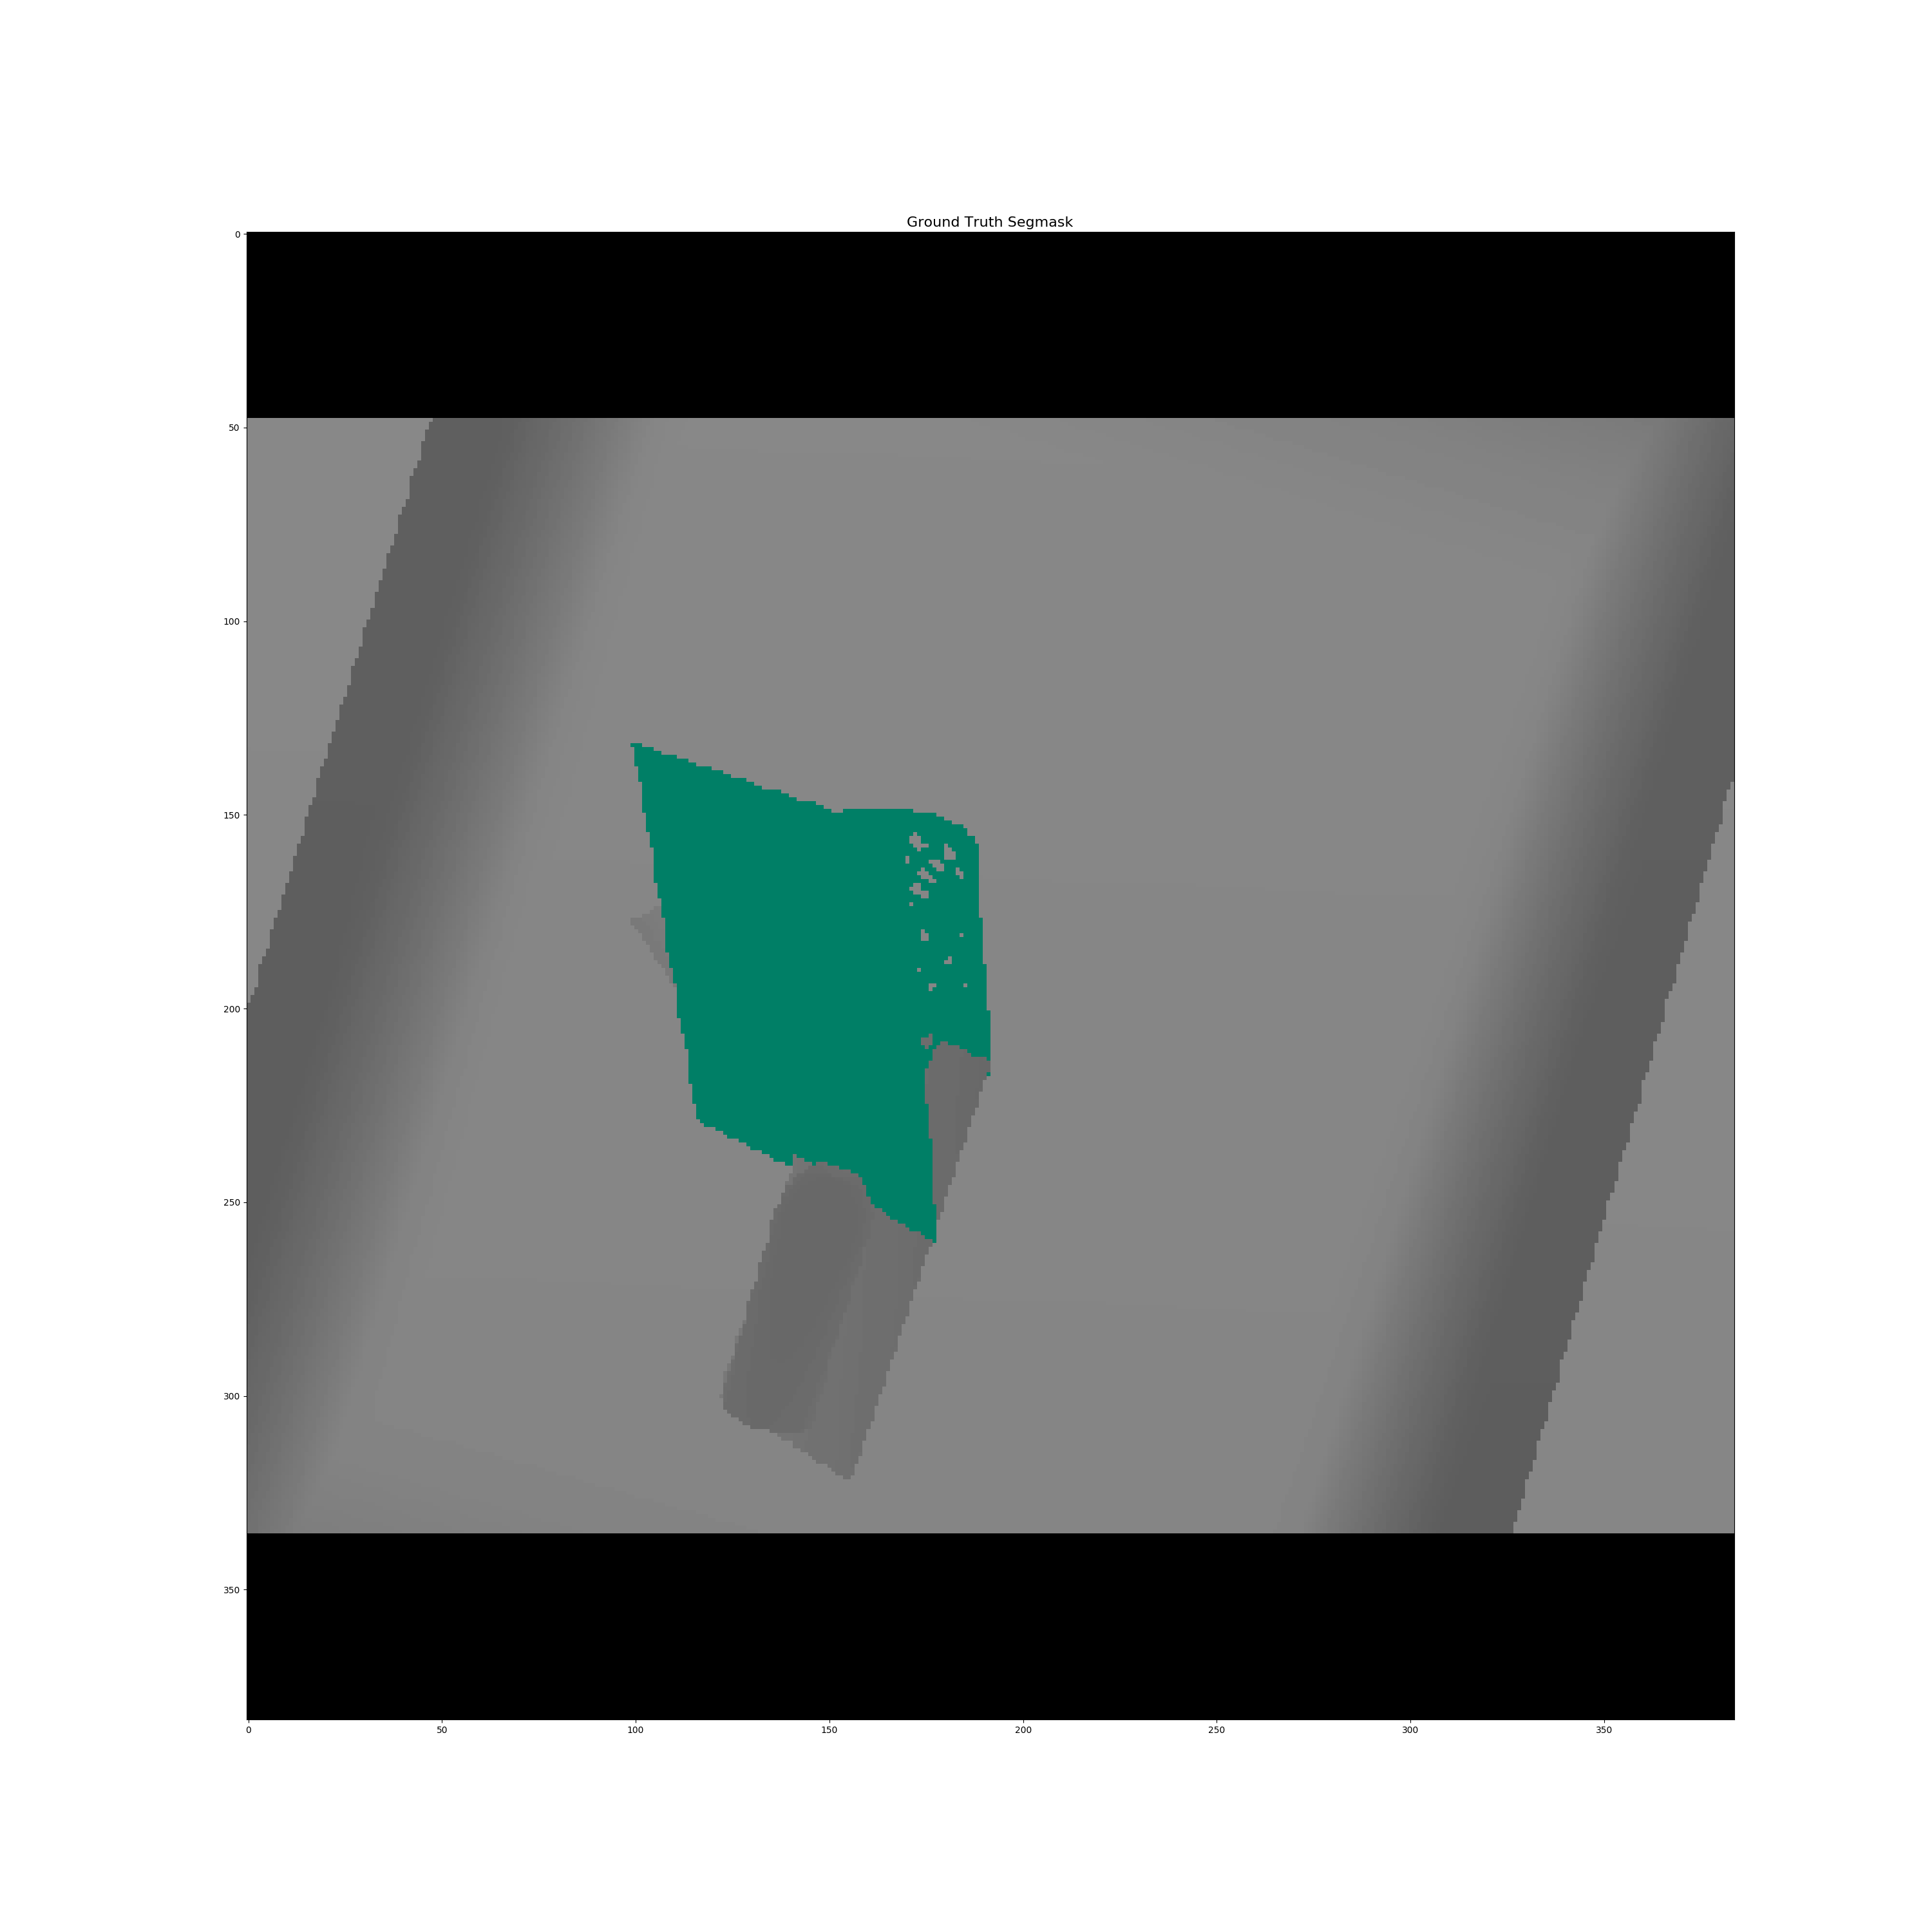

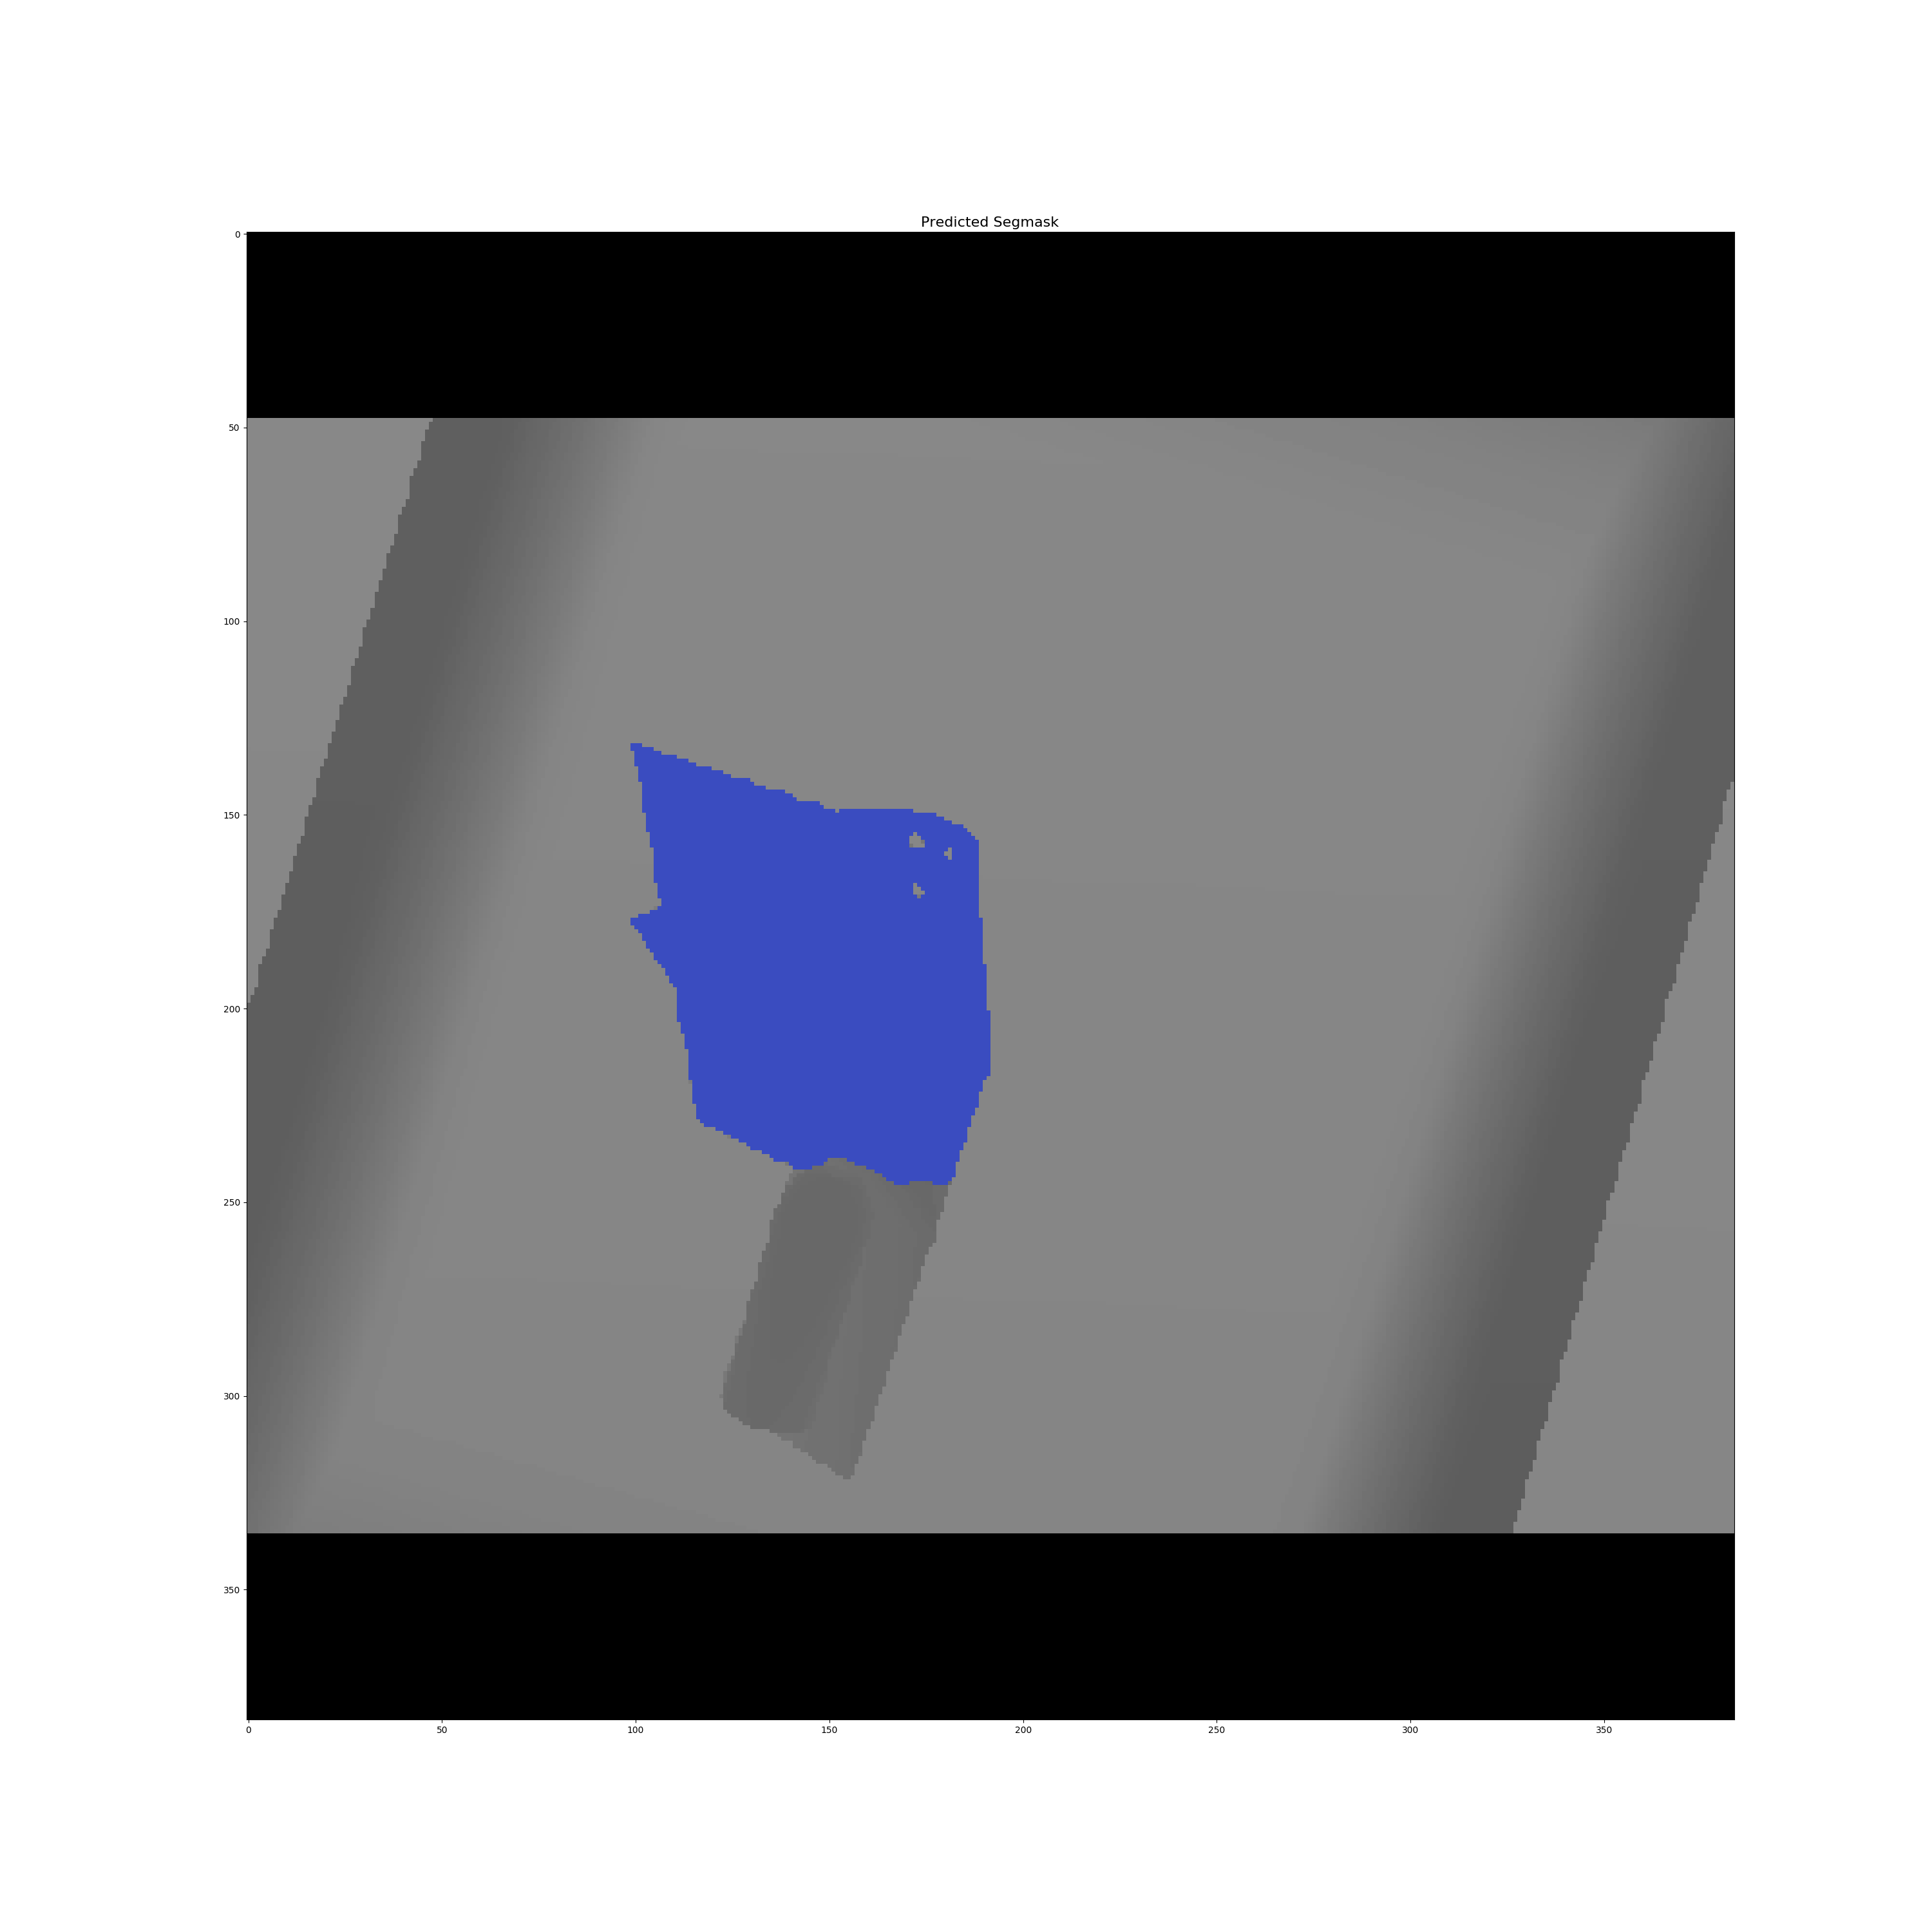

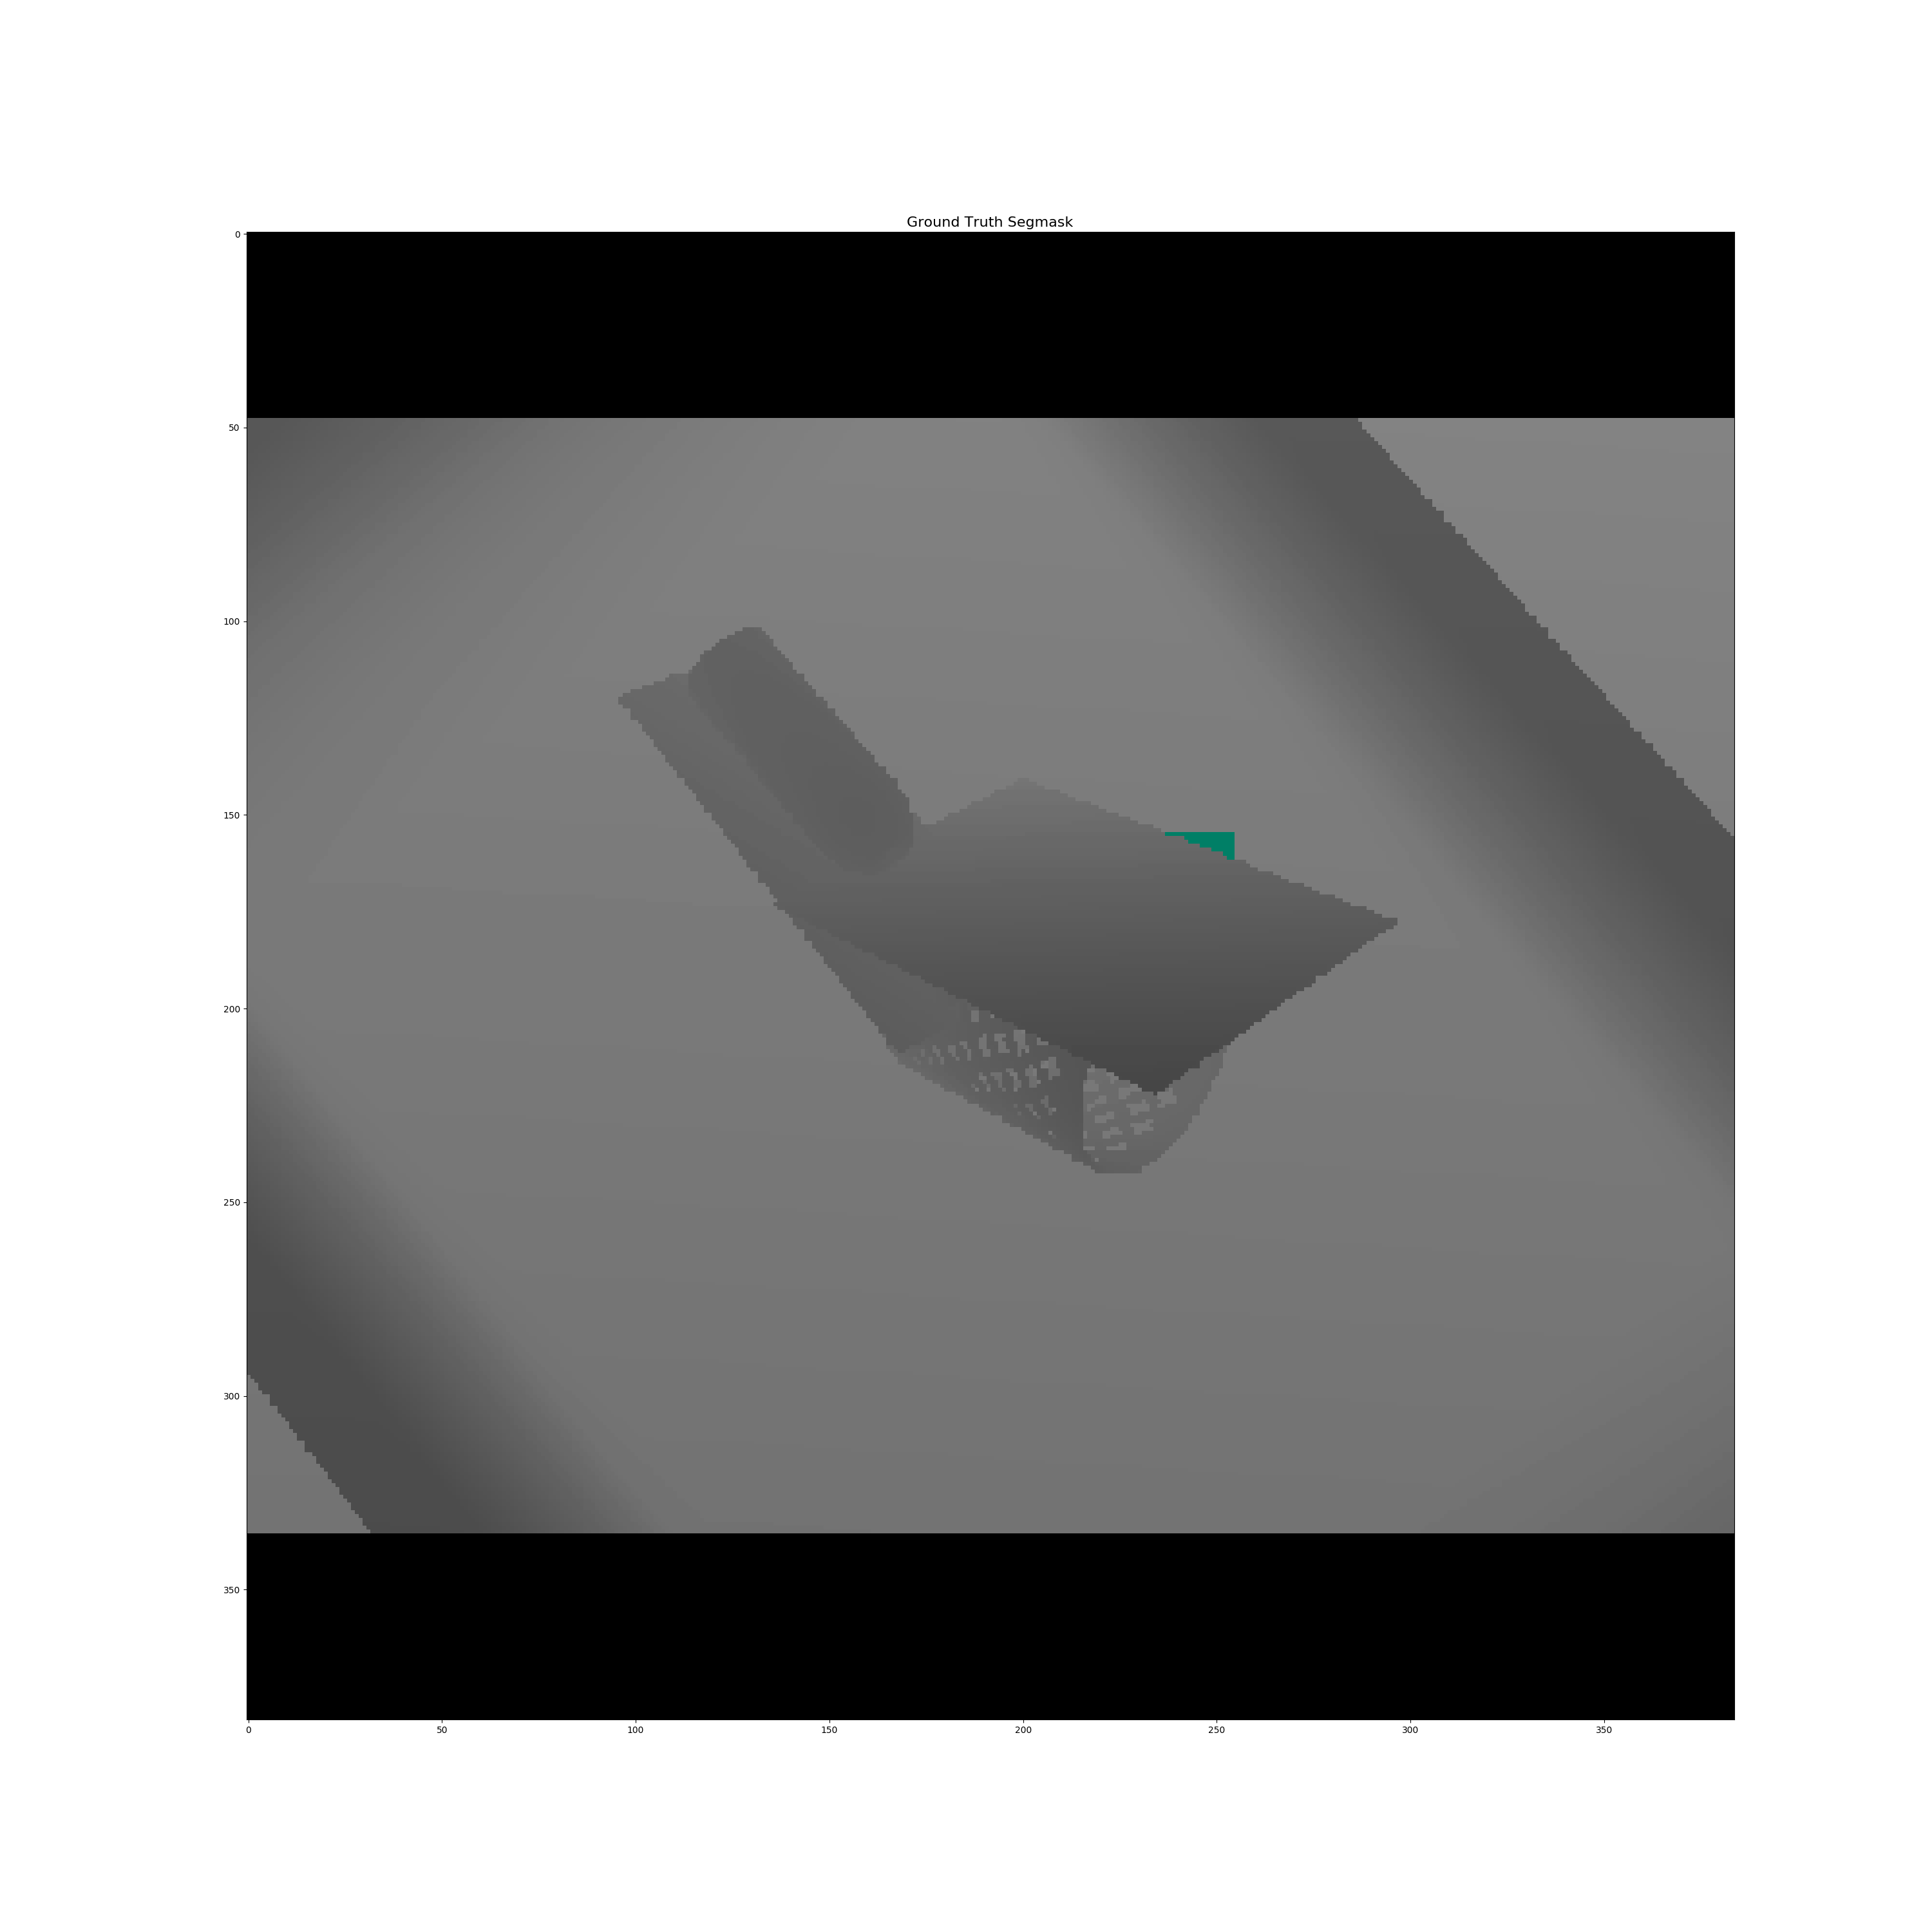

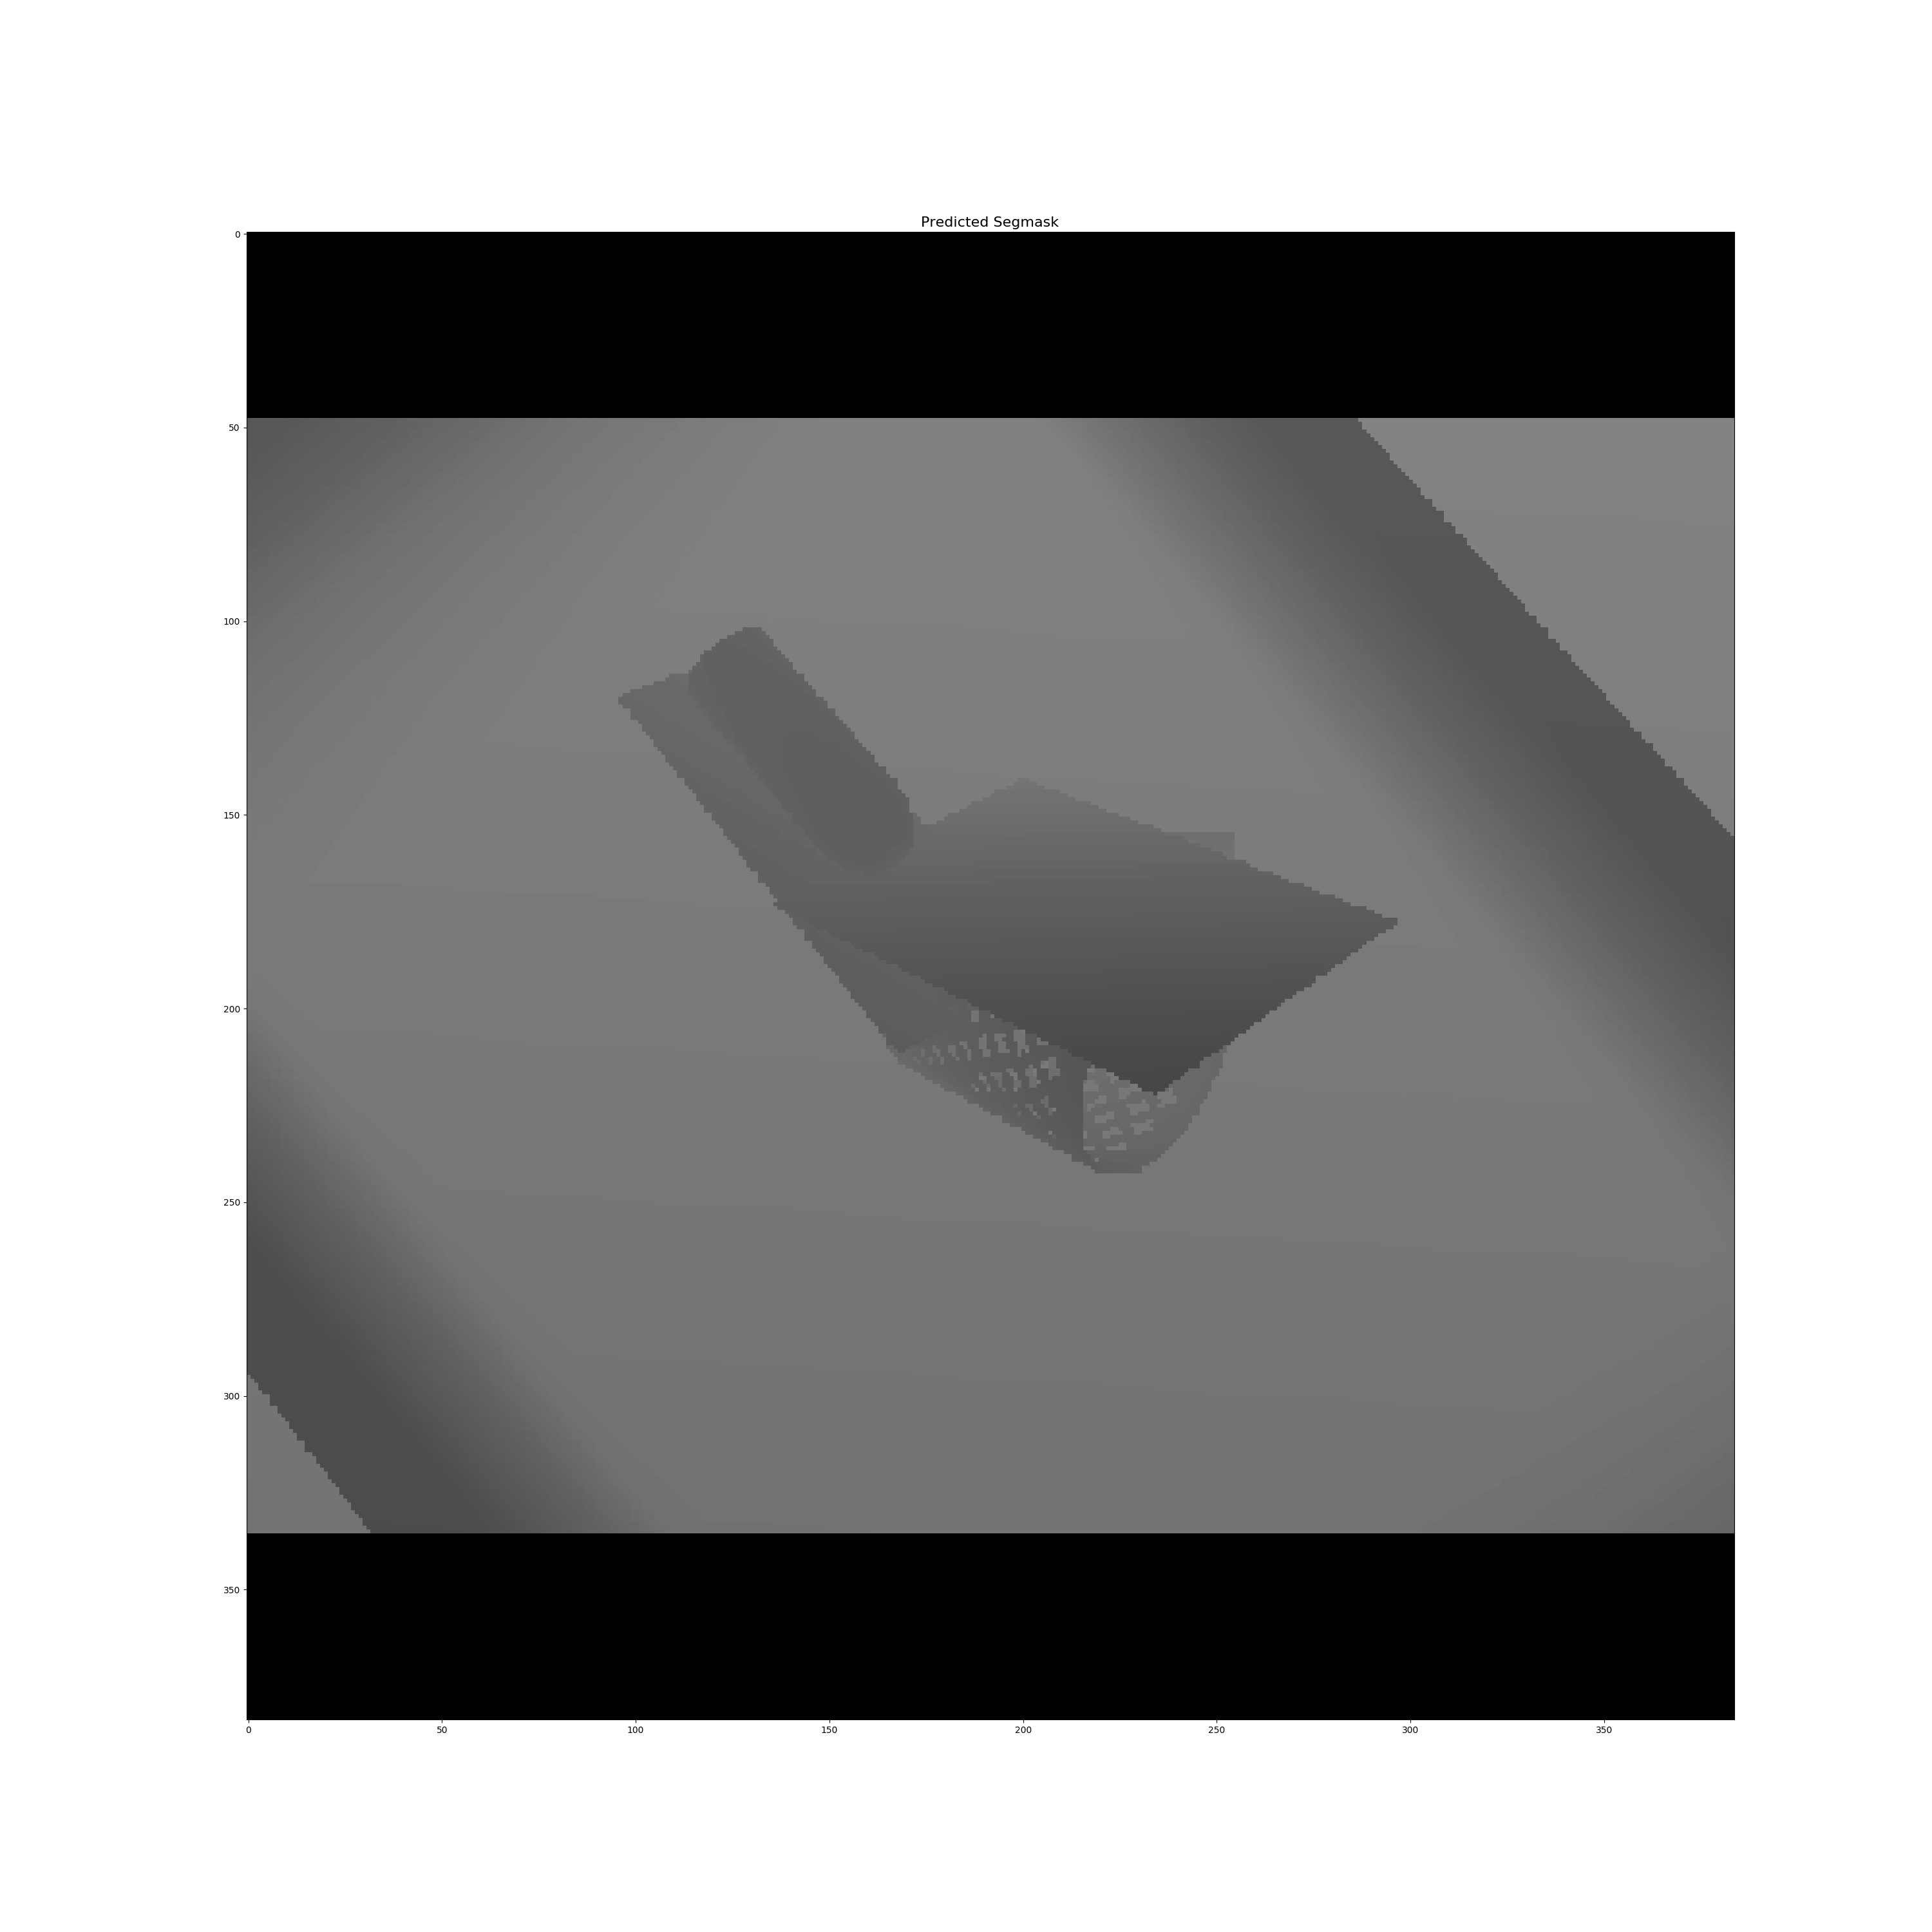

In [56]:
vis_list = [i for i in range(20)]
im_list = []
for index in vis_list:
    im_list.append(os.path.join(logdir, "vis", "gt_overlay_{}.png".format(index)))
    im_list.append(os.path.join(logdir, "vis", "pred_overlay_{}.png".format(index)))
    
for imageName in im_list:
    display(Image(filename=imageName))


In [ ]:
BASE_PATH = "/nfs/diskstation/projects/dex-net/segmentation/datasets/mask-net/fold_0000"
split = "test-train"
vis_list = [i for i in range(5)]
block_size = 50

for index in vis_list:
    im = np.load(os.path.join(BASE_PATH, split, "image_{:08d}.npy").format(index))
    seg = np.load(os.path.join(BASE_PATH, split, "segmentation_{:08d}.npy").format(index))
    tar = np.load(os.path.join(BASE_PATH, split, "target_{:08d}.npy").format(index))
    
    for b in range(block_size):
        plt.figure(figsize=(30, 30))

        plt.subplot(131)
        plt.imshow(im[b])

        plt.subplot(132)
        plt.imshow(seg[b][...,0])

        plt.subplot(133)
        plt.imshow(tar[b])

        plt.show()

[0. 1.]
(1, 384, 384, 1)
(1, 384, 384, 3)
(1, 128, 128, 1)
(1, 384, 384, 3)


/home/andrewyli/michaelis/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/andrewyli/michaelis/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


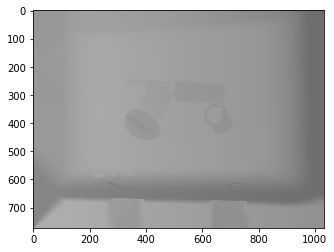

In [33]:
scene = io.imread("image_000008.png")
plt.imshow(scene)
new_scene = resize(scene, (384, 384))
new_seg = new_scene[:, :, 0]
new_seg = np.expand_dims(new_seg, axis=2)
target = io.imread("view_000000.png")
new_target = resize(target, (128, 128))
new_target = new_target[:, :, 0]
new_target = np.expand_dims(new_target, axis=2)
new_target[new_target > 0] = 1
print(np.unique(new_target))


new_scene = np.expand_dims(new_scene, axis=0)
new_target = np.expand_dims(new_target, axis=0)
new_seg = np.expand_dims(new_seg, axis=0)

print(new_seg.shape)
print(new_scene.shape)

print(new_target.shape)

np.save("real_fold/image_00000000.np
        \y", new_scene)
np.save("real_fold/segmentation_00000000.npy", new_seg)
np.save("real_fold/target_00000000.npy", new_target)

print(new_scene.shape)